In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pool_df=pd.read_pickle('crypto_data_2.pkl')

In [17]:
pool_df2 = pd.read_pickle('pool_df.pkl')

In [18]:
pool_df2

chain        project       symbol      tvlUsd  apyBase  apyReward  \
0     Ethereum           lido        STETH  5853887346  5.00000        NaN   
1     Ethereum       makerdao         USDC  2354697730      NaN        NaN   
2         Tron       justlend          BTC  1879215223  0.00001    0.03885   
3     Ethereum        aave-v2        STETH  1183766683  0.00000        NaN   
4     Ethereum       makerdao         WETH   860440558      NaN        NaN   
...        ...            ...          ...         ...      ...        ...   
9818  Arbitrum      sushiswap   L2DAO-WETH       10002  1.78960    0.00000   
9819  Optimism      velodrome      OP-USDC       10002      NaN    6.92676   
9820   Polygon  quickswap-dex  WMATIC-IRIS       10001  0.00887        NaN   
9821    Solana        raydium  FATCATS-SOL       10001  0.00000        NaN   
9822    Solana        raydium    UREP-USDC       10000  0.00000        NaN   

          apy                                  rewardTokens  \
0     5.00000                                          None   
1     0.00000                                          None   
2     0.03885          [TPYmHEhy5n8TCEfYGqW2rPxsghSfzghPDn]   
3     0.00000                                          None   
4     0.00000                                          None   
...       ...                                           ...   
9818  1.78960                                            []   
9819  6.92676  [0x3c8B650257cFb5f272f799F5e2b4e65093a11a05]   
9820  0.00887                                          None   
9821  0.00000                                          None   
9822  0.00000                                          None   

                                      pool  apyPct1D  apyPct7D  apyPct30D  \
0     747c1d2a-c668-4682-b9f9-296708a3dd90   0.30000   0.20000   -0.90000   
1     051c1a54-df05-4bc4-9d73-c17508acae23   0.00000   0.00000    0.00000   
2     71418c17-d2aa-4eff-b68a-806fff9ec951   0.00046   0.00034    0.00580   
3     0e458a5b-fd99-4667-8706-dd938934cb0c   0.00000   0.00000    0.00000   
4     51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb   0.00000   0.00000    0.00000   
...                                    ...       ...       ...        ...   
9818  0a5eba1a-1294-4ae7-b4ad-526f25affd40       NaN  -8.48009  -10.36975   
9819  0e461c71-5733-42ca-a2bf-6c9900f0851d       NaN       NaN   -0.08914   
9820  870bd8ef-79d6-41e1-b834-0c11a6dbc2d2       NaN  -0.92722   -0.00333   
9821  e6b956e2-91dc-4107-816c-139cbd84c931   0.00000       NaN   -4.41000   
9822  8e91c2b5-1a00-4579-ac06-7036fe83cefa   0.00000   0.00000    0.00000   

      stablecoin ilRisk exposure predictedClass  predictedProbability  \
0          False     no   single           Down                  57.0   
1           True     no   single           None                   NaN   
2          False     no   single           Down                  51.0   
3          False     no   single           None                   NaN   
4          False     no   single           None                   NaN   
...          ...    ...      ...            ...                   ...   
9818       False    yes    multi      Stable/Up                  58.0   
9819       False    yes    multi      Stable/Up                  78.0   
9820       False    yes    multi           Down                  51.0   
9821       False    yes    multi           None                   NaN   
9822       False    yes    multi           None                   NaN   

      binnedConfidence    poolMeta        mu    sigma  count  outlier  \
0                  1.0        None   4.50944  0.05352    221    False   
1                  NaN  PSM-USDC-A   0.00000  0.00000     38    False   
2                  1.0        None   0.04332  0.00083    156    False   
3                  NaN        None   0.00000  0.00000    135    False   
4                  NaN       ETH-C   0.00000  0.00000     44    False   
...                ...         ...       ...      ...    ...      ...   
98

In [45]:
pool_df

index                                  pool      tvlUsd  apyBase  \
0         0  747c1d2a-c668-4682-b9f9-296708a3dd90  6068027504  5.00000   
1         1  051c1a54-df05-4bc4-9d73-c17508acae23  2360112480  0.00000   
2         2  71418c17-d2aa-4eff-b68a-806fff9ec951  1909356476  0.00000   
3         3  0e458a5b-fd99-4667-8706-dd938934cb0c  1215042049  0.00000   
4         4  51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb   885557102  0.00000   
...     ...                                   ...         ...      ...   
9812   9812  f93ae48c-de8a-4323-a2ee-987de7e2396a       10002  0.00000   
9813   9813  0e461c71-5733-42ca-a2bf-6c9900f0851d       10002  0.00000   
9814   9814  870bd8ef-79d6-41e1-b834-0c11a6dbc2d2       10001  0.00887   
9815   9815  eaa849eb-86c0-47d5-a4a7-8a86c0da4c38       10000  0.00000   
9816   9816  8e91c2b5-1a00-4579-ac06-7036fe83cefa       10000  0.00000   

      apyReward      apy rewardTokens  apyPct1D  apyPct7D  apyPct30D  \
0       0.00000  5.00000            0   0.30000    0.2000   -0.90000   
1       0.00000  0.00000            0   0.00000    0.0000    0.00000   
2       0.03823  0.03824            1  -0.00084   -0.0004    0.00322   
3       0.00000  0.00000            0   0.00000    0.0000    0.00000   
4       0.00000  0.00000            0   0.00000    0.0000    0.00000   
...         ...      ...          ...       ...       ...        ...   
9812    0.00000  0.00000            1   0.00000    0.0000   -4.54588   
9813    6.92676  6.92676            1   0.00000    0.0000    1.03008   
9814    0.00000  0.00887            0   0.00000    0.0000   -0.03422   
9815    0.00000  0.00000            1   0.00000    0.0000    0.00000   
9816    0.00000  0.00000            0   0.00000    0.0000    0.00000   

     stablecoin ilRisk single_coin_exposure apy_predicted_state  \
0             0      0                    1                  -1   
1             1      0                    1                   0   
2             0      0                    1                  -1   
3             0      0                    1                   0   
4             0      0                    1                   0   
...         ...    ...                  ...                 ...   
9812          0      1                    0                   0   
9813          0      1                    0                   1   
9814          0      1                    0                  -1   
9815          0      1                    0                   0   
9816          0      1                    0                   0   

      apy_predicted_state_prob  binnedConfidence        mu    sigma  count  \
0                         57.0               1.0   4.51165  0.05343    222   
1                          0.0               0.0   0.00000  0.00000     39   
2                         52.0               1.0   0.04329  0.00083    157   
3                          0.0               0.0   0.00000  0.00000    136   
4                          0.0               0.0   0.00000  0.00000     45   
...                        ...               ...       ...      ...    ...   
9812                       0.0               0.0   0.99986  0.10773    208   
9813                      78.0               3.0  11.21233  0.28323     83   
9814                      51.0               1.0   2.84446  0.30384    207   
9815                       0.0               0.0   0.00003  0.00001    229   
9816                       0.0               0.0   0.00061  0.00030    115   

     outlier     il7d  apyBase7d  apyMean30d     chain_tvl   project_tvl  \
0          0  0.00000    0.00000     5.99482  4.076611e+10  6.203167e+09   
1          0  0.00000    0.00000     0.00000  4.076611e+10  6.332688e+09   
2          0  0.00000    0.00000     0.03937  4.486353e+09  2.944769e+09   
3          0  0.00000    0.00000     0.00000  4.076611e+10  3.301338e+09   
4          0  0.00000    0.00000     0.00000  4.076611e+10  6.332688e+09   
...      ...      ...        ...         ...          

In [43]:
pool_df['pool']

0       747c1d2a-c668-4682-b9f9-296708a3dd90
1       051c1a54-df05-4bc4-9d73-c17508acae23
2       71418c17-d2aa-4eff-b68a-806fff9ec951
3       0e458a5b-fd99-4667-8706-dd938934cb0c
4       51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb
                        ...                 
9812    f93ae48c-de8a-4323-a2ee-987de7e2396a
9813    0e461c71-5733-42ca-a2bf-6c9900f0851d
9814    870bd8ef-79d6-41e1-b834-0c11a6dbc2d2
9815    eaa849eb-86c0-47d5-a4a7-8a86c0da4c38
9816    8e91c2b5-1a00-4579-ac06-7036fe83cefa
Name: pool, Length: 9817, dtype: object

In [46]:
pool_df3 = pool_df.merge(pool_df2[['pool','chain','project']],on='pool')

In [34]:
pool_df = pool_df.reset_index()

In [39]:
pool_df3 = pd.concat([pool_df2[['chain','project']],pool_df],keys=['pool'],axis=1)

In [47]:
pool_df3.drop(['index'], axis=1,inplace=True)

In [50]:
pool_df3.set_index(['pool'],inplace=True)

In [21]:
len(pool_df2['chain'].unique())

60

In [51]:
pool_df=pool_df3

In [52]:
def check_fields(df,list_fields):
    if df[list_fields].duplicated().max() == False:
        print('The suggested fields can uniquely identify each row.')
    else:
        print('The suggested fields can not uniquely identify each row.')

In [53]:
for i in pool_df.columns:
    print(i)
    check_fields(pool_df,i)

tvlUsd
The suggested fields can not uniquely identify each row.
apyBase
The suggested fields can not uniquely identify each row.
apyReward
The suggested fields can not uniquely identify each row.
apy
The suggested fields can not uniquely identify each row.
rewardTokens
The suggested fields can not uniquely identify each row.
apyPct1D
The suggested fields can not uniquely identify each row.
apyPct7D
The suggested fields can not uniquely identify each row.
apyPct30D
The suggested fields can not uniquely identify each row.
stablecoin
The suggested fields can not uniquely identify each row.
ilRisk
The suggested fields can not uniquely identify each row.
single_coin_exposure
The suggested fields can not uniquely identify each row.
apy_predicted_state
The suggested fields can not uniquely identify each row.
apy_predicted_state_prob
The suggested fields can not uniquely identify each row.
binnedConfidence
The suggested fields can not uniquely identify each row.
mu
The suggested fields can not

In [54]:
str_columns=[]
for i in pool_df.columns:
    for j in  pool_df[i]:
        if type(j)==str:
            str_columns.append(i)
            break


In [55]:
num_columns=[]
for i in pool_df.columns:
    for j in  pool_df[i]:
        if isinstance(j,int) or isinstance(j,float):
            num_columns.append(i)
            break

In [56]:
list_columns=[]
for i in pool_df.columns:
    for j in  pool_df[i]:
        if isinstance(j,list):
            list_columns.append(i)
            break

In [57]:
num_columns

['tvlUsd',
 'apyBase',
 'apyReward',
 'apy',
 'rewardTokens',
 'apyPct1D',
 'apyPct7D',
 'apyPct30D',
 'stablecoin',
 'ilRisk',
 'single_coin_exposure',
 'apy_predicted_state',
 'apy_predicted_state_prob',
 'binnedConfidence',
 'mu',
 'sigma',
 'count',
 'outlier',
 'il7d',
 'apyBase7d',
 'apyMean30d',
 'chain_tvl',
 'project_tvl',
 'project_audited',
 'dex',
 'lending',
 'yield',
 'yield_agg',
 'cdp',
 'liquid_staking',
 'project_multichain',
 'project_tvl_change_1h',
 'project_tvl_change_1d',
 'project_tvl_change_7d']

In [58]:
list_columns

[]

In [59]:
other_columns =  [i for i in pool_df.columns if i not in str_columns and i not in num_columns]

In [60]:
str_columns

['chain', 'project']

In [61]:
index_fix1=[]
for i in range(len(pool_df)):
    if type(pool_df['project_tvl_change_1h'][i])==str:
        print(i,': ',pool_df['project_tvl_change_1d'][i])

In [62]:
index_fix1=[]
for i in range(len(pool_df)):
    if type(pool_df['project_tvl_change_1d'][i])==str:
        print(i,': ',pool_df['project_tvl_change_1d'][i])

In [63]:
index_fix3=[]
for i in range(len(pool_df)):
    if type(pool_df['project_tvl_change_7d'][i])==str:
        print(i,': ',pool_df['project_tvl_change_1d'][i])
        index_fix3.append(i)

In [64]:
pool_df.iloc[index_fix3]

Empty DataFrame
Columns: [tvlUsd, apyBase, apyReward, apy, rewardTokens, apyPct1D, apyPct7D, apyPct30D, stablecoin, ilRisk, single_coin_exposure, apy_predicted_state, apy_predicted_state_prob, binnedConfidence, mu, sigma, count, outlier, il7d, apyBase7d, apyMean30d, chain_tvl, project_tvl, project_audited, dex, lending, yield, yield_agg, cdp, liquid_staking, project_multichain, project_tvl_change_1h, project_tvl_change_1d, project_tvl_change_7d, chain, project]
Index: []

In [65]:
pool_df

tvlUsd  apyBase  apyReward      apy  \
pool                                                                            
747c1d2a-c668-4682-b9f9-296708a3dd90  6068027504  5.00000    0.00000  5.00000   
051c1a54-df05-4bc4-9d73-c17508acae23  2360112480  0.00000    0.00000  0.00000   
71418c17-d2aa-4eff-b68a-806fff9ec951  1909356476  0.00000    0.03823  0.03824   
0e458a5b-fd99-4667-8706-dd938934cb0c  1215042049  0.00000    0.00000  0.00000   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb   885557102  0.00000    0.00000  0.00000   
...                                          ...      ...        ...      ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a       10002  0.00000    0.00000  0.00000   
0e461c71-5733-42ca-a2bf-6c9900f0851d       10002  0.00000    6.92676  6.92676   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2       10001  0.00887    0.00000  0.00887   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38       10000  0.00000    0.00000  0.00000   
8e91c2b5-1a00-4579-ac06-7036fe83cefa       10000  0.00000    0.00000  0.00000   

                                     rewardTokens  apyPct1D  apyPct7D  \
pool                                                                    
747c1d2a-c668-4682-b9f9-296708a3dd90            0   0.30000    0.2000   
051c1a54-df05-4bc4-9d73-c17508acae23            0   0.00000    0.0000   
71418c17-d2aa-4eff-b68a-806fff9ec951            1  -0.00084   -0.0004   
0e458a5b-fd99-4667-8706-dd938934cb0c            0   0.00000    0.0000   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb            0   0.00000    0.0000   
...                                           ...       ...       ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a            1   0.00000    0.0000   
0e461c71-5733-42ca-a2bf-6c9900f0851d            1   0.00000    0.0000   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2            0   0.00000    0.0000   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38            1   0.00000    0.0000   
8e91c2b5-1a00-4579-ac06-7036fe83cefa            0   0.00000    0.0000   

                                      apyPct30D stablecoin ilRisk  \
pool                                                                
747c1d2a-c668-4682-b9f9-296708a3dd90   -0.90000          0      0   
051c1a54-df05-4bc4-9d73-c17508acae23    0.00000          1      0   
71418c17-d2aa-4eff-b68a-806fff9ec951    0.00322          0      0   
0e458a5b-fd99-4667-8706-dd938934cb0c    0.00000          0      0   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb    0.00000          0      0   
...                                         ...        ...    ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a   -4.54588          0      1   
0e461c71-5733-42ca-a2bf-6c9900f0851d    1.03008          0      1   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2   -0.03422          0      1   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38    0.00000          0      1   
8e91c2b5-1a00-4579-ac06-7036fe83cefa    0.00000          0      1   

                                     single_coin_exposure apy_predicted_state  \
pool                                                                            
747c1d2a-c668-4682-b9f9-296708a3dd90                    1                  -1   
051c1a54-df05-4bc4-9d73-c17508acae23                    1                   0   
71418c17-d2aa-4eff-b68a-806fff9ec951                    1                  -1   
0e458a5b-fd99-4667-8706-dd938934cb0c                    1                   0   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb                    1                   0   
...                                                   ...                 ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a                    0                   0   
0e461c71-5733-42ca-a2bf-6c9900f0851d                    0                   1   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2                    0                  -1   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38                    0                   0   
8e91c2b5-1a00-4579-ac06-7036fe83cefa                    0                   0   

                                      apy_predicted_state_prob  \
pool                

In [66]:
pool_str = pool_df[str_columns].fillna('None')

In [69]:
pool_str[pool_str.isna()]

chain project
pool                                              
747c1d2a-c668-4682-b9f9-296708a3dd90   NaN     NaN
051c1a54-df05-4bc4-9d73-c17508acae23   NaN     NaN
71418c17-d2aa-4eff-b68a-806fff9ec951   NaN     NaN
0e458a5b-fd99-4667-8706-dd938934cb0c   NaN     NaN
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb   NaN     NaN
...                                    ...     ...
f93ae48c-de8a-4323-a2ee-987de7e2396a   NaN     NaN
0e461c71-5733-42ca-a2bf-6c9900f0851d   NaN     NaN
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2   NaN     NaN
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38   NaN     NaN
8e91c2b5-1a00-4579-ac06-7036fe83cefa   NaN     NaN

[9794 rows x 2 columns]

In [70]:
pool_str

chain        project
pool                                                         
747c1d2a-c668-4682-b9f9-296708a3dd90  Ethereum           lido
051c1a54-df05-4bc4-9d73-c17508acae23  Ethereum       makerdao
71418c17-d2aa-4eff-b68a-806fff9ec951      Tron       justlend
0e458a5b-fd99-4667-8706-dd938934cb0c  Ethereum        aave-v2
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb  Ethereum       makerdao
...                                        ...            ...
f93ae48c-de8a-4323-a2ee-987de7e2396a   Polygon      sushiswap
0e461c71-5733-42ca-a2bf-6c9900f0851d  Optimism      velodrome
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2   Polygon  quickswap-dex
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38  Arbitrum      sushiswap
8e91c2b5-1a00-4579-ac06-7036fe83cefa    Solana        raydium

[9794 rows x 2 columns]

In [67]:
pool_df[str_columns]

chain        project
pool                                                         
747c1d2a-c668-4682-b9f9-296708a3dd90  Ethereum           lido
051c1a54-df05-4bc4-9d73-c17508acae23  Ethereum       makerdao
71418c17-d2aa-4eff-b68a-806fff9ec951      Tron       justlend
0e458a5b-fd99-4667-8706-dd938934cb0c  Ethereum        aave-v2
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb  Ethereum       makerdao
...                                        ...            ...
f93ae48c-de8a-4323-a2ee-987de7e2396a   Polygon      sushiswap
0e461c71-5733-42ca-a2bf-6c9900f0851d  Optimism      velodrome
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2   Polygon  quickswap-dex
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38  Arbitrum      sushiswap
8e91c2b5-1a00-4579-ac06-7036fe83cefa    Solana        raydium

[9794 rows x 2 columns]

In [71]:
binary_columns=[]
for i in [i for i in pool_df.columns if i not in list_columns]:
    if len(pool_df[i].unique())<=3:
        binary_columns.append(i)



In [72]:
binary_columns

['rewardTokens',
 'stablecoin',
 'ilRisk',
 'single_coin_exposure',
 'apy_predicted_state',
 'outlier',
 'project_audited',
 'dex',
 'lending',
 'yield',
 'yield_agg',
 'cdp',
 'liquid_staking',
 'project_multichain']

In [73]:
binary_columns2=[]
for i in [i for i in pool_df.columns if i not in list_columns]:
    if len(pool_df[i].unique())<=2:
        binary_columns2.append(i)
binary_columns2


['rewardTokens',
 'stablecoin',
 'ilRisk',
 'single_coin_exposure',
 'outlier',
 'project_audited',
 'dex',
 'lending',
 'yield',
 'yield_agg',
 'cdp',
 'liquid_staking',
 'project_multichain']

In [84]:
df1 = pool_df.fillna('None')

In [86]:
df1.columns

Index(['tvlUsd', 'apyBase', 'apyReward', 'apy', 'rewardTokens', 'apyPct1D',
       'apyPct7D', 'apyPct30D', 'stablecoin', 'ilRisk', 'single_coin_exposure',
       'apy_predicted_state', 'apy_predicted_state_prob', 'binnedConfidence',
       'mu', 'sigma', 'count', 'outlier', 'il7d', 'apyBase7d', 'apyMean30d',
       'chain_tvl', 'project_tvl', 'project_audited', 'dex', 'lending',
       'yield', 'yield_agg', 'cdp', 'liquid_staking', 'project_multichain',
       'project_tvl_change_1h', 'project_tvl_change_1d',
       'project_tvl_change_7d', 'chain', 'project'],
      dtype='object')

tvlUsd  apyBase  apyReward      apy  \
pool                                                                            
747c1d2a-c668-4682-b9f9-296708a3dd90  6068027504  5.00000    0.00000  5.00000   
051c1a54-df05-4bc4-9d73-c17508acae23  2360112480  0.00000    0.00000  0.00000   
71418c17-d2aa-4eff-b68a-806fff9ec951  1909356476  0.00000    0.03823  0.03824   
0e458a5b-fd99-4667-8706-dd938934cb0c  1215042049  0.00000    0.00000  0.00000   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb   885557102  0.00000    0.00000  0.00000   
...                                          ...      ...        ...      ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a       10002  0.00000    0.00000  0.00000   
0e461c71-5733-42ca-a2bf-6c9900f0851d       10002  0.00000    6.92676  6.92676   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2       10001  0.00887    0.00000  0.00887   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38       10000  0.00000    0.00000  0.00000   
8e91c2b5-1a00-4579-ac06-7036fe83cefa       10000  0.00000    0.00000  0.00000   

                                      rewardTokens  apyPct1D  apyPct7D  \
pool                                                                     
747c1d2a-c668-4682-b9f9-296708a3dd90             0   0.30000    0.2000   
051c1a54-df05-4bc4-9d73-c17508acae23             0   0.00000    0.0000   
71418c17-d2aa-4eff-b68a-806fff9ec951             1  -0.00084   -0.0004   
0e458a5b-fd99-4667-8706-dd938934cb0c             0   0.00000    0.0000   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb             0   0.00000    0.0000   
...                                            ...       ...       ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a             1   0.00000    0.0000   
0e461c71-5733-42ca-a2bf-6c9900f0851d             1   0.00000    0.0000   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2             0   0.00000    0.0000   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38             1   0.00000    0.0000   
8e91c2b5-1a00-4579-ac06-7036fe83cefa             0   0.00000    0.0000   

                                      apyPct30D  stablecoin  ilRisk  \
pool                                                                  
747c1d2a-c668-4682-b9f9-296708a3dd90   -0.90000           0       0   
051c1a54-df05-4bc4-9d73-c17508acae23    0.00000           1       0   
71418c17-d2aa-4eff-b68a-806fff9ec951    0.00322           0       0   
0e458a5b-fd99-4667-8706-dd938934cb0c    0.00000           0       0   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb    0.00000           0       0   
...                                         ...         ...     ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a   -4.54588           0       1   
0e461c71-5733-42ca-a2bf-6c9900f0851d    1.03008           0       1   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2   -0.03422           0       1   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38    0.00000           0       1   
8e91c2b5-1a00-4579-ac06-7036fe83cefa    0.00000           0       1   

                                      single_coin_exposure  \
pool                                                         
747c1d2a-c668-4682-b9f9-296708a3dd90                     1   
051c1a54-df05-4bc4-9d73-c17508acae23                     1   
71418c17-d2aa-4eff-b68a-806fff9ec951                     1   
0e458a5b-fd99-4667-8706-dd938934cb0c                     1   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb                     1   
...                                                    ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a                     0   
0e461c71-5733-42ca-a2bf-6c9900f0851d                     0   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2                     0   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38                     0   
8e91c2b5-1a00-4579-ac06-7036fe83cefa                     0   

                                      apy_predicted_state  \
pool                                                        
747c1d2a-c668-4682-b9f9-296708a3dd90                   -1   
051c1a54-df05-4bc4-9d73-c17508acae23                    0   
71418c17-d2aa-4eff-b68a-806fff9ec951              

In [90]:
df3 =df1.drop(['apyBase','apyReward'],axis=1)

In [91]:
df3

tvlUsd      apy  rewardTokens  \
pool                                                                      
747c1d2a-c668-4682-b9f9-296708a3dd90  6068027504  5.00000             0   
051c1a54-df05-4bc4-9d73-c17508acae23  2360112480  0.00000             0   
71418c17-d2aa-4eff-b68a-806fff9ec951  1909356476  0.03824             1   
0e458a5b-fd99-4667-8706-dd938934cb0c  1215042049  0.00000             0   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb   885557102  0.00000             0   
...                                          ...      ...           ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a       10002  0.00000             1   
0e461c71-5733-42ca-a2bf-6c9900f0851d       10002  6.92676             1   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2       10001  0.00887             0   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38       10000  0.00000             1   
8e91c2b5-1a00-4579-ac06-7036fe83cefa       10000  0.00000             0   

                                      apyPct1D  apyPct7D  apyPct30D  \
pool                                                                  
747c1d2a-c668-4682-b9f9-296708a3dd90   0.30000    0.2000   -0.90000   
051c1a54-df05-4bc4-9d73-c17508acae23   0.00000    0.0000    0.00000   
71418c17-d2aa-4eff-b68a-806fff9ec951  -0.00084   -0.0004    0.00322   
0e458a5b-fd99-4667-8706-dd938934cb0c   0.00000    0.0000    0.00000   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb   0.00000    0.0000    0.00000   
...                                        ...       ...        ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a   0.00000    0.0000   -4.54588   
0e461c71-5733-42ca-a2bf-6c9900f0851d   0.00000    0.0000    1.03008   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2   0.00000    0.0000   -0.03422   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38   0.00000    0.0000    0.00000   
8e91c2b5-1a00-4579-ac06-7036fe83cefa   0.00000    0.0000    0.00000   

                                      stablecoin  ilRisk  \
pool                                                       
747c1d2a-c668-4682-b9f9-296708a3dd90           0       0   
051c1a54-df05-4bc4-9d73-c17508acae23           1       0   
71418c17-d2aa-4eff-b68a-806fff9ec951           0       0   
0e458a5b-fd99-4667-8706-dd938934cb0c           0       0   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb           0       0   
...                                          ...     ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a           0       1   
0e461c71-5733-42ca-a2bf-6c9900f0851d           0       1   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2           0       1   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38           0       1   
8e91c2b5-1a00-4579-ac06-7036fe83cefa           0       1   

                                      single_coin_exposure  \
pool                                                         
747c1d2a-c668-4682-b9f9-296708a3dd90                     1   
051c1a54-df05-4bc4-9d73-c17508acae23                     1   
71418c17-d2aa-4eff-b68a-806fff9ec951                     1   
0e458a5b-fd99-4667-8706-dd938934cb0c                     1   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb                     1   
...                                                    ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a                     0   
0e461c71-5733-42ca-a2bf-6c9900f0851d                     0   
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2                     0   
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38                     0   
8e91c2b5-1a00-4579-ac06-7036fe83cefa                     0   

                                      apy_predicted_state  \
pool                                                        
747c1d2a-c668-4682-b9f9-296708a3dd90                   -1   
051c1a54-df05-4bc4-9d73-c17508acae23                    0   
71418c17-d2aa-4eff-b68a-806fff9ec951                   -1   
0e458a5b-fd99-4667-8706-dd938934cb0c                    0   
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb                    0   
...                                                   ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a                    0   
0e461

In [93]:
cat_features = str_columns

In [94]:
import os 
import pandas as pd
import numpy as np
np.set_printoptions(precision=4)

import catboost
print(catboost.__version__)

1.1.1


In [95]:
from catboost import Pool

In [96]:
y= df3['outlier']
X= df3.drop('outlier',axis=1)


In [97]:
from sklearn.model_selection import train_test_split
data = train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_test,y_train,y_test=data
data2 = train_test_split(X_train,y_train,test_size=0.2,random_state=0)
X_train, X_validation,y_train,y_validation=data2

In [98]:
X_validation

tvlUsd       apy  rewardTokens  \
pool                                                                    
e010a42a-fd58-4645-ab89-8c7d6adc9cec  4083806   9.40240             0   
f854b02a-478f-4870-a44a-b081f3733250    12216   0.00000             0   
908c1fe2-2498-4ba0-a26f-efb05ca39a7d   609347  14.07484             1   
4be97d9f-eb9a-4119-8c5b-c6df2f63a99c   505613   0.39627             1   
5b5aacc3-55f7-4f5d-be07-3ceef0951950    31159   8.41312             0   
...                                       ...       ...           ...   
566d877f-7a29-4220-9f4e-2c79ac9c941a   119220   2.65000             0   
56470431-e10e-4ea0-a4ce-6c14eba188e7  1649109   2.92005             0   
23376674-f840-4fa1-bb3f-3a2f1760cea2   930793   5.27037             1   
bb235788-a360-4e29-ab59-e33e884b0050  1521773   5.56725             1   
bc4f3c9e-324b-47da-8c92-f7584fa54599  2815296  19.96363             1   

                                      apyPct1D  apyPct7D  apyPct30D  \
pool                                                                  
e010a42a-fd58-4645-ab89-8c7d6adc9cec  -0.16016  -3.09658   -6.02436   
f854b02a-478f-4870-a44a-b081f3733250   0.00000   0.00000    0.00000   
908c1fe2-2498-4ba0-a26f-efb05ca39a7d  -0.11457  -1.91034  -11.92662   
4be97d9f-eb9a-4119-8c5b-c6df2f63a99c  -0.33812   0.17027   -9.74847   
5b5aacc3-55f7-4f5d-be07-3ceef0951950   4.72669   6.82515  -45.21444   
...                                        ...       ...        ...   
566d877f-7a29-4220-9f4e-2c79ac9c941a  -1.84000  -5.39000  -20.84000   
56470431-e10e-4ea0-a4ce-6c14eba188e7   0.01193   0.00971    0.10385   
23376674-f840-4fa1-bb3f-3a2f1760cea2  -0.11958   0.00000    0.00000   
bb235788-a360-4e29-ab59-e33e884b0050  -1.68750  -0.44390    0.28006   
bc4f3c9e-324b-47da-8c92-f7584fa54599  -0.05763  18.17109    0.00000   

                                      stablecoin  ilRisk  \
pool                                                       
e010a42a-fd58-4645-ab89-8c7d6adc9cec           0       0   
f854b02a-478f-4870-a44a-b081f3733250           0       1   
908c1fe2-2498-4ba0-a26f-efb05ca39a7d           0       1   
4be97d9f-eb9a-4119-8c5b-c6df2f63a99c           0       1   
5b5aacc3-55f7-4f5d-be07-3ceef0951950           0       1   
...                                          ...     ...   
566d877f-7a29-4220-9f4e-2c79ac9c941a           0       1   
56470431-e10e-4ea0-a4ce-6c14eba188e7           0       0   
23376674-f840-4fa1-bb3f-3a2f1760cea2           0       1   
bb235788-a360-4e29-ab59-e33e884b0050           1       0   
bc4f3c9e-324b-47da-8c92-f7584fa54599           0       0   

                                      single_coin_exposure  \
pool                                                         
e010a42a-fd58-4645-ab89-8c7d6adc9cec                     0   
f854b02a-478f-4870-a44a-b081f3733250                     0   
908c1fe2-2498-4ba0-a26f-efb05ca39a7d                     0   
4be97d9f-eb9a-4119-8c5b-c6df2f63a99c                     0   
5b5aacc3-55f7-4f5d-be07-3ceef0951950                     0   
...                                                    ...   
566d877f-7a29-4220-9f4e-2c79ac9c941a                     0   
56470431-e10e-4ea0-a4ce-6c14eba188e7                     1   
23376674-f840-4fa1-bb3f-3a2f1760cea2                     0   
bb235788-a360-4e29-ab59-e33e884b0050                     1   
bc4f3c9e-324b-47da-8c92-f7584fa54599                     0   

                                      apy_predicted_state  \
pool                                                        
e010a42a-fd58-4645-ab89-8c7d6adc9cec                   -1   
f854b02a-478f-4870-a44a-b081f3733250                    0   
908c1fe2-2498-4ba0-a26f-efb05ca39a7d                    1   
4be97d9f-eb9a-4119-8c5b-c6df2f63a99c                    1   
5b5aacc3-55f7-4f5d-be07-3ceef0951950                   -1   
...                                                   ...   
566d877f-7a29-4220-9f4e-2c79ac9c941a                    1   
56470431-e10e-4ea0-a4ce-6c14

In [99]:
cat_features = [i for i in df3 if i not in num_columns]

In [100]:
cat_features

['chain', 'project']

In [101]:
train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features
)

validation_pool = Pool(
    data =X_validation,
    label=y_validation,
    cat_features=cat_features
)
test_pool = Pool(
    data =X_test,
    label=y_test,
    cat_features=cat_features
)

In [102]:
from catboost import CatBoostClassifier

In [103]:
model_prob = CatBoostClassifier(
    iterations=500,
    learning_rate=0.03,
    depth=10,
    random_strength=1,
    custom_loss =['AUC','Accuracy'],
    one_hot_max_size=50,
    early_stopping_rounds=50
#     verbose=5,
)

model_prob.fit(
    train_pool,
    eval_set=validation_pool,
    verbose=False,
    plot=True
)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [104]:
model_prob.tree_count_

163

In [105]:
print(model_prob.predict(X_validation))

[0 0 0 ... 0 0 0]


In [106]:
print(model_prob.predict_proba(X_validation))

[[9.9989e-01 1.0832e-04]
 [9.9978e-01 2.2020e-04]
 [9.9981e-01 1.9037e-04]
 ...
 [9.9972e-01 2.8225e-04]
 [9.9992e-01 8.3867e-05]
 [9.9907e-01 9.3257e-04]]


In [108]:
raw_pred = model_prob.predict(
    X_validation,
    prediction_type='RawFormulaVal'
)
print(raw_pred)

[-9.1303 -8.4208 -8.5664 ... -8.1724 -9.3862 -6.9766]


In [109]:
from numpy import exp
sigmoid = lambda x:1/(1+exp(-x))
probabilities =sigmoid(raw_pred)
print(probabilities)

[1.0832e-04 2.2020e-04 1.9037e-04 ... 2.8225e-04 8.3867e-05 9.3257e-04]


In [111]:
import matplotlib.pyplot as plt
from catboost.utils import get_roc_curve
from catboost.utils import get_fpr_curve
from catboost.utils import get_fnr_curve

curve = get_roc_curve(model_prob, validation_pool)
(fpr, tpr,thresholds) = curve

(threshols, fpr) = get_fpr_curve(curve=curve)
(threholds, fnr) = get_fnr_curve(curve=curve)

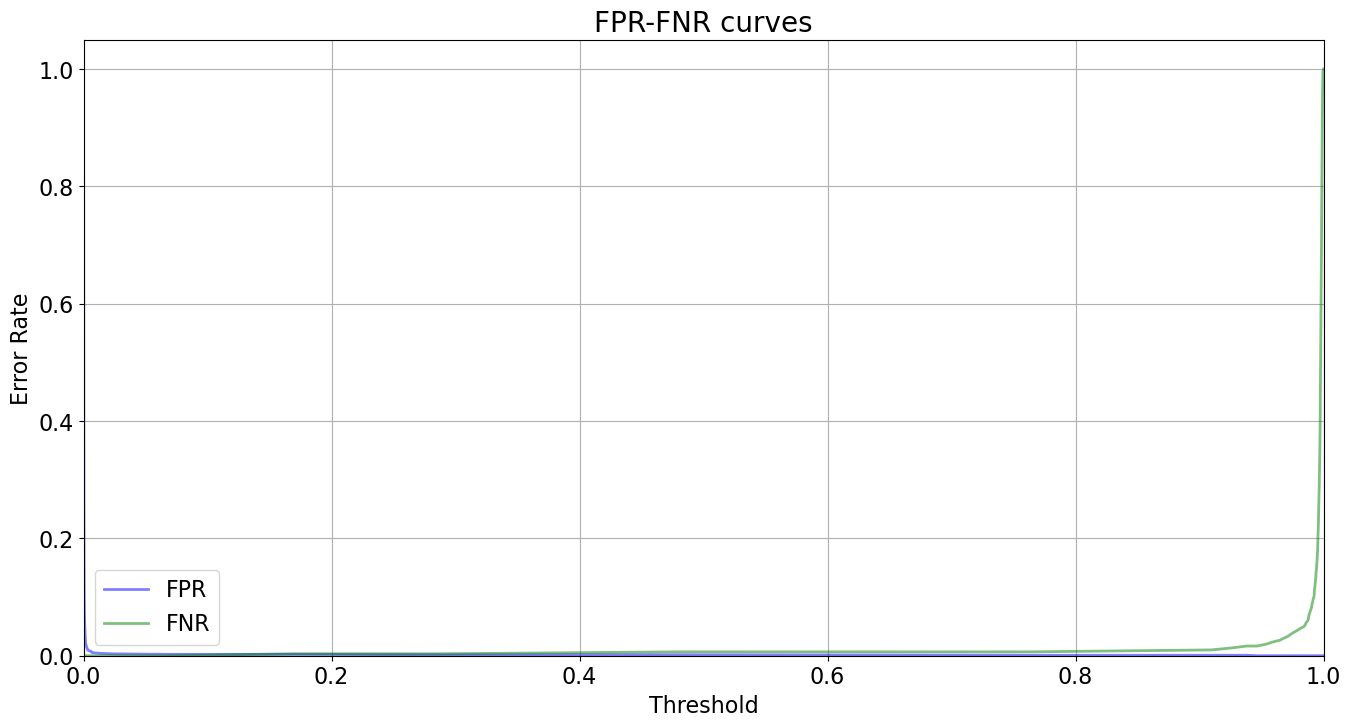

In [112]:
plt.figure(figsize=(16,8))
style = {'alpha':0.5, 'lw':2}
plt.plot(thresholds, fpr, color='blue',label='FPR',**style)
plt.plot(thresholds, fnr, color='green', label='FNR', **style)

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlabel('Threshold',fontsize=16)
plt.ylabel('Error Rate', fontsize=16)
plt.title('FPR-FNR curves', fontsize=20)
plt.legend(loc="lower left", fontsize=16);

In [114]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'iterations': [200, 500, 1000],
    'learning_rate': [0.05, 0.01],
    'depth': [ 4, 6, 8],
    'l2_leaf_reg': [0.5, 1, 3]}


clf=CatBoostClassifier(
    iterations=100,
    cat_features=cat_features,
    verbose=20
)
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3)
results=grid_search.fit(X_train,y_train)
results.best_estimator_.get_params()

0:	learn: 0.5833421	total: 19.8ms	remaining: 3.94s
20:	learn: 0.0089687	total: 413ms	remaining: 3.52s
40:	learn: 0.0028995	total: 799ms	remaining: 3.1s
60:	learn: 0.0016758	total: 1.3s	remaining: 2.97s
80:	learn: 0.0010148	total: 1.72s	remaining: 2.53s
100:	learn: 0.0007437	total: 2.2s	remaining: 2.16s
120:	learn: 0.0005924	total: 2.62s	remaining: 1.71s
140:	learn: 0.0004609	total: 3s	remaining: 1.25s
160:	learn: 0.0003794	total: 3.37s	remaining: 816ms
180:	learn: 0.0003461	total: 3.73s	remaining: 392ms
199:	learn: 0.0003305	total: 4.08s	remaining: 0us
0:	learn: 0.5509562	total: 16.8ms	remaining: 3.34s
20:	learn: 0.0059470	total: 394ms	remaining: 3.36s
40:	learn: 0.0013242	total: 847ms	remaining: 3.29s
60:	learn: 0.0007713	total: 1.31s	remaining: 2.99s
80:	learn: 0.0004480	total: 1.77s	remaining: 2.6s
100:	learn: 0.0003661	total: 2.18s	remaining: 2.14s
120:	learn: 0.0003228	total: 2.7s	remaining: 1.76s
140:	learn: 0.0003053	total: 3.13s	remaining: 1.31s
160:	learn: 0.0002950	total: 3.4

140:	learn: 0.0006170	total: 2.72s	remaining: 1.14s
160:	learn: 0.0005659	total: 3.09s	remaining: 749ms
180:	learn: 0.0005574	total: 3.48s	remaining: 365ms
199:	learn: 0.0005515	total: 3.84s	remaining: 0us
0:	learn: 0.6708632	total: 15.4ms	remaining: 3.06s
20:	learn: 0.2759279	total: 387ms	remaining: 3.29s
40:	learn: 0.1157720	total: 773ms	remaining: 3s
60:	learn: 0.0545162	total: 1.15s	remaining: 2.63s
80:	learn: 0.0291336	total: 1.61s	remaining: 2.37s
100:	learn: 0.0174225	total: 2.08s	remaining: 2.04s
120:	learn: 0.0112981	total: 2.52s	remaining: 1.65s
140:	learn: 0.0082191	total: 2.9s	remaining: 1.21s
160:	learn: 0.0061684	total: 3.27s	remaining: 793ms
180:	learn: 0.0051947	total: 3.65s	remaining: 384ms
199:	learn: 0.0043581	total: 4.04s	remaining: 0us
0:	learn: 0.6644199	total: 23.6ms	remaining: 4.7s
20:	learn: 0.2552078	total: 503ms	remaining: 4.29s
40:	learn: 0.1069852	total: 1.01s	remaining: 3.91s
60:	learn: 0.0509552	total: 1.46s	remaining: 3.33s
80:	learn: 0.0259954	total: 1.

380:	learn: 0.0005292	total: 7.98s	remaining: 2.49s
400:	learn: 0.0004992	total: 8.34s	remaining: 2.06s
420:	learn: 0.0004579	total: 8.71s	remaining: 1.63s
440:	learn: 0.0004356	total: 9.09s	remaining: 1.22s
460:	learn: 0.0004115	total: 9.45s	remaining: 799ms
480:	learn: 0.0003954	total: 9.81s	remaining: 387ms
499:	learn: 0.0003797	total: 10.1s	remaining: 0us
0:	learn: 0.6621081	total: 15.3ms	remaining: 7.63s
20:	learn: 0.2191773	total: 382ms	remaining: 8.72s
40:	learn: 0.0850089	total: 751ms	remaining: 8.41s
60:	learn: 0.0362106	total: 1.14s	remaining: 8.18s
80:	learn: 0.0166419	total: 1.53s	remaining: 7.92s
100:	learn: 0.0093987	total: 1.99s	remaining: 7.85s
120:	learn: 0.0060625	total: 2.5s	remaining: 7.84s
140:	learn: 0.0040050	total: 2.9s	remaining: 7.39s
160:	learn: 0.0028056	total: 3.28s	remaining: 6.91s
180:	learn: 0.0021131	total: 3.67s	remaining: 6.48s
200:	learn: 0.0017045	total: 4.1s	remaining: 6.09s
220:	learn: 0.0013750	total: 4.52s	remaining: 5.71s
240:	learn: 0.0011699	

460:	learn: 0.0006124	total: 8.75s	remaining: 740ms
480:	learn: 0.0005805	total: 9.12s	remaining: 360ms
499:	learn: 0.0005449	total: 9.48s	remaining: 0us
0:	learn: 0.6627164	total: 15.2ms	remaining: 7.58s
20:	learn: 0.2328009	total: 388ms	remaining: 8.85s
40:	learn: 0.0950776	total: 788ms	remaining: 8.82s
60:	learn: 0.0424653	total: 1.17s	remaining: 8.45s
80:	learn: 0.0202544	total: 1.56s	remaining: 8.06s
100:	learn: 0.0113791	total: 1.95s	remaining: 7.72s
120:	learn: 0.0069246	total: 2.34s	remaining: 7.33s
140:	learn: 0.0049310	total: 2.71s	remaining: 6.91s
160:	learn: 0.0035068	total: 3.1s	remaining: 6.54s
180:	learn: 0.0026708	total: 3.51s	remaining: 6.19s
200:	learn: 0.0021641	total: 3.93s	remaining: 5.85s
220:	learn: 0.0018085	total: 4.33s	remaining: 5.47s
240:	learn: 0.0015781	total: 4.75s	remaining: 5.11s
260:	learn: 0.0013419	total: 5.14s	remaining: 4.71s
280:	learn: 0.0011938	total: 5.53s	remaining: 4.31s
300:	learn: 0.0010632	total: 5.91s	remaining: 3.91s
320:	learn: 0.000971

20:	learn: 0.2577854	total: 383ms	remaining: 8.73s
40:	learn: 0.1122007	total: 760ms	remaining: 8.51s
60:	learn: 0.0534718	total: 1.14s	remaining: 8.18s
80:	learn: 0.0276565	total: 1.51s	remaining: 7.81s
100:	learn: 0.0160676	total: 1.89s	remaining: 7.47s
120:	learn: 0.0101537	total: 2.27s	remaining: 7.1s
140:	learn: 0.0069485	total: 2.64s	remaining: 6.71s
160:	learn: 0.0051351	total: 3.02s	remaining: 6.35s
180:	learn: 0.0040088	total: 3.39s	remaining: 5.98s
200:	learn: 0.0033708	total: 3.77s	remaining: 5.6s
220:	learn: 0.0028469	total: 4.14s	remaining: 5.23s
240:	learn: 0.0025369	total: 4.52s	remaining: 4.85s
260:	learn: 0.0022553	total: 4.89s	remaining: 4.48s
280:	learn: 0.0020339	total: 5.28s	remaining: 4.11s
300:	learn: 0.0018395	total: 5.65s	remaining: 3.74s
320:	learn: 0.0016725	total: 6.03s	remaining: 3.36s
340:	learn: 0.0015564	total: 6.43s	remaining: 3s
360:	learn: 0.0014484	total: 6.85s	remaining: 2.64s
380:	learn: 0.0013182	total: 7.28s	remaining: 2.27s
400:	learn: 0.0012688

640:	learn: 0.0001604	total: 11.3s	remaining: 6.32s
660:	learn: 0.0001603	total: 11.6s	remaining: 5.96s
680:	learn: 0.0001603	total: 12s	remaining: 5.6s
700:	learn: 0.0001603	total: 12.3s	remaining: 5.25s
720:	learn: 0.0001603	total: 12.7s	remaining: 4.9s
740:	learn: 0.0001603	total: 13s	remaining: 4.55s
760:	learn: 0.0001602	total: 13.4s	remaining: 4.19s
780:	learn: 0.0001602	total: 13.7s	remaining: 3.84s
800:	learn: 0.0001602	total: 14s	remaining: 3.49s
820:	learn: 0.0001602	total: 14.4s	remaining: 3.13s
840:	learn: 0.0001601	total: 14.7s	remaining: 2.78s
860:	learn: 0.0001601	total: 15.1s	remaining: 2.43s
880:	learn: 0.0001601	total: 15.4s	remaining: 2.08s
900:	learn: 0.0001601	total: 15.8s	remaining: 1.73s
920:	learn: 0.0001601	total: 16.1s	remaining: 1.38s
940:	learn: 0.0001601	total: 16.5s	remaining: 1.03s
960:	learn: 0.0001601	total: 16.8s	remaining: 683ms
980:	learn: 0.0001601	total: 17.2s	remaining: 333ms
999:	learn: 0.0001601	total: 17.5s	remaining: 0us
0:	learn: 0.6699543	to

760:	learn: 0.0002211	total: 14s	remaining: 4.39s
780:	learn: 0.0002126	total: 14.3s	remaining: 4.02s
800:	learn: 0.0002106	total: 14.7s	remaining: 3.65s
820:	learn: 0.0002085	total: 15.1s	remaining: 3.28s
840:	learn: 0.0002001	total: 15.4s	remaining: 2.91s
860:	learn: 0.0001970	total: 15.8s	remaining: 2.54s
880:	learn: 0.0001920	total: 16.1s	remaining: 2.18s
900:	learn: 0.0001887	total: 16.5s	remaining: 1.81s
920:	learn: 0.0001876	total: 16.8s	remaining: 1.44s
940:	learn: 0.0001872	total: 17.2s	remaining: 1.08s
960:	learn: 0.0001872	total: 17.5s	remaining: 711ms
980:	learn: 0.0001864	total: 17.9s	remaining: 346ms
999:	learn: 0.0001857	total: 18.2s	remaining: 0us
0:	learn: 0.5848273	total: 15ms	remaining: 15s
20:	learn: 0.0114168	total: 393ms	remaining: 18.3s
40:	learn: 0.0033266	total: 777ms	remaining: 18.2s
60:	learn: 0.0018962	total: 1.15s	remaining: 17.7s
80:	learn: 0.0012493	total: 1.53s	remaining: 17.3s
100:	learn: 0.0009734	total: 1.9s	remaining: 16.9s
120:	learn: 0.0007997	tota

900:	learn: 0.0002409	total: 19.1s	remaining: 2.1s
920:	learn: 0.0002409	total: 19.5s	remaining: 1.68s
940:	learn: 0.0002409	total: 19.9s	remaining: 1.25s
960:	learn: 0.0002409	total: 20.3s	remaining: 823ms
980:	learn: 0.0002409	total: 20.8s	remaining: 403ms
999:	learn: 0.0002409	total: 21.2s	remaining: 0us
0:	learn: 0.6702974	total: 15.7ms	remaining: 15.7s
20:	learn: 0.2530228	total: 406ms	remaining: 18.9s
40:	learn: 0.0971621	total: 795ms	remaining: 18.6s
60:	learn: 0.0415030	total: 1.17s	remaining: 18s
80:	learn: 0.0207574	total: 1.56s	remaining: 17.7s
100:	learn: 0.0115208	total: 1.95s	remaining: 17.3s
120:	learn: 0.0075584	total: 2.33s	remaining: 16.9s
140:	learn: 0.0056167	total: 2.72s	remaining: 16.6s
160:	learn: 0.0045758	total: 3.17s	remaining: 16.5s
180:	learn: 0.0038205	total: 3.66s	remaining: 16.6s
200:	learn: 0.0031987	total: 4.22s	remaining: 16.8s
220:	learn: 0.0027670	total: 4.74s	remaining: 16.7s
240:	learn: 0.0024868	total: 5.35s	remaining: 16.9s
260:	learn: 0.0023196	

20:	learn: 0.0173759	total: 407ms	remaining: 19s
40:	learn: 0.0041290	total: 783ms	remaining: 18.3s
60:	learn: 0.0024607	total: 1.16s	remaining: 17.9s
80:	learn: 0.0017598	total: 1.54s	remaining: 17.5s
100:	learn: 0.0014041	total: 1.92s	remaining: 17.1s
120:	learn: 0.0011643	total: 2.3s	remaining: 16.7s
140:	learn: 0.0010060	total: 2.67s	remaining: 16.2s
160:	learn: 0.0008878	total: 3.04s	remaining: 15.8s
180:	learn: 0.0007918	total: 3.4s	remaining: 15.4s
200:	learn: 0.0007537	total: 3.76s	remaining: 14.9s
220:	learn: 0.0007210	total: 4.11s	remaining: 14.5s
240:	learn: 0.0006887	total: 4.47s	remaining: 14.1s
260:	learn: 0.0006647	total: 4.83s	remaining: 13.7s
280:	learn: 0.0006560	total: 5.2s	remaining: 13.3s
300:	learn: 0.0006558	total: 5.55s	remaining: 12.9s
320:	learn: 0.0006349	total: 5.92s	remaining: 12.5s
340:	learn: 0.0006156	total: 6.28s	remaining: 12.1s
360:	learn: 0.0006082	total: 6.65s	remaining: 11.8s
380:	learn: 0.0005904	total: 7s	remaining: 11.4s
400:	learn: 0.0005897	to

140:	learn: 0.0082191	total: 2.63s	remaining: 16s
160:	learn: 0.0061684	total: 3.01s	remaining: 15.7s
180:	learn: 0.0051947	total: 3.5s	remaining: 15.8s
200:	learn: 0.0043357	total: 3.98s	remaining: 15.8s
220:	learn: 0.0038241	total: 4.43s	remaining: 15.6s
240:	learn: 0.0034229	total: 4.84s	remaining: 15.2s
260:	learn: 0.0031159	total: 5.21s	remaining: 14.8s
280:	learn: 0.0028144	total: 5.61s	remaining: 14.4s
300:	learn: 0.0026117	total: 6.1s	remaining: 14.2s
320:	learn: 0.0024708	total: 6.53s	remaining: 13.8s
340:	learn: 0.0023133	total: 6.94s	remaining: 13.4s
360:	learn: 0.0021830	total: 7.33s	remaining: 13s
380:	learn: 0.0020709	total: 7.72s	remaining: 12.5s
400:	learn: 0.0019837	total: 8.12s	remaining: 12.1s
420:	learn: 0.0018875	total: 8.51s	remaining: 11.7s
440:	learn: 0.0018083	total: 8.91s	remaining: 11.3s
460:	learn: 0.0017331	total: 9.39s	remaining: 11s
480:	learn: 0.0016637	total: 9.87s	remaining: 10.7s
500:	learn: 0.0015897	total: 10.3s	remaining: 10.2s
520:	learn: 0.001526

60:	learn: 0.0004826	total: 1.64s	remaining: 3.75s
80:	learn: 0.0002973	total: 2.18s	remaining: 3.2s
100:	learn: 0.0002476	total: 2.71s	remaining: 2.65s
120:	learn: 0.0002292	total: 3.23s	remaining: 2.11s
140:	learn: 0.0002292	total: 3.75s	remaining: 1.57s
160:	learn: 0.0001919	total: 4.28s	remaining: 1.03s
180:	learn: 0.0001788	total: 4.79s	remaining: 503ms
199:	learn: 0.0001788	total: 5.29s	remaining: 0us
0:	learn: 0.5413140	total: 23.9ms	remaining: 4.75s
20:	learn: 0.0075656	total: 602ms	remaining: 5.13s
40:	learn: 0.0008965	total: 1.19s	remaining: 4.61s
60:	learn: 0.0003725	total: 1.77s	remaining: 4.05s
80:	learn: 0.0002415	total: 2.32s	remaining: 3.41s
100:	learn: 0.0001871	total: 2.85s	remaining: 2.79s
120:	learn: 0.0001799	total: 3.38s	remaining: 2.2s
140:	learn: 0.0001745	total: 3.9s	remaining: 1.63s
160:	learn: 0.0001629	total: 4.42s	remaining: 1.07s
180:	learn: 0.0001629	total: 4.94s	remaining: 519ms
199:	learn: 0.0001497	total: 5.43s	remaining: 0us
0:	learn: 0.6691437	total:

199:	learn: 0.0042925	total: 5.76s	remaining: 0us
0:	learn: 0.6635190	total: 23.1ms	remaining: 4.6s
20:	learn: 0.2897403	total: 556ms	remaining: 4.74s
40:	learn: 0.1342998	total: 1.09s	remaining: 4.24s
60:	learn: 0.0632575	total: 1.65s	remaining: 3.75s
80:	learn: 0.0331079	total: 2.19s	remaining: 3.21s
100:	learn: 0.0192535	total: 2.72s	remaining: 2.67s
120:	learn: 0.0120635	total: 3.26s	remaining: 2.13s
140:	learn: 0.0080834	total: 3.8s	remaining: 1.59s
160:	learn: 0.0057895	total: 4.33s	remaining: 1.05s
180:	learn: 0.0043325	total: 4.87s	remaining: 511ms
199:	learn: 0.0034919	total: 5.38s	remaining: 0us
0:	learn: 0.6644507	total: 23.3ms	remaining: 4.64s
20:	learn: 0.2787444	total: 554ms	remaining: 4.72s
40:	learn: 0.1237579	total: 1.09s	remaining: 4.24s
60:	learn: 0.0620198	total: 1.63s	remaining: 3.72s
80:	learn: 0.0332419	total: 2.17s	remaining: 3.19s
100:	learn: 0.0198120	total: 2.73s	remaining: 2.68s
120:	learn: 0.0125286	total: 3.27s	remaining: 2.14s
140:	learn: 0.0081536	total:

140:	learn: 0.0028975	total: 4.44s	remaining: 11.3s
160:	learn: 0.0020383	total: 4.98s	remaining: 10.5s
180:	learn: 0.0014570	total: 5.54s	remaining: 9.76s
200:	learn: 0.0010432	total: 6.08s	remaining: 9.04s
220:	learn: 0.0008264	total: 6.62s	remaining: 8.36s
240:	learn: 0.0006806	total: 7.25s	remaining: 7.79s
260:	learn: 0.0005575	total: 7.79s	remaining: 7.13s
280:	learn: 0.0004647	total: 8.33s	remaining: 6.49s
300:	learn: 0.0004008	total: 8.87s	remaining: 5.86s
320:	learn: 0.0003489	total: 9.41s	remaining: 5.25s
340:	learn: 0.0003060	total: 9.93s	remaining: 4.63s
360:	learn: 0.0002832	total: 10.5s	remaining: 4.04s
380:	learn: 0.0002698	total: 11.1s	remaining: 3.48s
400:	learn: 0.0002488	total: 11.9s	remaining: 2.93s
420:	learn: 0.0002380	total: 12.6s	remaining: 2.36s
440:	learn: 0.0002282	total: 13.2s	remaining: 1.76s
460:	learn: 0.0002210	total: 13.7s	remaining: 1.16s
480:	learn: 0.0002142	total: 14.3s	remaining: 565ms
499:	learn: 0.0002022	total: 14.9s	remaining: 0us
0:	learn: 0.58

KeyboardInterrupt: 

In [115]:
from catboost import cv
params = {
    'loss_function': 'Logloss',
    'iterations': 500,
    'custom_loss':'AUC',
    'learning_rate':0.03,
}

cv_data = cv(
    params =params,
    pool = train_pool,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    plot=True,
    stratified=False,
    verbose=False
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.000989005794
bestIteration = 369

Training on fold [1/5]

bestTest = 0.004776510737
bestIteration = 129

Training on fold [2/5]

bestTest = 0.003984459498
bestIteration = 215

Training on fold [3/5]

bestTest = 0.001081508069
bestIteration = 443

Training on fold [4/5]

bestTest = 0.003149193737
bestIteration = 249



regressor

In [116]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
import shap
# import load_boston
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [117]:
y= df3['apy']
X= df3.drop('apy',axis=1)


In [118]:
from sklearn.model_selection import train_test_split
data = train_test_split(X,y,test_size=0.2,random_state=0)
X_train, X_test,y_train,y_test=data
data2 = train_test_split(X_train,y_train,test_size=0.2,random_state=0)
X_train, X_validation,y_train,y_validation=data2

In [119]:
train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features
)

validation_pool = Pool(
    data =X_validation,
    label=y_validation,
    cat_features=cat_features
)
test_pool = Pool(
    data =X_test,
    label=y_test,
    cat_features=cat_features
)

In [120]:
from catboost import CatBoostRegressor

In [121]:
%%time
model = CatBoostRegressor(
    iterations=50,
    learning_rate=0.5,
#     verbose=5,
    loss_function='RMSE'
)
grid = {'iterations': [200, 500, 1000],
        'learning_rate': [0.03, 0.01],
        'depth': [ 4, 6, 8],
        'l2_leaf_reg': [0.5, 1, 3]}
model.grid_search(grid, train_pool,plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 73.9747690	test: 346.4586173	best: 346.4586173 (0)	total: 23ms	remaining: 4.57s
1:	learn: 72.6266694	test: 345.1688148	best: 345.1688148 (1)	total: 46.1ms	remaining: 4.57s
2:	learn: 71.2278981	test: 343.8202037	best: 343.8202037 (2)	total: 74.1ms	remaining: 4.87s
3:	learn: 69.9876697	test: 343.4197110	best: 343.4197110 (3)	total: 95ms	remaining: 4.66s
4:	learn: 68.6700416	test: 342.1508567	best: 342.1508567 (4)	total: 120ms	remaining: 4.68s
5:	learn: 67.6352450	test: 341.2761739	best: 341.2761739 (5)	total: 141ms	remaining: 4.55s
6:	learn: 66.5769854	test: 340.6624784	best: 340.6624784 (6)	total: 159ms	remaining: 4.38s
7:	learn: 65.4817265	test: 339.5472616	best: 339.5472616 (7)	total: 177ms	remaining: 4.24s
8:	learn: 64.3516915	test: 338.4043182	best: 338.4043182 (8)	total: 193ms	remaining: 4.1s
9:	learn: 63.3454014	test: 337.8794422	best: 337.8794422 (9)	total: 209ms	remaining: 3.97s
10:	learn: 62.2570241	test: 337.4260618	best: 337.4260618 (10)	total: 226ms	remaining: 3.88

90:	learn: 22.4445802	test: 315.9135806	best: 315.9135806 (90)	total: 1.75s	remaining: 2.1s
91:	learn: 22.2982137	test: 315.8805734	best: 315.8805734 (91)	total: 1.77s	remaining: 2.08s
92:	learn: 22.1196380	test: 315.8660892	best: 315.8660892 (92)	total: 1.79s	remaining: 2.06s
93:	learn: 21.9407637	test: 315.5352379	best: 315.5352379 (93)	total: 1.81s	remaining: 2.04s
94:	learn: 21.7849569	test: 315.5366715	best: 315.5352379 (93)	total: 1.83s	remaining: 2.02s
95:	learn: 21.6311265	test: 315.4895679	best: 315.4895679 (95)	total: 1.85s	remaining: 2s
96:	learn: 21.4755846	test: 315.4604803	best: 315.4604803 (96)	total: 1.87s	remaining: 1.98s
97:	learn: 21.3303501	test: 315.3129614	best: 315.3129614 (97)	total: 1.89s	remaining: 1.97s
98:	learn: 21.1972446	test: 315.2977129	best: 315.2977129 (98)	total: 1.92s	remaining: 1.96s
99:	learn: 21.0382430	test: 315.2416695	best: 315.2416695 (99)	total: 1.94s	remaining: 1.94s
100:	learn: 20.8466830	test: 314.9711557	best: 314.9711557 (100)	total: 1.

182:	learn: 13.3297847	test: 311.9756915	best: 311.9756915 (182)	total: 3.95s	remaining: 367ms
183:	learn: 13.2765616	test: 312.0066897	best: 311.9756915 (182)	total: 3.97s	remaining: 346ms
184:	learn: 13.2112297	test: 312.0284151	best: 311.9756915 (182)	total: 4s	remaining: 325ms
185:	learn: 13.1714645	test: 312.0258905	best: 311.9756915 (182)	total: 4.03s	remaining: 303ms
186:	learn: 13.1057434	test: 312.0447075	best: 311.9756915 (182)	total: 4.05s	remaining: 282ms
187:	learn: 13.0419216	test: 311.9201498	best: 311.9201498 (187)	total: 4.08s	remaining: 260ms
188:	learn: 12.9927643	test: 311.9478122	best: 311.9201498 (187)	total: 4.11s	remaining: 239ms
189:	learn: 12.9326626	test: 311.9434011	best: 311.9201498 (187)	total: 4.14s	remaining: 218ms
190:	learn: 12.8759271	test: 311.9252778	best: 311.9201498 (187)	total: 4.16s	remaining: 196ms
191:	learn: 12.8239190	test: 311.9227952	best: 311.9201498 (187)	total: 4.19s	remaining: 175ms
192:	learn: 12.7636790	test: 311.8040267	best: 311.80

74:	learn: 49.6159740	test: 331.5379890	best: 331.5379890 (74)	total: 1.45s	remaining: 2.41s
75:	learn: 49.3464090	test: 331.2510651	best: 331.2510651 (75)	total: 1.47s	remaining: 2.4s
76:	learn: 49.1065395	test: 331.0968336	best: 331.0968336 (76)	total: 1.49s	remaining: 2.38s
77:	learn: 48.8642684	test: 330.9445313	best: 330.9445313 (77)	total: 1.51s	remaining: 2.36s
78:	learn: 48.6241973	test: 330.7850237	best: 330.7850237 (78)	total: 1.53s	remaining: 2.34s
79:	learn: 48.3463205	test: 330.7468468	best: 330.7468468 (79)	total: 1.54s	remaining: 2.31s
80:	learn: 48.1295406	test: 330.6242591	best: 330.6242591 (80)	total: 1.56s	remaining: 2.29s
81:	learn: 47.9072082	test: 330.5043642	best: 330.5043642 (81)	total: 1.58s	remaining: 2.27s
82:	learn: 47.6567251	test: 330.3728063	best: 330.3728063 (82)	total: 1.6s	remaining: 2.25s
83:	learn: 47.4202552	test: 330.3431520	best: 330.3431520 (83)	total: 1.61s	remaining: 2.23s
84:	learn: 47.1639241	test: 330.0667709	best: 330.0667709 (84)	total: 1.

170:	learn: 31.8904847	test: 322.2186673	best: 322.2186673 (170)	total: 3.48s	remaining: 590ms
171:	learn: 31.7725808	test: 322.2078552	best: 322.2078552 (171)	total: 3.5s	remaining: 571ms
172:	learn: 31.6500465	test: 322.1498197	best: 322.1498197 (172)	total: 3.52s	remaining: 550ms
173:	learn: 31.5332813	test: 322.0512003	best: 322.0512003 (173)	total: 3.54s	remaining: 529ms
174:	learn: 31.3931300	test: 321.8797788	best: 321.8797788 (174)	total: 3.56s	remaining: 509ms
175:	learn: 31.2568049	test: 321.8726637	best: 321.8726637 (175)	total: 3.59s	remaining: 490ms
176:	learn: 31.1293631	test: 321.7897572	best: 321.7897572 (176)	total: 3.62s	remaining: 471ms
177:	learn: 31.0048747	test: 321.7571156	best: 321.7571156 (177)	total: 3.64s	remaining: 450ms
178:	learn: 30.8869464	test: 321.6989735	best: 321.6989735 (178)	total: 3.67s	remaining: 430ms
179:	learn: 30.7803886	test: 321.6251023	best: 321.6251023 (179)	total: 3.69s	remaining: 411ms
180:	learn: 30.6715845	test: 321.5942314	best: 321.

57:	learn: 34.9828007	test: 327.8012692	best: 327.8012692 (57)	total: 1.22s	remaining: 2.98s
58:	learn: 34.6491467	test: 327.6310332	best: 327.6310332 (58)	total: 1.25s	remaining: 2.98s
59:	learn: 34.2437374	test: 327.5466719	best: 327.5466719 (59)	total: 1.27s	remaining: 2.97s
60:	learn: 33.9222924	test: 327.2192971	best: 327.2192971 (60)	total: 1.31s	remaining: 2.98s
61:	learn: 33.5822600	test: 327.0134659	best: 327.0134659 (61)	total: 1.35s	remaining: 3.01s
62:	learn: 33.2334742	test: 326.9883225	best: 326.9883225 (62)	total: 1.37s	remaining: 2.99s
63:	learn: 32.9583685	test: 326.9003051	best: 326.9003051 (63)	total: 1.41s	remaining: 2.99s
64:	learn: 32.7046396	test: 326.7341181	best: 326.7341181 (64)	total: 1.44s	remaining: 2.98s
65:	learn: 32.3970649	test: 326.5221898	best: 326.5221898 (65)	total: 1.47s	remaining: 2.98s
66:	learn: 32.0319028	test: 326.2446518	best: 326.2446518 (66)	total: 1.5s	remaining: 2.97s
67:	learn: 31.6532186	test: 326.1309868	best: 326.1309868 (67)	total: 1

149:	learn: 17.1816127	test: 320.9771577	best: 320.9472359 (148)	total: 3.86s	remaining: 1.29s
150:	learn: 17.0715838	test: 320.9390951	best: 320.9390951 (150)	total: 3.89s	remaining: 1.26s
151:	learn: 16.9819258	test: 320.9082027	best: 320.9082027 (151)	total: 3.92s	remaining: 1.24s
152:	learn: 16.8736587	test: 320.8841799	best: 320.8841799 (152)	total: 3.94s	remaining: 1.21s
153:	learn: 16.7801879	test: 320.8291701	best: 320.8291701 (153)	total: 3.96s	remaining: 1.18s
154:	learn: 16.7032065	test: 320.8064595	best: 320.8064595 (154)	total: 3.99s	remaining: 1.16s
155:	learn: 16.6197782	test: 320.8216957	best: 320.8064595 (154)	total: 4.01s	remaining: 1.13s
156:	learn: 16.5451747	test: 320.7817084	best: 320.7817084 (156)	total: 4.05s	remaining: 1.11s
157:	learn: 16.4838431	test: 320.7935535	best: 320.7817084 (156)	total: 4.08s	remaining: 1.08s
158:	learn: 16.3898169	test: 320.7487830	best: 320.7487830 (158)	total: 4.11s	remaining: 1.06s
159:	learn: 16.3216752	test: 320.7341996	best: 320

36:	learn: 62.5010841	test: 341.0009584	best: 341.0009584 (36)	total: 757ms	remaining: 3.34s
37:	learn: 62.2032339	test: 340.7898158	best: 340.7898158 (37)	total: 782ms	remaining: 3.33s
38:	learn: 61.8980159	test: 340.4779386	best: 340.4779386 (38)	total: 801ms	remaining: 3.31s
39:	learn: 61.6251317	test: 340.3903219	best: 340.3903219 (39)	total: 819ms	remaining: 3.28s
40:	learn: 61.3941559	test: 340.2114443	best: 340.2114443 (40)	total: 838ms	remaining: 3.25s
41:	learn: 61.1181399	test: 340.0103169	best: 340.0103169 (41)	total: 855ms	remaining: 3.21s
42:	learn: 60.8273654	test: 339.7874463	best: 339.7874463 (42)	total: 874ms	remaining: 3.19s
43:	learn: 60.5782728	test: 339.5417023	best: 339.5417023 (43)	total: 894ms	remaining: 3.17s
44:	learn: 60.2883490	test: 339.3175014	best: 339.3175014 (44)	total: 915ms	remaining: 3.15s
45:	learn: 60.0260949	test: 339.1853485	best: 339.1853485 (45)	total: 933ms	remaining: 3.12s
46:	learn: 59.7285297	test: 339.1187248	best: 339.1187248 (46)	total: 

134:	learn: 41.0719288	test: 328.1034252	best: 328.1034252 (134)	total: 2.74s	remaining: 1.32s
135:	learn: 40.9530962	test: 328.0147357	best: 328.0147357 (135)	total: 2.76s	remaining: 1.3s
136:	learn: 40.7977871	test: 327.9135761	best: 327.9135761 (136)	total: 2.78s	remaining: 1.28s
137:	learn: 40.6010210	test: 327.9015998	best: 327.9015998 (137)	total: 2.8s	remaining: 1.26s
138:	learn: 40.4673624	test: 327.7691750	best: 327.7691750 (138)	total: 2.82s	remaining: 1.24s
139:	learn: 40.3428246	test: 327.7212323	best: 327.7212323 (139)	total: 2.84s	remaining: 1.22s
140:	learn: 40.2089375	test: 327.6742156	best: 327.6742156 (140)	total: 2.86s	remaining: 1.2s
141:	learn: 40.0346779	test: 327.6623425	best: 327.6623425 (141)	total: 2.87s	remaining: 1.17s
142:	learn: 39.8841690	test: 327.5379653	best: 327.5379653 (142)	total: 2.89s	remaining: 1.15s
143:	learn: 39.7464941	test: 327.4516987	best: 327.4516987 (143)	total: 2.91s	remaining: 1.13s
144:	learn: 39.6127592	test: 327.3333690	best: 327.33

20:	learn: 60.4072633	test: 340.8243847	best: 340.8243847 (20)	total: 415ms	remaining: 3.54s
21:	learn: 60.0456399	test: 340.5979806	best: 340.5979806 (21)	total: 439ms	remaining: 3.55s
22:	learn: 59.5136991	test: 340.1975941	best: 340.1975941 (22)	total: 463ms	remaining: 3.56s
23:	learn: 58.9944234	test: 339.7854287	best: 339.7854287 (23)	total: 486ms	remaining: 3.57s
24:	learn: 58.4693918	test: 339.5012687	best: 339.5012687 (24)	total: 506ms	remaining: 3.54s
25:	learn: 57.8052471	test: 339.4352007	best: 339.4352007 (25)	total: 525ms	remaining: 3.51s
26:	learn: 57.2561532	test: 339.3860227	best: 339.3860227 (26)	total: 545ms	remaining: 3.49s
27:	learn: 56.7250594	test: 339.2435871	best: 339.2435871 (27)	total: 564ms	remaining: 3.46s
28:	learn: 56.2888472	test: 339.1196629	best: 339.1196629 (28)	total: 585ms	remaining: 3.45s
29:	learn: 55.8485273	test: 338.7699316	best: 338.7699316 (29)	total: 608ms	remaining: 3.44s
30:	learn: 55.3988377	test: 338.6878436	best: 338.6878436 (30)	total: 

115:	learn: 31.1785479	test: 326.3803332	best: 326.3803332 (115)	total: 2.35s	remaining: 1.7s
116:	learn: 30.9548995	test: 326.2239304	best: 326.2239304 (116)	total: 2.38s	remaining: 1.69s
117:	learn: 30.7724996	test: 326.1483963	best: 326.1483963 (117)	total: 2.4s	remaining: 1.67s
118:	learn: 30.6095218	test: 326.0556330	best: 326.0556330 (118)	total: 2.42s	remaining: 1.65s
119:	learn: 30.4454471	test: 325.9451983	best: 325.9451983 (119)	total: 2.44s	remaining: 1.63s
120:	learn: 30.2736140	test: 325.9078267	best: 325.9078267 (120)	total: 2.46s	remaining: 1.6s
121:	learn: 30.1227795	test: 325.7631552	best: 325.7631552 (121)	total: 2.48s	remaining: 1.58s
122:	learn: 29.8527491	test: 325.4318819	best: 325.4318819 (122)	total: 2.5s	remaining: 1.56s
123:	learn: 29.6658784	test: 325.3620889	best: 325.3620889 (123)	total: 2.51s	remaining: 1.54s
124:	learn: 29.4958585	test: 325.2523843	best: 325.2523843 (124)	total: 2.53s	remaining: 1.52s
125:	learn: 29.2403509	test: 325.2139710	best: 325.213

12:	learn: 71.7262017	test: 345.5827800	best: 345.5827800 (12)	total: 240ms	remaining: 3.46s
13:	learn: 71.4167137	test: 345.5235913	best: 345.5235913 (13)	total: 262ms	remaining: 3.48s
14:	learn: 71.1090023	test: 345.1940250	best: 345.1940250 (14)	total: 280ms	remaining: 3.45s
15:	learn: 70.8546134	test: 345.0426885	best: 345.0426885 (15)	total: 297ms	remaining: 3.42s
16:	learn: 70.5860101	test: 344.9624832	best: 344.9624832 (16)	total: 317ms	remaining: 3.41s
17:	learn: 70.2785009	test: 344.8611260	best: 344.8611260 (17)	total: 333ms	remaining: 3.37s
18:	learn: 69.9804060	test: 344.7637000	best: 344.7637000 (18)	total: 352ms	remaining: 3.35s
19:	learn: 69.7904880	test: 344.6386489	best: 344.6386489 (19)	total: 371ms	remaining: 3.34s
20:	learn: 69.5436049	test: 344.5654219	best: 344.5654219 (20)	total: 391ms	remaining: 3.33s
21:	learn: 69.3005190	test: 344.4931915	best: 344.4931915 (21)	total: 407ms	remaining: 3.29s
22:	learn: 69.0828556	test: 344.3275822	best: 344.3275822 (22)	total: 

106:	learn: 53.0420573	test: 336.1311489	best: 336.1311489 (106)	total: 2.23s	remaining: 1.94s
107:	learn: 52.9038377	test: 336.0508305	best: 336.0508305 (107)	total: 2.25s	remaining: 1.92s
108:	learn: 52.7687980	test: 336.0299066	best: 336.0299066 (108)	total: 2.27s	remaining: 1.9s
109:	learn: 52.6117817	test: 335.9412283	best: 335.9412283 (109)	total: 2.29s	remaining: 1.87s
110:	learn: 52.4739554	test: 335.8670111	best: 335.8670111 (110)	total: 2.31s	remaining: 1.85s
111:	learn: 52.3399713	test: 335.8496357	best: 335.8496357 (111)	total: 2.33s	remaining: 1.83s
112:	learn: 52.2085323	test: 335.7419295	best: 335.7419295 (112)	total: 2.35s	remaining: 1.8s
113:	learn: 52.1144128	test: 335.6624445	best: 335.6624445 (113)	total: 2.36s	remaining: 1.78s
114:	learn: 51.9868681	test: 335.5971752	best: 335.5971752 (114)	total: 2.38s	remaining: 1.76s
115:	learn: 51.8215275	test: 335.5526269	best: 335.5526269 (115)	total: 2.4s	remaining: 1.74s
116:	learn: 51.6847108	test: 335.4356384	best: 335.43

0:	learn: 73.9747690	test: 346.4586173	best: 346.4586173 (0)	total: 14.8ms	remaining: 7.38s
1:	learn: 72.6266694	test: 345.1688148	best: 345.1688148 (1)	total: 36.2ms	remaining: 9.01s
2:	learn: 71.2278981	test: 343.8202037	best: 343.8202037 (2)	total: 52.9ms	remaining: 8.76s
3:	learn: 69.9876697	test: 343.4197110	best: 343.4197110 (3)	total: 72.2ms	remaining: 8.95s
4:	learn: 68.6700416	test: 342.1508567	best: 342.1508567 (4)	total: 89.9ms	remaining: 8.9s
5:	learn: 67.6352450	test: 341.2761739	best: 341.2761739 (5)	total: 108ms	remaining: 8.86s
6:	learn: 66.5769854	test: 340.6624784	best: 340.6624784 (6)	total: 125ms	remaining: 8.84s
7:	learn: 65.4817265	test: 339.5472616	best: 339.5472616 (7)	total: 144ms	remaining: 8.85s
8:	learn: 64.3516915	test: 338.4043182	best: 338.4043182 (8)	total: 161ms	remaining: 8.79s
9:	learn: 63.3454014	test: 337.8794422	best: 337.8794422 (9)	total: 180ms	remaining: 8.83s
10:	learn: 62.2570241	test: 337.4260618	best: 337.4260618 (10)	total: 196ms	remaining:

90:	learn: 22.4445802	test: 315.9135806	best: 315.9135806 (90)	total: 1.76s	remaining: 7.93s
91:	learn: 22.2982137	test: 315.8805734	best: 315.8805734 (91)	total: 1.79s	remaining: 7.92s
92:	learn: 22.1196380	test: 315.8660892	best: 315.8660892 (92)	total: 1.8s	remaining: 7.9s
93:	learn: 21.9407637	test: 315.5352379	best: 315.5352379 (93)	total: 1.82s	remaining: 7.88s
94:	learn: 21.7849569	test: 315.5366715	best: 315.5352379 (93)	total: 1.84s	remaining: 7.85s
95:	learn: 21.6311265	test: 315.4895679	best: 315.4895679 (95)	total: 1.86s	remaining: 7.82s
96:	learn: 21.4755846	test: 315.4604803	best: 315.4604803 (96)	total: 1.88s	remaining: 7.79s
97:	learn: 21.3303501	test: 315.3129614	best: 315.3129614 (97)	total: 1.89s	remaining: 7.76s
98:	learn: 21.1972446	test: 315.2977129	best: 315.2977129 (98)	total: 1.91s	remaining: 7.75s
99:	learn: 21.0382430	test: 315.2416695	best: 315.2416695 (99)	total: 1.93s	remaining: 7.71s
100:	learn: 20.8466830	test: 314.9711557	best: 314.9711557 (100)	total: 

184:	learn: 13.2112297	test: 312.0284151	best: 311.9756915 (182)	total: 3.52s	remaining: 5.99s
185:	learn: 13.1714645	test: 312.0258905	best: 311.9756915 (182)	total: 3.55s	remaining: 5.99s
186:	learn: 13.1057434	test: 312.0447075	best: 311.9756915 (182)	total: 3.56s	remaining: 5.97s
187:	learn: 13.0419216	test: 311.9201498	best: 311.9201498 (187)	total: 3.59s	remaining: 5.95s
188:	learn: 12.9927643	test: 311.9478122	best: 311.9201498 (187)	total: 3.6s	remaining: 5.93s
189:	learn: 12.9326626	test: 311.9434011	best: 311.9201498 (187)	total: 3.62s	remaining: 5.91s
190:	learn: 12.8759271	test: 311.9252778	best: 311.9201498 (187)	total: 3.64s	remaining: 5.89s
191:	learn: 12.8239190	test: 311.9227952	best: 311.9201498 (187)	total: 3.66s	remaining: 5.87s
192:	learn: 12.7636790	test: 311.8040267	best: 311.8040267 (192)	total: 3.68s	remaining: 5.85s
193:	learn: 12.7118606	test: 311.8013958	best: 311.8013958 (193)	total: 3.7s	remaining: 5.83s
194:	learn: 12.6848272	test: 311.7979314	best: 311.7

276:	learn: 10.0094792	test: 311.0681903	best: 311.0681903 (276)	total: 5.54s	remaining: 4.46s
277:	learn: 9.9933776	test: 311.0666926	best: 311.0666926 (277)	total: 5.57s	remaining: 4.45s
278:	learn: 9.9552731	test: 311.0595197	best: 311.0595197 (278)	total: 5.59s	remaining: 4.43s
279:	learn: 9.9403092	test: 311.0548259	best: 311.0548259 (279)	total: 5.62s	remaining: 4.42s
280:	learn: 9.9173926	test: 311.0534124	best: 311.0534124 (280)	total: 5.66s	remaining: 4.41s
281:	learn: 9.8907812	test: 311.0590430	best: 311.0534124 (280)	total: 5.68s	remaining: 4.39s
282:	learn: 9.8655566	test: 311.0600683	best: 311.0534124 (280)	total: 5.71s	remaining: 4.38s
283:	learn: 9.8470060	test: 311.0597644	best: 311.0534124 (280)	total: 5.73s	remaining: 4.36s
284:	learn: 9.8334870	test: 311.0596691	best: 311.0534124 (280)	total: 5.75s	remaining: 4.34s
285:	learn: 9.8134762	test: 311.0581185	best: 311.0534124 (280)	total: 5.78s	remaining: 4.32s
286:	learn: 9.7931701	test: 311.0788812	best: 311.0534124 (

371:	learn: 8.1874791	test: 310.9317039	best: 310.7310615 (338)	total: 7.48s	remaining: 2.57s
372:	learn: 8.1669986	test: 310.9285495	best: 310.7310615 (338)	total: 7.5s	remaining: 2.56s
373:	learn: 8.1538926	test: 310.9475363	best: 310.7310615 (338)	total: 7.52s	remaining: 2.53s
374:	learn: 8.1408353	test: 310.9480722	best: 310.7310615 (338)	total: 7.54s	remaining: 2.51s
375:	learn: 8.1295173	test: 310.9469977	best: 310.7310615 (338)	total: 7.56s	remaining: 2.49s
376:	learn: 8.1199936	test: 310.9405053	best: 310.7310615 (338)	total: 7.58s	remaining: 2.47s
377:	learn: 8.1106247	test: 310.9417594	best: 310.7310615 (338)	total: 7.6s	remaining: 2.45s
378:	learn: 8.0926917	test: 310.9410920	best: 310.7310615 (338)	total: 7.62s	remaining: 2.43s
379:	learn: 8.0832511	test: 310.9427115	best: 310.7310615 (338)	total: 7.64s	remaining: 2.41s
380:	learn: 8.0632207	test: 310.9691501	best: 310.7310615 (338)	total: 7.65s	remaining: 2.39s
381:	learn: 8.0520804	test: 310.9830896	best: 310.7310615 (338

464:	learn: 6.9640914	test: 311.0474306	best: 310.7310615 (338)	total: 9.26s	remaining: 697ms
465:	learn: 6.9504691	test: 311.0590475	best: 310.7310615 (338)	total: 9.28s	remaining: 677ms
466:	learn: 6.9408103	test: 311.0578307	best: 310.7310615 (338)	total: 9.29s	remaining: 657ms
467:	learn: 6.9268070	test: 311.0674597	best: 310.7310615 (338)	total: 9.31s	remaining: 637ms
468:	learn: 6.9218678	test: 311.0684075	best: 310.7310615 (338)	total: 9.33s	remaining: 617ms
469:	learn: 6.9141166	test: 311.0666226	best: 310.7310615 (338)	total: 9.34s	remaining: 596ms
470:	learn: 6.9011810	test: 311.0614828	best: 310.7310615 (338)	total: 9.36s	remaining: 576ms
471:	learn: 6.8935742	test: 311.0522159	best: 310.7310615 (338)	total: 9.38s	remaining: 556ms
472:	learn: 6.8822603	test: 311.0476585	best: 310.7310615 (338)	total: 9.39s	remaining: 536ms
473:	learn: 6.8703775	test: 311.0506289	best: 310.7310615 (338)	total: 9.41s	remaining: 516ms
474:	learn: 6.8646426	test: 311.0501900	best: 310.7310615 (3

60:	learn: 53.3368714	test: 333.3901620	best: 333.3901620 (60)	total: 1.37s	remaining: 9.85s
61:	learn: 53.0461536	test: 333.2165975	best: 333.2165975 (61)	total: 1.41s	remaining: 9.93s
62:	learn: 52.7672473	test: 333.1922824	best: 333.1922824 (62)	total: 1.42s	remaining: 9.88s
63:	learn: 52.5187701	test: 332.9438173	best: 332.9438173 (63)	total: 1.45s	remaining: 9.88s
64:	learn: 52.2465663	test: 332.7405012	best: 332.7405012 (64)	total: 1.47s	remaining: 9.84s
65:	learn: 51.9992196	test: 332.5742913	best: 332.5742913 (65)	total: 1.49s	remaining: 9.81s
66:	learn: 51.7294390	test: 332.4067858	best: 332.4067858 (66)	total: 1.52s	remaining: 9.81s
67:	learn: 51.4369537	test: 332.3526571	best: 332.3526571 (67)	total: 1.54s	remaining: 9.8s
68:	learn: 51.1701812	test: 332.1708766	best: 332.1708766 (68)	total: 1.56s	remaining: 9.77s
69:	learn: 50.9293391	test: 332.0495291	best: 332.0495291 (69)	total: 1.59s	remaining: 9.76s
70:	learn: 50.6920511	test: 331.9178869	best: 331.9178869 (70)	total: 1

153:	learn: 34.2662800	test: 323.2033649	best: 323.2033649 (153)	total: 3.97s	remaining: 8.92s
154:	learn: 34.1347040	test: 323.1377698	best: 323.1377698 (154)	total: 4s	remaining: 8.9s
155:	learn: 33.9978317	test: 323.0527088	best: 323.0527088 (155)	total: 4.03s	remaining: 8.89s
156:	learn: 33.8384792	test: 323.0144903	best: 323.0144903 (156)	total: 4.07s	remaining: 8.89s
157:	learn: 33.7023993	test: 322.9272847	best: 322.9272847 (157)	total: 4.1s	remaining: 8.87s
158:	learn: 33.5457573	test: 322.8829024	best: 322.8829024 (158)	total: 4.12s	remaining: 8.84s
159:	learn: 33.3834862	test: 322.8501697	best: 322.8501697 (159)	total: 4.15s	remaining: 8.82s
160:	learn: 33.2411033	test: 322.8253571	best: 322.8253571 (160)	total: 4.18s	remaining: 8.79s
161:	learn: 33.0795304	test: 322.7908727	best: 322.7908727 (161)	total: 4.2s	remaining: 8.77s
162:	learn: 32.9537905	test: 322.7427292	best: 322.7427292 (162)	total: 4.25s	remaining: 8.78s
163:	learn: 32.8057164	test: 322.7103117	best: 322.71031

242:	learn: 24.6620286	test: 318.7188313	best: 318.7188313 (242)	total: 6.46s	remaining: 6.84s
243:	learn: 24.5814571	test: 318.7115481	best: 318.7115481 (243)	total: 6.49s	remaining: 6.81s
244:	learn: 24.5125379	test: 318.6851198	best: 318.6851198 (244)	total: 6.53s	remaining: 6.79s
245:	learn: 24.4482756	test: 318.6371366	best: 318.6371366 (245)	total: 6.56s	remaining: 6.78s
246:	learn: 24.3732170	test: 318.5884198	best: 318.5884198 (246)	total: 6.59s	remaining: 6.75s
247:	learn: 24.2932962	test: 318.5592284	best: 318.5592284 (247)	total: 6.62s	remaining: 6.73s
248:	learn: 24.2199874	test: 318.5272789	best: 318.5272789 (248)	total: 6.65s	remaining: 6.7s
249:	learn: 24.1488820	test: 318.5156681	best: 318.5156681 (249)	total: 6.68s	remaining: 6.68s
250:	learn: 24.0807293	test: 318.4947198	best: 318.4947198 (250)	total: 6.71s	remaining: 6.65s
251:	learn: 24.0023540	test: 318.4383397	best: 318.4383397 (251)	total: 6.74s	remaining: 6.63s
252:	learn: 23.9306206	test: 318.4047060	best: 318.

340:	learn: 18.9072751	test: 316.2394884	best: 316.2394884 (340)	total: 8.48s	remaining: 3.95s
341:	learn: 18.8672838	test: 316.2291128	best: 316.2291128 (341)	total: 8.5s	remaining: 3.93s
342:	learn: 18.8221228	test: 316.2034560	best: 316.2034560 (342)	total: 8.52s	remaining: 3.9s
343:	learn: 18.7703737	test: 316.1936811	best: 316.1936811 (343)	total: 8.55s	remaining: 3.88s
344:	learn: 18.7274981	test: 316.1776291	best: 316.1776291 (344)	total: 8.57s	remaining: 3.85s
345:	learn: 18.6870768	test: 316.1646714	best: 316.1646714 (345)	total: 8.59s	remaining: 3.82s
346:	learn: 18.6431856	test: 316.1223940	best: 316.1223940 (346)	total: 8.61s	remaining: 3.8s
347:	learn: 18.5986073	test: 316.1288614	best: 316.1223940 (346)	total: 8.63s	remaining: 3.77s
348:	learn: 18.5592734	test: 316.1468513	best: 316.1223940 (346)	total: 8.65s	remaining: 3.74s
349:	learn: 18.5131364	test: 316.1242053	best: 316.1223940 (346)	total: 8.67s	remaining: 3.72s
350:	learn: 18.4748425	test: 316.1179628	best: 316.11

435:	learn: 15.6477113	test: 314.9878931	best: 314.9878931 (435)	total: 10.7s	remaining: 1.56s
436:	learn: 15.6209662	test: 314.9827376	best: 314.9827376 (436)	total: 10.7s	remaining: 1.54s
437:	learn: 15.5895676	test: 314.9701721	best: 314.9701721 (437)	total: 10.7s	remaining: 1.51s
438:	learn: 15.5648542	test: 314.9684468	best: 314.9684468 (438)	total: 10.7s	remaining: 1.49s
439:	learn: 15.5373708	test: 314.9609097	best: 314.9609097 (439)	total: 10.8s	remaining: 1.47s
440:	learn: 15.5068810	test: 314.9440891	best: 314.9440891 (440)	total: 10.8s	remaining: 1.44s
441:	learn: 15.4838416	test: 314.8809451	best: 314.8809451 (441)	total: 10.8s	remaining: 1.42s
442:	learn: 15.4505447	test: 314.8660847	best: 314.8660847 (442)	total: 10.8s	remaining: 1.39s
443:	learn: 15.4290928	test: 314.8597670	best: 314.8597670 (443)	total: 10.8s	remaining: 1.37s
444:	learn: 15.4078119	test: 314.8555465	best: 314.8555465 (444)	total: 10.9s	remaining: 1.34s
445:	learn: 15.3786393	test: 314.8602210	best: 314

21:	learn: 54.4010145	test: 336.6077290	best: 336.6077290 (21)	total: 485ms	remaining: 10.5s
22:	learn: 53.7073693	test: 336.0257635	best: 336.0257635 (22)	total: 514ms	remaining: 10.7s
23:	learn: 53.0357943	test: 335.6914553	best: 335.6914553 (23)	total: 544ms	remaining: 10.8s
24:	learn: 52.3466720	test: 335.6143273	best: 335.6143273 (24)	total: 578ms	remaining: 11s
25:	learn: 51.4909541	test: 335.5464332	best: 335.5464332 (25)	total: 606ms	remaining: 11s
26:	learn: 50.7455978	test: 335.3396635	best: 335.3396635 (26)	total: 631ms	remaining: 11s
27:	learn: 50.0826286	test: 334.9275940	best: 334.9275940 (27)	total: 656ms	remaining: 11.1s
28:	learn: 49.3728278	test: 334.7347375	best: 334.7347375 (28)	total: 677ms	remaining: 11s
29:	learn: 48.7583918	test: 334.5946548	best: 334.5946548 (29)	total: 709ms	remaining: 11.1s
30:	learn: 48.1447573	test: 334.3461632	best: 334.3461632 (30)	total: 741ms	remaining: 11.2s
31:	learn: 47.4909559	test: 334.1112720	best: 334.1112720 (31)	total: 763ms	re

112:	learn: 21.4943793	test: 322.6277096	best: 322.6277096 (112)	total: 2.42s	remaining: 8.3s
113:	learn: 21.3582399	test: 322.5982881	best: 322.5982881 (113)	total: 2.44s	remaining: 8.28s
114:	learn: 21.2236292	test: 322.5847730	best: 322.5847730 (114)	total: 2.46s	remaining: 8.25s
115:	learn: 21.0996906	test: 322.5346702	best: 322.5346702 (115)	total: 2.48s	remaining: 8.21s
116:	learn: 20.9488095	test: 322.4607054	best: 322.4607054 (116)	total: 2.5s	remaining: 8.17s
117:	learn: 20.8593112	test: 322.4317690	best: 322.4317690 (117)	total: 2.51s	remaining: 8.14s
118:	learn: 20.7298127	test: 322.3829810	best: 322.3829810 (118)	total: 2.53s	remaining: 8.1s
119:	learn: 20.5682741	test: 322.3902708	best: 322.3829810 (118)	total: 2.54s	remaining: 8.06s
120:	learn: 20.4226828	test: 322.2276554	best: 322.2276554 (120)	total: 2.56s	remaining: 8.02s
121:	learn: 20.2972368	test: 322.1909997	best: 322.1909997 (121)	total: 2.58s	remaining: 7.99s
122:	learn: 20.1995764	test: 322.1412655	best: 322.14

208:	learn: 13.3682067	test: 319.8635660	best: 319.8633520 (207)	total: 4.16s	remaining: 5.79s
209:	learn: 13.3327181	test: 319.8561211	best: 319.8561211 (209)	total: 4.18s	remaining: 5.77s
210:	learn: 13.3042458	test: 319.8368777	best: 319.8368777 (210)	total: 4.2s	remaining: 5.75s
211:	learn: 13.2465297	test: 319.8406501	best: 319.8368777 (210)	total: 4.22s	remaining: 5.73s
212:	learn: 13.2027556	test: 319.8668395	best: 319.8368777 (210)	total: 4.23s	remaining: 5.7s
213:	learn: 13.1648683	test: 319.8728951	best: 319.8368777 (210)	total: 4.25s	remaining: 5.68s
214:	learn: 13.1272206	test: 319.8477980	best: 319.8368777 (210)	total: 4.26s	remaining: 5.65s
215:	learn: 13.0914935	test: 319.8432197	best: 319.8368777 (210)	total: 4.28s	remaining: 5.63s
216:	learn: 13.0340533	test: 319.8319392	best: 319.8319392 (216)	total: 4.3s	remaining: 5.61s
217:	learn: 12.9934368	test: 319.8301609	best: 319.8301609 (217)	total: 4.31s	remaining: 5.58s
218:	learn: 12.9670301	test: 319.8400141	best: 319.83

304:	learn: 10.2391227	test: 318.7870073	best: 318.7862130 (302)	total: 5.91s	remaining: 3.77s
305:	learn: 10.2207450	test: 318.7771355	best: 318.7771355 (305)	total: 5.93s	remaining: 3.76s
306:	learn: 10.2050612	test: 318.7700991	best: 318.7700991 (306)	total: 5.95s	remaining: 3.74s
307:	learn: 10.1901638	test: 318.7674439	best: 318.7674439 (307)	total: 5.97s	remaining: 3.72s
308:	learn: 10.1681632	test: 318.7727929	best: 318.7674439 (307)	total: 5.99s	remaining: 3.7s
309:	learn: 10.1329673	test: 318.7274666	best: 318.7274666 (309)	total: 6.02s	remaining: 3.69s
310:	learn: 10.1039551	test: 318.7196642	best: 318.7196642 (310)	total: 6.04s	remaining: 3.67s
311:	learn: 10.0883653	test: 318.7161841	best: 318.7161841 (311)	total: 6.06s	remaining: 3.65s
312:	learn: 10.0593434	test: 318.6414819	best: 318.6414819 (312)	total: 6.08s	remaining: 3.63s
313:	learn: 10.0269095	test: 318.6345710	best: 318.6345710 (313)	total: 6.1s	remaining: 3.61s
314:	learn: 10.0011827	test: 318.6431299	best: 318.6

398:	learn: 8.4938157	test: 318.2610948	best: 318.2049932 (389)	total: 7.72s	remaining: 1.95s
399:	learn: 8.4825188	test: 318.2618967	best: 318.2049932 (389)	total: 7.75s	remaining: 1.94s
400:	learn: 8.4688870	test: 318.2191762	best: 318.2049932 (389)	total: 7.78s	remaining: 1.92s
401:	learn: 8.4603134	test: 318.2187065	best: 318.2049932 (389)	total: 7.8s	remaining: 1.9s
402:	learn: 8.4451401	test: 318.2093097	best: 318.2049932 (389)	total: 7.81s	remaining: 1.88s
403:	learn: 8.4315307	test: 318.2099698	best: 318.2049932 (389)	total: 7.83s	remaining: 1.86s
404:	learn: 8.4165915	test: 318.2056206	best: 318.2049932 (389)	total: 7.85s	remaining: 1.84s
405:	learn: 8.4061821	test: 318.2054780	best: 318.2049932 (389)	total: 7.87s	remaining: 1.82s
406:	learn: 8.4017694	test: 318.2051796	best: 318.2049932 (389)	total: 7.88s	remaining: 1.8s
407:	learn: 8.3893936	test: 318.1649313	best: 318.1649313 (407)	total: 7.91s	remaining: 1.78s
408:	learn: 8.3737759	test: 318.1629089	best: 318.1629089 (408)

494:	learn: 7.3338804	test: 318.0717074	best: 318.0717074 (494)	total: 9.7s	remaining: 98ms
495:	learn: 7.3246791	test: 318.0715430	best: 318.0715430 (495)	total: 9.72s	remaining: 78.4ms
496:	learn: 7.3112180	test: 318.0767206	best: 318.0715430 (495)	total: 9.75s	remaining: 58.8ms
497:	learn: 7.2982847	test: 318.0659558	best: 318.0659558 (497)	total: 9.77s	remaining: 39.2ms
498:	learn: 7.2861285	test: 318.0603043	best: 318.0603043 (498)	total: 9.79s	remaining: 19.6ms
499:	learn: 7.2743268	test: 318.0581626	best: 318.0581626 (499)	total: 9.8s	remaining: 0us

bestTest = 318.0581626
bestIteration = 499

8:	loss: 318.0581626	best: 310.7310615 (6)	total: 57.8s	remaining: 4m 49s
0:	learn: 74.9101001	test: 346.8488808	best: 346.8488808 (0)	total: 13.3ms	remaining: 6.61s
1:	learn: 74.4977208	test: 346.7079293	best: 346.7079293 (1)	total: 26.3ms	remaining: 6.55s
2:	learn: 74.0831788	test: 346.5883202	best: 346.5883202 (2)	total: 39.3ms	remaining: 6.5s
3:	learn: 73.6749375	test: 346.4502175	best

89:	learn: 49.1889251	test: 332.7218621	best: 332.7218621 (89)	total: 1.88s	remaining: 8.58s
90:	learn: 48.9905441	test: 332.6213978	best: 332.6213978 (90)	total: 1.9s	remaining: 8.56s
91:	learn: 48.7510404	test: 332.5546365	best: 332.5546365 (91)	total: 1.93s	remaining: 8.54s
92:	learn: 48.5250584	test: 332.3164722	best: 332.3164722 (92)	total: 1.94s	remaining: 8.51s
93:	learn: 48.3166955	test: 332.0850860	best: 332.0850860 (93)	total: 1.96s	remaining: 8.46s
94:	learn: 48.1209377	test: 331.9373858	best: 331.9373858 (94)	total: 1.98s	remaining: 8.42s
95:	learn: 47.9345575	test: 331.8492368	best: 331.8492368 (95)	total: 1.99s	remaining: 8.38s
96:	learn: 47.7410401	test: 331.7413067	best: 331.7413067 (96)	total: 2.01s	remaining: 8.34s
97:	learn: 47.5389990	test: 331.6171096	best: 331.6171096 (97)	total: 2.02s	remaining: 8.3s
98:	learn: 47.3480931	test: 331.4547450	best: 331.4547450 (98)	total: 2.04s	remaining: 8.25s
99:	learn: 47.1607703	test: 331.4048787	best: 331.4048787 (99)	total: 2.

185:	learn: 33.9391909	test: 325.1603656	best: 325.1603656 (185)	total: 4.07s	remaining: 6.86s
186:	learn: 33.8331212	test: 325.0982070	best: 325.0982070 (186)	total: 4.09s	remaining: 6.85s
187:	learn: 33.7088393	test: 325.0127639	best: 325.0127639 (187)	total: 4.11s	remaining: 6.82s
188:	learn: 33.5835312	test: 324.9999176	best: 324.9999176 (188)	total: 4.13s	remaining: 6.8s
189:	learn: 33.4665221	test: 324.9368404	best: 324.9368404 (189)	total: 4.15s	remaining: 6.77s
190:	learn: 33.3739488	test: 324.8840706	best: 324.8840706 (190)	total: 4.17s	remaining: 6.75s
191:	learn: 33.2581279	test: 324.8210431	best: 324.8210431 (191)	total: 4.19s	remaining: 6.72s
192:	learn: 33.1726097	test: 324.7663205	best: 324.7663205 (192)	total: 4.21s	remaining: 6.7s
193:	learn: 33.0404381	test: 324.7369009	best: 324.7369009 (193)	total: 4.24s	remaining: 6.68s
194:	learn: 32.9455449	test: 324.6725685	best: 324.6725685 (194)	total: 4.25s	remaining: 6.66s
195:	learn: 32.8313988	test: 324.6173012	best: 324.6

278:	learn: 25.3493397	test: 321.3560022	best: 321.3560022 (278)	total: 5.78s	remaining: 4.58s
279:	learn: 25.2789206	test: 321.3592797	best: 321.3560022 (278)	total: 5.8s	remaining: 4.56s
280:	learn: 25.2052259	test: 321.3441682	best: 321.3441682 (280)	total: 5.82s	remaining: 4.54s
281:	learn: 25.1333633	test: 321.3039865	best: 321.3039865 (281)	total: 5.84s	remaining: 4.51s
282:	learn: 25.0584243	test: 321.2763806	best: 321.2763806 (282)	total: 5.85s	remaining: 4.49s
283:	learn: 24.9862614	test: 321.2258712	best: 321.2258712 (283)	total: 5.87s	remaining: 4.46s
284:	learn: 24.9315704	test: 321.2043320	best: 321.2043320 (284)	total: 5.88s	remaining: 4.44s
285:	learn: 24.8611502	test: 321.1788847	best: 321.1788847 (285)	total: 5.9s	remaining: 4.42s
286:	learn: 24.7856034	test: 321.1368336	best: 321.1368336 (286)	total: 5.92s	remaining: 4.39s
287:	learn: 24.7009756	test: 321.1247660	best: 321.1247660 (287)	total: 5.93s	remaining: 4.37s
288:	learn: 24.6361819	test: 321.0721019	best: 321.0

368:	learn: 20.3371018	test: 319.5888865	best: 319.5888865 (368)	total: 7.53s	remaining: 2.67s
369:	learn: 20.2817454	test: 319.5901384	best: 319.5888865 (368)	total: 7.55s	remaining: 2.65s
370:	learn: 20.2372175	test: 319.5785598	best: 319.5785598 (370)	total: 7.58s	remaining: 2.63s
371:	learn: 20.2012781	test: 319.5621249	best: 319.5621249 (371)	total: 7.6s	remaining: 2.61s
372:	learn: 20.1579356	test: 319.5656062	best: 319.5621249 (371)	total: 7.62s	remaining: 2.59s
373:	learn: 20.1201282	test: 319.5563525	best: 319.5563525 (373)	total: 7.63s	remaining: 2.57s
374:	learn: 20.0722908	test: 319.5386286	best: 319.5386286 (374)	total: 7.65s	remaining: 2.55s
375:	learn: 20.0385751	test: 319.5059190	best: 319.5059190 (375)	total: 7.67s	remaining: 2.53s
376:	learn: 19.9958103	test: 319.4924183	best: 319.4924183 (376)	total: 7.69s	remaining: 2.51s
377:	learn: 19.9445550	test: 319.4803008	best: 319.4803008 (377)	total: 7.7s	remaining: 2.49s
378:	learn: 19.9120626	test: 319.4585387	best: 319.4

460:	learn: 17.0350027	test: 318.2287689	best: 318.2287689 (460)	total: 9.41s	remaining: 796ms
461:	learn: 17.0044887	test: 318.2367367	best: 318.2287689 (460)	total: 9.44s	remaining: 776ms
462:	learn: 16.9782209	test: 318.2290067	best: 318.2287689 (460)	total: 9.45s	remaining: 756ms
463:	learn: 16.9477609	test: 318.2279481	best: 318.2279481 (463)	total: 9.47s	remaining: 735ms
464:	learn: 16.9153524	test: 318.2354176	best: 318.2279481 (463)	total: 9.49s	remaining: 714ms
465:	learn: 16.8895397	test: 318.2355997	best: 318.2279481 (463)	total: 9.5s	remaining: 693ms
466:	learn: 16.8660449	test: 318.2299267	best: 318.2279481 (463)	total: 9.52s	remaining: 673ms
467:	learn: 16.8381822	test: 318.2196204	best: 318.2196204 (467)	total: 9.54s	remaining: 652ms
468:	learn: 16.8052165	test: 318.2012778	best: 318.2012778 (468)	total: 9.55s	remaining: 631ms
469:	learn: 16.7803039	test: 318.1952664	best: 318.1952664 (469)	total: 9.57s	remaining: 611ms
470:	learn: 16.7517898	test: 318.1868074	best: 318.

49:	learn: 47.8256634	test: 333.8158029	best: 333.8158029 (49)	total: 851ms	remaining: 7.66s
50:	learn: 47.4088538	test: 333.7152679	best: 333.7152679 (50)	total: 875ms	remaining: 7.7s
51:	learn: 46.9800770	test: 333.6900526	best: 333.6900526 (51)	total: 891ms	remaining: 7.68s
52:	learn: 46.4829045	test: 333.5702102	best: 333.5702102 (52)	total: 907ms	remaining: 7.65s
53:	learn: 46.2401158	test: 333.3975223	best: 333.3975223 (53)	total: 922ms	remaining: 7.62s
54:	learn: 45.9173975	test: 333.1626535	best: 333.1626535 (54)	total: 938ms	remaining: 7.59s
55:	learn: 45.5686328	test: 332.9365861	best: 332.9365861 (55)	total: 954ms	remaining: 7.56s
56:	learn: 45.1625685	test: 332.8312001	best: 332.8312001 (56)	total: 969ms	remaining: 7.53s
57:	learn: 44.7677881	test: 332.7516153	best: 332.7516153 (57)	total: 985ms	remaining: 7.5s
58:	learn: 44.4516529	test: 332.5277172	best: 332.5277172 (58)	total: 1s	remaining: 7.48s
59:	learn: 44.1392922	test: 332.3583945	best: 332.3583945 (59)	total: 1.02s

138:	learn: 27.2554007	test: 324.4721574	best: 324.4721574 (138)	total: 2.36s	remaining: 6.14s
139:	learn: 27.1212920	test: 324.4214205	best: 324.4214205 (139)	total: 2.39s	remaining: 6.14s
140:	learn: 27.0408815	test: 324.3741460	best: 324.3741460 (140)	total: 2.4s	remaining: 6.12s
141:	learn: 26.8277913	test: 324.0847612	best: 324.0847612 (141)	total: 2.42s	remaining: 6.11s
142:	learn: 26.6564762	test: 323.9521010	best: 323.9521010 (142)	total: 2.44s	remaining: 6.09s
143:	learn: 26.5687860	test: 323.9136441	best: 323.9136441 (143)	total: 2.46s	remaining: 6.07s
144:	learn: 26.4798940	test: 323.8490946	best: 323.8490946 (144)	total: 2.47s	remaining: 6.05s
145:	learn: 26.3081765	test: 323.8370695	best: 323.8370695 (145)	total: 2.49s	remaining: 6.03s
146:	learn: 26.1529523	test: 323.7607839	best: 323.7607839 (146)	total: 2.5s	remaining: 6.01s
147:	learn: 25.9568974	test: 323.7102695	best: 323.7102695 (147)	total: 2.52s	remaining: 5.99s
148:	learn: 25.8352409	test: 323.6424540	best: 323.6

226:	learn: 18.0558997	test: 320.6096743	best: 320.5838979 (223)	total: 3.87s	remaining: 4.66s
227:	learn: 17.9996794	test: 320.5790481	best: 320.5790481 (227)	total: 3.9s	remaining: 4.65s
228:	learn: 17.9124550	test: 320.5893251	best: 320.5790481 (227)	total: 3.92s	remaining: 4.64s
229:	learn: 17.8413410	test: 320.5996362	best: 320.5790481 (227)	total: 3.94s	remaining: 4.62s
230:	learn: 17.7981592	test: 320.5934849	best: 320.5790481 (227)	total: 3.96s	remaining: 4.61s
231:	learn: 17.7256243	test: 320.5787063	best: 320.5787063 (231)	total: 3.98s	remaining: 4.6s
232:	learn: 17.6264047	test: 320.5866772	best: 320.5787063 (231)	total: 4s	remaining: 4.58s
233:	learn: 17.5431204	test: 320.6042513	best: 320.5787063 (231)	total: 4.02s	remaining: 4.57s
234:	learn: 17.5039874	test: 320.6282698	best: 320.5787063 (231)	total: 4.04s	remaining: 4.56s
235:	learn: 17.4259185	test: 320.6273435	best: 320.5787063 (231)	total: 4.06s	remaining: 4.54s
236:	learn: 17.3905451	test: 320.6112981	best: 320.5787

321:	learn: 13.3670023	test: 320.2308614	best: 320.0840753 (280)	total: 6.1s	remaining: 3.37s
322:	learn: 13.3375688	test: 320.2358020	best: 320.0840753 (280)	total: 6.13s	remaining: 3.36s
323:	learn: 13.3072933	test: 320.2656924	best: 320.0840753 (280)	total: 6.16s	remaining: 3.34s
324:	learn: 13.2772235	test: 320.2949815	best: 320.0840753 (280)	total: 6.18s	remaining: 3.33s
325:	learn: 13.2321409	test: 320.2512015	best: 320.0840753 (280)	total: 6.21s	remaining: 3.31s
326:	learn: 13.1916408	test: 320.1878520	best: 320.0840753 (280)	total: 6.23s	remaining: 3.3s
327:	learn: 13.1565844	test: 320.1697253	best: 320.0840753 (280)	total: 6.25s	remaining: 3.28s
328:	learn: 13.1279871	test: 320.1978598	best: 320.0840753 (280)	total: 6.27s	remaining: 3.26s
329:	learn: 13.1044917	test: 320.1584443	best: 320.0840753 (280)	total: 6.29s	remaining: 3.24s
330:	learn: 13.0774581	test: 320.1860391	best: 320.0840753 (280)	total: 6.31s	remaining: 3.22s
331:	learn: 13.0384629	test: 320.1702496	best: 320.0

414:	learn: 11.1358900	test: 320.2789971	best: 320.0840753 (280)	total: 7.84s	remaining: 1.61s
415:	learn: 11.1220747	test: 320.2735232	best: 320.0840753 (280)	total: 7.87s	remaining: 1.59s
416:	learn: 11.1070832	test: 320.2966178	best: 320.0840753 (280)	total: 7.88s	remaining: 1.57s
417:	learn: 11.0876391	test: 320.3221445	best: 320.0840753 (280)	total: 7.9s	remaining: 1.55s
418:	learn: 11.0702917	test: 320.3176986	best: 320.0840753 (280)	total: 7.91s	remaining: 1.53s
419:	learn: 11.0430383	test: 320.3335271	best: 320.0840753 (280)	total: 7.93s	remaining: 1.51s
420:	learn: 11.0145328	test: 320.3464250	best: 320.0840753 (280)	total: 7.95s	remaining: 1.49s
421:	learn: 10.9894365	test: 320.3359062	best: 320.0840753 (280)	total: 7.96s	remaining: 1.47s
422:	learn: 10.9667554	test: 320.3406062	best: 320.0840753 (280)	total: 7.98s	remaining: 1.45s
423:	learn: 10.9637404	test: 320.3394381	best: 320.0840753 (280)	total: 7.99s	remaining: 1.43s
424:	learn: 10.9363118	test: 320.3322216	best: 320.

6:	learn: 73.3303727	test: 346.3504039	best: 346.3504039 (6)	total: 105ms	remaining: 7.42s
7:	learn: 73.0169034	test: 346.2450139	best: 346.2450139 (7)	total: 126ms	remaining: 7.75s
8:	learn: 72.7023399	test: 346.1373929	best: 346.1373929 (8)	total: 142ms	remaining: 7.75s
9:	learn: 72.4632712	test: 345.9569995	best: 345.9569995 (9)	total: 158ms	remaining: 7.75s
10:	learn: 72.2588973	test: 345.8430742	best: 345.8430742 (10)	total: 174ms	remaining: 7.72s
11:	learn: 72.0396001	test: 345.6859277	best: 345.6859277 (11)	total: 189ms	remaining: 7.7s
12:	learn: 71.7262017	test: 345.5827800	best: 345.5827800 (12)	total: 205ms	remaining: 7.67s
13:	learn: 71.4167137	test: 345.5235913	best: 345.5235913 (13)	total: 220ms	remaining: 7.63s
14:	learn: 71.1090023	test: 345.1940250	best: 345.1940250 (14)	total: 236ms	remaining: 7.62s
15:	learn: 70.8546134	test: 345.0426885	best: 345.0426885 (15)	total: 251ms	remaining: 7.61s
16:	learn: 70.5860101	test: 344.9624832	best: 344.9624832 (16)	total: 268ms	rem

108:	learn: 52.7687980	test: 336.0299066	best: 336.0299066 (108)	total: 1.86s	remaining: 6.66s
109:	learn: 52.6117817	test: 335.9412283	best: 335.9412283 (109)	total: 1.88s	remaining: 6.66s
110:	learn: 52.4739554	test: 335.8670111	best: 335.8670111 (110)	total: 1.9s	remaining: 6.64s
111:	learn: 52.3399713	test: 335.8496357	best: 335.8496357 (111)	total: 1.91s	remaining: 6.62s
112:	learn: 52.2085323	test: 335.7419295	best: 335.7419295 (112)	total: 1.93s	remaining: 6.6s
113:	learn: 52.1144128	test: 335.6624445	best: 335.6624445 (113)	total: 1.94s	remaining: 6.58s
114:	learn: 51.9868681	test: 335.5971752	best: 335.5971752 (114)	total: 1.96s	remaining: 6.55s
115:	learn: 51.8215275	test: 335.5526269	best: 335.5526269 (115)	total: 1.97s	remaining: 6.53s
116:	learn: 51.6847108	test: 335.4356384	best: 335.4356384 (116)	total: 1.99s	remaining: 6.51s
117:	learn: 51.5566298	test: 335.4090851	best: 335.4090851 (117)	total: 2s	remaining: 6.49s
118:	learn: 51.3951847	test: 335.3672756	best: 335.3672

202:	learn: 42.2022598	test: 330.4801691	best: 330.4801691 (202)	total: 3.39s	remaining: 4.96s
203:	learn: 42.0789681	test: 330.4175844	best: 330.4175844 (203)	total: 3.41s	remaining: 4.95s
204:	learn: 41.9994307	test: 330.3568406	best: 330.3568406 (204)	total: 3.43s	remaining: 4.93s
205:	learn: 41.9281814	test: 330.2995561	best: 330.2995561 (205)	total: 3.44s	remaining: 4.92s
206:	learn: 41.8520405	test: 330.2337565	best: 330.2337565 (206)	total: 3.46s	remaining: 4.9s
207:	learn: 41.7852331	test: 330.1912972	best: 330.1912972 (207)	total: 3.48s	remaining: 4.88s
208:	learn: 41.7209118	test: 330.1753564	best: 330.1753564 (208)	total: 3.49s	remaining: 4.86s
209:	learn: 41.6521117	test: 330.1539055	best: 330.1539055 (209)	total: 3.51s	remaining: 4.84s
210:	learn: 41.5219030	test: 329.9874273	best: 329.9874273 (210)	total: 3.52s	remaining: 4.83s
211:	learn: 41.4433826	test: 329.9295492	best: 329.9295492 (211)	total: 3.54s	remaining: 4.81s
212:	learn: 41.3729621	test: 329.8951530	best: 329.

301:	learn: 34.2359054	test: 326.5617716	best: 326.5617716 (301)	total: 5.15s	remaining: 3.37s
302:	learn: 34.1968896	test: 326.5325579	best: 326.5325579 (302)	total: 5.17s	remaining: 3.36s
303:	learn: 34.1250910	test: 326.4629707	best: 326.4629707 (303)	total: 5.19s	remaining: 3.34s
304:	learn: 34.0410587	test: 326.4594293	best: 326.4594293 (304)	total: 5.2s	remaining: 3.33s
305:	learn: 33.9450749	test: 326.4102615	best: 326.4102615 (305)	total: 5.22s	remaining: 3.31s
306:	learn: 33.8401587	test: 326.3915100	best: 326.3915100 (306)	total: 5.24s	remaining: 3.3s
307:	learn: 33.7537453	test: 326.3089862	best: 326.3089862 (307)	total: 5.27s	remaining: 3.29s
308:	learn: 33.6904964	test: 326.2993114	best: 326.2993114 (308)	total: 5.3s	remaining: 3.27s
309:	learn: 33.6447980	test: 326.2707852	best: 326.2707852 (309)	total: 5.33s	remaining: 3.26s
310:	learn: 33.5710247	test: 326.2235761	best: 326.2235761 (310)	total: 5.35s	remaining: 3.25s
311:	learn: 33.5210099	test: 326.1875000	best: 326.18

391:	learn: 28.6074655	test: 324.1824271	best: 324.1824271 (391)	total: 6.86s	remaining: 1.89s
392:	learn: 28.5472199	test: 324.1560409	best: 324.1560409 (392)	total: 6.88s	remaining: 1.87s
393:	learn: 28.4911836	test: 324.1226430	best: 324.1226430 (393)	total: 6.9s	remaining: 1.86s
394:	learn: 28.4349007	test: 324.0938796	best: 324.0938796 (394)	total: 6.92s	remaining: 1.84s
395:	learn: 28.3798996	test: 324.0549627	best: 324.0549627 (395)	total: 6.93s	remaining: 1.82s
396:	learn: 28.3167321	test: 324.0076189	best: 324.0076189 (396)	total: 6.95s	remaining: 1.8s
397:	learn: 28.2575916	test: 323.9827917	best: 323.9827917 (397)	total: 6.97s	remaining: 1.78s
398:	learn: 28.2177928	test: 323.9677276	best: 323.9677276 (398)	total: 6.99s	remaining: 1.77s
399:	learn: 28.1666509	test: 323.9596540	best: 323.9596540 (399)	total: 7.01s	remaining: 1.75s
400:	learn: 28.1188774	test: 323.9593391	best: 323.9593391 (400)	total: 7.03s	remaining: 1.74s
401:	learn: 28.0371246	test: 323.9475443	best: 323.9

483:	learn: 24.4528671	test: 322.3964295	best: 322.3964295 (483)	total: 8.41s	remaining: 278ms
484:	learn: 24.4042502	test: 322.3625430	best: 322.3625430 (484)	total: 8.43s	remaining: 261ms
485:	learn: 24.3491227	test: 322.3680814	best: 322.3625430 (484)	total: 8.45s	remaining: 243ms
486:	learn: 24.3089857	test: 322.3451066	best: 322.3451066 (486)	total: 8.47s	remaining: 226ms
487:	learn: 24.2555744	test: 322.3378836	best: 322.3378836 (487)	total: 8.48s	remaining: 209ms
488:	learn: 24.2104017	test: 322.3321487	best: 322.3321487 (488)	total: 8.5s	remaining: 191ms
489:	learn: 24.1828951	test: 322.3317763	best: 322.3317763 (489)	total: 8.52s	remaining: 174ms
490:	learn: 24.1408256	test: 322.3113304	best: 322.3113304 (490)	total: 8.53s	remaining: 156ms
491:	learn: 24.0995101	test: 322.3034655	best: 322.3034655 (491)	total: 8.55s	remaining: 139ms
492:	learn: 24.0659674	test: 322.2856419	best: 322.2856419 (492)	total: 8.56s	remaining: 122ms
493:	learn: 24.0251356	test: 322.2596470	best: 322.

78:	learn: 24.9643204	test: 317.5122887	best: 317.5122887 (78)	total: 1.47s	remaining: 17.1s
79:	learn: 24.7397182	test: 317.3653078	best: 317.3653078 (79)	total: 1.5s	remaining: 17.2s
80:	learn: 24.5503361	test: 317.2442527	best: 317.2442527 (80)	total: 1.52s	remaining: 17.3s
81:	learn: 24.3053621	test: 316.9663405	best: 316.9663405 (81)	total: 1.54s	remaining: 17.2s
82:	learn: 24.0749940	test: 316.8524012	best: 316.8524012 (82)	total: 1.56s	remaining: 17.2s
83:	learn: 23.8557612	test: 316.5783830	best: 316.5783830 (83)	total: 1.57s	remaining: 17.2s
84:	learn: 23.6562793	test: 316.4567946	best: 316.4567946 (84)	total: 1.59s	remaining: 17.2s
85:	learn: 23.4302504	test: 316.4320803	best: 316.4320803 (85)	total: 1.61s	remaining: 17.1s
86:	learn: 23.1981140	test: 316.2802730	best: 316.2802730 (86)	total: 1.63s	remaining: 17.1s
87:	learn: 22.9969822	test: 316.1887252	best: 316.1887252 (87)	total: 1.65s	remaining: 17.1s
88:	learn: 22.8083036	test: 316.0706030	best: 316.0706030 (88)	total: 1

175:	learn: 13.7359889	test: 312.0658190	best: 312.0349328 (174)	total: 3.4s	remaining: 15.9s
176:	learn: 13.6720921	test: 312.0512115	best: 312.0349328 (174)	total: 3.42s	remaining: 15.9s
177:	learn: 13.6111434	test: 312.0640251	best: 312.0349328 (174)	total: 3.44s	remaining: 15.9s
178:	learn: 13.5505822	test: 312.0607570	best: 312.0349328 (174)	total: 3.46s	remaining: 15.9s
179:	learn: 13.4928265	test: 312.0466109	best: 312.0349328 (174)	total: 3.48s	remaining: 15.9s
180:	learn: 13.4285318	test: 312.0556262	best: 312.0349328 (174)	total: 3.5s	remaining: 15.8s
181:	learn: 13.3806846	test: 312.0568554	best: 312.0349328 (174)	total: 3.52s	remaining: 15.8s
182:	learn: 13.3297847	test: 311.9756915	best: 311.9756915 (182)	total: 3.54s	remaining: 15.8s
183:	learn: 13.2765616	test: 312.0066897	best: 311.9756915 (182)	total: 3.55s	remaining: 15.8s
184:	learn: 13.2112297	test: 312.0284151	best: 311.9756915 (182)	total: 3.57s	remaining: 15.7s
185:	learn: 13.1714645	test: 312.0258905	best: 311.9

266:	learn: 10.2350882	test: 311.0999556	best: 311.0972860 (263)	total: 5.19s	remaining: 14.3s
267:	learn: 10.2131054	test: 311.0859412	best: 311.0859412 (267)	total: 5.21s	remaining: 14.2s
268:	learn: 10.1815269	test: 311.0880503	best: 311.0859412 (267)	total: 5.23s	remaining: 14.2s
269:	learn: 10.1504222	test: 311.0792590	best: 311.0792590 (269)	total: 5.25s	remaining: 14.2s
270:	learn: 10.1328009	test: 311.0713242	best: 311.0713242 (270)	total: 5.27s	remaining: 14.2s
271:	learn: 10.1169804	test: 311.0832375	best: 311.0713242 (270)	total: 5.29s	remaining: 14.2s
272:	learn: 10.0942957	test: 311.0707750	best: 311.0707750 (272)	total: 5.3s	remaining: 14.1s
273:	learn: 10.0665314	test: 311.0694976	best: 311.0694976 (273)	total: 5.32s	remaining: 14.1s
274:	learn: 10.0454429	test: 311.0694284	best: 311.0694284 (274)	total: 5.34s	remaining: 14.1s
275:	learn: 10.0302695	test: 311.0701021	best: 311.0694284 (274)	total: 5.36s	remaining: 14.1s
276:	learn: 10.0094792	test: 311.0681903	best: 311.

358:	learn: 8.4011369	test: 310.8408656	best: 310.7310615 (338)	total: 6.93s	remaining: 12.4s
359:	learn: 8.3816450	test: 310.8399655	best: 310.7310615 (338)	total: 6.95s	remaining: 12.4s
360:	learn: 8.3592955	test: 310.8419332	best: 310.7310615 (338)	total: 6.97s	remaining: 12.3s
361:	learn: 8.3366642	test: 310.8697947	best: 310.7310615 (338)	total: 6.99s	remaining: 12.3s
362:	learn: 8.3247206	test: 310.8704193	best: 310.7310615 (338)	total: 7.01s	remaining: 12.3s
363:	learn: 8.3133920	test: 310.8727686	best: 310.7310615 (338)	total: 7.03s	remaining: 12.3s
364:	learn: 8.2998219	test: 310.8724189	best: 310.7310615 (338)	total: 7.04s	remaining: 12.3s
365:	learn: 8.2785443	test: 310.8994328	best: 310.7310615 (338)	total: 7.06s	remaining: 12.2s
366:	learn: 8.2642544	test: 310.8909551	best: 310.7310615 (338)	total: 7.08s	remaining: 12.2s
367:	learn: 8.2510153	test: 310.9065669	best: 310.7310615 (338)	total: 7.09s	remaining: 12.2s
368:	learn: 8.2389201	test: 310.9225035	best: 310.7310615 (3

455:	learn: 7.0716557	test: 311.0473747	best: 310.7310615 (338)	total: 8.87s	remaining: 10.6s
456:	learn: 7.0582683	test: 311.0465583	best: 310.7310615 (338)	total: 8.89s	remaining: 10.6s
457:	learn: 7.0480763	test: 311.0452758	best: 310.7310615 (338)	total: 8.92s	remaining: 10.6s
458:	learn: 7.0365244	test: 311.0453796	best: 310.7310615 (338)	total: 8.94s	remaining: 10.5s
459:	learn: 7.0252361	test: 311.0514717	best: 310.7310615 (338)	total: 8.96s	remaining: 10.5s
460:	learn: 7.0110675	test: 311.0407171	best: 310.7310615 (338)	total: 8.98s	remaining: 10.5s
461:	learn: 7.0022371	test: 311.0392275	best: 310.7310615 (338)	total: 9s	remaining: 10.5s
462:	learn: 6.9904463	test: 311.0329920	best: 310.7310615 (338)	total: 9.02s	remaining: 10.5s
463:	learn: 6.9770873	test: 311.0605728	best: 310.7310615 (338)	total: 9.04s	remaining: 10.4s
464:	learn: 6.9640914	test: 311.0474306	best: 310.7310615 (338)	total: 9.05s	remaining: 10.4s
465:	learn: 6.9504691	test: 311.0590475	best: 310.7310615 (338)

548:	learn: 6.1802828	test: 311.2018715	best: 310.7310615 (338)	total: 10.6s	remaining: 8.73s
549:	learn: 6.1723972	test: 311.1987002	best: 310.7310615 (338)	total: 10.7s	remaining: 8.72s
550:	learn: 6.1656379	test: 311.1986868	best: 310.7310615 (338)	total: 10.7s	remaining: 8.7s
551:	learn: 6.1554274	test: 311.1982575	best: 310.7310615 (338)	total: 10.7s	remaining: 8.68s
552:	learn: 6.1493299	test: 311.1945096	best: 310.7310615 (338)	total: 10.7s	remaining: 8.65s
553:	learn: 6.1379344	test: 311.1917681	best: 310.7310615 (338)	total: 10.7s	remaining: 8.63s
554:	learn: 6.1285891	test: 311.1919524	best: 310.7310615 (338)	total: 10.7s	remaining: 8.61s
555:	learn: 6.1200351	test: 311.1913114	best: 310.7310615 (338)	total: 10.8s	remaining: 8.59s
556:	learn: 6.1130461	test: 311.2092054	best: 310.7310615 (338)	total: 10.8s	remaining: 8.57s
557:	learn: 6.1039424	test: 311.2182669	best: 310.7310615 (338)	total: 10.8s	remaining: 8.55s
558:	learn: 6.0971173	test: 311.2340971	best: 310.7310615 (33

643:	learn: 5.5247847	test: 311.2117790	best: 310.7310615 (338)	total: 12.4s	remaining: 6.84s
644:	learn: 5.5191878	test: 311.2105719	best: 310.7310615 (338)	total: 12.4s	remaining: 6.83s
645:	learn: 5.5115268	test: 311.2120505	best: 310.7310615 (338)	total: 12.4s	remaining: 6.8s
646:	learn: 5.5069406	test: 311.2115119	best: 310.7310615 (338)	total: 12.4s	remaining: 6.79s
647:	learn: 5.5047771	test: 311.2098858	best: 310.7310615 (338)	total: 12.5s	remaining: 6.77s
648:	learn: 5.5028991	test: 311.2105683	best: 310.7310615 (338)	total: 12.5s	remaining: 6.75s
649:	learn: 5.4976816	test: 311.2148533	best: 310.7310615 (338)	total: 12.5s	remaining: 6.73s
650:	learn: 5.4888142	test: 311.2117439	best: 310.7310615 (338)	total: 12.5s	remaining: 6.71s
651:	learn: 5.4860407	test: 311.2122590	best: 310.7310615 (338)	total: 12.5s	remaining: 6.69s
652:	learn: 5.4790214	test: 311.2144953	best: 310.7310615 (338)	total: 12.6s	remaining: 6.67s
653:	learn: 5.4718749	test: 311.2127507	best: 310.7310615 (33

740:	learn: 5.0710010	test: 311.2464197	best: 310.7310615 (338)	total: 14.3s	remaining: 5.01s
741:	learn: 5.0649073	test: 311.2462344	best: 310.7310615 (338)	total: 14.4s	remaining: 5s
742:	learn: 5.0611822	test: 311.2467364	best: 310.7310615 (338)	total: 14.4s	remaining: 4.98s
743:	learn: 5.0588475	test: 311.2463839	best: 310.7310615 (338)	total: 14.4s	remaining: 4.96s
744:	learn: 5.0554476	test: 311.2467968	best: 310.7310615 (338)	total: 14.4s	remaining: 4.94s
745:	learn: 5.0506726	test: 311.2466421	best: 310.7310615 (338)	total: 14.4s	remaining: 4.92s
746:	learn: 5.0477033	test: 311.2502149	best: 310.7310615 (338)	total: 14.5s	remaining: 4.9s
747:	learn: 5.0407055	test: 311.2431393	best: 310.7310615 (338)	total: 14.5s	remaining: 4.88s
748:	learn: 5.0343836	test: 311.2565421	best: 310.7310615 (338)	total: 14.5s	remaining: 4.86s
749:	learn: 5.0285039	test: 311.2564308	best: 310.7310615 (338)	total: 14.5s	remaining: 4.84s
750:	learn: 5.0264791	test: 311.2577115	best: 310.7310615 (338)	

833:	learn: 4.6939506	test: 311.2700688	best: 310.7310615 (338)	total: 16.1s	remaining: 3.2s
834:	learn: 4.6910530	test: 311.2696630	best: 310.7310615 (338)	total: 16.1s	remaining: 3.18s
835:	learn: 4.6861485	test: 311.2693925	best: 310.7310615 (338)	total: 16.1s	remaining: 3.17s
836:	learn: 4.6836787	test: 311.2692033	best: 310.7310615 (338)	total: 16.2s	remaining: 3.15s
837:	learn: 4.6810631	test: 311.2697005	best: 310.7310615 (338)	total: 16.2s	remaining: 3.13s
838:	learn: 4.6781048	test: 311.2702635	best: 310.7310615 (338)	total: 16.2s	remaining: 3.11s
839:	learn: 4.6748201	test: 311.2714382	best: 310.7310615 (338)	total: 16.2s	remaining: 3.09s
840:	learn: 4.6722063	test: 311.2722598	best: 310.7310615 (338)	total: 16.2s	remaining: 3.07s
841:	learn: 4.6674546	test: 311.2846302	best: 310.7310615 (338)	total: 16.2s	remaining: 3.05s
842:	learn: 4.6655856	test: 311.2843942	best: 310.7310615 (338)	total: 16.3s	remaining: 3.03s
843:	learn: 4.6612973	test: 311.2851782	best: 310.7310615 (33

923:	learn: 4.3937893	test: 311.2813361	best: 310.7310615 (338)	total: 17.8s	remaining: 1.46s
924:	learn: 4.3892639	test: 311.2799023	best: 310.7310615 (338)	total: 17.8s	remaining: 1.44s
925:	learn: 4.3857856	test: 311.2807760	best: 310.7310615 (338)	total: 17.8s	remaining: 1.42s
926:	learn: 4.3814279	test: 311.2895089	best: 310.7310615 (338)	total: 17.8s	remaining: 1.41s
927:	learn: 4.3790657	test: 311.2894233	best: 310.7310615 (338)	total: 17.9s	remaining: 1.39s
928:	learn: 4.3743592	test: 311.2892184	best: 310.7310615 (338)	total: 17.9s	remaining: 1.37s
929:	learn: 4.3707847	test: 311.2883593	best: 310.7310615 (338)	total: 17.9s	remaining: 1.35s
930:	learn: 4.3677522	test: 311.2890380	best: 310.7310615 (338)	total: 17.9s	remaining: 1.33s
931:	learn: 4.3632565	test: 311.3004220	best: 310.7310615 (338)	total: 18s	remaining: 1.31s
932:	learn: 4.3591303	test: 311.3086188	best: 310.7310615 (338)	total: 18s	remaining: 1.29s
933:	learn: 4.3546982	test: 311.3084212	best: 310.7310615 (338)	

17:	learn: 67.7055771	test: 342.0310999	best: 342.0310999 (17)	total: 495ms	remaining: 27s
18:	learn: 67.3220545	test: 341.9234010	best: 341.9234010 (18)	total: 531ms	remaining: 27.4s
19:	learn: 66.9242154	test: 341.6427262	best: 341.6427262 (19)	total: 557ms	remaining: 27.3s
20:	learn: 66.5468327	test: 341.5738394	best: 341.5738394 (20)	total: 584ms	remaining: 27.2s
21:	learn: 66.1554459	test: 341.2988474	best: 341.2988474 (21)	total: 610ms	remaining: 27.1s
22:	learn: 65.7709862	test: 341.1147435	best: 341.1147435 (22)	total: 634ms	remaining: 26.9s
23:	learn: 65.3926114	test: 340.9809511	best: 340.9809511 (23)	total: 662ms	remaining: 26.9s
24:	learn: 64.9876608	test: 340.8943988	best: 340.8943988 (24)	total: 685ms	remaining: 26.7s
25:	learn: 64.6034481	test: 340.5042779	best: 340.5042779 (25)	total: 705ms	remaining: 26.4s
26:	learn: 64.2038509	test: 340.1132718	best: 340.1132718 (26)	total: 725ms	remaining: 26.1s
27:	learn: 63.8129301	test: 340.0310785	best: 340.0310785 (27)	total: 75

112:	learn: 41.1156210	test: 326.6620096	best: 326.6620096 (112)	total: 2.46s	remaining: 19.3s
113:	learn: 40.9258929	test: 326.5368448	best: 326.5368448 (113)	total: 2.49s	remaining: 19.3s
114:	learn: 40.7160365	test: 326.2395232	best: 326.2395232 (114)	total: 2.51s	remaining: 19.3s
115:	learn: 40.5260991	test: 326.1707882	best: 326.1707882 (115)	total: 2.52s	remaining: 19.2s
116:	learn: 40.3335737	test: 326.1564170	best: 326.1564170 (116)	total: 2.54s	remaining: 19.2s
117:	learn: 40.1369101	test: 326.1048147	best: 326.1048147 (117)	total: 2.56s	remaining: 19.1s
118:	learn: 39.9466750	test: 325.9175114	best: 325.9175114 (118)	total: 2.58s	remaining: 19.1s
119:	learn: 39.7356583	test: 325.8664976	best: 325.8664976 (119)	total: 2.59s	remaining: 19s
120:	learn: 39.5549739	test: 325.7069224	best: 325.7069224 (120)	total: 2.61s	remaining: 19s
121:	learn: 39.3975487	test: 325.6458773	best: 325.6458773 (121)	total: 2.63s	remaining: 18.9s
122:	learn: 39.2053287	test: 325.3632197	best: 325.363

204:	learn: 28.0152236	test: 320.1921591	best: 320.1921591 (204)	total: 4.22s	remaining: 16.4s
205:	learn: 27.9361458	test: 320.0959405	best: 320.0959405 (205)	total: 4.24s	remaining: 16.4s
206:	learn: 27.8316518	test: 320.0331838	best: 320.0331838 (206)	total: 4.26s	remaining: 16.3s
207:	learn: 27.7317876	test: 320.0132381	best: 320.0132381 (207)	total: 4.28s	remaining: 16.3s
208:	learn: 27.6520236	test: 319.9707463	best: 319.9707463 (208)	total: 4.29s	remaining: 16.3s
209:	learn: 27.5514329	test: 319.9209813	best: 319.9209813 (209)	total: 4.31s	remaining: 16.2s
210:	learn: 27.4448874	test: 319.7804900	best: 319.7804900 (210)	total: 4.33s	remaining: 16.2s
211:	learn: 27.3628356	test: 319.7223479	best: 319.7223479 (211)	total: 4.35s	remaining: 16.2s
212:	learn: 27.2792716	test: 319.7003050	best: 319.7003050 (212)	total: 4.36s	remaining: 16.1s
213:	learn: 27.1868570	test: 319.6513376	best: 319.6513376 (213)	total: 4.38s	remaining: 16.1s
214:	learn: 27.1127151	test: 319.6096017	best: 319

295:	learn: 21.1044881	test: 317.2737187	best: 317.2737187 (295)	total: 5.75s	remaining: 13.7s
296:	learn: 21.0437468	test: 317.2616000	best: 317.2616000 (296)	total: 5.77s	remaining: 13.7s
297:	learn: 20.9890826	test: 317.2273325	best: 317.2273325 (297)	total: 5.79s	remaining: 13.6s
298:	learn: 20.9338383	test: 317.1912379	best: 317.1912379 (298)	total: 5.8s	remaining: 13.6s
299:	learn: 20.8786268	test: 317.1660524	best: 317.1660524 (299)	total: 5.82s	remaining: 13.6s
300:	learn: 20.8147679	test: 317.0730003	best: 317.0730003 (300)	total: 5.83s	remaining: 13.6s
301:	learn: 20.7586928	test: 317.0542211	best: 317.0542211 (301)	total: 5.85s	remaining: 13.5s
302:	learn: 20.6937339	test: 317.0444711	best: 317.0444711 (302)	total: 5.87s	remaining: 13.5s
303:	learn: 20.6450515	test: 317.0492612	best: 317.0444711 (302)	total: 5.88s	remaining: 13.5s
304:	learn: 20.5897453	test: 317.0632449	best: 317.0444711 (302)	total: 5.9s	remaining: 13.4s
305:	learn: 20.5346445	test: 316.9599023	best: 316.9

385:	learn: 17.1730996	test: 315.6725752	best: 315.6725752 (385)	total: 7.25s	remaining: 11.5s
386:	learn: 17.1373194	test: 315.6690262	best: 315.6690262 (386)	total: 7.28s	remaining: 11.5s
387:	learn: 17.1007413	test: 315.6635935	best: 315.6635935 (387)	total: 7.29s	remaining: 11.5s
388:	learn: 17.0689150	test: 315.6610462	best: 315.6610462 (388)	total: 7.31s	remaining: 11.5s
389:	learn: 17.0320617	test: 315.6547868	best: 315.6547868 (389)	total: 7.33s	remaining: 11.5s
390:	learn: 17.0036746	test: 315.6517501	best: 315.6517501 (390)	total: 7.34s	remaining: 11.4s
391:	learn: 16.9675955	test: 315.6456292	best: 315.6456292 (391)	total: 7.36s	remaining: 11.4s
392:	learn: 16.9325369	test: 315.6546387	best: 315.6456292 (391)	total: 7.38s	remaining: 11.4s
393:	learn: 16.8998609	test: 315.6120034	best: 315.6120034 (393)	total: 7.39s	remaining: 11.4s
394:	learn: 16.8710648	test: 315.6089712	best: 315.6089712 (394)	total: 7.41s	remaining: 11.3s
395:	learn: 16.8236418	test: 315.6188468	best: 315

476:	learn: 14.6001937	test: 314.6801254	best: 314.6801254 (476)	total: 8.78s	remaining: 9.63s
477:	learn: 14.5798452	test: 314.6752495	best: 314.6752495 (477)	total: 8.8s	remaining: 9.61s
478:	learn: 14.5515372	test: 314.6621491	best: 314.6621491 (478)	total: 8.82s	remaining: 9.59s
479:	learn: 14.5314591	test: 314.6607314	best: 314.6607314 (479)	total: 8.84s	remaining: 9.57s
480:	learn: 14.5063434	test: 314.6503799	best: 314.6503799 (480)	total: 8.85s	remaining: 9.55s
481:	learn: 14.4843842	test: 314.6614723	best: 314.6503799 (480)	total: 8.87s	remaining: 9.53s
482:	learn: 14.4618627	test: 314.6484101	best: 314.6484101 (482)	total: 8.88s	remaining: 9.51s
483:	learn: 14.4427980	test: 314.6517594	best: 314.6484101 (482)	total: 8.9s	remaining: 9.49s
484:	learn: 14.4245245	test: 314.6497134	best: 314.6484101 (482)	total: 8.91s	remaining: 9.47s
485:	learn: 14.3971270	test: 314.6490049	best: 314.6484101 (482)	total: 8.93s	remaining: 9.45s
486:	learn: 14.3732754	test: 314.5954340	best: 314.5

565:	learn: 12.8440587	test: 314.0521983	best: 314.0521983 (565)	total: 10.3s	remaining: 7.9s
566:	learn: 12.8239728	test: 314.0486005	best: 314.0486005 (566)	total: 10.3s	remaining: 7.89s
567:	learn: 12.8065892	test: 314.0489732	best: 314.0486005 (566)	total: 10.3s	remaining: 7.87s
568:	learn: 12.7901281	test: 314.0452998	best: 314.0452998 (568)	total: 10.4s	remaining: 7.85s
569:	learn: 12.7740952	test: 314.0414688	best: 314.0414688 (569)	total: 10.4s	remaining: 7.83s
570:	learn: 12.7597380	test: 314.0373651	best: 314.0373651 (570)	total: 10.4s	remaining: 7.81s
571:	learn: 12.7408461	test: 314.0347658	best: 314.0347658 (571)	total: 10.4s	remaining: 7.79s
572:	learn: 12.7227840	test: 314.0266565	best: 314.0266565 (572)	total: 10.4s	remaining: 7.77s
573:	learn: 12.7049621	test: 314.0229441	best: 314.0229441 (573)	total: 10.4s	remaining: 7.75s
574:	learn: 12.6923118	test: 314.0203432	best: 314.0203432 (574)	total: 10.5s	remaining: 7.73s
575:	learn: 12.6764527	test: 314.0164944	best: 314.

655:	learn: 11.5642649	test: 313.8101058	best: 313.8032383 (654)	total: 11.8s	remaining: 6.2s
656:	learn: 11.5539493	test: 313.8089689	best: 313.8032383 (654)	total: 11.8s	remaining: 6.18s
657:	learn: 11.5410047	test: 313.8163730	best: 313.8032383 (654)	total: 11.9s	remaining: 6.16s
658:	learn: 11.5318584	test: 313.8119549	best: 313.8032383 (654)	total: 11.9s	remaining: 6.14s
659:	learn: 11.5218660	test: 313.8089972	best: 313.8032383 (654)	total: 11.9s	remaining: 6.13s
660:	learn: 11.5118584	test: 313.8121167	best: 313.8032383 (654)	total: 11.9s	remaining: 6.11s
661:	learn: 11.4939992	test: 313.7829973	best: 313.7829973 (661)	total: 11.9s	remaining: 6.09s
662:	learn: 11.4829515	test: 313.7834519	best: 313.7829973 (661)	total: 11.9s	remaining: 6.07s
663:	learn: 11.4719130	test: 313.7877555	best: 313.7829973 (661)	total: 12s	remaining: 6.05s
664:	learn: 11.4607591	test: 313.7880646	best: 313.7829973 (661)	total: 12s	remaining: 6.03s
665:	learn: 11.4461093	test: 313.7496715	best: 313.7496

744:	learn: 10.6140861	test: 313.5580447	best: 313.5580447 (744)	total: 13.3s	remaining: 4.56s
745:	learn: 10.6080571	test: 313.5435974	best: 313.5435974 (745)	total: 13.3s	remaining: 4.54s
746:	learn: 10.5970258	test: 313.5268495	best: 313.5268495 (746)	total: 13.4s	remaining: 4.53s
747:	learn: 10.5879354	test: 313.5234231	best: 313.5234231 (747)	total: 13.4s	remaining: 4.51s
748:	learn: 10.5776470	test: 313.5223196	best: 313.5223196 (748)	total: 13.4s	remaining: 4.49s
749:	learn: 10.5670069	test: 313.5059371	best: 313.5059371 (749)	total: 13.4s	remaining: 4.47s
750:	learn: 10.5580435	test: 313.5039417	best: 313.5039417 (750)	total: 13.4s	remaining: 4.45s
751:	learn: 10.5517055	test: 313.5032866	best: 313.5032866 (751)	total: 13.4s	remaining: 4.43s
752:	learn: 10.5440363	test: 313.5030413	best: 313.5030413 (752)	total: 13.5s	remaining: 4.41s
753:	learn: 10.5372210	test: 313.5007451	best: 313.5007451 (753)	total: 13.5s	remaining: 4.4s
754:	learn: 10.5269245	test: 313.4915228	best: 313.

831:	learn: 9.8645868	test: 313.3130086	best: 313.3052029 (829)	total: 14.8s	remaining: 2.99s
832:	learn: 9.8586781	test: 313.3106221	best: 313.3052029 (829)	total: 14.8s	remaining: 2.97s
833:	learn: 9.8488693	test: 313.3041932	best: 313.3041932 (833)	total: 14.9s	remaining: 2.96s
834:	learn: 9.8443001	test: 313.3002290	best: 313.3002290 (834)	total: 14.9s	remaining: 2.94s
835:	learn: 9.8346496	test: 313.3005558	best: 313.3002290 (834)	total: 14.9s	remaining: 2.92s
836:	learn: 9.8231126	test: 313.3082291	best: 313.3002290 (834)	total: 14.9s	remaining: 2.9s
837:	learn: 9.8151836	test: 313.3172004	best: 313.3002290 (834)	total: 14.9s	remaining: 2.88s
838:	learn: 9.8079940	test: 313.3145709	best: 313.3002290 (834)	total: 14.9s	remaining: 2.87s
839:	learn: 9.8007634	test: 313.3138712	best: 313.3002290 (834)	total: 15s	remaining: 2.85s
840:	learn: 9.7918048	test: 313.2978700	best: 313.2978700 (840)	total: 15s	remaining: 2.83s
841:	learn: 9.7848719	test: 313.2957152	best: 313.2957152 (841)	t

929:	learn: 9.1477874	test: 313.1469921	best: 313.1338722 (922)	total: 16.6s	remaining: 1.25s
930:	learn: 9.1414955	test: 313.1485671	best: 313.1338722 (922)	total: 16.6s	remaining: 1.23s
931:	learn: 9.1340847	test: 313.1494908	best: 313.1338722 (922)	total: 16.6s	remaining: 1.21s
932:	learn: 9.1250167	test: 313.1522153	best: 313.1338722 (922)	total: 16.6s	remaining: 1.19s
933:	learn: 9.1190350	test: 313.1534052	best: 313.1338722 (922)	total: 16.7s	remaining: 1.18s
934:	learn: 9.1135263	test: 313.1530626	best: 313.1338722 (922)	total: 16.7s	remaining: 1.16s
935:	learn: 9.1076176	test: 313.1473600	best: 313.1338722 (922)	total: 16.7s	remaining: 1.14s
936:	learn: 9.0994029	test: 313.1268593	best: 313.1268593 (936)	total: 16.7s	remaining: 1.12s
937:	learn: 9.0949070	test: 313.1256819	best: 313.1256819 (937)	total: 16.7s	remaining: 1.1s
938:	learn: 9.0891924	test: 313.1251827	best: 313.1251827 (938)	total: 16.7s	remaining: 1.09s
939:	learn: 9.0844216	test: 313.1265152	best: 313.1251827 (93

23:	learn: 53.0357943	test: 335.6914553	best: 335.6914553 (23)	total: 372ms	remaining: 15.1s
24:	learn: 52.3466720	test: 335.6143273	best: 335.6143273 (24)	total: 392ms	remaining: 15.3s
25:	learn: 51.4909541	test: 335.5464332	best: 335.5464332 (25)	total: 412ms	remaining: 15.4s
26:	learn: 50.7455978	test: 335.3396635	best: 335.3396635 (26)	total: 443ms	remaining: 16s
27:	learn: 50.0826286	test: 334.9275940	best: 334.9275940 (27)	total: 461ms	remaining: 16s
28:	learn: 49.3728278	test: 334.7347375	best: 334.7347375 (28)	total: 477ms	remaining: 16s
29:	learn: 48.7583918	test: 334.5946548	best: 334.5946548 (29)	total: 494ms	remaining: 16s
30:	learn: 48.1447573	test: 334.3461632	best: 334.3461632 (30)	total: 509ms	remaining: 15.9s
31:	learn: 47.4909559	test: 334.1112720	best: 334.1112720 (31)	total: 524ms	remaining: 15.9s
32:	learn: 46.9219219	test: 333.6449362	best: 333.6449362 (32)	total: 540ms	remaining: 15.8s
33:	learn: 46.3687256	test: 333.1927662	best: 333.1927662 (33)	total: 555ms	re

112:	learn: 21.4943793	test: 322.6277096	best: 322.6277096 (112)	total: 1.87s	remaining: 14.7s
113:	learn: 21.3582399	test: 322.5982881	best: 322.5982881 (113)	total: 1.89s	remaining: 14.7s
114:	learn: 21.2236292	test: 322.5847730	best: 322.5847730 (114)	total: 1.91s	remaining: 14.7s
115:	learn: 21.0996906	test: 322.5346702	best: 322.5346702 (115)	total: 1.93s	remaining: 14.7s
116:	learn: 20.9488095	test: 322.4607054	best: 322.4607054 (116)	total: 1.94s	remaining: 14.7s
117:	learn: 20.8593112	test: 322.4317690	best: 322.4317690 (117)	total: 1.96s	remaining: 14.6s
118:	learn: 20.7298127	test: 322.3829810	best: 322.3829810 (118)	total: 1.98s	remaining: 14.6s
119:	learn: 20.5682741	test: 322.3902708	best: 322.3829810 (118)	total: 1.99s	remaining: 14.6s
120:	learn: 20.4226828	test: 322.2276554	best: 322.2276554 (120)	total: 2.01s	remaining: 14.6s
121:	learn: 20.2972368	test: 322.1909997	best: 322.1909997 (121)	total: 2.02s	remaining: 14.6s
122:	learn: 20.1995764	test: 322.1412655	best: 322

203:	learn: 13.5835699	test: 319.9628133	best: 319.9628133 (203)	total: 3.39s	remaining: 13.2s
204:	learn: 13.5324640	test: 319.8731754	best: 319.8731754 (204)	total: 3.41s	remaining: 13.2s
205:	learn: 13.4773431	test: 319.8724524	best: 319.8724524 (205)	total: 3.43s	remaining: 13.2s
206:	learn: 13.4347617	test: 319.8664322	best: 319.8664322 (206)	total: 3.45s	remaining: 13.2s
207:	learn: 13.4005770	test: 319.8633520	best: 319.8633520 (207)	total: 3.46s	remaining: 13.2s
208:	learn: 13.3682067	test: 319.8635660	best: 319.8633520 (207)	total: 3.48s	remaining: 13.2s
209:	learn: 13.3327181	test: 319.8561211	best: 319.8561211 (209)	total: 3.5s	remaining: 13.2s
210:	learn: 13.3042458	test: 319.8368777	best: 319.8368777 (210)	total: 3.51s	remaining: 13.1s
211:	learn: 13.2465297	test: 319.8406501	best: 319.8368777 (210)	total: 3.53s	remaining: 13.1s
212:	learn: 13.2027556	test: 319.8668395	best: 319.8368777 (210)	total: 3.54s	remaining: 13.1s
213:	learn: 13.1648683	test: 319.8728951	best: 319.

295:	learn: 10.4840748	test: 318.9713240	best: 318.9418295 (284)	total: 4.93s	remaining: 11.7s
296:	learn: 10.4514145	test: 318.8892781	best: 318.8892781 (296)	total: 4.95s	remaining: 11.7s
297:	learn: 10.4204819	test: 318.8850753	best: 318.8850753 (297)	total: 4.97s	remaining: 11.7s
298:	learn: 10.3903902	test: 318.9057749	best: 318.8850753 (297)	total: 4.98s	remaining: 11.7s
299:	learn: 10.3634068	test: 318.9168358	best: 318.8850753 (297)	total: 5s	remaining: 11.7s
300:	learn: 10.3409708	test: 318.8504582	best: 318.8504582 (300)	total: 5.01s	remaining: 11.6s
301:	learn: 10.3178586	test: 318.8179428	best: 318.8179428 (301)	total: 5.03s	remaining: 11.6s
302:	learn: 10.2955666	test: 318.7862130	best: 318.7862130 (302)	total: 5.04s	remaining: 11.6s
303:	learn: 10.2647241	test: 318.8034888	best: 318.7862130 (302)	total: 5.06s	remaining: 11.6s
304:	learn: 10.2391227	test: 318.7870073	best: 318.7862130 (302)	total: 5.08s	remaining: 11.6s
305:	learn: 10.2207450	test: 318.7771355	best: 318.77

385:	learn: 8.6781419	test: 318.2110601	best: 318.2102308 (384)	total: 6.45s	remaining: 10.3s
386:	learn: 8.6636183	test: 318.2099724	best: 318.2099724 (386)	total: 6.48s	remaining: 10.3s
387:	learn: 8.6468730	test: 318.2055813	best: 318.2055813 (387)	total: 6.5s	remaining: 10.3s
388:	learn: 8.6346621	test: 318.2067053	best: 318.2055813 (387)	total: 6.51s	remaining: 10.2s
389:	learn: 8.6220188	test: 318.2049932	best: 318.2049932 (389)	total: 6.53s	remaining: 10.2s
390:	learn: 8.6105985	test: 318.2183706	best: 318.2049932 (389)	total: 6.55s	remaining: 10.2s
391:	learn: 8.5953215	test: 318.2159806	best: 318.2049932 (389)	total: 6.56s	remaining: 10.2s
392:	learn: 8.5793114	test: 318.2185743	best: 318.2049932 (389)	total: 6.58s	remaining: 10.2s
393:	learn: 8.5620781	test: 318.2368591	best: 318.2049932 (389)	total: 6.59s	remaining: 10.1s
394:	learn: 8.5572760	test: 318.2361646	best: 318.2049932 (389)	total: 6.61s	remaining: 10.1s
395:	learn: 8.5465485	test: 318.2489260	best: 318.2049932 (38

478:	learn: 7.5166591	test: 318.1598878	best: 318.0815506 (462)	total: 8s	remaining: 8.7s
479:	learn: 7.5047030	test: 318.1506424	best: 318.0815506 (462)	total: 8.02s	remaining: 8.69s
480:	learn: 7.4960929	test: 318.1487225	best: 318.0815506 (462)	total: 8.04s	remaining: 8.67s
481:	learn: 7.4874189	test: 318.1515964	best: 318.0815506 (462)	total: 8.05s	remaining: 8.66s
482:	learn: 7.4727263	test: 318.1569705	best: 318.0815506 (462)	total: 8.07s	remaining: 8.64s
483:	learn: 7.4645704	test: 318.1550819	best: 318.0815506 (462)	total: 8.09s	remaining: 8.62s
484:	learn: 7.4511310	test: 318.1702402	best: 318.0815506 (462)	total: 8.1s	remaining: 8.6s
485:	learn: 7.4406521	test: 318.1888221	best: 318.0815506 (462)	total: 8.12s	remaining: 8.59s
486:	learn: 7.4281430	test: 318.1539570	best: 318.0815506 (462)	total: 8.13s	remaining: 8.57s
487:	learn: 7.4187418	test: 318.1495646	best: 318.0815506 (462)	total: 8.15s	remaining: 8.55s
488:	learn: 7.4034595	test: 318.1381731	best: 318.0815506 (462)	to

569:	learn: 6.6195548	test: 318.1497383	best: 318.0436608 (502)	total: 9.51s	remaining: 7.17s
570:	learn: 6.6105642	test: 318.1586343	best: 318.0436608 (502)	total: 9.53s	remaining: 7.16s
571:	learn: 6.6012177	test: 318.1592037	best: 318.0436608 (502)	total: 9.55s	remaining: 7.15s
572:	learn: 6.5922270	test: 318.1656262	best: 318.0436608 (502)	total: 9.57s	remaining: 7.13s
573:	learn: 6.5838677	test: 318.1643589	best: 318.0436608 (502)	total: 9.58s	remaining: 7.11s
574:	learn: 6.5784681	test: 318.1788811	best: 318.0436608 (502)	total: 9.6s	remaining: 7.09s
575:	learn: 6.5721683	test: 318.1863999	best: 318.0436608 (502)	total: 9.62s	remaining: 7.08s
576:	learn: 6.5636813	test: 318.1911229	best: 318.0436608 (502)	total: 9.63s	remaining: 7.06s
577:	learn: 6.5527140	test: 318.2121253	best: 318.0436608 (502)	total: 9.65s	remaining: 7.04s
578:	learn: 6.5473601	test: 318.2146674	best: 318.0436608 (502)	total: 9.66s	remaining: 7.03s
579:	learn: 6.5392114	test: 318.2092105	best: 318.0436608 (50

661:	learn: 5.9206900	test: 318.4752385	best: 318.0436608 (502)	total: 11.3s	remaining: 5.76s
662:	learn: 5.9180053	test: 318.4754414	best: 318.0436608 (502)	total: 11.3s	remaining: 5.75s
663:	learn: 5.9130030	test: 318.4867828	best: 318.0436608 (502)	total: 11.3s	remaining: 5.74s
664:	learn: 5.9049512	test: 318.4889999	best: 318.0436608 (502)	total: 11.4s	remaining: 5.73s
665:	learn: 5.8943956	test: 318.4951785	best: 318.0436608 (502)	total: 11.4s	remaining: 5.72s
666:	learn: 5.8863861	test: 318.4939350	best: 318.0436608 (502)	total: 11.4s	remaining: 5.7s
667:	learn: 5.8772383	test: 318.4948904	best: 318.0436608 (502)	total: 11.5s	remaining: 5.69s
668:	learn: 5.8701687	test: 318.4842598	best: 318.0436608 (502)	total: 11.5s	remaining: 5.68s
669:	learn: 5.8649970	test: 318.4832803	best: 318.0436608 (502)	total: 11.5s	remaining: 5.67s
670:	learn: 5.8606898	test: 318.4831507	best: 318.0436608 (502)	total: 11.6s	remaining: 5.66s
671:	learn: 5.8564472	test: 318.4838982	best: 318.0436608 (50

757:	learn: 5.3871921	test: 318.6888407	best: 318.0436608 (502)	total: 13.5s	remaining: 4.3s
758:	learn: 5.3824228	test: 318.6887131	best: 318.0436608 (502)	total: 13.5s	remaining: 4.29s
759:	learn: 5.3798487	test: 318.6897106	best: 318.0436608 (502)	total: 13.6s	remaining: 4.28s
760:	learn: 5.3727696	test: 318.6879494	best: 318.0436608 (502)	total: 13.6s	remaining: 4.27s
761:	learn: 5.3672020	test: 318.6911696	best: 318.0436608 (502)	total: 13.6s	remaining: 4.25s
762:	learn: 5.3637114	test: 318.6921601	best: 318.0436608 (502)	total: 13.6s	remaining: 4.23s
763:	learn: 5.3561193	test: 318.6989271	best: 318.0436608 (502)	total: 13.7s	remaining: 4.22s
764:	learn: 5.3512547	test: 318.6948235	best: 318.0436608 (502)	total: 13.7s	remaining: 4.2s
765:	learn: 5.3466618	test: 318.6953495	best: 318.0436608 (502)	total: 13.7s	remaining: 4.18s
766:	learn: 5.3448773	test: 318.6954468	best: 318.0436608 (502)	total: 13.7s	remaining: 4.17s
767:	learn: 5.3391312	test: 318.6902413	best: 318.0436608 (502

849:	learn: 4.9688354	test: 318.7385003	best: 318.0436608 (502)	total: 16.4s	remaining: 2.89s
850:	learn: 4.9643728	test: 318.7464947	best: 318.0436608 (502)	total: 16.4s	remaining: 2.88s
851:	learn: 4.9577119	test: 318.7440334	best: 318.0436608 (502)	total: 16.5s	remaining: 2.86s
852:	learn: 4.9511577	test: 318.7441857	best: 318.0436608 (502)	total: 16.5s	remaining: 2.84s
853:	learn: 4.9485154	test: 318.7451747	best: 318.0436608 (502)	total: 16.5s	remaining: 2.82s
854:	learn: 4.9449527	test: 318.7448947	best: 318.0436608 (502)	total: 16.6s	remaining: 2.81s
855:	learn: 4.9402516	test: 318.7452205	best: 318.0436608 (502)	total: 16.6s	remaining: 2.79s
856:	learn: 4.9345726	test: 318.7443779	best: 318.0436608 (502)	total: 16.6s	remaining: 2.77s
857:	learn: 4.9283505	test: 318.7445260	best: 318.0436608 (502)	total: 16.6s	remaining: 2.75s
858:	learn: 4.9220883	test: 318.7421730	best: 318.0436608 (502)	total: 16.7s	remaining: 2.73s
859:	learn: 4.9176774	test: 318.7414310	best: 318.0436608 (5

939:	learn: 4.6162602	test: 318.7477979	best: 318.0436608 (502)	total: 18.6s	remaining: 1.19s
940:	learn: 4.6112626	test: 318.7478323	best: 318.0436608 (502)	total: 18.6s	remaining: 1.17s
941:	learn: 4.6087607	test: 318.7482818	best: 318.0436608 (502)	total: 18.7s	remaining: 1.15s
942:	learn: 4.6026857	test: 318.7488538	best: 318.0436608 (502)	total: 18.7s	remaining: 1.13s
943:	learn: 4.5998404	test: 318.7449762	best: 318.0436608 (502)	total: 18.7s	remaining: 1.11s
944:	learn: 4.5953889	test: 318.7477228	best: 318.0436608 (502)	total: 18.7s	remaining: 1.09s
945:	learn: 4.5922316	test: 318.7462209	best: 318.0436608 (502)	total: 18.8s	remaining: 1.07s
946:	learn: 4.5894317	test: 318.7453009	best: 318.0436608 (502)	total: 18.8s	remaining: 1.05s
947:	learn: 4.5875230	test: 318.7451906	best: 318.0436608 (502)	total: 18.8s	remaining: 1.03s
948:	learn: 4.5840656	test: 318.7448716	best: 318.0436608 (502)	total: 18.8s	remaining: 1.01s
949:	learn: 4.5786747	test: 318.7391562	best: 318.0436608 (5

32:	learn: 63.6803674	test: 341.8745677	best: 341.8745677 (32)	total: 660ms	remaining: 19.3s
33:	learn: 63.3739254	test: 341.6561556	best: 341.6561556 (33)	total: 681ms	remaining: 19.4s
34:	learn: 63.0776057	test: 341.3560119	best: 341.3560119 (34)	total: 705ms	remaining: 19.4s
35:	learn: 62.8013965	test: 341.2141453	best: 341.2141453 (35)	total: 723ms	remaining: 19.4s
36:	learn: 62.5010841	test: 341.0009584	best: 341.0009584 (36)	total: 740ms	remaining: 19.3s
37:	learn: 62.2032339	test: 340.7898158	best: 340.7898158 (37)	total: 757ms	remaining: 19.2s
38:	learn: 61.8980159	test: 340.4779386	best: 340.4779386 (38)	total: 774ms	remaining: 19.1s
39:	learn: 61.6251317	test: 340.3903219	best: 340.3903219 (39)	total: 792ms	remaining: 19s
40:	learn: 61.3941559	test: 340.2114443	best: 340.2114443 (40)	total: 811ms	remaining: 19s
41:	learn: 61.1181399	test: 340.0103169	best: 340.0103169 (41)	total: 834ms	remaining: 19s
42:	learn: 60.8273654	test: 339.7874463	best: 339.7874463 (42)	total: 855ms	

122:	learn: 42.9579311	test: 329.1415051	best: 329.1415051 (122)	total: 2.42s	remaining: 17.2s
123:	learn: 42.8180267	test: 329.0991423	best: 329.0991423 (123)	total: 2.44s	remaining: 17.2s
124:	learn: 42.6727535	test: 329.0612158	best: 329.0612158 (124)	total: 2.46s	remaining: 17.3s
125:	learn: 42.5061984	test: 329.0147834	best: 329.0147834 (125)	total: 2.48s	remaining: 17.2s
126:	learn: 42.3644306	test: 328.9259884	best: 328.9259884 (126)	total: 2.5s	remaining: 17.2s
127:	learn: 42.2027686	test: 328.8377012	best: 328.8377012 (127)	total: 2.53s	remaining: 17.2s
128:	learn: 42.0397348	test: 328.7792206	best: 328.7792206 (128)	total: 2.54s	remaining: 17.2s
129:	learn: 41.8526184	test: 328.7290332	best: 328.7290332 (129)	total: 2.57s	remaining: 17.2s
130:	learn: 41.7092114	test: 328.6382794	best: 328.6382794 (130)	total: 2.59s	remaining: 17.2s
131:	learn: 41.5518804	test: 328.5093231	best: 328.5093231 (131)	total: 2.61s	remaining: 17.2s
132:	learn: 41.4069027	test: 328.4025092	best: 328.

210:	learn: 31.2524297	test: 323.6806108	best: 323.6806108 (210)	total: 4.38s	remaining: 16.4s
211:	learn: 31.1673789	test: 323.6222097	best: 323.6222097 (211)	total: 4.4s	remaining: 16.4s
212:	learn: 31.0691723	test: 323.5593728	best: 323.5593728 (212)	total: 4.43s	remaining: 16.4s
213:	learn: 30.9509250	test: 323.5548457	best: 323.5548457 (213)	total: 4.45s	remaining: 16.4s
214:	learn: 30.8643996	test: 323.5059960	best: 323.5059960 (214)	total: 4.47s	remaining: 16.3s
215:	learn: 30.7747753	test: 323.4385097	best: 323.4385097 (215)	total: 4.49s	remaining: 16.3s
216:	learn: 30.6573578	test: 323.4052038	best: 323.4052038 (216)	total: 4.51s	remaining: 16.3s
217:	learn: 30.5350640	test: 323.3832461	best: 323.3832461 (217)	total: 4.53s	remaining: 16.3s
218:	learn: 30.4518388	test: 323.3492222	best: 323.3492222 (218)	total: 4.55s	remaining: 16.2s
219:	learn: 30.3492408	test: 323.3152014	best: 323.3152014 (219)	total: 4.58s	remaining: 16.2s
220:	learn: 30.2383191	test: 323.1854436	best: 323.

304:	learn: 23.6378520	test: 320.7048323	best: 320.7048323 (304)	total: 6.34s	remaining: 14.5s
305:	learn: 23.5789415	test: 320.6714430	best: 320.6714430 (305)	total: 6.36s	remaining: 14.4s
306:	learn: 23.5107619	test: 320.6244989	best: 320.6244989 (306)	total: 6.39s	remaining: 14.4s
307:	learn: 23.4447659	test: 320.5905164	best: 320.5905164 (307)	total: 6.43s	remaining: 14.4s
308:	learn: 23.3991718	test: 320.5766524	best: 320.5766524 (308)	total: 6.47s	remaining: 14.5s
309:	learn: 23.3465154	test: 320.5684339	best: 320.5684339 (309)	total: 6.49s	remaining: 14.5s
310:	learn: 23.2944291	test: 320.5707500	best: 320.5684339 (309)	total: 6.52s	remaining: 14.4s
311:	learn: 23.2338983	test: 320.5275997	best: 320.5275997 (311)	total: 6.54s	remaining: 14.4s
312:	learn: 23.1717618	test: 320.4960321	best: 320.4960321 (312)	total: 6.57s	remaining: 14.4s
313:	learn: 23.1218857	test: 320.4990077	best: 320.4960321 (312)	total: 6.6s	remaining: 14.4s
314:	learn: 23.0635589	test: 320.4801624	best: 320.

397:	learn: 19.1245274	test: 319.0572869	best: 319.0572869 (397)	total: 8.12s	remaining: 12.3s
398:	learn: 19.0862572	test: 319.0287952	best: 319.0287952 (398)	total: 8.15s	remaining: 12.3s
399:	learn: 19.0399064	test: 319.0160156	best: 319.0160156 (399)	total: 8.17s	remaining: 12.3s
400:	learn: 19.0091501	test: 319.0036607	best: 319.0036607 (400)	total: 8.19s	remaining: 12.2s
401:	learn: 18.9655896	test: 318.9887597	best: 318.9887597 (401)	total: 8.21s	remaining: 12.2s
402:	learn: 18.9253612	test: 318.9965254	best: 318.9887597 (401)	total: 8.23s	remaining: 12.2s
403:	learn: 18.8844352	test: 318.9558402	best: 318.9558402 (403)	total: 8.26s	remaining: 12.2s
404:	learn: 18.8388444	test: 318.9506343	best: 318.9506343 (404)	total: 8.29s	remaining: 12.2s
405:	learn: 18.7967316	test: 318.9519571	best: 318.9506343 (404)	total: 8.31s	remaining: 12.2s
406:	learn: 18.7522868	test: 318.9587810	best: 318.9506343 (404)	total: 8.34s	remaining: 12.1s
407:	learn: 18.7192683	test: 318.9330292	best: 318

495:	learn: 16.0426216	test: 318.0774337	best: 318.0774337 (495)	total: 10.1s	remaining: 10.3s
496:	learn: 16.0186567	test: 318.0701755	best: 318.0701755 (496)	total: 10.1s	remaining: 10.3s
497:	learn: 15.9904945	test: 318.0560122	best: 318.0560122 (497)	total: 10.2s	remaining: 10.2s
498:	learn: 15.9653900	test: 318.0506664	best: 318.0506664 (498)	total: 10.2s	remaining: 10.2s
499:	learn: 15.9396760	test: 318.0204640	best: 318.0204640 (499)	total: 10.2s	remaining: 10.2s
500:	learn: 15.9112554	test: 318.0243668	best: 318.0204640 (499)	total: 10.2s	remaining: 10.2s
501:	learn: 15.8839284	test: 318.0106382	best: 318.0106382 (501)	total: 10.2s	remaining: 10.2s
502:	learn: 15.8610213	test: 318.0183382	best: 318.0106382 (501)	total: 10.3s	remaining: 10.1s
503:	learn: 15.8383729	test: 318.0097578	best: 318.0097578 (503)	total: 10.3s	remaining: 10.1s
504:	learn: 15.8175060	test: 318.0029352	best: 318.0029352 (504)	total: 10.3s	remaining: 10.1s
505:	learn: 15.7919304	test: 318.0058000	best: 318

585:	learn: 14.1413566	test: 317.4295696	best: 317.4295696 (585)	total: 12.1s	remaining: 8.53s
586:	learn: 14.1252361	test: 317.4264324	best: 317.4264324 (586)	total: 12.1s	remaining: 8.51s
587:	learn: 14.1110644	test: 317.4213284	best: 317.4213284 (587)	total: 12.1s	remaining: 8.49s
588:	learn: 14.0957858	test: 317.4163819	best: 317.4163819 (588)	total: 12.1s	remaining: 8.47s
589:	learn: 14.0779300	test: 317.4138697	best: 317.4138697 (589)	total: 12.2s	remaining: 8.45s
590:	learn: 14.0648303	test: 317.4065558	best: 317.4065558 (590)	total: 12.2s	remaining: 8.42s
591:	learn: 14.0412067	test: 317.3971197	best: 317.3971197 (591)	total: 12.2s	remaining: 8.4s
592:	learn: 14.0257624	test: 317.3972048	best: 317.3971197 (591)	total: 12.2s	remaining: 8.38s
593:	learn: 14.0050669	test: 317.3754276	best: 317.3754276 (593)	total: 12.2s	remaining: 8.36s
594:	learn: 13.9858173	test: 317.3482403	best: 317.3482403 (594)	total: 12.2s	remaining: 8.34s
595:	learn: 13.9682433	test: 317.3421186	best: 317.

673:	learn: 12.7762797	test: 316.9856148	best: 316.9856148 (673)	total: 13.6s	remaining: 6.57s
674:	learn: 12.7626584	test: 316.9819637	best: 316.9819637 (674)	total: 13.6s	remaining: 6.55s
675:	learn: 12.7590960	test: 316.9817691	best: 316.9817691 (675)	total: 13.6s	remaining: 6.53s
676:	learn: 12.7470952	test: 316.9797545	best: 316.9797545 (676)	total: 13.6s	remaining: 6.51s
677:	learn: 12.7387087	test: 316.9642367	best: 316.9642367 (677)	total: 13.7s	remaining: 6.49s
678:	learn: 12.7247046	test: 316.9633672	best: 316.9633672 (678)	total: 13.7s	remaining: 6.47s
679:	learn: 12.7100242	test: 316.9665903	best: 316.9633672 (678)	total: 13.7s	remaining: 6.45s
680:	learn: 12.6960641	test: 316.9652615	best: 316.9633672 (678)	total: 13.7s	remaining: 6.42s
681:	learn: 12.6817252	test: 316.9636616	best: 316.9633672 (678)	total: 13.7s	remaining: 6.4s
682:	learn: 12.6647470	test: 316.9552922	best: 316.9552922 (682)	total: 13.7s	remaining: 6.38s
683:	learn: 12.6574676	test: 316.9537515	best: 316.

763:	learn: 11.7247180	test: 316.9856637	best: 316.9449921 (692)	total: 15.1s	remaining: 4.67s
764:	learn: 11.7224537	test: 316.9856332	best: 316.9449921 (692)	total: 15.1s	remaining: 4.65s
765:	learn: 11.7119133	test: 316.9830964	best: 316.9449921 (692)	total: 15.2s	remaining: 4.63s
766:	learn: 11.7018728	test: 316.9816499	best: 316.9449921 (692)	total: 15.2s	remaining: 4.61s
767:	learn: 11.6961650	test: 316.9828096	best: 316.9449921 (692)	total: 15.2s	remaining: 4.59s
768:	learn: 11.6873082	test: 316.9828897	best: 316.9449921 (692)	total: 15.2s	remaining: 4.57s
769:	learn: 11.6766250	test: 316.9815614	best: 316.9449921 (692)	total: 15.2s	remaining: 4.54s
770:	learn: 11.6678111	test: 316.9800009	best: 316.9449921 (692)	total: 15.2s	remaining: 4.52s
771:	learn: 11.6537376	test: 316.9887764	best: 316.9449921 (692)	total: 15.2s	remaining: 4.5s
772:	learn: 11.6434343	test: 316.9889262	best: 316.9449921 (692)	total: 15.3s	remaining: 4.48s
773:	learn: 11.6329176	test: 316.9848101	best: 316.

851:	learn: 10.8882750	test: 316.9242193	best: 316.8912422 (804)	total: 16.6s	remaining: 2.88s
852:	learn: 10.8803554	test: 316.9080143	best: 316.8912422 (804)	total: 16.6s	remaining: 2.86s
853:	learn: 10.8717507	test: 316.9060004	best: 316.8912422 (804)	total: 16.6s	remaining: 2.84s
854:	learn: 10.8638893	test: 316.9059051	best: 316.8912422 (804)	total: 16.7s	remaining: 2.82s
855:	learn: 10.8541656	test: 316.9066292	best: 316.8912422 (804)	total: 16.7s	remaining: 2.8s
856:	learn: 10.8458753	test: 316.9065444	best: 316.8912422 (804)	total: 16.7s	remaining: 2.78s
857:	learn: 10.8370984	test: 316.9155242	best: 316.8912422 (804)	total: 16.7s	remaining: 2.76s
858:	learn: 10.8283851	test: 316.9151019	best: 316.8912422 (804)	total: 16.7s	remaining: 2.74s
859:	learn: 10.8164382	test: 316.9060286	best: 316.8912422 (804)	total: 16.7s	remaining: 2.72s
860:	learn: 10.8024561	test: 316.9027135	best: 316.8912422 (804)	total: 16.8s	remaining: 2.7s
861:	learn: 10.7952326	test: 316.9005698	best: 316.8

942:	learn: 10.1368479	test: 316.7609883	best: 316.7289114 (925)	total: 18.1s	remaining: 1.09s
943:	learn: 10.1307688	test: 316.7672444	best: 316.7289114 (925)	total: 18.1s	remaining: 1.07s
944:	learn: 10.1227212	test: 316.7681811	best: 316.7289114 (925)	total: 18.1s	remaining: 1.06s
945:	learn: 10.1186927	test: 316.7672394	best: 316.7289114 (925)	total: 18.2s	remaining: 1.04s
946:	learn: 10.1106765	test: 316.7662495	best: 316.7289114 (925)	total: 18.2s	remaining: 1.02s
947:	learn: 10.1073951	test: 316.7683584	best: 316.7289114 (925)	total: 18.2s	remaining: 998ms
948:	learn: 10.1008585	test: 316.7759257	best: 316.7289114 (925)	total: 18.2s	remaining: 979ms
949:	learn: 10.0944557	test: 316.7711554	best: 316.7289114 (925)	total: 18.2s	remaining: 960ms
950:	learn: 10.0858438	test: 316.7702299	best: 316.7289114 (925)	total: 18.3s	remaining: 940ms
951:	learn: 10.0758511	test: 316.7448092	best: 316.7289114 (925)	total: 18.3s	remaining: 921ms
952:	learn: 10.0679835	test: 316.7445409	best: 316

32:	learn: 54.3460345	test: 338.1321181	best: 338.1321181 (32)	total: 532ms	remaining: 15.6s
33:	learn: 53.9192758	test: 337.7638507	best: 337.7638507 (33)	total: 566ms	remaining: 16.1s
34:	learn: 53.5233004	test: 337.4922181	best: 337.4922181 (34)	total: 581ms	remaining: 16s
35:	learn: 53.1009974	test: 337.2507890	best: 337.2507890 (35)	total: 597ms	remaining: 16s
36:	learn: 52.6804664	test: 337.0258188	best: 337.0258188 (36)	total: 612ms	remaining: 15.9s
37:	learn: 52.3568036	test: 336.8059778	best: 336.8059778 (37)	total: 628ms	remaining: 15.9s
38:	learn: 51.9303342	test: 336.6690494	best: 336.6690494 (38)	total: 644ms	remaining: 15.9s
39:	learn: 51.5177149	test: 336.5035461	best: 336.5035461 (39)	total: 659ms	remaining: 15.8s
40:	learn: 51.2101860	test: 336.2377291	best: 336.2377291 (40)	total: 675ms	remaining: 15.8s
41:	learn: 50.8363210	test: 335.9197319	best: 335.9197319 (41)	total: 690ms	remaining: 15.7s
42:	learn: 50.4416388	test: 335.7632859	best: 335.7632859 (42)	total: 705m

123:	learn: 29.6658784	test: 325.3620889	best: 325.3620889 (123)	total: 2.03s	remaining: 14.4s
124:	learn: 29.4958585	test: 325.2523843	best: 325.2523843 (124)	total: 2.06s	remaining: 14.4s
125:	learn: 29.2403509	test: 325.2139710	best: 325.2139710 (125)	total: 2.07s	remaining: 14.4s
126:	learn: 29.0716641	test: 325.2369175	best: 325.2139710 (125)	total: 2.09s	remaining: 14.3s
127:	learn: 28.8686632	test: 325.1637152	best: 325.1637152 (127)	total: 2.1s	remaining: 14.3s
128:	learn: 28.7738933	test: 325.1603871	best: 325.1603871 (128)	total: 2.12s	remaining: 14.3s
129:	learn: 28.6763496	test: 325.1101651	best: 325.1101651 (129)	total: 2.13s	remaining: 14.3s
130:	learn: 28.5206485	test: 325.0757879	best: 325.0757879 (130)	total: 2.15s	remaining: 14.3s
131:	learn: 28.3243403	test: 324.9801158	best: 324.9801158 (131)	total: 2.17s	remaining: 14.2s
132:	learn: 28.1368355	test: 324.9024297	best: 324.9024297 (132)	total: 2.18s	remaining: 14.2s
133:	learn: 27.9900767	test: 324.8839916	best: 324.

213:	learn: 19.1006503	test: 320.7216978	best: 320.7216978 (213)	total: 3.52s	remaining: 12.9s
214:	learn: 19.0021935	test: 320.7058415	best: 320.7058415 (214)	total: 3.54s	remaining: 12.9s
215:	learn: 18.9301013	test: 320.7051625	best: 320.7051625 (215)	total: 3.56s	remaining: 12.9s
216:	learn: 18.8443945	test: 320.6900837	best: 320.6900837 (216)	total: 3.58s	remaining: 12.9s
217:	learn: 18.8001192	test: 320.6866899	best: 320.6866899 (217)	total: 3.59s	remaining: 12.9s
218:	learn: 18.7092118	test: 320.6812818	best: 320.6812818 (218)	total: 3.61s	remaining: 12.9s
219:	learn: 18.6266164	test: 320.6857821	best: 320.6812818 (218)	total: 3.62s	remaining: 12.8s
220:	learn: 18.5467308	test: 320.6698317	best: 320.6698317 (220)	total: 3.64s	remaining: 12.8s
221:	learn: 18.4668320	test: 320.6185707	best: 320.6185707 (221)	total: 3.65s	remaining: 12.8s
222:	learn: 18.3889173	test: 320.6232572	best: 320.6185707 (221)	total: 3.67s	remaining: 12.8s
223:	learn: 18.2989324	test: 320.5838979	best: 320

304:	learn: 14.0553978	test: 320.1596958	best: 320.0840753 (280)	total: 5.03s	remaining: 11.5s
305:	learn: 14.0123952	test: 320.1392005	best: 320.0840753 (280)	total: 5.05s	remaining: 11.5s
306:	learn: 13.9516688	test: 320.1512792	best: 320.0840753 (280)	total: 5.08s	remaining: 11.5s
307:	learn: 13.9037922	test: 320.1666845	best: 320.0840753 (280)	total: 5.09s	remaining: 11.4s
308:	learn: 13.8697456	test: 320.1972588	best: 320.0840753 (280)	total: 5.11s	remaining: 11.4s
309:	learn: 13.8277719	test: 320.2062888	best: 320.0840753 (280)	total: 5.12s	remaining: 11.4s
310:	learn: 13.7893214	test: 320.1878170	best: 320.0840753 (280)	total: 5.14s	remaining: 11.4s
311:	learn: 13.7442182	test: 320.2034504	best: 320.0840753 (280)	total: 5.16s	remaining: 11.4s
312:	learn: 13.7250381	test: 320.2033554	best: 320.0840753 (280)	total: 5.17s	remaining: 11.3s
313:	learn: 13.6937047	test: 320.2154393	best: 320.0840753 (280)	total: 5.19s	remaining: 11.3s
314:	learn: 13.6539572	test: 320.2271353	best: 320

396:	learn: 11.4512794	test: 320.2484026	best: 320.0840753 (280)	total: 6.55s	remaining: 9.96s
397:	learn: 11.4223157	test: 320.2491135	best: 320.0840753 (280)	total: 6.58s	remaining: 9.95s
398:	learn: 11.4088041	test: 320.2509577	best: 320.0840753 (280)	total: 6.59s	remaining: 9.93s
399:	learn: 11.4007037	test: 320.2547094	best: 320.0840753 (280)	total: 6.61s	remaining: 9.92s
400:	learn: 11.3785297	test: 320.2813964	best: 320.0840753 (280)	total: 6.63s	remaining: 9.9s
401:	learn: 11.3637609	test: 320.2770793	best: 320.0840753 (280)	total: 6.64s	remaining: 9.88s
402:	learn: 11.3432467	test: 320.2696321	best: 320.0840753 (280)	total: 6.66s	remaining: 9.86s
403:	learn: 11.3293121	test: 320.2747924	best: 320.0840753 (280)	total: 6.67s	remaining: 9.85s
404:	learn: 11.3093790	test: 320.2320024	best: 320.0840753 (280)	total: 6.69s	remaining: 9.83s
405:	learn: 11.2829647	test: 320.2206824	best: 320.0840753 (280)	total: 6.71s	remaining: 9.81s
406:	learn: 11.2578016	test: 320.2195257	best: 320.

484:	learn: 10.0656985	test: 320.2310020	best: 320.0840753 (280)	total: 8.56s	remaining: 9.09s
485:	learn: 10.0542325	test: 320.2307031	best: 320.0840753 (280)	total: 8.59s	remaining: 9.09s
486:	learn: 10.0524166	test: 320.2306513	best: 320.0840753 (280)	total: 8.61s	remaining: 9.07s
487:	learn: 10.0506494	test: 320.2306010	best: 320.0840753 (280)	total: 8.63s	remaining: 9.05s
488:	learn: 10.0396257	test: 320.2303141	best: 320.0840753 (280)	total: 8.65s	remaining: 9.04s
489:	learn: 10.0226787	test: 320.2444952	best: 320.0840753 (280)	total: 8.67s	remaining: 9.02s
490:	learn: 10.0084753	test: 320.2449113	best: 320.0840753 (280)	total: 8.69s	remaining: 9.01s
491:	learn: 10.0018071	test: 320.2327400	best: 320.0840753 (280)	total: 8.71s	remaining: 8.99s
492:	learn: 9.9914605	test: 320.2519284	best: 320.0840753 (280)	total: 8.73s	remaining: 8.98s
493:	learn: 9.9897518	test: 320.2518761	best: 320.0840753 (280)	total: 8.76s	remaining: 8.97s
494:	learn: 9.9735334	test: 320.2659653	best: 320.08

574:	learn: 8.9652428	test: 319.9557593	best: 319.9557593 (574)	total: 10.3s	remaining: 7.63s
575:	learn: 8.9565777	test: 319.9489116	best: 319.9489116 (575)	total: 10.3s	remaining: 7.62s
576:	learn: 8.9421287	test: 319.9520628	best: 319.9489116 (575)	total: 10.4s	remaining: 7.6s
577:	learn: 8.9310475	test: 319.9316177	best: 319.9316177 (577)	total: 10.4s	remaining: 7.58s
578:	learn: 8.9177432	test: 319.9305702	best: 319.9305702 (578)	total: 10.4s	remaining: 7.56s
579:	learn: 8.9085554	test: 319.9290205	best: 319.9290205 (579)	total: 10.4s	remaining: 7.54s
580:	learn: 8.8981111	test: 319.9091315	best: 319.9091315 (580)	total: 10.4s	remaining: 7.52s
581:	learn: 8.8820326	test: 319.8991888	best: 319.8991888 (581)	total: 10.4s	remaining: 7.5s
582:	learn: 8.8702644	test: 319.9088250	best: 319.8991888 (581)	total: 10.5s	remaining: 7.48s
583:	learn: 8.8572175	test: 319.9071940	best: 319.8991888 (581)	total: 10.5s	remaining: 7.46s
584:	learn: 8.8461895	test: 319.9057856	best: 319.8991888 (581

666:	learn: 7.9903970	test: 319.7110907	best: 319.6682958 (658)	total: 11.8s	remaining: 5.91s
667:	learn: 7.9806970	test: 319.7068274	best: 319.6682958 (658)	total: 11.9s	remaining: 5.89s
668:	learn: 7.9731162	test: 319.7075637	best: 319.6682958 (658)	total: 11.9s	remaining: 5.88s
669:	learn: 7.9613874	test: 319.7204978	best: 319.6682958 (658)	total: 11.9s	remaining: 5.86s
670:	learn: 7.9550126	test: 319.7155459	best: 319.6682958 (658)	total: 11.9s	remaining: 5.84s
671:	learn: 7.9457496	test: 319.7113117	best: 319.6682958 (658)	total: 11.9s	remaining: 5.82s
672:	learn: 7.9370707	test: 319.7236377	best: 319.6682958 (658)	total: 11.9s	remaining: 5.8s
673:	learn: 7.9303799	test: 319.7209209	best: 319.6682958 (658)	total: 12s	remaining: 5.78s
674:	learn: 7.9212996	test: 319.7140155	best: 319.6682958 (658)	total: 12s	remaining: 5.76s
675:	learn: 7.9142795	test: 319.7048522	best: 319.6682958 (658)	total: 12s	remaining: 5.75s
676:	learn: 7.9089041	test: 319.7048675	best: 319.6682958 (658)	tot

759:	learn: 7.2401572	test: 319.6638241	best: 319.6527214 (705)	total: 13.4s	remaining: 4.22s
760:	learn: 7.2383641	test: 319.6638143	best: 319.6527214 (705)	total: 13.4s	remaining: 4.2s
761:	learn: 7.2331976	test: 319.6649148	best: 319.6527214 (705)	total: 13.4s	remaining: 4.18s
762:	learn: 7.2314325	test: 319.6649076	best: 319.6527214 (705)	total: 13.4s	remaining: 4.17s
763:	learn: 7.2253044	test: 319.6652636	best: 319.6527214 (705)	total: 13.4s	remaining: 4.15s
764:	learn: 7.2170594	test: 319.6660728	best: 319.6527214 (705)	total: 13.4s	remaining: 4.13s
765:	learn: 7.2111737	test: 319.6664206	best: 319.6527214 (705)	total: 13.5s	remaining: 4.11s
766:	learn: 7.2055070	test: 319.6667601	best: 319.6527214 (705)	total: 13.5s	remaining: 4.09s
767:	learn: 7.2008430	test: 319.6661525	best: 319.6527214 (705)	total: 13.5s	remaining: 4.07s
768:	learn: 7.1935203	test: 319.6627437	best: 319.6527214 (705)	total: 13.5s	remaining: 4.05s
769:	learn: 7.1917755	test: 319.6627290	best: 319.6527214 (70

851:	learn: 6.6378077	test: 319.6753245	best: 319.6527214 (705)	total: 14.9s	remaining: 2.58s
852:	learn: 6.6331282	test: 319.6765760	best: 319.6527214 (705)	total: 14.9s	remaining: 2.56s
853:	learn: 6.6270825	test: 319.6709396	best: 319.6527214 (705)	total: 14.9s	remaining: 2.55s
854:	learn: 6.6224547	test: 319.6678589	best: 319.6527214 (705)	total: 14.9s	remaining: 2.53s
855:	learn: 6.6164632	test: 319.6709121	best: 319.6527214 (705)	total: 14.9s	remaining: 2.51s
856:	learn: 6.6115069	test: 319.6814121	best: 319.6527214 (705)	total: 14.9s	remaining: 2.49s
857:	learn: 6.6050718	test: 319.6915126	best: 319.6527214 (705)	total: 15s	remaining: 2.48s
858:	learn: 6.5977624	test: 319.6896064	best: 319.6527214 (705)	total: 15s	remaining: 2.46s
859:	learn: 6.5923590	test: 319.6908648	best: 319.6527214 (705)	total: 15s	remaining: 2.44s
860:	learn: 6.5869450	test: 319.6928509	best: 319.6527214 (705)	total: 15s	remaining: 2.42s
861:	learn: 6.5836171	test: 319.6902447	best: 319.6527214 (705)	tota

941:	learn: 6.1148982	test: 319.6264248	best: 319.6264248 (941)	total: 16.3s	remaining: 1.01s
942:	learn: 6.1098184	test: 319.6160194	best: 319.6160194 (942)	total: 16.4s	remaining: 989ms
943:	learn: 6.1069864	test: 319.6179688	best: 319.6160194 (942)	total: 16.4s	remaining: 972ms
944:	learn: 6.1005517	test: 319.6203046	best: 319.6160194 (942)	total: 16.4s	remaining: 954ms
945:	learn: 6.0941179	test: 319.6210935	best: 319.6160194 (942)	total: 16.4s	remaining: 937ms
946:	learn: 6.0869376	test: 319.6041811	best: 319.6041811 (946)	total: 16.4s	remaining: 920ms
947:	learn: 6.0802645	test: 319.6060451	best: 319.6041811 (946)	total: 16.5s	remaining: 903ms
948:	learn: 6.0766440	test: 319.6071384	best: 319.6041811 (946)	total: 16.5s	remaining: 885ms
949:	learn: 6.0731140	test: 319.6056214	best: 319.6041811 (946)	total: 16.5s	remaining: 868ms
950:	learn: 6.0689613	test: 319.6053218	best: 319.6041811 (946)	total: 16.5s	remaining: 850ms
951:	learn: 6.0655407	test: 319.6037044	best: 319.6037044 (9

30:	learn: 67.0615127	test: 343.2501556	best: 343.2501556 (30)	total: 507ms	remaining: 15.8s
31:	learn: 66.7912018	test: 343.1800093	best: 343.1800093 (31)	total: 530ms	remaining: 16s
32:	learn: 66.5395026	test: 342.8850008	best: 342.8850008 (32)	total: 561ms	remaining: 16.4s
33:	learn: 66.3094111	test: 342.7261107	best: 342.7261107 (33)	total: 588ms	remaining: 16.7s
34:	learn: 66.0897669	test: 342.6932467	best: 342.6932467 (34)	total: 620ms	remaining: 17.1s
35:	learn: 65.8946102	test: 342.5318044	best: 342.5318044 (35)	total: 646ms	remaining: 17.3s
36:	learn: 65.6988524	test: 342.4235038	best: 342.4235038 (36)	total: 668ms	remaining: 17.4s
37:	learn: 65.5189827	test: 342.3552103	best: 342.3552103 (37)	total: 685ms	remaining: 17.4s
38:	learn: 65.2496450	test: 342.2714664	best: 342.2714664 (38)	total: 703ms	remaining: 17.3s
39:	learn: 65.0198108	test: 342.1976962	best: 342.1976962 (39)	total: 732ms	remaining: 17.6s
40:	learn: 64.8282921	test: 342.0481255	best: 342.0481255 (40)	total: 75

130:	learn: 49.9089035	test: 334.4810869	best: 334.4810869 (130)	total: 2.26s	remaining: 15s
131:	learn: 49.7815566	test: 334.3743109	best: 334.3743109 (131)	total: 2.29s	remaining: 15s
132:	learn: 49.6523774	test: 334.3363203	best: 334.3363203 (132)	total: 2.3s	remaining: 15s
133:	learn: 49.5205017	test: 334.2311589	best: 334.2311589 (133)	total: 2.32s	remaining: 15s
134:	learn: 49.3589238	test: 334.1948533	best: 334.1948533 (134)	total: 2.33s	remaining: 15s
135:	learn: 49.2484325	test: 334.1645561	best: 334.1645561 (135)	total: 2.35s	remaining: 14.9s
136:	learn: 49.1386063	test: 334.1345079	best: 334.1345079 (136)	total: 2.37s	remaining: 14.9s
137:	learn: 48.9583906	test: 334.1190007	best: 334.1190007 (137)	total: 2.38s	remaining: 14.9s
138:	learn: 48.8537343	test: 334.0128497	best: 334.0128497 (138)	total: 2.4s	remaining: 14.9s
139:	learn: 48.7309957	test: 333.8997151	best: 333.8997151 (139)	total: 2.41s	remaining: 14.8s
140:	learn: 48.6514567	test: 333.8394158	best: 333.8394158 (14

221:	learn: 40.5097274	test: 329.5360763	best: 329.5360763 (221)	total: 3.77s	remaining: 13.2s
222:	learn: 40.4024241	test: 329.5323111	best: 329.5323111 (222)	total: 3.79s	remaining: 13.2s
223:	learn: 40.3132371	test: 329.5190655	best: 329.5190655 (223)	total: 3.81s	remaining: 13.2s
224:	learn: 40.2111020	test: 329.4490776	best: 329.4490776 (224)	total: 3.83s	remaining: 13.2s
225:	learn: 40.1311258	test: 329.3725875	best: 329.3725875 (225)	total: 3.84s	remaining: 13.2s
226:	learn: 40.0388225	test: 329.3492576	best: 329.3492576 (226)	total: 3.86s	remaining: 13.1s
227:	learn: 39.9739501	test: 329.2956205	best: 329.2956205 (227)	total: 3.87s	remaining: 13.1s
228:	learn: 39.8384692	test: 329.1370093	best: 329.1370093 (228)	total: 3.89s	remaining: 13.1s
229:	learn: 39.7777450	test: 329.0995905	best: 329.0995905 (229)	total: 3.9s	remaining: 13.1s
230:	learn: 39.7187046	test: 329.0969798	best: 329.0969798 (230)	total: 3.92s	remaining: 13s
231:	learn: 39.6209424	test: 329.0434933	best: 329.04

313:	learn: 33.3856089	test: 326.1278941	best: 326.1278941 (313)	total: 5.27s	remaining: 11.5s
314:	learn: 33.3015069	test: 326.1152572	best: 326.1152572 (314)	total: 5.29s	remaining: 11.5s
315:	learn: 33.2187053	test: 326.0955983	best: 326.0955983 (315)	total: 5.31s	remaining: 11.5s
316:	learn: 33.1352204	test: 326.0389352	best: 326.0389352 (316)	total: 5.32s	remaining: 11.5s
317:	learn: 33.0803535	test: 325.9896503	best: 325.9896503 (317)	total: 5.34s	remaining: 11.4s
318:	learn: 33.0047313	test: 325.9742708	best: 325.9742708 (318)	total: 5.35s	remaining: 11.4s
319:	learn: 32.9590032	test: 325.9294905	best: 325.9294905 (319)	total: 5.37s	remaining: 11.4s
320:	learn: 32.8595542	test: 325.9064584	best: 325.9064584 (320)	total: 5.38s	remaining: 11.4s
321:	learn: 32.8064025	test: 325.8693806	best: 325.8693806 (321)	total: 5.4s	remaining: 11.4s
322:	learn: 32.7457555	test: 325.8320981	best: 325.8320981 (322)	total: 5.42s	remaining: 11.4s
323:	learn: 32.7004970	test: 325.8063190	best: 325.

406:	learn: 27.7761249	test: 323.7333119	best: 323.7333119 (406)	total: 6.79s	remaining: 9.89s
407:	learn: 27.7453815	test: 323.7163307	best: 323.7163307 (407)	total: 6.81s	remaining: 9.89s
408:	learn: 27.6986431	test: 323.6894092	best: 323.6894092 (408)	total: 6.83s	remaining: 9.87s
409:	learn: 27.6384664	test: 323.6485846	best: 323.6485846 (409)	total: 6.84s	remaining: 9.85s
410:	learn: 27.6012779	test: 323.6462172	best: 323.6462172 (410)	total: 6.86s	remaining: 9.83s
411:	learn: 27.5509545	test: 323.6391934	best: 323.6391934 (411)	total: 6.88s	remaining: 9.81s
412:	learn: 27.4976051	test: 323.6324643	best: 323.6324643 (412)	total: 6.89s	remaining: 9.79s
413:	learn: 27.4581942	test: 323.6245898	best: 323.6245898 (413)	total: 6.91s	remaining: 9.78s
414:	learn: 27.4062638	test: 323.5968486	best: 323.5968486 (414)	total: 6.92s	remaining: 9.76s
415:	learn: 27.3737091	test: 323.5723509	best: 323.5723509 (415)	total: 6.94s	remaining: 9.74s
416:	learn: 27.3145011	test: 323.5425967	best: 323

499:	learn: 23.7865082	test: 322.1481547	best: 322.1481547 (499)	total: 8.3s	remaining: 8.3s
500:	learn: 23.7462140	test: 322.1237890	best: 322.1237890 (500)	total: 8.33s	remaining: 8.29s
501:	learn: 23.7096805	test: 322.1206272	best: 322.1206272 (501)	total: 8.35s	remaining: 8.28s
502:	learn: 23.6719402	test: 322.1042121	best: 322.1042121 (502)	total: 8.36s	remaining: 8.26s
503:	learn: 23.6351078	test: 322.0831465	best: 322.0831465 (503)	total: 8.38s	remaining: 8.24s
504:	learn: 23.6019749	test: 322.0717544	best: 322.0717544 (504)	total: 8.39s	remaining: 8.22s
505:	learn: 23.5516041	test: 322.0385401	best: 322.0385401 (505)	total: 8.41s	remaining: 8.21s
506:	learn: 23.5156874	test: 322.0005608	best: 322.0005608 (506)	total: 8.42s	remaining: 8.19s
507:	learn: 23.4795019	test: 322.0114327	best: 322.0005608 (506)	total: 8.44s	remaining: 8.17s
508:	learn: 23.4405175	test: 321.9910952	best: 321.9910952 (508)	total: 8.45s	remaining: 8.15s
509:	learn: 23.3885507	test: 321.9857747	best: 321.9

589:	learn: 20.6980059	test: 321.2016190	best: 321.1948824 (587)	total: 9.79s	remaining: 6.81s
590:	learn: 20.6615068	test: 321.1869780	best: 321.1869780 (590)	total: 9.82s	remaining: 6.79s
591:	learn: 20.6443500	test: 321.1813445	best: 321.1813445 (591)	total: 9.84s	remaining: 6.78s
592:	learn: 20.6179111	test: 321.1776673	best: 321.1776673 (592)	total: 9.85s	remaining: 6.76s
593:	learn: 20.5855795	test: 321.1759494	best: 321.1759494 (593)	total: 9.87s	remaining: 6.74s
594:	learn: 20.5521081	test: 321.1697881	best: 321.1697881 (594)	total: 9.88s	remaining: 6.73s
595:	learn: 20.5185646	test: 321.1608871	best: 321.1608871 (595)	total: 9.9s	remaining: 6.71s
596:	learn: 20.4932867	test: 321.1580029	best: 321.1580029 (596)	total: 9.91s	remaining: 6.69s
597:	learn: 20.4521186	test: 321.1605022	best: 321.1580029 (596)	total: 9.93s	remaining: 6.67s
598:	learn: 20.4238714	test: 321.1620093	best: 321.1580029 (596)	total: 9.94s	remaining: 6.66s
599:	learn: 20.4051740	test: 321.1628709	best: 321.

677:	learn: 18.3820236	test: 320.5262828	best: 320.5262828 (677)	total: 11.3s	remaining: 5.36s
678:	learn: 18.3654461	test: 320.5255445	best: 320.5255445 (678)	total: 11.3s	remaining: 5.35s
679:	learn: 18.3370699	test: 320.5146599	best: 320.5146599 (679)	total: 11.3s	remaining: 5.33s
680:	learn: 18.3032368	test: 320.5139964	best: 320.5139964 (680)	total: 11.3s	remaining: 5.31s
681:	learn: 18.2716146	test: 320.5094238	best: 320.5094238 (681)	total: 11.4s	remaining: 5.3s
682:	learn: 18.2520059	test: 320.5029841	best: 320.5029841 (682)	total: 11.4s	remaining: 5.28s
683:	learn: 18.2347319	test: 320.4948739	best: 320.4948739 (683)	total: 11.4s	remaining: 5.26s
684:	learn: 18.2249702	test: 320.4933857	best: 320.4933857 (684)	total: 11.4s	remaining: 5.25s
685:	learn: 18.2008421	test: 320.4996702	best: 320.4933857 (684)	total: 11.4s	remaining: 5.23s
686:	learn: 18.1934572	test: 320.4996691	best: 320.4933857 (684)	total: 11.4s	remaining: 5.21s
687:	learn: 18.1641786	test: 320.4949557	best: 320.

769:	learn: 16.4362397	test: 320.1244722	best: 320.1216364 (767)	total: 12.8s	remaining: 3.82s
770:	learn: 16.4230970	test: 320.1305453	best: 320.1216364 (767)	total: 12.8s	remaining: 3.81s
771:	learn: 16.4079003	test: 320.1169931	best: 320.1169931 (771)	total: 12.8s	remaining: 3.79s
772:	learn: 16.3916269	test: 320.1244051	best: 320.1169931 (771)	total: 12.9s	remaining: 3.77s
773:	learn: 16.3735568	test: 320.0860109	best: 320.0860109 (773)	total: 12.9s	remaining: 3.76s
774:	learn: 16.3552390	test: 320.0798229	best: 320.0798229 (774)	total: 12.9s	remaining: 3.74s
775:	learn: 16.3363045	test: 320.0758502	best: 320.0758502 (775)	total: 12.9s	remaining: 3.72s
776:	learn: 16.3103813	test: 320.0830262	best: 320.0758502 (775)	total: 12.9s	remaining: 3.71s
777:	learn: 16.3020421	test: 320.0818540	best: 320.0758502 (775)	total: 12.9s	remaining: 3.69s
778:	learn: 16.2819040	test: 320.0780204	best: 320.0758502 (775)	total: 12.9s	remaining: 3.67s
779:	learn: 16.2647692	test: 320.0770651	best: 320

862:	learn: 15.0373185	test: 319.7853103	best: 319.7806002 (843)	total: 14.3s	remaining: 2.27s
863:	learn: 15.0245781	test: 319.7824537	best: 319.7806002 (843)	total: 14.3s	remaining: 2.26s
864:	learn: 15.0144263	test: 319.7809272	best: 319.7806002 (843)	total: 14.4s	remaining: 2.24s
865:	learn: 14.9930378	test: 319.7858620	best: 319.7806002 (843)	total: 14.4s	remaining: 2.22s
866:	learn: 14.9711413	test: 319.7906008	best: 319.7806002 (843)	total: 14.4s	remaining: 2.21s
867:	learn: 14.9592681	test: 319.7922246	best: 319.7806002 (843)	total: 14.4s	remaining: 2.19s
868:	learn: 14.9415198	test: 319.7853218	best: 319.7806002 (843)	total: 14.4s	remaining: 2.17s
869:	learn: 14.9358929	test: 319.7853874	best: 319.7806002 (843)	total: 14.4s	remaining: 2.16s
870:	learn: 14.9259993	test: 319.7851466	best: 319.7806002 (843)	total: 14.5s	remaining: 2.14s
871:	learn: 14.9108717	test: 319.7854809	best: 319.7806002 (843)	total: 14.5s	remaining: 2.12s
872:	learn: 14.8878627	test: 319.7890361	best: 319

955:	learn: 13.7504120	test: 319.6718118	best: 319.6718118 (955)	total: 15.8s	remaining: 729ms
956:	learn: 13.7457030	test: 319.6717669	best: 319.6717669 (956)	total: 15.9s	remaining: 713ms
957:	learn: 13.7300092	test: 319.6782549	best: 319.6717669 (956)	total: 15.9s	remaining: 697ms
958:	learn: 13.7191479	test: 319.6809223	best: 319.6717669 (956)	total: 15.9s	remaining: 680ms
959:	learn: 13.7031013	test: 319.6531638	best: 319.6531638 (959)	total: 15.9s	remaining: 663ms
960:	learn: 13.6886915	test: 319.6475326	best: 319.6475326 (960)	total: 15.9s	remaining: 647ms
961:	learn: 13.6732493	test: 319.6434707	best: 319.6434707 (961)	total: 15.9s	remaining: 630ms
962:	learn: 13.6581560	test: 319.6425002	best: 319.6425002 (962)	total: 16s	remaining: 613ms
963:	learn: 13.6425859	test: 319.6466418	best: 319.6425002 (962)	total: 16s	remaining: 597ms
964:	learn: 13.6384307	test: 319.6465672	best: 319.6425002 (962)	total: 16s	remaining: 580ms
965:	learn: 13.6260614	test: 319.6390130	best: 319.63901

49:	learn: 31.3125335	test: 328.2584045	best: 328.2584045 (49)	total: 1.25s	remaining: 3.75s
50:	learn: 30.8421807	test: 328.1897267	best: 328.1897267 (50)	total: 1.27s	remaining: 3.73s
51:	learn: 30.3941738	test: 328.0772766	best: 328.0772766 (51)	total: 1.3s	remaining: 3.7s
52:	learn: 29.9667077	test: 327.8602748	best: 327.8602748 (52)	total: 1.32s	remaining: 3.67s
53:	learn: 29.5403613	test: 327.7665584	best: 327.7665584 (53)	total: 1.35s	remaining: 3.64s
54:	learn: 29.1290380	test: 327.5546642	best: 327.5546642 (54)	total: 1.37s	remaining: 3.62s
55:	learn: 28.6911036	test: 327.5060833	best: 327.5060833 (55)	total: 1.4s	remaining: 3.59s
56:	learn: 28.2545621	test: 327.2492865	best: 327.2492865 (56)	total: 1.42s	remaining: 3.56s
57:	learn: 27.8360600	test: 327.2257409	best: 327.2257409 (57)	total: 1.44s	remaining: 3.53s
58:	learn: 27.4212908	test: 327.0386335	best: 327.0386335 (58)	total: 1.47s	remaining: 3.51s
59:	learn: 27.0374912	test: 326.8892175	best: 326.8892175 (59)	total: 1.5

138:	learn: 11.7595609	test: 320.4636567	best: 320.4636567 (138)	total: 3.49s	remaining: 1.53s
139:	learn: 11.6828455	test: 320.4509081	best: 320.4509081 (139)	total: 3.52s	remaining: 1.51s
140:	learn: 11.6244664	test: 320.4425512	best: 320.4425512 (140)	total: 3.54s	remaining: 1.48s
141:	learn: 11.5653108	test: 320.4238959	best: 320.4238959 (141)	total: 3.57s	remaining: 1.46s
142:	learn: 11.5116410	test: 320.4201284	best: 320.4201284 (142)	total: 3.59s	remaining: 1.43s
143:	learn: 11.4348510	test: 320.3849248	best: 320.3849248 (143)	total: 3.62s	remaining: 1.41s
144:	learn: 11.3677099	test: 320.3319859	best: 320.3319859 (144)	total: 3.64s	remaining: 1.38s
145:	learn: 11.2822989	test: 320.3391960	best: 320.3319859 (144)	total: 3.67s	remaining: 1.35s
146:	learn: 11.2073146	test: 320.3004521	best: 320.3004521 (146)	total: 3.69s	remaining: 1.33s
147:	learn: 11.1470021	test: 320.2520311	best: 320.2520311 (147)	total: 3.71s	remaining: 1.3s
148:	learn: 11.0848121	test: 320.2327355	best: 320.

25:	learn: 63.8299266	test: 341.2800136	best: 341.2800136 (25)	total: 649ms	remaining: 4.34s
26:	learn: 63.4401431	test: 340.9589062	best: 340.9589062 (26)	total: 677ms	remaining: 4.34s
27:	learn: 63.0349826	test: 340.6576562	best: 340.6576562 (27)	total: 701ms	remaining: 4.3s
28:	learn: 62.6417932	test: 340.4382086	best: 340.4382086 (28)	total: 724ms	remaining: 4.27s
29:	learn: 62.2514651	test: 340.1333748	best: 340.1333748 (29)	total: 748ms	remaining: 4.24s
30:	learn: 61.8820012	test: 339.8551308	best: 339.8551308 (30)	total: 772ms	remaining: 4.21s
31:	learn: 61.4839802	test: 339.6919432	best: 339.6919432 (31)	total: 795ms	remaining: 4.17s
32:	learn: 61.0937578	test: 339.6050150	best: 339.6050150 (32)	total: 819ms	remaining: 4.14s
33:	learn: 60.6978904	test: 339.5504100	best: 339.5504100 (33)	total: 842ms	remaining: 4.11s
34:	learn: 60.3228278	test: 339.4053152	best: 339.4053152 (34)	total: 866ms	remaining: 4.08s
35:	learn: 59.9466587	test: 339.2282454	best: 339.2282454 (35)	total: 9

114:	learn: 37.8251165	test: 330.1919771	best: 330.1919771 (114)	total: 2.88s	remaining: 2.13s
115:	learn: 37.6185718	test: 330.1608405	best: 330.1608405 (115)	total: 2.91s	remaining: 2.1s
116:	learn: 37.4249415	test: 330.0628437	best: 330.0628437 (116)	total: 2.93s	remaining: 2.08s
117:	learn: 37.2241457	test: 330.0066597	best: 330.0066597 (117)	total: 2.95s	remaining: 2.05s
118:	learn: 37.0127810	test: 329.8988519	best: 329.8988519 (118)	total: 2.98s	remaining: 2.03s
119:	learn: 36.8121564	test: 329.7275590	best: 329.7275590 (119)	total: 3s	remaining: 2s
120:	learn: 36.6027359	test: 329.5465689	best: 329.5465689 (120)	total: 3.03s	remaining: 1.98s
121:	learn: 36.3922459	test: 329.4205769	best: 329.4205769 (121)	total: 3.05s	remaining: 1.95s
122:	learn: 36.1763346	test: 329.2738413	best: 329.2738413 (122)	total: 3.07s	remaining: 1.92s
123:	learn: 35.9909165	test: 329.2372154	best: 329.2372154 (123)	total: 3.1s	remaining: 1.9s
124:	learn: 35.8061451	test: 329.0689039	best: 329.0689039 

4:	learn: 69.3757539	test: 345.1038828	best: 345.1038828 (4)	total: 114ms	remaining: 4.46s
5:	learn: 68.2919973	test: 344.6996530	best: 344.6996530 (5)	total: 147ms	remaining: 4.75s
6:	learn: 67.2436697	test: 343.9416898	best: 343.9416898 (6)	total: 171ms	remaining: 4.72s
7:	learn: 66.2471751	test: 343.6071789	best: 343.6071789 (7)	total: 192ms	remaining: 4.61s
8:	learn: 65.1530729	test: 343.3126030	best: 343.3126030 (8)	total: 216ms	remaining: 4.58s
9:	learn: 64.0736758	test: 342.9171227	best: 342.9171227 (9)	total: 240ms	remaining: 4.56s
10:	learn: 63.0837353	test: 342.4370243	best: 342.4370243 (10)	total: 264ms	remaining: 4.53s
11:	learn: 62.0668355	test: 341.4599145	best: 341.4599145 (11)	total: 288ms	remaining: 4.5s
12:	learn: 61.1989477	test: 340.8644936	best: 340.8644936 (12)	total: 311ms	remaining: 4.47s
13:	learn: 60.3200975	test: 340.7459452	best: 340.7459452 (13)	total: 337ms	remaining: 4.48s
14:	learn: 59.4925344	test: 340.0866573	best: 340.0866573 (14)	total: 368ms	remaini

93:	learn: 21.8080735	test: 323.1708696	best: 323.1708696 (93)	total: 2.35s	remaining: 2.65s
94:	learn: 21.6027144	test: 323.1698638	best: 323.1698638 (94)	total: 2.38s	remaining: 2.63s
95:	learn: 21.4024785	test: 322.9838902	best: 322.9838902 (95)	total: 2.4s	remaining: 2.6s
96:	learn: 21.1797668	test: 322.8464080	best: 322.8464080 (96)	total: 2.42s	remaining: 2.57s
97:	learn: 20.9870938	test: 322.8094755	best: 322.8094755 (97)	total: 2.45s	remaining: 2.55s
98:	learn: 20.7928738	test: 322.7940013	best: 322.7940013 (98)	total: 2.47s	remaining: 2.52s
99:	learn: 20.6085936	test: 322.6860758	best: 322.6860758 (99)	total: 2.5s	remaining: 2.5s
100:	learn: 20.3899922	test: 322.6729801	best: 322.6729801 (100)	total: 2.52s	remaining: 2.47s
101:	learn: 20.1657832	test: 322.5009155	best: 322.5009155 (101)	total: 2.54s	remaining: 2.44s
102:	learn: 19.9642021	test: 322.4205893	best: 322.4205893 (102)	total: 2.57s	remaining: 2.42s
103:	learn: 19.7813079	test: 322.3996567	best: 322.3996567 (103)	tot

181:	learn: 11.3442837	test: 319.1953594	best: 319.1953594 (181)	total: 4.59s	remaining: 454ms
182:	learn: 11.2881670	test: 319.1844405	best: 319.1844405 (182)	total: 4.62s	remaining: 429ms
183:	learn: 11.2209473	test: 319.1610917	best: 319.1610917 (183)	total: 4.64s	remaining: 404ms
184:	learn: 11.1741294	test: 319.0880505	best: 319.0880505 (184)	total: 4.67s	remaining: 378ms
185:	learn: 11.1205895	test: 319.0676509	best: 319.0676509 (185)	total: 4.69s	remaining: 353ms
186:	learn: 11.0645906	test: 319.0442287	best: 319.0442287 (186)	total: 4.71s	remaining: 328ms
187:	learn: 11.0028365	test: 319.0383709	best: 319.0383709 (187)	total: 4.74s	remaining: 302ms
188:	learn: 10.9303671	test: 319.0410011	best: 319.0383709 (187)	total: 4.76s	remaining: 277ms
189:	learn: 10.8686328	test: 319.0170371	best: 319.0170371 (189)	total: 4.79s	remaining: 252ms
190:	learn: 10.8160761	test: 319.0047613	best: 319.0047613 (190)	total: 4.81s	remaining: 227ms
191:	learn: 10.7564324	test: 318.9879906	best: 318

68:	learn: 52.9823910	test: 337.1138860	best: 337.1138860 (68)	total: 1.78s	remaining: 3.37s
69:	learn: 52.7282598	test: 337.0064271	best: 337.0064271 (69)	total: 1.8s	remaining: 3.35s
70:	learn: 52.4694214	test: 336.9633516	best: 336.9633516 (70)	total: 1.83s	remaining: 3.33s
71:	learn: 52.2212895	test: 336.7902352	best: 336.7902352 (71)	total: 1.86s	remaining: 3.3s
72:	learn: 51.9838162	test: 336.6804713	best: 336.6804713 (72)	total: 1.89s	remaining: 3.28s
73:	learn: 51.7238547	test: 336.6164494	best: 336.6164494 (73)	total: 1.91s	remaining: 3.26s
74:	learn: 51.4786705	test: 336.4967986	best: 336.4967986 (74)	total: 1.94s	remaining: 3.24s
75:	learn: 51.2417260	test: 336.2968071	best: 336.2968071 (75)	total: 1.97s	remaining: 3.21s
76:	learn: 51.0226451	test: 336.2795393	best: 336.2795393 (76)	total: 2s	remaining: 3.19s
77:	learn: 50.8038615	test: 336.1967961	best: 336.1967961 (77)	total: 2.03s	remaining: 3.18s
78:	learn: 50.5680478	test: 336.1862816	best: 336.1862816 (78)	total: 2.06s

157:	learn: 35.3676459	test: 330.3293912	best: 330.3293912 (157)	total: 4.19s	remaining: 1.11s
158:	learn: 35.2240682	test: 330.2765238	best: 330.2765238 (158)	total: 4.22s	remaining: 1.09s
159:	learn: 35.0596110	test: 330.2708246	best: 330.2708246 (159)	total: 4.25s	remaining: 1.06s
160:	learn: 34.9120023	test: 330.2080972	best: 330.2080972 (160)	total: 4.27s	remaining: 1.03s
161:	learn: 34.7474378	test: 330.1483070	best: 330.1483070 (161)	total: 4.3s	remaining: 1.01s
162:	learn: 34.6273085	test: 330.1136518	best: 330.1136518 (162)	total: 4.32s	remaining: 981ms
163:	learn: 34.4870817	test: 330.0496872	best: 330.0496872 (163)	total: 4.34s	remaining: 954ms
164:	learn: 34.3430575	test: 330.0173614	best: 330.0173614 (164)	total: 4.37s	remaining: 927ms
165:	learn: 34.1995692	test: 329.9623881	best: 329.9623881 (165)	total: 4.39s	remaining: 900ms
166:	learn: 34.0571187	test: 329.9252610	best: 329.9252610 (166)	total: 4.42s	remaining: 874ms
167:	learn: 33.9150231	test: 329.8628653	best: 329.

46:	learn: 48.3874912	test: 336.0342531	best: 336.0342531 (46)	total: 1.17s	remaining: 3.82s
47:	learn: 48.0641313	test: 335.8892882	best: 335.8892882 (47)	total: 1.22s	remaining: 3.86s
48:	learn: 47.5281516	test: 335.7321818	best: 335.7321818 (48)	total: 1.24s	remaining: 3.83s
49:	learn: 47.1498751	test: 335.6178702	best: 335.6178702 (49)	total: 1.27s	remaining: 3.8s
50:	learn: 46.8032798	test: 335.3097337	best: 335.3097337 (50)	total: 1.29s	remaining: 3.77s
51:	learn: 46.4416418	test: 335.2237362	best: 335.2237362 (51)	total: 1.31s	remaining: 3.74s
52:	learn: 46.1844141	test: 335.1496596	best: 335.1496596 (52)	total: 1.34s	remaining: 3.71s
53:	learn: 45.8792051	test: 335.0210730	best: 335.0210730 (53)	total: 1.36s	remaining: 3.69s
54:	learn: 45.5377713	test: 334.8971103	best: 334.8971103 (54)	total: 1.39s	remaining: 3.66s
55:	learn: 45.2907043	test: 334.8247490	best: 334.8247490 (55)	total: 1.42s	remaining: 3.65s
56:	learn: 44.9538720	test: 334.6044785	best: 334.6044785 (56)	total: 1

134:	learn: 27.4066476	test: 326.9276463	best: 326.9276463 (134)	total: 3.38s	remaining: 1.63s
135:	learn: 27.2814845	test: 326.9026928	best: 326.9026928 (135)	total: 3.41s	remaining: 1.61s
136:	learn: 27.1476658	test: 326.8810413	best: 326.8810413 (136)	total: 3.44s	remaining: 1.58s
137:	learn: 27.0070225	test: 326.7766476	best: 326.7766476 (137)	total: 3.46s	remaining: 1.55s
138:	learn: 26.8679484	test: 326.7274616	best: 326.7274616 (138)	total: 3.48s	remaining: 1.53s
139:	learn: 26.7592347	test: 326.7090943	best: 326.7090943 (139)	total: 3.51s	remaining: 1.5s
140:	learn: 26.5631263	test: 326.5854822	best: 326.5854822 (140)	total: 3.53s	remaining: 1.48s
141:	learn: 26.3490518	test: 326.5418453	best: 326.5418453 (141)	total: 3.56s	remaining: 1.45s
142:	learn: 26.1535661	test: 326.5404178	best: 326.5404178 (142)	total: 3.58s	remaining: 1.43s
143:	learn: 25.9429836	test: 326.4545488	best: 326.4545488 (143)	total: 3.61s	remaining: 1.4s
144:	learn: 25.7216120	test: 326.4175483	best: 326.4

22:	learn: 69.0012760	test: 344.3502917	best: 344.3502917 (22)	total: 568ms	remaining: 4.37s
23:	learn: 68.8135509	test: 344.2269232	best: 344.2269232 (23)	total: 602ms	remaining: 4.41s
24:	learn: 68.5099564	test: 344.1212591	best: 344.1212591 (24)	total: 627ms	remaining: 4.39s
25:	learn: 68.2157137	test: 344.0195735	best: 344.0195735 (25)	total: 652ms	remaining: 4.37s
26:	learn: 67.9861895	test: 343.8631074	best: 343.8631074 (26)	total: 685ms	remaining: 4.39s
27:	learn: 67.8144616	test: 343.7927721	best: 343.7927721 (27)	total: 710ms	remaining: 4.36s
28:	learn: 67.6642784	test: 343.7027028	best: 343.7027028 (28)	total: 735ms	remaining: 4.33s
29:	learn: 67.4833713	test: 343.6202678	best: 343.6202678 (29)	total: 758ms	remaining: 4.29s
30:	learn: 67.2918724	test: 343.4861287	best: 343.4861287 (30)	total: 783ms	remaining: 4.27s
31:	learn: 67.0931702	test: 343.3798096	best: 343.3798096 (31)	total: 812ms	remaining: 4.26s
32:	learn: 66.8740795	test: 343.3009079	best: 343.3009079 (32)	total: 

111:	learn: 52.4020308	test: 337.2109612	best: 337.2109612 (111)	total: 2.81s	remaining: 2.2s
112:	learn: 52.2270409	test: 337.1915000	best: 337.1915000 (112)	total: 2.84s	remaining: 2.18s
113:	learn: 52.1212915	test: 337.1713098	best: 337.1713098 (113)	total: 2.86s	remaining: 2.16s
114:	learn: 52.0219562	test: 337.1425437	best: 337.1425437 (114)	total: 2.88s	remaining: 2.13s
115:	learn: 51.9114277	test: 337.0796938	best: 337.0796938 (115)	total: 2.91s	remaining: 2.1s
116:	learn: 51.7823283	test: 337.0249887	best: 337.0249887 (116)	total: 2.93s	remaining: 2.08s
117:	learn: 51.6800170	test: 337.0193161	best: 337.0193161 (117)	total: 2.96s	remaining: 2.05s
118:	learn: 51.5238649	test: 336.9156802	best: 336.9156802 (118)	total: 2.98s	remaining: 2.03s
119:	learn: 51.4024706	test: 336.9074543	best: 336.9074543 (119)	total: 3s	remaining: 2s
120:	learn: 51.2798784	test: 336.8417149	best: 336.8417149 (120)	total: 3.03s	remaining: 1.98s
121:	learn: 51.1357749	test: 336.8357179	best: 336.8357179

1:	learn: 72.4990921	test: 345.3933512	best: 345.3933512 (1)	total: 49.3ms	remaining: 12.3s
2:	learn: 71.1007088	test: 344.7109016	best: 344.7109016 (2)	total: 76.1ms	remaining: 12.6s
3:	learn: 69.7506170	test: 344.2811614	best: 344.2811614 (3)	total: 99.6ms	remaining: 12.4s
4:	learn: 68.5517919	test: 343.9076802	best: 343.9076802 (4)	total: 124ms	remaining: 12.2s
5:	learn: 67.1879876	test: 342.5722587	best: 342.5722587 (5)	total: 147ms	remaining: 12.1s
6:	learn: 65.9060016	test: 341.7281393	best: 341.7281393 (6)	total: 171ms	remaining: 12s
7:	learn: 64.7056911	test: 341.1481535	best: 341.1481535 (7)	total: 192ms	remaining: 11.8s
8:	learn: 63.4217424	test: 340.7784027	best: 340.7784027 (8)	total: 215ms	remaining: 11.8s
9:	learn: 62.1723224	test: 340.3686427	best: 340.3686427 (9)	total: 240ms	remaining: 11.8s
10:	learn: 60.9956209	test: 339.8252060	best: 339.8252060 (10)	total: 270ms	remaining: 12s
11:	learn: 59.8217376	test: 338.7201882	best: 338.7201882 (11)	total: 300ms	remaining: 12

91:	learn: 17.8011036	test: 322.9310461	best: 322.9310461 (91)	total: 2.29s	remaining: 10.2s
92:	learn: 17.6020341	test: 322.7530556	best: 322.7530556 (92)	total: 2.32s	remaining: 10.2s
93:	learn: 17.4096163	test: 322.6185067	best: 322.6185067 (93)	total: 2.34s	remaining: 10.1s
94:	learn: 17.2054062	test: 322.5979803	best: 322.5979803 (94)	total: 2.37s	remaining: 10.1s
95:	learn: 17.0103094	test: 322.3893971	best: 322.3893971 (95)	total: 2.39s	remaining: 10.1s
96:	learn: 16.8385130	test: 322.2881780	best: 322.2881780 (96)	total: 2.41s	remaining: 10s
97:	learn: 16.6594030	test: 322.2802167	best: 322.2802167 (97)	total: 2.44s	remaining: 10s
98:	learn: 16.4555045	test: 322.0786695	best: 322.0786695 (98)	total: 2.46s	remaining: 9.97s
99:	learn: 16.2607255	test: 322.0773563	best: 322.0773563 (99)	total: 2.48s	remaining: 9.94s
100:	learn: 16.0743281	test: 322.0039524	best: 322.0039524 (100)	total: 2.51s	remaining: 9.91s
101:	learn: 15.9070632	test: 321.9668983	best: 321.9668983 (101)	total: 

180:	learn: 9.3003951	test: 319.7055678	best: 319.6950887 (179)	total: 4.53s	remaining: 7.99s
181:	learn: 9.2588253	test: 319.7008840	best: 319.6950887 (179)	total: 4.57s	remaining: 7.98s
182:	learn: 9.2243060	test: 319.6315864	best: 319.6315864 (182)	total: 4.59s	remaining: 7.96s
183:	learn: 9.1921391	test: 319.6104348	best: 319.6104348 (183)	total: 4.62s	remaining: 7.94s
184:	learn: 9.1632740	test: 319.6084488	best: 319.6084488 (184)	total: 4.65s	remaining: 7.91s
185:	learn: 9.1159477	test: 319.5856885	best: 319.5856885 (185)	total: 4.67s	remaining: 7.89s
186:	learn: 9.0665117	test: 319.5957443	best: 319.5856885 (185)	total: 4.7s	remaining: 7.86s
187:	learn: 9.0203903	test: 319.5887848	best: 319.5856885 (185)	total: 4.72s	remaining: 7.83s
188:	learn: 8.9781442	test: 319.5827936	best: 319.5827936 (188)	total: 4.75s	remaining: 7.81s
189:	learn: 8.9270403	test: 319.5925147	best: 319.5827936 (188)	total: 4.78s	remaining: 7.79s
190:	learn: 8.8841992	test: 319.5942809	best: 319.5827936 (18

269:	learn: 6.6562111	test: 319.1556160	best: 319.1555828 (268)	total: 6.79s	remaining: 5.79s
270:	learn: 6.6402497	test: 319.1618166	best: 319.1555828 (268)	total: 6.82s	remaining: 5.76s
271:	learn: 6.6285541	test: 319.1582056	best: 319.1555828 (268)	total: 6.85s	remaining: 5.74s
272:	learn: 6.6112425	test: 319.1643349	best: 319.1555828 (268)	total: 6.87s	remaining: 5.71s
273:	learn: 6.5991415	test: 319.1665985	best: 319.1555828 (268)	total: 6.89s	remaining: 5.69s
274:	learn: 6.5810881	test: 319.1668638	best: 319.1555828 (268)	total: 6.92s	remaining: 5.66s
275:	learn: 6.5535068	test: 319.1747217	best: 319.1555828 (268)	total: 6.94s	remaining: 5.63s
276:	learn: 6.5377811	test: 319.1749184	best: 319.1555828 (268)	total: 6.96s	remaining: 5.61s
277:	learn: 6.5259943	test: 319.1734248	best: 319.1555828 (268)	total: 6.99s	remaining: 5.58s
278:	learn: 6.5049331	test: 319.1709907	best: 319.1555828 (268)	total: 7.02s	remaining: 5.56s
279:	learn: 6.4831438	test: 319.1371992	best: 319.1371992 (2

357:	learn: 5.2380927	test: 318.9002721	best: 318.8851074 (342)	total: 9.01s	remaining: 3.57s
358:	learn: 5.2254226	test: 318.9077536	best: 318.8851074 (342)	total: 9.04s	remaining: 3.55s
359:	learn: 5.2085954	test: 318.9102268	best: 318.8851074 (342)	total: 9.06s	remaining: 3.52s
360:	learn: 5.2007325	test: 318.9096447	best: 318.8851074 (342)	total: 9.09s	remaining: 3.5s
361:	learn: 5.1878973	test: 318.9076451	best: 318.8851074 (342)	total: 9.11s	remaining: 3.47s
362:	learn: 5.1776663	test: 318.9098325	best: 318.8851074 (342)	total: 9.13s	remaining: 3.45s
363:	learn: 5.1638523	test: 318.9122255	best: 318.8851074 (342)	total: 9.16s	remaining: 3.42s
364:	learn: 5.1541815	test: 318.9120307	best: 318.8851074 (342)	total: 9.18s	remaining: 3.4s
365:	learn: 5.1446793	test: 318.9082544	best: 318.8851074 (342)	total: 9.21s	remaining: 3.37s
366:	learn: 5.1309048	test: 318.9094219	best: 318.8851074 (342)	total: 9.23s	remaining: 3.35s
367:	learn: 5.1183998	test: 318.9133809	best: 318.8851074 (342

447:	learn: 4.3344008	test: 318.8785350	best: 318.8595532 (416)	total: 11.3s	remaining: 1.31s
448:	learn: 4.3234362	test: 318.8798062	best: 318.8595532 (416)	total: 11.3s	remaining: 1.28s
449:	learn: 4.3164709	test: 318.8811265	best: 318.8595532 (416)	total: 11.3s	remaining: 1.26s
450:	learn: 4.3080657	test: 318.8882364	best: 318.8595532 (416)	total: 11.4s	remaining: 1.23s
451:	learn: 4.2996985	test: 318.8972167	best: 318.8595532 (416)	total: 11.4s	remaining: 1.21s
452:	learn: 4.2933466	test: 318.8916563	best: 318.8595532 (416)	total: 11.4s	remaining: 1.18s
453:	learn: 4.2872890	test: 318.8890235	best: 318.8595532 (416)	total: 11.4s	remaining: 1.16s
454:	learn: 4.2804263	test: 318.8889390	best: 318.8595532 (416)	total: 11.5s	remaining: 1.13s
455:	learn: 4.2707323	test: 318.8884133	best: 318.8595532 (416)	total: 11.5s	remaining: 1.11s
456:	learn: 4.2634652	test: 318.8961550	best: 318.8595532 (416)	total: 11.5s	remaining: 1.08s
457:	learn: 4.2546958	test: 318.8981992	best: 318.8595532 (4

34:	learn: 60.3228278	test: 339.4053152	best: 339.4053152 (34)	total: 859ms	remaining: 11.4s
35:	learn: 59.9466587	test: 339.2282454	best: 339.2282454 (35)	total: 894ms	remaining: 11.5s
36:	learn: 59.5923747	test: 339.0075545	best: 339.0075545 (36)	total: 919ms	remaining: 11.5s
37:	learn: 59.2299768	test: 338.8522290	best: 338.8522290 (37)	total: 943ms	remaining: 11.5s
38:	learn: 58.8691399	test: 338.7413522	best: 338.7413522 (38)	total: 967ms	remaining: 11.4s
39:	learn: 58.5028438	test: 338.6192971	best: 338.6192971 (39)	total: 990ms	remaining: 11.4s
40:	learn: 58.1441993	test: 338.5759819	best: 338.5759819 (40)	total: 1.01s	remaining: 11.3s
41:	learn: 57.7541847	test: 338.2091651	best: 338.2091651 (41)	total: 1.04s	remaining: 11.3s
42:	learn: 57.4028222	test: 337.9239219	best: 337.9239219 (42)	total: 1.06s	remaining: 11.3s
43:	learn: 57.0521905	test: 337.8067209	best: 337.8067209 (43)	total: 1.09s	remaining: 11.3s
44:	learn: 56.6992550	test: 337.6765222	best: 337.6765222 (44)	total: 

129:	learn: 34.8419567	test: 328.7694939	best: 328.7694939 (129)	total: 3.28s	remaining: 9.35s
130:	learn: 34.6618547	test: 328.7066631	best: 328.7066631 (130)	total: 3.31s	remaining: 9.33s
131:	learn: 34.4764577	test: 328.6637812	best: 328.6637812 (131)	total: 3.34s	remaining: 9.3s
132:	learn: 34.2944642	test: 328.6378718	best: 328.6378718 (132)	total: 3.36s	remaining: 9.28s
133:	learn: 34.0986812	test: 328.5824619	best: 328.5824619 (133)	total: 3.38s	remaining: 9.24s
134:	learn: 33.9192671	test: 328.4466856	best: 328.4466856 (134)	total: 3.41s	remaining: 9.21s
135:	learn: 33.7514871	test: 328.3586155	best: 328.3586155 (135)	total: 3.43s	remaining: 9.19s
136:	learn: 33.5947208	test: 328.2604046	best: 328.2604046 (136)	total: 3.46s	remaining: 9.16s
137:	learn: 33.4236524	test: 328.1757840	best: 328.1757840 (137)	total: 3.48s	remaining: 9.13s
138:	learn: 33.2451111	test: 328.1212139	best: 328.1212139 (138)	total: 3.51s	remaining: 9.11s
139:	learn: 33.0706477	test: 328.0120394	best: 328.

218:	learn: 22.5193957	test: 323.2139083	best: 323.2139083 (218)	total: 5.51s	remaining: 7.08s
219:	learn: 22.4291777	test: 323.1818912	best: 323.1818912 (219)	total: 5.54s	remaining: 7.05s
220:	learn: 22.3377548	test: 323.1287397	best: 323.1287397 (220)	total: 5.57s	remaining: 7.03s
221:	learn: 22.2568253	test: 323.0490345	best: 323.0490345 (221)	total: 5.59s	remaining: 7s
222:	learn: 22.1631983	test: 323.0356711	best: 323.0356711 (222)	total: 5.62s	remaining: 6.97s
223:	learn: 22.0678308	test: 323.0312388	best: 323.0312388 (223)	total: 5.64s	remaining: 6.95s
224:	learn: 21.9666221	test: 323.0090701	best: 323.0090701 (224)	total: 5.66s	remaining: 6.92s
225:	learn: 21.8687595	test: 323.0010406	best: 323.0010406 (225)	total: 5.69s	remaining: 6.89s
226:	learn: 21.7703565	test: 322.9610798	best: 322.9610798 (226)	total: 5.71s	remaining: 6.87s
227:	learn: 21.6759560	test: 322.9237731	best: 322.9237731 (227)	total: 5.74s	remaining: 6.85s
228:	learn: 21.5795538	test: 322.8774075	best: 322.87

308:	learn: 15.8498094	test: 320.7046149	best: 320.7046149 (308)	total: 7.75s	remaining: 4.79s
309:	learn: 15.7973081	test: 320.6890903	best: 320.6890903 (309)	total: 7.78s	remaining: 4.77s
310:	learn: 15.7518324	test: 320.6713894	best: 320.6713894 (310)	total: 7.8s	remaining: 4.74s
311:	learn: 15.6884779	test: 320.6699139	best: 320.6699139 (311)	total: 7.83s	remaining: 4.72s
312:	learn: 15.6282288	test: 320.6542600	best: 320.6542600 (312)	total: 7.85s	remaining: 4.69s
313:	learn: 15.5783409	test: 320.6385343	best: 320.6385343 (313)	total: 7.88s	remaining: 4.67s
314:	learn: 15.5307345	test: 320.5978537	best: 320.5978537 (314)	total: 7.9s	remaining: 4.64s
315:	learn: 15.4747634	test: 320.5801116	best: 320.5801116 (315)	total: 7.92s	remaining: 4.61s
316:	learn: 15.4200210	test: 320.5179174	best: 320.5179174 (316)	total: 7.95s	remaining: 4.59s
317:	learn: 15.3746384	test: 320.5080983	best: 320.5080983 (317)	total: 7.98s	remaining: 4.57s
318:	learn: 15.3229251	test: 320.4967038	best: 320.4

398:	learn: 12.2542999	test: 319.3990427	best: 319.3990427 (398)	total: 10s	remaining: 2.53s
399:	learn: 12.2248028	test: 319.3951391	best: 319.3951391 (399)	total: 10s	remaining: 2.51s
400:	learn: 12.1986309	test: 319.3950029	best: 319.3950029 (400)	total: 10.1s	remaining: 2.48s
401:	learn: 12.1775259	test: 319.3752642	best: 319.3752642 (401)	total: 10.1s	remaining: 2.46s
402:	learn: 12.1440083	test: 319.3646458	best: 319.3646458 (402)	total: 10.1s	remaining: 2.43s
403:	learn: 12.1133568	test: 319.3497421	best: 319.3497421 (403)	total: 10.1s	remaining: 2.41s
404:	learn: 12.0934282	test: 319.3517705	best: 319.3497421 (403)	total: 10.2s	remaining: 2.38s
405:	learn: 12.0618535	test: 319.3308266	best: 319.3308266 (405)	total: 10.2s	remaining: 2.35s
406:	learn: 12.0272638	test: 319.3303297	best: 319.3303297 (406)	total: 10.2s	remaining: 2.33s
407:	learn: 12.0011205	test: 319.2898035	best: 319.2898035 (407)	total: 10.2s	remaining: 2.31s
408:	learn: 11.9768680	test: 319.2693866	best: 319.269

487:	learn: 10.1750559	test: 318.6059460	best: 318.6057996 (486)	total: 12.3s	remaining: 302ms
488:	learn: 10.1643619	test: 318.6099971	best: 318.6057996 (486)	total: 12.3s	remaining: 276ms
489:	learn: 10.1482673	test: 318.6012615	best: 318.6012615 (489)	total: 12.3s	remaining: 251ms
490:	learn: 10.1275040	test: 318.5751397	best: 318.5751397 (490)	total: 12.3s	remaining: 226ms
491:	learn: 10.1113327	test: 318.5474185	best: 318.5474185 (491)	total: 12.4s	remaining: 201ms
492:	learn: 10.0894261	test: 318.5530325	best: 318.5474185 (491)	total: 12.4s	remaining: 176ms
493:	learn: 10.0650230	test: 318.5203492	best: 318.5203492 (493)	total: 12.4s	remaining: 151ms
494:	learn: 10.0473902	test: 318.5172560	best: 318.5172560 (494)	total: 12.5s	remaining: 126ms
495:	learn: 10.0300002	test: 318.5163537	best: 318.5163537 (495)	total: 12.5s	remaining: 101ms
496:	learn: 10.0155929	test: 318.5142421	best: 318.5142421 (496)	total: 12.5s	remaining: 75.5ms
497:	learn: 9.9939159	test: 318.5146037	best: 318

76:	learn: 26.2527375	test: 325.3194384	best: 325.3194384 (76)	total: 1.91s	remaining: 10.5s
77:	learn: 25.9922341	test: 325.2187343	best: 325.2187343 (77)	total: 1.94s	remaining: 10.5s
78:	learn: 25.7376008	test: 325.1961813	best: 325.1961813 (78)	total: 1.96s	remaining: 10.4s
79:	learn: 25.4688353	test: 324.7780345	best: 324.7780345 (79)	total: 1.98s	remaining: 10.4s
80:	learn: 25.1703579	test: 324.6683029	best: 324.6683029 (80)	total: 2.01s	remaining: 10.4s
81:	learn: 24.9079917	test: 324.6125110	best: 324.6125110 (81)	total: 2.03s	remaining: 10.4s
82:	learn: 24.6476078	test: 324.5528483	best: 324.5528483 (82)	total: 2.06s	remaining: 10.3s
83:	learn: 24.3939486	test: 324.4587803	best: 324.4587803 (83)	total: 2.08s	remaining: 10.3s
84:	learn: 24.1282384	test: 324.3069790	best: 324.3069790 (84)	total: 2.1s	remaining: 10.3s
85:	learn: 23.8603290	test: 324.1129808	best: 324.1129808 (85)	total: 2.13s	remaining: 10.3s
86:	learn: 23.5651273	test: 324.0261066	best: 324.0261066 (86)	total: 2

164:	learn: 12.5133437	test: 319.4081011	best: 319.4081011 (164)	total: 4.12s	remaining: 8.36s
165:	learn: 12.4388750	test: 319.4006945	best: 319.4006945 (165)	total: 4.15s	remaining: 8.35s
166:	learn: 12.3612646	test: 319.3875643	best: 319.3875643 (166)	total: 4.17s	remaining: 8.32s
167:	learn: 12.2887093	test: 319.3777216	best: 319.3777216 (167)	total: 4.2s	remaining: 8.3s
168:	learn: 12.2094947	test: 319.3867617	best: 319.3777216 (167)	total: 4.22s	remaining: 8.27s
169:	learn: 12.1533222	test: 319.3837656	best: 319.3777216 (167)	total: 4.25s	remaining: 8.24s
170:	learn: 12.0935155	test: 319.3909486	best: 319.3777216 (167)	total: 4.27s	remaining: 8.21s
171:	learn: 12.0279881	test: 319.3976545	best: 319.3777216 (167)	total: 4.29s	remaining: 8.19s
172:	learn: 11.9453519	test: 319.3940496	best: 319.3777216 (167)	total: 4.32s	remaining: 8.16s
173:	learn: 11.8708698	test: 319.3937204	best: 319.3777216 (167)	total: 4.34s	remaining: 8.14s
174:	learn: 11.7918925	test: 319.2900434	best: 319.2

252:	learn: 8.3114927	test: 318.5481021	best: 318.5481021 (252)	total: 6.36s	remaining: 6.21s
253:	learn: 8.2777891	test: 318.5378137	best: 318.5378137 (253)	total: 6.39s	remaining: 6.19s
254:	learn: 8.2442793	test: 318.5473977	best: 318.5378137 (253)	total: 6.42s	remaining: 6.16s
255:	learn: 8.2111673	test: 318.5088338	best: 318.5088338 (255)	total: 6.46s	remaining: 6.15s
256:	learn: 8.1913596	test: 318.5269722	best: 318.5088338 (255)	total: 6.48s	remaining: 6.13s
257:	learn: 8.1694638	test: 318.5354152	best: 318.5088338 (255)	total: 6.51s	remaining: 6.1s
258:	learn: 8.1373330	test: 318.5450810	best: 318.5088338 (255)	total: 6.53s	remaining: 6.08s
259:	learn: 8.1011200	test: 318.5404253	best: 318.5088338 (255)	total: 6.55s	remaining: 6.05s
260:	learn: 8.0740743	test: 318.5268627	best: 318.5088338 (255)	total: 6.58s	remaining: 6.03s
261:	learn: 8.0381501	test: 318.4841279	best: 318.4841279 (261)	total: 6.61s	remaining: 6.01s
262:	learn: 8.0129348	test: 318.4783763	best: 318.4783763 (26

340:	learn: 6.3124085	test: 318.1885349	best: 318.1819017 (339)	total: 8.6s	remaining: 4.01s
341:	learn: 6.2943735	test: 318.1884536	best: 318.1819017 (339)	total: 8.63s	remaining: 3.99s
342:	learn: 6.2771694	test: 318.1940793	best: 318.1819017 (339)	total: 8.65s	remaining: 3.96s
343:	learn: 6.2615155	test: 318.1957576	best: 318.1819017 (339)	total: 8.68s	remaining: 3.93s
344:	learn: 6.2421883	test: 318.2012599	best: 318.1819017 (339)	total: 8.7s	remaining: 3.91s
345:	learn: 6.2274703	test: 318.2088166	best: 318.1819017 (339)	total: 8.72s	remaining: 3.88s
346:	learn: 6.2127351	test: 318.2056403	best: 318.1819017 (339)	total: 8.74s	remaining: 3.86s
347:	learn: 6.1920705	test: 318.2066920	best: 318.1819017 (339)	total: 8.77s	remaining: 3.83s
348:	learn: 6.1758319	test: 318.2068571	best: 318.1819017 (339)	total: 8.79s	remaining: 3.8s
349:	learn: 6.1589573	test: 318.2142282	best: 318.1819017 (339)	total: 8.82s	remaining: 3.78s
350:	learn: 6.1377578	test: 318.2133184	best: 318.1819017 (339)

428:	learn: 5.1796470	test: 318.1381495	best: 318.1242896 (424)	total: 10.8s	remaining: 1.79s
429:	learn: 5.1685880	test: 318.1390633	best: 318.1242896 (424)	total: 10.9s	remaining: 1.77s
430:	learn: 5.1520454	test: 318.1424165	best: 318.1242896 (424)	total: 10.9s	remaining: 1.74s
431:	learn: 5.1375844	test: 318.1208839	best: 318.1208839 (431)	total: 10.9s	remaining: 1.72s
432:	learn: 5.1268926	test: 318.1210898	best: 318.1208839 (431)	total: 10.9s	remaining: 1.69s
433:	learn: 5.1186918	test: 318.1198335	best: 318.1198335 (433)	total: 11s	remaining: 1.67s
434:	learn: 5.1056961	test: 318.1143775	best: 318.1143775 (434)	total: 11s	remaining: 1.64s
435:	learn: 5.0942951	test: 318.0953905	best: 318.0953905 (435)	total: 11s	remaining: 1.62s
436:	learn: 5.0845621	test: 318.0951454	best: 318.0951454 (436)	total: 11s	remaining: 1.59s
437:	learn: 5.0762154	test: 318.0895168	best: 318.0895168 (437)	total: 11.1s	remaining: 1.56s
438:	learn: 5.0693866	test: 318.0705528	best: 318.0705528 (438)	tota

18:	learn: 68.0248159	test: 344.0712099	best: 344.0712099 (18)	total: 461ms	remaining: 11.7s
19:	learn: 67.7105939	test: 343.9368817	best: 343.9368817 (19)	total: 493ms	remaining: 11.8s
20:	learn: 67.3184027	test: 343.4638446	best: 343.4638446 (20)	total: 517ms	remaining: 11.8s
21:	learn: 66.9804970	test: 343.3374420	best: 343.3374420 (21)	total: 541ms	remaining: 11.8s
22:	learn: 66.6582822	test: 343.2484462	best: 343.2484462 (22)	total: 564ms	remaining: 11.7s
23:	learn: 66.3071309	test: 343.1087210	best: 343.1087210 (23)	total: 588ms	remaining: 11.7s
24:	learn: 65.9301588	test: 342.9915477	best: 342.9915477 (24)	total: 613ms	remaining: 11.7s
25:	learn: 65.6152770	test: 342.9403121	best: 342.9403121 (25)	total: 637ms	remaining: 11.6s
26:	learn: 65.2809853	test: 342.6633696	best: 342.6633696 (26)	total: 661ms	remaining: 11.6s
27:	learn: 64.9527389	test: 342.4017320	best: 342.4017320 (27)	total: 688ms	remaining: 11.6s
28:	learn: 64.6261412	test: 342.2289970	best: 342.2289970 (28)	total: 

107:	learn: 44.1221425	test: 333.8922853	best: 333.8922853 (107)	total: 2.7s	remaining: 9.8s
108:	learn: 43.9216552	test: 333.8766822	best: 333.8766822 (108)	total: 2.73s	remaining: 9.79s
109:	learn: 43.6920759	test: 333.8409782	best: 333.8409782 (109)	total: 2.75s	remaining: 9.76s
110:	learn: 43.4844611	test: 333.7944016	best: 333.7944016 (110)	total: 2.78s	remaining: 9.73s
111:	learn: 43.3030547	test: 333.6972369	best: 333.6972369 (111)	total: 2.8s	remaining: 9.7s
112:	learn: 43.1278047	test: 333.6859016	best: 333.6859016 (112)	total: 2.82s	remaining: 9.67s
113:	learn: 42.9402600	test: 333.6714368	best: 333.6714368 (113)	total: 2.85s	remaining: 9.65s
114:	learn: 42.7328440	test: 333.5912258	best: 333.5912258 (114)	total: 2.87s	remaining: 9.62s
115:	learn: 42.5193314	test: 333.5480077	best: 333.5480077 (115)	total: 2.9s	remaining: 9.59s
116:	learn: 42.3349807	test: 333.4638501	best: 333.4638501 (116)	total: 2.92s	remaining: 9.57s
117:	learn: 42.1493708	test: 333.4123187	best: 333.4123

196:	learn: 30.1303328	test: 328.3780536	best: 328.3780536 (196)	total: 4.93s	remaining: 7.59s
197:	learn: 29.9899145	test: 328.3518032	best: 328.3518032 (197)	total: 4.96s	remaining: 7.57s
198:	learn: 29.8730096	test: 328.3337374	best: 328.3337374 (198)	total: 4.98s	remaining: 7.54s
199:	learn: 29.7518998	test: 328.2640671	best: 328.2640671 (199)	total: 5.01s	remaining: 7.51s
200:	learn: 29.6384130	test: 328.2116793	best: 328.2116793 (200)	total: 5.03s	remaining: 7.49s
201:	learn: 29.5377634	test: 328.1292243	best: 328.1292243 (201)	total: 5.06s	remaining: 7.46s
202:	learn: 29.4203432	test: 328.1213894	best: 328.1213894 (202)	total: 5.08s	remaining: 7.43s
203:	learn: 29.3073546	test: 328.0715543	best: 328.0715543 (203)	total: 5.1s	remaining: 7.41s
204:	learn: 29.2007176	test: 327.9921502	best: 327.9921502 (204)	total: 5.13s	remaining: 7.38s
205:	learn: 29.0842825	test: 327.9826159	best: 327.9826159 (205)	total: 5.15s	remaining: 7.35s
206:	learn: 28.9889572	test: 327.9548397	best: 327.

285:	learn: 21.6056293	test: 325.0646271	best: 325.0646271 (285)	total: 7.18s	remaining: 5.37s
286:	learn: 21.5332297	test: 325.0503422	best: 325.0503422 (286)	total: 7.21s	remaining: 5.35s
287:	learn: 21.4636096	test: 325.0374538	best: 325.0374538 (287)	total: 7.23s	remaining: 5.32s
288:	learn: 21.3833168	test: 325.0338320	best: 325.0338320 (288)	total: 7.26s	remaining: 5.3s
289:	learn: 21.3208075	test: 325.0191056	best: 325.0191056 (289)	total: 7.28s	remaining: 5.27s
290:	learn: 21.2610242	test: 324.9928052	best: 324.9928052 (290)	total: 7.3s	remaining: 5.25s
291:	learn: 21.1907749	test: 324.9619994	best: 324.9619994 (291)	total: 7.33s	remaining: 5.22s
292:	learn: 21.1270392	test: 324.9352396	best: 324.9352396 (292)	total: 7.35s	remaining: 5.19s
293:	learn: 21.0662475	test: 324.9246404	best: 324.9246404 (293)	total: 7.38s	remaining: 5.17s
294:	learn: 20.9900770	test: 324.8815109	best: 324.8815109 (294)	total: 7.4s	remaining: 5.14s
295:	learn: 20.9044692	test: 324.8846657	best: 324.88

374:	learn: 16.3754804	test: 323.1194254	best: 323.1194254 (374)	total: 9.63s	remaining: 3.21s
375:	learn: 16.3297307	test: 323.0945874	best: 323.0945874 (375)	total: 9.67s	remaining: 3.19s
376:	learn: 16.2739071	test: 323.0880608	best: 323.0880608 (376)	total: 9.7s	remaining: 3.16s
377:	learn: 16.2265631	test: 323.0599529	best: 323.0599529 (377)	total: 9.73s	remaining: 3.14s
378:	learn: 16.1741609	test: 323.0224212	best: 323.0224212 (378)	total: 9.75s	remaining: 3.11s
379:	learn: 16.1349063	test: 323.0036858	best: 323.0036858 (379)	total: 9.78s	remaining: 3.09s
380:	learn: 16.0867482	test: 323.0009423	best: 323.0009423 (380)	total: 9.81s	remaining: 3.06s
381:	learn: 16.0382138	test: 322.9919768	best: 322.9919768 (381)	total: 9.84s	remaining: 3.04s
382:	learn: 15.9982886	test: 322.9773711	best: 322.9773711 (382)	total: 9.88s	remaining: 3.02s
383:	learn: 15.9477072	test: 322.9812784	best: 322.9773711 (382)	total: 9.9s	remaining: 2.99s
384:	learn: 15.9001468	test: 322.9649639	best: 322.9

461:	learn: 13.1882742	test: 322.1827294	best: 322.1827294 (461)	total: 11.9s	remaining: 976ms
462:	learn: 13.1574108	test: 322.1807991	best: 322.1807991 (462)	total: 11.9s	remaining: 951ms
463:	learn: 13.1250109	test: 322.1676953	best: 322.1676953 (463)	total: 11.9s	remaining: 925ms
464:	learn: 13.0889456	test: 322.1533007	best: 322.1533007 (464)	total: 11.9s	remaining: 899ms
465:	learn: 13.0535610	test: 322.1521072	best: 322.1521072 (465)	total: 12s	remaining: 874ms
466:	learn: 13.0303275	test: 322.1472563	best: 322.1472563 (466)	total: 12s	remaining: 848ms
467:	learn: 13.0019711	test: 322.1188440	best: 322.1188440 (467)	total: 12s	remaining: 823ms
468:	learn: 12.9809276	test: 322.0836991	best: 322.0836991 (468)	total: 12.1s	remaining: 797ms
469:	learn: 12.9554487	test: 322.0719060	best: 322.0719060 (469)	total: 12.1s	remaining: 771ms
470:	learn: 12.9267079	test: 322.0716900	best: 322.0716900 (470)	total: 12.1s	remaining: 746ms
471:	learn: 12.8977856	test: 322.0395956	best: 322.03959

49:	learn: 47.1498751	test: 335.6178702	best: 335.6178702 (49)	total: 1.24s	remaining: 11.2s
50:	learn: 46.8032798	test: 335.3097337	best: 335.3097337 (50)	total: 1.27s	remaining: 11.2s
51:	learn: 46.4416418	test: 335.2237362	best: 335.2237362 (51)	total: 1.29s	remaining: 11.2s
52:	learn: 46.1844141	test: 335.1496596	best: 335.1496596 (52)	total: 1.32s	remaining: 11.1s
53:	learn: 45.8792051	test: 335.0210730	best: 335.0210730 (53)	total: 1.34s	remaining: 11.1s
54:	learn: 45.5377713	test: 334.8971103	best: 334.8971103 (54)	total: 1.37s	remaining: 11.1s
55:	learn: 45.2907043	test: 334.8247490	best: 334.8247490 (55)	total: 1.39s	remaining: 11s
56:	learn: 44.9538720	test: 334.6044785	best: 334.6044785 (56)	total: 1.42s	remaining: 11s
57:	learn: 44.6181067	test: 334.3209688	best: 334.3209688 (57)	total: 1.44s	remaining: 11s
58:	learn: 44.3027523	test: 334.1997690	best: 334.1997690 (58)	total: 1.47s	remaining: 11s
59:	learn: 44.0057799	test: 334.0676079	best: 334.0676079 (59)	total: 1.5s	rem

139:	learn: 26.7592347	test: 326.7090943	best: 326.7090943 (139)	total: 3.49s	remaining: 8.99s
140:	learn: 26.5631263	test: 326.5854822	best: 326.5854822 (140)	total: 3.52s	remaining: 8.97s
141:	learn: 26.3490518	test: 326.5418453	best: 326.5418453 (141)	total: 3.55s	remaining: 8.94s
142:	learn: 26.1535661	test: 326.5404178	best: 326.5404178 (142)	total: 3.57s	remaining: 8.91s
143:	learn: 25.9429836	test: 326.4545488	best: 326.4545488 (143)	total: 3.6s	remaining: 8.89s
144:	learn: 25.7216120	test: 326.4175483	best: 326.4175483 (144)	total: 3.62s	remaining: 8.86s
145:	learn: 25.5166910	test: 326.3656028	best: 326.3656028 (145)	total: 3.64s	remaining: 8.84s
146:	learn: 25.3703037	test: 326.3477422	best: 326.3477422 (146)	total: 3.67s	remaining: 8.81s
147:	learn: 25.2718707	test: 326.3457061	best: 326.3457061 (147)	total: 3.69s	remaining: 8.78s
148:	learn: 25.1607069	test: 326.2862989	best: 326.2862989 (148)	total: 3.72s	remaining: 8.76s
149:	learn: 24.9735957	test: 326.2763485	best: 326.

234:	learn: 15.8616134	test: 323.6030025	best: 323.6030025 (234)	total: 5.96s	remaining: 6.71s
235:	learn: 15.7952949	test: 323.5285385	best: 323.5285385 (235)	total: 5.98s	remaining: 6.69s
236:	learn: 15.7361208	test: 323.5145321	best: 323.5145321 (236)	total: 6.01s	remaining: 6.67s
237:	learn: 15.6904217	test: 323.4991577	best: 323.4991577 (237)	total: 6.03s	remaining: 6.64s
238:	learn: 15.6451096	test: 323.4922469	best: 323.4922469 (238)	total: 6.05s	remaining: 6.61s
239:	learn: 15.6010505	test: 323.4935302	best: 323.4922469 (238)	total: 6.08s	remaining: 6.58s
240:	learn: 15.5030050	test: 323.4282576	best: 323.4282576 (240)	total: 6.1s	remaining: 6.56s
241:	learn: 15.4607232	test: 323.4238973	best: 323.4238973 (241)	total: 6.13s	remaining: 6.53s
242:	learn: 15.3668434	test: 323.3808213	best: 323.3808213 (242)	total: 6.15s	remaining: 6.5s
243:	learn: 15.3239715	test: 323.3899497	best: 323.3808213 (242)	total: 6.18s	remaining: 6.48s
244:	learn: 15.2538970	test: 323.3875442	best: 323.3

324:	learn: 11.0116670	test: 322.6286715	best: 322.6286715 (324)	total: 8.21s	remaining: 4.42s
325:	learn: 10.9872518	test: 322.6418369	best: 322.6286715 (324)	total: 8.25s	remaining: 4.4s
326:	learn: 10.9352871	test: 322.6321524	best: 322.6286715 (324)	total: 8.27s	remaining: 4.38s
327:	learn: 10.9059399	test: 322.6334240	best: 322.6286715 (324)	total: 8.29s	remaining: 4.35s
328:	learn: 10.8631756	test: 322.6409652	best: 322.6286715 (324)	total: 8.32s	remaining: 4.32s
329:	learn: 10.8120537	test: 322.6187171	best: 322.6187171 (329)	total: 8.34s	remaining: 4.3s
330:	learn: 10.7876123	test: 322.6153365	best: 322.6153365 (330)	total: 8.37s	remaining: 4.27s
331:	learn: 10.7404482	test: 322.5802900	best: 322.5802900 (331)	total: 8.39s	remaining: 4.25s
332:	learn: 10.6900628	test: 322.5944902	best: 322.5802900 (331)	total: 8.41s	remaining: 4.22s
333:	learn: 10.6370812	test: 322.5675807	best: 322.5675807 (333)	total: 8.44s	remaining: 4.2s
334:	learn: 10.6180309	test: 322.5475159	best: 322.54

412:	learn: 8.2418829	test: 322.1978458	best: 322.1299830 (387)	total: 10.4s	remaining: 2.2s
413:	learn: 8.2162730	test: 322.1981966	best: 322.1299830 (387)	total: 10.5s	remaining: 2.17s
414:	learn: 8.1899264	test: 322.1952550	best: 322.1299830 (387)	total: 10.5s	remaining: 2.15s
415:	learn: 8.1639131	test: 322.1969173	best: 322.1299830 (387)	total: 10.5s	remaining: 2.12s
416:	learn: 8.1416425	test: 322.2054994	best: 322.1299830 (387)	total: 10.5s	remaining: 2.1s
417:	learn: 8.1175577	test: 322.2098807	best: 322.1299830 (387)	total: 10.6s	remaining: 2.07s
418:	learn: 8.1035611	test: 322.2032912	best: 322.1299830 (387)	total: 10.6s	remaining: 2.05s
419:	learn: 8.0899281	test: 322.1968044	best: 322.1299830 (387)	total: 10.6s	remaining: 2.02s
420:	learn: 8.0683845	test: 322.1927987	best: 322.1299830 (387)	total: 10.6s	remaining: 2s
421:	learn: 8.0475565	test: 322.1888648	best: 322.1299830 (387)	total: 10.7s	remaining: 1.97s
422:	learn: 8.0250336	test: 322.1578143	best: 322.1299830 (387)	t

1:	learn: 74.7276283	test: 346.9106934	best: 346.9106934 (1)	total: 49.8ms	remaining: 12.4s
2:	learn: 74.5166633	test: 346.7328229	best: 346.7328229 (2)	total: 74.4ms	remaining: 12.3s
3:	learn: 74.1640782	test: 346.6453538	best: 346.6453538 (3)	total: 99.8ms	remaining: 12.4s
4:	learn: 73.8251825	test: 346.5949443	best: 346.5949443 (4)	total: 123ms	remaining: 12.2s
5:	learn: 73.4951221	test: 346.4790551	best: 346.4790551 (5)	total: 147ms	remaining: 12.1s
6:	learn: 73.1743599	test: 346.4176346	best: 346.4176346 (6)	total: 171ms	remaining: 12.1s
7:	learn: 72.9701840	test: 346.3348438	best: 346.3348438 (7)	total: 193ms	remaining: 11.9s
8:	learn: 72.6430053	test: 346.2279235	best: 346.2279235 (8)	total: 218ms	remaining: 11.9s
9:	learn: 72.3177936	test: 345.8884359	best: 345.8884359 (9)	total: 243ms	remaining: 11.9s
10:	learn: 72.0071352	test: 345.8026237	best: 345.8026237 (10)	total: 266ms	remaining: 11.8s
11:	learn: 71.7021812	test: 345.4750270	best: 345.4750270 (11)	total: 294ms	remaining

92:	learn: 55.3572247	test: 338.2708094	best: 338.2708094 (92)	total: 2.34s	remaining: 10.2s
93:	learn: 55.1492728	test: 338.2286738	best: 338.2286738 (93)	total: 2.37s	remaining: 10.2s
94:	learn: 55.0048019	test: 338.1445201	best: 338.1445201 (94)	total: 2.4s	remaining: 10.2s
95:	learn: 54.7814137	test: 338.1217779	best: 338.1217779 (95)	total: 2.42s	remaining: 10.2s
96:	learn: 54.6444557	test: 338.0168938	best: 338.0168938 (96)	total: 2.45s	remaining: 10.2s
97:	learn: 54.4772929	test: 337.8877285	best: 337.8877285 (97)	total: 2.48s	remaining: 10.2s
98:	learn: 54.2666587	test: 337.8706076	best: 337.8706076 (98)	total: 2.51s	remaining: 10.2s
99:	learn: 54.1394935	test: 337.8279832	best: 337.8279832 (99)	total: 2.53s	remaining: 10.1s
100:	learn: 53.9213938	test: 337.7692614	best: 337.7692614 (100)	total: 2.56s	remaining: 10.1s
101:	learn: 53.7708572	test: 337.6956831	best: 337.6956831 (101)	total: 2.59s	remaining: 10.1s
102:	learn: 53.6151242	test: 337.6089282	best: 337.6089282 (102)	to

181:	learn: 43.8014285	test: 333.9084592	best: 333.9084592 (181)	total: 4.57s	remaining: 7.99s
182:	learn: 43.7000054	test: 333.8736302	best: 333.8736302 (182)	total: 4.6s	remaining: 7.96s
183:	learn: 43.6188076	test: 333.8643258	best: 333.8643258 (183)	total: 4.62s	remaining: 7.94s
184:	learn: 43.5445322	test: 333.8509192	best: 333.8509192 (184)	total: 4.65s	remaining: 7.91s
185:	learn: 43.4649719	test: 333.8417107	best: 333.8417107 (185)	total: 4.67s	remaining: 7.88s
186:	learn: 43.3559351	test: 333.7852664	best: 333.7852664 (186)	total: 4.69s	remaining: 7.86s
187:	learn: 43.1975930	test: 333.7446914	best: 333.7446914 (187)	total: 4.72s	remaining: 7.83s
188:	learn: 43.1002841	test: 333.6865777	best: 333.6865777 (188)	total: 4.74s	remaining: 7.8s
189:	learn: 42.9797583	test: 333.6179774	best: 333.6179774 (189)	total: 4.76s	remaining: 7.77s
190:	learn: 42.9026007	test: 333.5975682	best: 333.5975682 (190)	total: 4.79s	remaining: 7.75s
191:	learn: 42.7999066	test: 333.5953457	best: 333.5

271:	learn: 35.8328757	test: 330.9647853	best: 330.9647853 (271)	total: 6.79s	remaining: 5.69s
272:	learn: 35.7603402	test: 330.9477980	best: 330.9477980 (272)	total: 6.82s	remaining: 5.67s
273:	learn: 35.6833954	test: 330.8990333	best: 330.8990333 (273)	total: 6.84s	remaining: 5.64s
274:	learn: 35.6118362	test: 330.8575900	best: 330.8575900 (274)	total: 6.87s	remaining: 5.62s
275:	learn: 35.5369536	test: 330.8392099	best: 330.8392099 (275)	total: 6.89s	remaining: 5.59s
276:	learn: 35.4586042	test: 330.8247293	best: 330.8247293 (276)	total: 6.92s	remaining: 5.57s
277:	learn: 35.3791368	test: 330.7917964	best: 330.7917964 (277)	total: 6.94s	remaining: 5.54s
278:	learn: 35.3098473	test: 330.7741053	best: 330.7741053 (278)	total: 6.96s	remaining: 5.51s
279:	learn: 35.2507572	test: 330.7670641	best: 330.7670641 (279)	total: 6.99s	remaining: 5.49s
280:	learn: 35.1962958	test: 330.7640804	best: 330.7640804 (280)	total: 7.01s	remaining: 5.46s
281:	learn: 35.1388169	test: 330.7617551	best: 330

359:	learn: 29.7863778	test: 329.0558962	best: 329.0558962 (359)	total: 9.01s	remaining: 3.5s
360:	learn: 29.7355746	test: 329.0499667	best: 329.0499667 (360)	total: 9.04s	remaining: 3.48s
361:	learn: 29.6886766	test: 329.0434286	best: 329.0434286 (361)	total: 9.06s	remaining: 3.46s
362:	learn: 29.5937923	test: 329.0202270	best: 329.0202270 (362)	total: 9.09s	remaining: 3.43s
363:	learn: 29.5433031	test: 329.0040563	best: 329.0040563 (363)	total: 9.11s	remaining: 3.4s
364:	learn: 29.4789581	test: 328.9909438	best: 328.9909438 (364)	total: 9.14s	remaining: 3.38s
365:	learn: 29.4030288	test: 328.9645235	best: 328.9645235 (365)	total: 9.16s	remaining: 3.35s
366:	learn: 29.3155594	test: 328.9483602	best: 328.9483602 (366)	total: 9.19s	remaining: 3.33s
367:	learn: 29.2708989	test: 328.9404717	best: 328.9404717 (367)	total: 9.21s	remaining: 3.3s
368:	learn: 29.2246533	test: 328.9388704	best: 328.9388704 (368)	total: 9.24s	remaining: 3.28s
369:	learn: 29.1537036	test: 328.9022416	best: 328.90

454:	learn: 24.4387605	test: 327.2118722	best: 327.2118722 (454)	total: 11.5s	remaining: 1.14s
455:	learn: 24.4022236	test: 327.2054216	best: 327.2054216 (455)	total: 11.5s	remaining: 1.11s
456:	learn: 24.3733217	test: 327.1995934	best: 327.1995934 (456)	total: 11.5s	remaining: 1.09s
457:	learn: 24.3026909	test: 327.1764035	best: 327.1764035 (457)	total: 11.6s	remaining: 1.06s
458:	learn: 24.2540598	test: 327.1422136	best: 327.1422136 (458)	total: 11.6s	remaining: 1.03s
459:	learn: 24.2215123	test: 327.1417198	best: 327.1417198 (459)	total: 11.6s	remaining: 1.01s
460:	learn: 24.1729335	test: 327.0968722	best: 327.0968722 (460)	total: 11.6s	remaining: 985ms
461:	learn: 24.1348442	test: 327.0924404	best: 327.0924404 (461)	total: 11.7s	remaining: 960ms
462:	learn: 24.1010668	test: 327.0901972	best: 327.0901972 (462)	total: 11.7s	remaining: 934ms
463:	learn: 24.0637126	test: 327.0846375	best: 327.0846375 (463)	total: 11.7s	remaining: 909ms
464:	learn: 24.0289918	test: 327.0852400	best: 327

42:	learn: 35.1244543	test: 329.7725694	best: 329.7725694 (42)	total: 1.07s	remaining: 23.9s
43:	learn: 34.5152803	test: 329.7378812	best: 329.7378812 (43)	total: 1.1s	remaining: 24s
44:	learn: 33.9220533	test: 329.4420586	best: 329.4420586 (44)	total: 1.13s	remaining: 23.9s
45:	learn: 33.3713166	test: 328.8929434	best: 328.8929434 (45)	total: 1.15s	remaining: 23.8s
46:	learn: 32.8366562	test: 328.7699414	best: 328.7699414 (46)	total: 1.17s	remaining: 23.8s
47:	learn: 32.3419728	test: 328.6136074	best: 328.6136074 (47)	total: 1.2s	remaining: 23.7s
48:	learn: 31.8701794	test: 328.4011543	best: 328.4011543 (48)	total: 1.22s	remaining: 23.7s
49:	learn: 31.3125335	test: 328.2584045	best: 328.2584045 (49)	total: 1.24s	remaining: 23.6s
50:	learn: 30.8421807	test: 328.1897267	best: 328.1897267 (50)	total: 1.27s	remaining: 23.6s
51:	learn: 30.3941738	test: 328.0772766	best: 328.0772766 (51)	total: 1.3s	remaining: 23.6s
52:	learn: 29.9667077	test: 327.8602748	best: 327.8602748 (52)	total: 1.33s

132:	learn: 12.2201326	test: 320.6663904	best: 320.6663904 (132)	total: 3.32s	remaining: 21.6s
133:	learn: 12.1435384	test: 320.6465453	best: 320.6465453 (133)	total: 3.35s	remaining: 21.7s
134:	learn: 12.0727571	test: 320.6327355	best: 320.6327355 (134)	total: 3.38s	remaining: 21.7s
135:	learn: 11.9830978	test: 320.5071259	best: 320.5071259 (135)	total: 3.42s	remaining: 21.7s
136:	learn: 11.8949421	test: 320.5055379	best: 320.5055379 (136)	total: 3.45s	remaining: 21.7s
137:	learn: 11.8165076	test: 320.4984895	best: 320.4984895 (137)	total: 3.47s	remaining: 21.7s
138:	learn: 11.7595609	test: 320.4636567	best: 320.4636567 (138)	total: 3.5s	remaining: 21.7s
139:	learn: 11.6828455	test: 320.4509081	best: 320.4509081 (139)	total: 3.52s	remaining: 21.6s
140:	learn: 11.6244664	test: 320.4425512	best: 320.4425512 (140)	total: 3.56s	remaining: 21.7s
141:	learn: 11.5653108	test: 320.4238959	best: 320.4238959 (141)	total: 3.58s	remaining: 21.6s
142:	learn: 11.5116410	test: 320.4201284	best: 320.

227:	learn: 7.6594389	test: 319.4596200	best: 319.4529649 (218)	total: 5.75s	remaining: 19.5s
228:	learn: 7.6281684	test: 319.4598801	best: 319.4529649 (218)	total: 5.78s	remaining: 19.5s
229:	learn: 7.6059981	test: 319.4089958	best: 319.4089958 (229)	total: 5.81s	remaining: 19.4s
230:	learn: 7.5775723	test: 319.3515809	best: 319.3515809 (230)	total: 5.83s	remaining: 19.4s
231:	learn: 7.5541744	test: 319.3497060	best: 319.3497060 (231)	total: 5.86s	remaining: 19.4s
232:	learn: 7.5293240	test: 319.3429399	best: 319.3429399 (232)	total: 5.88s	remaining: 19.4s
233:	learn: 7.5044699	test: 319.3436710	best: 319.3429399 (232)	total: 5.9s	remaining: 19.3s
234:	learn: 7.4758043	test: 319.3417528	best: 319.3417528 (234)	total: 5.93s	remaining: 19.3s
235:	learn: 7.4512053	test: 319.3387897	best: 319.3387897 (235)	total: 5.95s	remaining: 19.3s
236:	learn: 7.4314130	test: 319.3359643	best: 319.3359643 (236)	total: 5.98s	remaining: 19.2s
237:	learn: 7.4116798	test: 319.3381162	best: 319.3359643 (23

316:	learn: 5.8305919	test: 318.9358561	best: 318.9240098 (313)	total: 7.99s	remaining: 17.2s
317:	learn: 5.8172686	test: 318.9297520	best: 318.9240098 (313)	total: 8.03s	remaining: 17.2s
318:	learn: 5.8015566	test: 318.9242824	best: 318.9240098 (313)	total: 8.05s	remaining: 17.2s
319:	learn: 5.7879791	test: 318.9395794	best: 318.9240098 (313)	total: 8.07s	remaining: 17.2s
320:	learn: 5.7707013	test: 318.9443760	best: 318.9240098 (313)	total: 8.1s	remaining: 17.1s
321:	learn: 5.7558282	test: 318.9462150	best: 318.9240098 (313)	total: 8.12s	remaining: 17.1s
322:	learn: 5.7452729	test: 318.9433608	best: 318.9240098 (313)	total: 8.14s	remaining: 17.1s
323:	learn: 5.7238147	test: 318.9367668	best: 318.9240098 (313)	total: 8.17s	remaining: 17s
324:	learn: 5.7075536	test: 318.9368625	best: 318.9240098 (313)	total: 8.19s	remaining: 17s
325:	learn: 5.6924643	test: 318.9337349	best: 318.9240098 (313)	total: 8.22s	remaining: 17s
326:	learn: 5.6814489	test: 318.9352900	best: 318.9240098 (313)	tot

405:	learn: 4.6978249	test: 318.8865625	best: 318.8832717 (396)	total: 10.3s	remaining: 15s
406:	learn: 4.6875822	test: 318.8832686	best: 318.8832686 (406)	total: 10.3s	remaining: 15s
407:	learn: 4.6783276	test: 318.8840234	best: 318.8832686 (406)	total: 10.3s	remaining: 15s
408:	learn: 4.6704600	test: 318.8836453	best: 318.8832686 (406)	total: 10.3s	remaining: 14.9s
409:	learn: 4.6611224	test: 318.8802546	best: 318.8802546 (409)	total: 10.4s	remaining: 14.9s
410:	learn: 4.6531253	test: 318.8732769	best: 318.8732769 (410)	total: 10.4s	remaining: 14.9s
411:	learn: 4.6458166	test: 318.8727832	best: 318.8727832 (411)	total: 10.4s	remaining: 14.9s
412:	learn: 4.6363262	test: 318.8735025	best: 318.8727832 (411)	total: 10.4s	remaining: 14.8s
413:	learn: 4.6275072	test: 318.8702457	best: 318.8702457 (413)	total: 10.5s	remaining: 14.8s
414:	learn: 4.6181038	test: 318.8720998	best: 318.8702457 (413)	total: 10.5s	remaining: 14.8s
415:	learn: 4.6113943	test: 318.8657570	best: 318.8657570 (415)	to

495:	learn: 3.9912652	test: 318.8528168	best: 318.8476776 (493)	total: 12.5s	remaining: 12.7s
496:	learn: 3.9874907	test: 318.8543863	best: 318.8476776 (493)	total: 12.5s	remaining: 12.7s
497:	learn: 3.9790912	test: 318.8536567	best: 318.8476776 (493)	total: 12.6s	remaining: 12.7s
498:	learn: 3.9730607	test: 318.8542000	best: 318.8476776 (493)	total: 12.6s	remaining: 12.6s
499:	learn: 3.9643460	test: 318.8543507	best: 318.8476776 (493)	total: 12.6s	remaining: 12.6s
500:	learn: 3.9606668	test: 318.8543501	best: 318.8476776 (493)	total: 12.6s	remaining: 12.6s
501:	learn: 3.9537027	test: 318.8589570	best: 318.8476776 (493)	total: 12.7s	remaining: 12.6s
502:	learn: 3.9482385	test: 318.8569616	best: 318.8476776 (493)	total: 12.7s	remaining: 12.5s
503:	learn: 3.9416531	test: 318.8570591	best: 318.8476776 (493)	total: 12.7s	remaining: 12.5s
504:	learn: 3.9369046	test: 318.8523911	best: 318.8476776 (493)	total: 12.7s	remaining: 12.5s
505:	learn: 3.9294023	test: 318.8497779	best: 318.8476776 (4

585:	learn: 3.4462798	test: 318.8976086	best: 318.8476776 (493)	total: 14.8s	remaining: 10.4s
586:	learn: 3.4419567	test: 318.8982785	best: 318.8476776 (493)	total: 14.8s	remaining: 10.4s
587:	learn: 3.4336375	test: 318.8967614	best: 318.8476776 (493)	total: 14.8s	remaining: 10.4s
588:	learn: 3.4273619	test: 318.8965834	best: 318.8476776 (493)	total: 14.8s	remaining: 10.4s
589:	learn: 3.4227493	test: 318.8962237	best: 318.8476776 (493)	total: 14.9s	remaining: 10.3s
590:	learn: 3.4188347	test: 318.8964008	best: 318.8476776 (493)	total: 14.9s	remaining: 10.3s
591:	learn: 3.4138072	test: 318.8988231	best: 318.8476776 (493)	total: 14.9s	remaining: 10.3s
592:	learn: 3.4088483	test: 318.9013528	best: 318.8476776 (493)	total: 14.9s	remaining: 10.2s
593:	learn: 3.4031793	test: 318.9029099	best: 318.8476776 (493)	total: 15s	remaining: 10.2s
594:	learn: 3.3951491	test: 318.9009364	best: 318.8476776 (493)	total: 15s	remaining: 10.2s
595:	learn: 3.3896206	test: 318.9024220	best: 318.8476776 (493)	

674:	learn: 3.0106468	test: 318.9144053	best: 318.8476776 (493)	total: 17s	remaining: 8.18s
675:	learn: 3.0074844	test: 318.9146675	best: 318.8476776 (493)	total: 17s	remaining: 8.15s
676:	learn: 3.0022580	test: 318.9113031	best: 318.8476776 (493)	total: 17s	remaining: 8.13s
677:	learn: 2.9997819	test: 318.9112782	best: 318.8476776 (493)	total: 17.1s	remaining: 8.1s
678:	learn: 2.9964951	test: 318.9116784	best: 318.8476776 (493)	total: 17.1s	remaining: 8.08s
679:	learn: 2.9933367	test: 318.9128413	best: 318.8476776 (493)	total: 17.1s	remaining: 8.05s
680:	learn: 2.9884474	test: 318.9101977	best: 318.8476776 (493)	total: 17.1s	remaining: 8.03s
681:	learn: 2.9847724	test: 318.9115988	best: 318.8476776 (493)	total: 17.2s	remaining: 8s
682:	learn: 2.9804964	test: 318.9130152	best: 318.8476776 (493)	total: 17.2s	remaining: 7.97s
683:	learn: 2.9756314	test: 318.9139120	best: 318.8476776 (493)	total: 17.2s	remaining: 7.95s
684:	learn: 2.9715384	test: 318.9115027	best: 318.8476776 (493)	total:

764:	learn: 2.6962197	test: 318.9332796	best: 318.8476776 (493)	total: 19.2s	remaining: 5.91s
765:	learn: 2.6940855	test: 318.9306985	best: 318.8476776 (493)	total: 19.3s	remaining: 5.89s
766:	learn: 2.6922639	test: 318.9307402	best: 318.8476776 (493)	total: 19.3s	remaining: 5.86s
767:	learn: 2.6902771	test: 318.9283261	best: 318.8476776 (493)	total: 19.3s	remaining: 5.84s
768:	learn: 2.6860124	test: 318.9264670	best: 318.8476776 (493)	total: 19.4s	remaining: 5.81s
769:	learn: 2.6844991	test: 318.9262290	best: 318.8476776 (493)	total: 19.4s	remaining: 5.79s
770:	learn: 2.6821697	test: 318.9265444	best: 318.8476776 (493)	total: 19.4s	remaining: 5.76s
771:	learn: 2.6796471	test: 318.9265771	best: 318.8476776 (493)	total: 19.4s	remaining: 5.74s
772:	learn: 2.6772822	test: 318.9244596	best: 318.8476776 (493)	total: 19.4s	remaining: 5.71s
773:	learn: 2.6741463	test: 318.9248591	best: 318.8476776 (493)	total: 19.5s	remaining: 5.69s
774:	learn: 2.6711797	test: 318.9249928	best: 318.8476776 (4

852:	learn: 2.4603099	test: 318.9373030	best: 318.8476776 (493)	total: 21.5s	remaining: 3.71s
853:	learn: 2.4579364	test: 318.9373686	best: 318.8476776 (493)	total: 21.5s	remaining: 3.68s
854:	learn: 2.4545873	test: 318.9351559	best: 318.8476776 (493)	total: 21.6s	remaining: 3.65s
855:	learn: 2.4517027	test: 318.9353564	best: 318.8476776 (493)	total: 21.6s	remaining: 3.63s
856:	learn: 2.4484639	test: 318.9360316	best: 318.8476776 (493)	total: 21.6s	remaining: 3.6s
857:	learn: 2.4452699	test: 318.9356419	best: 318.8476776 (493)	total: 21.6s	remaining: 3.58s
858:	learn: 2.4436955	test: 318.9353944	best: 318.8476776 (493)	total: 21.7s	remaining: 3.55s
859:	learn: 2.4423014	test: 318.9333488	best: 318.8476776 (493)	total: 21.7s	remaining: 3.53s
860:	learn: 2.4399992	test: 318.9335841	best: 318.8476776 (493)	total: 21.7s	remaining: 3.5s
861:	learn: 2.4377281	test: 318.9350054	best: 318.8476776 (493)	total: 21.7s	remaining: 3.48s
862:	learn: 2.4363228	test: 318.9328650	best: 318.8476776 (493

942:	learn: 2.2463790	test: 318.9372028	best: 318.8476776 (493)	total: 23.8s	remaining: 1.44s
943:	learn: 2.2439179	test: 318.9374169	best: 318.8476776 (493)	total: 23.8s	remaining: 1.41s
944:	learn: 2.2415854	test: 318.9367868	best: 318.8476776 (493)	total: 23.8s	remaining: 1.39s
945:	learn: 2.2382852	test: 318.9363863	best: 318.8476776 (493)	total: 23.9s	remaining: 1.36s
946:	learn: 2.2362630	test: 318.9369915	best: 318.8476776 (493)	total: 23.9s	remaining: 1.34s
947:	learn: 2.2341897	test: 318.9371287	best: 318.8476776 (493)	total: 23.9s	remaining: 1.31s
948:	learn: 2.2316439	test: 318.9356204	best: 318.8476776 (493)	total: 23.9s	remaining: 1.28s
949:	learn: 2.2300531	test: 318.9361842	best: 318.8476776 (493)	total: 24s	remaining: 1.26s
950:	learn: 2.2266549	test: 318.9360020	best: 318.8476776 (493)	total: 24s	remaining: 1.24s
951:	learn: 2.2239313	test: 318.9369975	best: 318.8476776 (493)	total: 24s	remaining: 1.21s
952:	learn: 2.2225183	test: 318.9370433	best: 318.8476776 (493)	to

31:	learn: 61.4839802	test: 339.6919432	best: 339.6919432 (31)	total: 788ms	remaining: 23.8s
32:	learn: 61.0937578	test: 339.6050150	best: 339.6050150 (32)	total: 818ms	remaining: 24s
33:	learn: 60.6978904	test: 339.5504100	best: 339.5504100 (33)	total: 842ms	remaining: 23.9s
34:	learn: 60.3228278	test: 339.4053152	best: 339.4053152 (34)	total: 866ms	remaining: 23.9s
35:	learn: 59.9466587	test: 339.2282454	best: 339.2282454 (35)	total: 894ms	remaining: 23.9s
36:	learn: 59.5923747	test: 339.0075545	best: 339.0075545 (36)	total: 923ms	remaining: 24s
37:	learn: 59.2299768	test: 338.8522290	best: 338.8522290 (37)	total: 946ms	remaining: 24s
38:	learn: 58.8691399	test: 338.7413522	best: 338.7413522 (38)	total: 971ms	remaining: 23.9s
39:	learn: 58.5028438	test: 338.6192971	best: 338.6192971 (39)	total: 995ms	remaining: 23.9s
40:	learn: 58.1441993	test: 338.5759819	best: 338.5759819 (40)	total: 1.02s	remaining: 24s
41:	learn: 57.7541847	test: 338.2091651	best: 338.2091651 (41)	total: 1.05s	re

128:	learn: 35.0400654	test: 328.7739728	best: 328.7739728 (128)	total: 3.22s	remaining: 21.8s
129:	learn: 34.8419567	test: 328.7694939	best: 328.7694939 (129)	total: 3.25s	remaining: 21.8s
130:	learn: 34.6618547	test: 328.7066631	best: 328.7066631 (130)	total: 3.28s	remaining: 21.7s
131:	learn: 34.4764577	test: 328.6637812	best: 328.6637812 (131)	total: 3.3s	remaining: 21.7s
132:	learn: 34.2944642	test: 328.6378718	best: 328.6378718 (132)	total: 3.33s	remaining: 21.7s
133:	learn: 34.0986812	test: 328.5824619	best: 328.5824619 (133)	total: 3.35s	remaining: 21.6s
134:	learn: 33.9192671	test: 328.4466856	best: 328.4466856 (134)	total: 3.37s	remaining: 21.6s
135:	learn: 33.7514871	test: 328.3586155	best: 328.3586155 (135)	total: 3.4s	remaining: 21.6s
136:	learn: 33.5947208	test: 328.2604046	best: 328.2604046 (136)	total: 3.42s	remaining: 21.5s
137:	learn: 33.4236524	test: 328.1757840	best: 328.1757840 (137)	total: 3.45s	remaining: 21.5s
138:	learn: 33.2451111	test: 328.1212139	best: 328.1

219:	learn: 22.4291777	test: 323.1818912	best: 323.1818912 (219)	total: 5.69s	remaining: 20.2s
220:	learn: 22.3377548	test: 323.1287397	best: 323.1287397 (220)	total: 5.72s	remaining: 20.2s
221:	learn: 22.2568253	test: 323.0490345	best: 323.0490345 (221)	total: 5.75s	remaining: 20.1s
222:	learn: 22.1631983	test: 323.0356711	best: 323.0356711 (222)	total: 5.78s	remaining: 20.1s
223:	learn: 22.0678308	test: 323.0312388	best: 323.0312388 (223)	total: 5.8s	remaining: 20.1s
224:	learn: 21.9666221	test: 323.0090701	best: 323.0090701 (224)	total: 5.83s	remaining: 20.1s
225:	learn: 21.8687595	test: 323.0010406	best: 323.0010406 (225)	total: 5.85s	remaining: 20.1s
226:	learn: 21.7703565	test: 322.9610798	best: 322.9610798 (226)	total: 5.88s	remaining: 20s
227:	learn: 21.6759560	test: 322.9237731	best: 322.9237731 (227)	total: 5.91s	remaining: 20s
228:	learn: 21.5795538	test: 322.8774075	best: 322.8774075 (228)	total: 5.95s	remaining: 20s
229:	learn: 21.4753274	test: 322.8428595	best: 322.842859

314:	learn: 15.5307345	test: 320.5978537	best: 320.5978537 (314)	total: 8.17s	remaining: 17.8s
315:	learn: 15.4747634	test: 320.5801116	best: 320.5801116 (315)	total: 8.21s	remaining: 17.8s
316:	learn: 15.4200210	test: 320.5179174	best: 320.5179174 (316)	total: 8.23s	remaining: 17.7s
317:	learn: 15.3746384	test: 320.5080983	best: 320.5080983 (317)	total: 8.25s	remaining: 17.7s
318:	learn: 15.3229251	test: 320.4967038	best: 320.4967038 (318)	total: 8.28s	remaining: 17.7s
319:	learn: 15.2731741	test: 320.4918042	best: 320.4918042 (319)	total: 8.3s	remaining: 17.6s
320:	learn: 15.2223046	test: 320.4698056	best: 320.4698056 (320)	total: 8.33s	remaining: 17.6s
321:	learn: 15.1735710	test: 320.4459764	best: 320.4459764 (321)	total: 8.35s	remaining: 17.6s
322:	learn: 15.1278377	test: 320.4331243	best: 320.4331243 (322)	total: 8.37s	remaining: 17.6s
323:	learn: 15.0777666	test: 320.4128929	best: 320.4128929 (323)	total: 8.4s	remaining: 17.5s
324:	learn: 15.0312158	test: 320.3969300	best: 320.3

404:	learn: 12.0934282	test: 319.3517705	best: 319.3497421 (403)	total: 10.4s	remaining: 15.3s
405:	learn: 12.0618535	test: 319.3308266	best: 319.3308266 (405)	total: 10.5s	remaining: 15.3s
406:	learn: 12.0272638	test: 319.3303297	best: 319.3303297 (406)	total: 10.5s	remaining: 15.3s
407:	learn: 12.0011205	test: 319.2898035	best: 319.2898035 (407)	total: 10.5s	remaining: 15.3s
408:	learn: 11.9768680	test: 319.2693866	best: 319.2693866 (408)	total: 10.5s	remaining: 15.2s
409:	learn: 11.9467205	test: 319.2375111	best: 319.2375111 (409)	total: 10.6s	remaining: 15.2s
410:	learn: 11.9241435	test: 319.2398244	best: 319.2375111 (409)	total: 10.6s	remaining: 15.2s
411:	learn: 11.8985411	test: 319.2358690	best: 319.2358690 (411)	total: 10.6s	remaining: 15.2s
412:	learn: 11.8757708	test: 319.2194521	best: 319.2194521 (412)	total: 10.6s	remaining: 15.1s
413:	learn: 11.8536153	test: 319.2085455	best: 319.2085455 (413)	total: 10.7s	remaining: 15.1s
414:	learn: 11.8336248	test: 319.2084825	best: 319

494:	learn: 10.0473902	test: 318.5172560	best: 318.5172560 (494)	total: 12.7s	remaining: 13s
495:	learn: 10.0300002	test: 318.5163537	best: 318.5163537 (495)	total: 12.7s	remaining: 12.9s
496:	learn: 10.0155929	test: 318.5142421	best: 318.5142421 (496)	total: 12.8s	remaining: 12.9s
497:	learn: 9.9939159	test: 318.5146037	best: 318.5142421 (496)	total: 12.8s	remaining: 12.9s
498:	learn: 9.9717845	test: 318.5074751	best: 318.5074751 (498)	total: 12.8s	remaining: 12.9s
499:	learn: 9.9532472	test: 318.5057783	best: 318.5057783 (499)	total: 12.8s	remaining: 12.8s
500:	learn: 9.9347265	test: 318.5053192	best: 318.5053192 (500)	total: 12.9s	remaining: 12.8s
501:	learn: 9.9146897	test: 318.4992740	best: 318.4992740 (501)	total: 12.9s	remaining: 12.8s
502:	learn: 9.8929728	test: 318.4956775	best: 318.4956775 (502)	total: 12.9s	remaining: 12.8s
503:	learn: 9.8734897	test: 318.4705145	best: 318.4705145 (503)	total: 12.9s	remaining: 12.7s
504:	learn: 9.8522634	test: 318.4715728	best: 318.4705145 (

584:	learn: 8.6310995	test: 318.2528369	best: 318.2528369 (584)	total: 15s	remaining: 10.6s
585:	learn: 8.6226737	test: 318.2518253	best: 318.2518253 (585)	total: 15s	remaining: 10.6s
586:	learn: 8.6124791	test: 318.2520279	best: 318.2518253 (585)	total: 15s	remaining: 10.6s
587:	learn: 8.6022950	test: 318.2494432	best: 318.2494432 (587)	total: 15.1s	remaining: 10.5s
588:	learn: 8.5910663	test: 318.2498323	best: 318.2494432 (587)	total: 15.1s	remaining: 10.5s
589:	learn: 8.5762741	test: 318.2520280	best: 318.2494432 (587)	total: 15.1s	remaining: 10.5s
590:	learn: 8.5641633	test: 318.2482513	best: 318.2482513 (590)	total: 15.1s	remaining: 10.5s
591:	learn: 8.5506596	test: 318.2482116	best: 318.2482116 (591)	total: 15.1s	remaining: 10.4s
592:	learn: 8.5387134	test: 318.2473095	best: 318.2473095 (592)	total: 15.2s	remaining: 10.4s
593:	learn: 8.5273917	test: 318.2419760	best: 318.2419760 (593)	total: 15.2s	remaining: 10.4s
594:	learn: 8.5158837	test: 318.2414985	best: 318.2414985 (594)	to

673:	learn: 7.6851764	test: 318.0601619	best: 318.0601619 (673)	total: 17.2s	remaining: 8.34s
674:	learn: 7.6805284	test: 318.0601255	best: 318.0601255 (674)	total: 17.3s	remaining: 8.31s
675:	learn: 7.6720495	test: 318.0586914	best: 318.0586914 (675)	total: 17.3s	remaining: 8.29s
676:	learn: 7.6600589	test: 318.0522594	best: 318.0522594 (676)	total: 17.3s	remaining: 8.26s
677:	learn: 7.6476732	test: 318.0499319	best: 318.0499319 (677)	total: 17.3s	remaining: 8.23s
678:	learn: 7.6377040	test: 318.0345696	best: 318.0345696 (678)	total: 17.4s	remaining: 8.21s
679:	learn: 7.6314234	test: 318.0308064	best: 318.0308064 (679)	total: 17.4s	remaining: 8.18s
680:	learn: 7.6225045	test: 318.0359011	best: 318.0308064 (679)	total: 17.4s	remaining: 8.15s
681:	learn: 7.6109831	test: 318.0355306	best: 318.0308064 (679)	total: 17.4s	remaining: 8.13s
682:	learn: 7.6011044	test: 318.0332115	best: 318.0308064 (679)	total: 17.5s	remaining: 8.1s
683:	learn: 7.5918987	test: 318.0328727	best: 318.0308064 (67

763:	learn: 6.9302349	test: 317.9685659	best: 317.9684478 (762)	total: 19.5s	remaining: 6.03s
764:	learn: 6.9220492	test: 317.9692745	best: 317.9684478 (762)	total: 19.5s	remaining: 6s
765:	learn: 6.9124401	test: 317.9676360	best: 317.9676360 (765)	total: 19.6s	remaining: 5.97s
766:	learn: 6.9065207	test: 317.9673527	best: 317.9673527 (766)	total: 19.6s	remaining: 5.95s
767:	learn: 6.9003544	test: 317.9630671	best: 317.9630671 (767)	total: 19.6s	remaining: 5.92s
768:	learn: 6.8940848	test: 317.9639190	best: 317.9630671 (767)	total: 19.6s	remaining: 5.9s
769:	learn: 6.8889227	test: 317.9645371	best: 317.9630671 (767)	total: 19.7s	remaining: 5.87s
770:	learn: 6.8803816	test: 317.9638948	best: 317.9630671 (767)	total: 19.7s	remaining: 5.84s
771:	learn: 6.8718512	test: 317.9634464	best: 317.9630671 (767)	total: 19.7s	remaining: 5.82s
772:	learn: 6.8632475	test: 317.9631326	best: 317.9630671 (767)	total: 19.7s	remaining: 5.79s
773:	learn: 6.8540915	test: 317.9632650	best: 317.9630671 (767)	

852:	learn: 6.3269541	test: 317.8864614	best: 317.8853606 (851)	total: 21.8s	remaining: 3.75s
853:	learn: 6.3201031	test: 317.8869175	best: 317.8853606 (851)	total: 21.8s	remaining: 3.72s
854:	learn: 6.3151670	test: 317.8878932	best: 317.8853606 (851)	total: 21.8s	remaining: 3.7s
855:	learn: 6.3106474	test: 317.8888776	best: 317.8853606 (851)	total: 21.8s	remaining: 3.67s
856:	learn: 6.3058298	test: 317.8877834	best: 317.8853606 (851)	total: 21.9s	remaining: 3.65s
857:	learn: 6.2990640	test: 317.8883636	best: 317.8853606 (851)	total: 21.9s	remaining: 3.62s
858:	learn: 6.2934141	test: 317.8890106	best: 317.8853606 (851)	total: 21.9s	remaining: 3.6s
859:	learn: 6.2881391	test: 317.8976228	best: 317.8853606 (851)	total: 21.9s	remaining: 3.57s
860:	learn: 6.2809319	test: 317.8972938	best: 317.8853606 (851)	total: 22s	remaining: 3.54s
861:	learn: 6.2742842	test: 317.8968928	best: 317.8853606 (851)	total: 22s	remaining: 3.52s
862:	learn: 6.2692242	test: 317.8970365	best: 317.8853606 (851)	to

941:	learn: 5.8050248	test: 317.8676741	best: 317.8505917 (918)	total: 24s	remaining: 1.48s
942:	learn: 5.8009813	test: 317.8677356	best: 317.8505917 (918)	total: 24s	remaining: 1.45s
943:	learn: 5.7947905	test: 317.8683684	best: 317.8505917 (918)	total: 24.1s	remaining: 1.43s
944:	learn: 5.7903310	test: 317.8689738	best: 317.8505917 (918)	total: 24.1s	remaining: 1.4s
945:	learn: 5.7843751	test: 317.8701811	best: 317.8505917 (918)	total: 24.1s	remaining: 1.38s
946:	learn: 5.7798449	test: 317.8729358	best: 317.8505917 (918)	total: 24.1s	remaining: 1.35s
947:	learn: 5.7743247	test: 317.8723269	best: 317.8505917 (918)	total: 24.2s	remaining: 1.32s
948:	learn: 5.7674969	test: 317.8716437	best: 317.8505917 (918)	total: 24.2s	remaining: 1.3s
949:	learn: 5.7622280	test: 317.8740947	best: 317.8505917 (918)	total: 24.2s	remaining: 1.27s
950:	learn: 5.7552529	test: 317.8692634	best: 317.8505917 (918)	total: 24.2s	remaining: 1.25s
951:	learn: 5.7514532	test: 317.8697722	best: 317.8505917 (918)	to

29:	learn: 47.9471118	test: 334.2838369	best: 334.2838369 (29)	total: 771ms	remaining: 24.9s
30:	learn: 47.3011701	test: 333.8109905	best: 333.8109905 (30)	total: 804ms	remaining: 25.1s
31:	learn: 46.6359690	test: 333.5506251	best: 333.5506251 (31)	total: 827ms	remaining: 25s
32:	learn: 45.9158000	test: 333.3531003	best: 333.3531003 (32)	total: 852ms	remaining: 25s
33:	learn: 45.2311115	test: 333.2722729	best: 333.2722729 (33)	total: 875ms	remaining: 24.9s
34:	learn: 44.6273444	test: 332.9485549	best: 332.9485549 (34)	total: 899ms	remaining: 24.8s
35:	learn: 44.0041852	test: 332.6812737	best: 332.6812737 (35)	total: 923ms	remaining: 24.7s
36:	learn: 43.3873100	test: 332.4555278	best: 332.4555278 (36)	total: 947ms	remaining: 24.6s
37:	learn: 42.8048720	test: 332.4057438	best: 332.4057438 (37)	total: 989ms	remaining: 25s
38:	learn: 42.2485682	test: 332.1816576	best: 332.1816576 (38)	total: 1.02s	remaining: 25.1s
39:	learn: 41.6835500	test: 331.7772873	best: 331.7772873 (39)	total: 1.04s	

118:	learn: 17.2957455	test: 321.3150634	best: 321.3150634 (118)	total: 3.02s	remaining: 22.3s
119:	learn: 17.1374074	test: 321.2841719	best: 321.2841719 (119)	total: 3.05s	remaining: 22.3s
120:	learn: 17.0358746	test: 321.2146993	best: 321.2146993 (120)	total: 3.07s	remaining: 22.3s
121:	learn: 16.8826296	test: 321.0799807	best: 321.0799807 (121)	total: 3.1s	remaining: 22.3s
122:	learn: 16.7659735	test: 321.0676119	best: 321.0676119 (122)	total: 3.12s	remaining: 22.2s
123:	learn: 16.6446224	test: 321.0529293	best: 321.0529293 (123)	total: 3.14s	remaining: 22.2s
124:	learn: 16.5073540	test: 321.0601432	best: 321.0529293 (123)	total: 3.17s	remaining: 22.2s
125:	learn: 16.4323396	test: 320.9905906	best: 320.9905906 (125)	total: 3.19s	remaining: 22.1s
126:	learn: 16.2754689	test: 320.9602220	best: 320.9602220 (126)	total: 3.21s	remaining: 22.1s
127:	learn: 16.1598511	test: 320.8637974	best: 320.8637974 (127)	total: 3.25s	remaining: 22.1s
128:	learn: 16.0172222	test: 320.6849910	best: 320.

206:	learn: 9.9717410	test: 318.8256386	best: 318.8256386 (206)	total: 5.27s	remaining: 20.2s
207:	learn: 9.9177427	test: 318.8128011	best: 318.8128011 (207)	total: 5.3s	remaining: 20.2s
208:	learn: 9.8680238	test: 318.7553292	best: 318.7553292 (208)	total: 5.32s	remaining: 20.1s
209:	learn: 9.8154903	test: 318.7545224	best: 318.7545224 (209)	total: 5.35s	remaining: 20.1s
210:	learn: 9.7605339	test: 318.7533601	best: 318.7533601 (210)	total: 5.37s	remaining: 20.1s
211:	learn: 9.7168744	test: 318.7531446	best: 318.7531446 (211)	total: 5.39s	remaining: 20s
212:	learn: 9.6840255	test: 318.7525361	best: 318.7525361 (212)	total: 5.42s	remaining: 20s
213:	learn: 9.6524650	test: 318.7626995	best: 318.7525361 (212)	total: 5.44s	remaining: 20s
214:	learn: 9.6046558	test: 318.7518829	best: 318.7518829 (214)	total: 5.47s	remaining: 20s
215:	learn: 9.5690423	test: 318.7314313	best: 318.7314313 (215)	total: 5.49s	remaining: 19.9s
216:	learn: 9.5376550	test: 318.7295227	best: 318.7295227 (216)	total

295:	learn: 7.1790906	test: 318.2919050	best: 318.2880392 (293)	total: 7.52s	remaining: 17.9s
296:	learn: 7.1559791	test: 318.3077689	best: 318.2880392 (293)	total: 7.55s	remaining: 17.9s
297:	learn: 7.1337940	test: 318.3169396	best: 318.2880392 (293)	total: 7.57s	remaining: 17.8s
298:	learn: 7.1064291	test: 318.3119648	best: 318.2880392 (293)	total: 7.59s	remaining: 17.8s
299:	learn: 7.0803390	test: 318.3064658	best: 318.2880392 (293)	total: 7.62s	remaining: 17.8s
300:	learn: 7.0609207	test: 318.3086444	best: 318.2880392 (293)	total: 7.64s	remaining: 17.8s
301:	learn: 7.0332132	test: 318.3087930	best: 318.2880392 (293)	total: 7.67s	remaining: 17.7s
302:	learn: 7.0157087	test: 318.2908201	best: 318.2880392 (293)	total: 7.69s	remaining: 17.7s
303:	learn: 6.9958282	test: 318.2922089	best: 318.2880392 (293)	total: 7.72s	remaining: 17.7s
304:	learn: 6.9705073	test: 318.2960615	best: 318.2880392 (293)	total: 7.75s	remaining: 17.7s
305:	learn: 6.9558144	test: 318.2894347	best: 318.2880392 (2

384:	learn: 5.6753281	test: 318.1967141	best: 318.1819017 (339)	total: 9.78s	remaining: 15.6s
385:	learn: 5.6623655	test: 318.2018452	best: 318.1819017 (339)	total: 9.81s	remaining: 15.6s
386:	learn: 5.6538758	test: 318.2013288	best: 318.1819017 (339)	total: 9.84s	remaining: 15.6s
387:	learn: 5.6406481	test: 318.2014498	best: 318.1819017 (339)	total: 9.86s	remaining: 15.6s
388:	learn: 5.6238599	test: 318.1991588	best: 318.1819017 (339)	total: 9.88s	remaining: 15.5s
389:	learn: 5.6157207	test: 318.1976937	best: 318.1819017 (339)	total: 9.91s	remaining: 15.5s
390:	learn: 5.6058377	test: 318.1985829	best: 318.1819017 (339)	total: 9.93s	remaining: 15.5s
391:	learn: 5.5886530	test: 318.1983214	best: 318.1819017 (339)	total: 9.96s	remaining: 15.4s
392:	learn: 5.5763904	test: 318.1990968	best: 318.1819017 (339)	total: 9.98s	remaining: 15.4s
393:	learn: 5.5650910	test: 318.2020081	best: 318.1819017 (339)	total: 10s	remaining: 15.4s
394:	learn: 5.5520513	test: 318.2021887	best: 318.1819017 (339

472:	learn: 4.7496700	test: 318.0906201	best: 318.0701176 (442)	total: 12s	remaining: 13.4s
473:	learn: 4.7398688	test: 318.0905188	best: 318.0701176 (442)	total: 12s	remaining: 13.4s
474:	learn: 4.7328365	test: 318.0906410	best: 318.0701176 (442)	total: 12.1s	remaining: 13.3s
475:	learn: 4.7235674	test: 318.0939938	best: 318.0701176 (442)	total: 12.1s	remaining: 13.3s
476:	learn: 4.7159643	test: 318.0904619	best: 318.0701176 (442)	total: 12.1s	remaining: 13.3s
477:	learn: 4.7066968	test: 318.0871654	best: 318.0701176 (442)	total: 12.1s	remaining: 13.3s
478:	learn: 4.6996196	test: 318.0908290	best: 318.0701176 (442)	total: 12.2s	remaining: 13.2s
479:	learn: 4.6888589	test: 318.0964024	best: 318.0701176 (442)	total: 12.2s	remaining: 13.2s
480:	learn: 4.6826634	test: 318.1030462	best: 318.0701176 (442)	total: 12.2s	remaining: 13.2s
481:	learn: 4.6714959	test: 318.1075973	best: 318.0701176 (442)	total: 12.2s	remaining: 13.2s
482:	learn: 4.6612497	test: 318.1048278	best: 318.0701176 (442)	

561:	learn: 4.0501459	test: 318.0838434	best: 318.0591017 (543)	total: 14.3s	remaining: 11.1s
562:	learn: 4.0424200	test: 318.0788277	best: 318.0591017 (543)	total: 14.3s	remaining: 11.1s
563:	learn: 4.0366361	test: 318.0785791	best: 318.0591017 (543)	total: 14.3s	remaining: 11.1s
564:	learn: 4.0309649	test: 318.0783790	best: 318.0591017 (543)	total: 14.3s	remaining: 11s
565:	learn: 4.0266201	test: 318.0802205	best: 318.0591017 (543)	total: 14.4s	remaining: 11s
566:	learn: 4.0213066	test: 318.0791036	best: 318.0591017 (543)	total: 14.4s	remaining: 11s
567:	learn: 4.0139897	test: 318.0788582	best: 318.0591017 (543)	total: 14.4s	remaining: 11s
568:	learn: 4.0083699	test: 318.0786549	best: 318.0591017 (543)	total: 14.4s	remaining: 10.9s
569:	learn: 4.0024036	test: 318.0783183	best: 318.0591017 (543)	total: 14.5s	remaining: 10.9s
570:	learn: 3.9951409	test: 318.0802036	best: 318.0591017 (543)	total: 14.5s	remaining: 10.9s
571:	learn: 3.9901689	test: 318.0772990	best: 318.0591017 (543)	tota

650:	learn: 3.5379835	test: 318.1321809	best: 318.0591017 (543)	total: 16.6s	remaining: 8.87s
651:	learn: 3.5328064	test: 318.1318071	best: 318.0591017 (543)	total: 16.6s	remaining: 8.85s
652:	learn: 3.5300156	test: 318.1287220	best: 318.0591017 (543)	total: 16.6s	remaining: 8.82s
653:	learn: 3.5259931	test: 318.1269559	best: 318.0591017 (543)	total: 16.6s	remaining: 8.8s
654:	learn: 3.5206266	test: 318.1250996	best: 318.0591017 (543)	total: 16.7s	remaining: 8.77s
655:	learn: 3.5165413	test: 318.1245064	best: 318.0591017 (543)	total: 16.7s	remaining: 8.74s
656:	learn: 3.5096189	test: 318.1214442	best: 318.0591017 (543)	total: 16.7s	remaining: 8.72s
657:	learn: 3.5049202	test: 318.1224430	best: 318.0591017 (543)	total: 16.7s	remaining: 8.69s
658:	learn: 3.4997524	test: 318.1209345	best: 318.0591017 (543)	total: 16.7s	remaining: 8.67s
659:	learn: 3.4934665	test: 318.1182364	best: 318.0591017 (543)	total: 16.8s	remaining: 8.64s
660:	learn: 3.4874629	test: 318.1190815	best: 318.0591017 (54

742:	learn: 3.1491370	test: 318.1482124	best: 318.0591017 (543)	total: 19.2s	remaining: 6.64s
743:	learn: 3.1453208	test: 318.1464643	best: 318.0591017 (543)	total: 19.2s	remaining: 6.62s
744:	learn: 3.1414605	test: 318.1500887	best: 318.0591017 (543)	total: 19.3s	remaining: 6.59s
745:	learn: 3.1359805	test: 318.1515492	best: 318.0591017 (543)	total: 19.3s	remaining: 6.56s
746:	learn: 3.1336794	test: 318.1517495	best: 318.0591017 (543)	total: 19.3s	remaining: 6.54s
747:	learn: 3.1304230	test: 318.1515850	best: 318.0591017 (543)	total: 19.3s	remaining: 6.51s
748:	learn: 3.1268980	test: 318.1497654	best: 318.0591017 (543)	total: 19.4s	remaining: 6.48s
749:	learn: 3.1243333	test: 318.1505255	best: 318.0591017 (543)	total: 19.4s	remaining: 6.46s
750:	learn: 3.1200726	test: 318.1491416	best: 318.0591017 (543)	total: 19.4s	remaining: 6.43s
751:	learn: 3.1164446	test: 318.1488234	best: 318.0591017 (543)	total: 19.4s	remaining: 6.41s
752:	learn: 3.1125803	test: 318.1530626	best: 318.0591017 (5

830:	learn: 2.8319258	test: 318.1685666	best: 318.0591017 (543)	total: 21.9s	remaining: 4.44s
831:	learn: 2.8285774	test: 318.1672350	best: 318.0591017 (543)	total: 21.9s	remaining: 4.42s
832:	learn: 2.8270445	test: 318.1669451	best: 318.0591017 (543)	total: 21.9s	remaining: 4.39s
833:	learn: 2.8222386	test: 318.1674623	best: 318.0591017 (543)	total: 21.9s	remaining: 4.37s
834:	learn: 2.8192873	test: 318.1686045	best: 318.0591017 (543)	total: 22s	remaining: 4.34s
835:	learn: 2.8157925	test: 318.1700071	best: 318.0591017 (543)	total: 22s	remaining: 4.31s
836:	learn: 2.8129371	test: 318.1701054	best: 318.0591017 (543)	total: 22s	remaining: 4.29s
837:	learn: 2.8090854	test: 318.1682669	best: 318.0591017 (543)	total: 22.1s	remaining: 4.26s
838:	learn: 2.8070558	test: 318.1681085	best: 318.0591017 (543)	total: 22.1s	remaining: 4.24s
839:	learn: 2.8042851	test: 318.1686641	best: 318.0591017 (543)	total: 22.1s	remaining: 4.21s
840:	learn: 2.8023555	test: 318.1685116	best: 318.0591017 (543)	to

922:	learn: 2.5627784	test: 318.1782260	best: 318.0591017 (543)	total: 24.6s	remaining: 2.05s
923:	learn: 2.5592297	test: 318.1792775	best: 318.0591017 (543)	total: 24.6s	remaining: 2.02s
924:	learn: 2.5564088	test: 318.1782412	best: 318.0591017 (543)	total: 24.6s	remaining: 2s
925:	learn: 2.5529367	test: 318.1786996	best: 318.0591017 (543)	total: 24.7s	remaining: 1.97s
926:	learn: 2.5501878	test: 318.1779328	best: 318.0591017 (543)	total: 24.7s	remaining: 1.94s
927:	learn: 2.5484389	test: 318.1779111	best: 318.0591017 (543)	total: 24.7s	remaining: 1.92s
928:	learn: 2.5457040	test: 318.1786620	best: 318.0591017 (543)	total: 24.8s	remaining: 1.89s
929:	learn: 2.5436697	test: 318.1784979	best: 318.0591017 (543)	total: 24.8s	remaining: 1.87s
930:	learn: 2.5407851	test: 318.1786011	best: 318.0591017 (543)	total: 24.8s	remaining: 1.84s
931:	learn: 2.5386141	test: 318.1783660	best: 318.0591017 (543)	total: 24.9s	remaining: 1.81s
932:	learn: 2.5359620	test: 318.1782805	best: 318.0591017 (543)

11:	learn: 70.5097505	test: 345.1070535	best: 345.1070535 (11)	total: 399ms	remaining: 32.9s
12:	learn: 70.1751915	test: 344.9933183	best: 344.9933183 (12)	total: 432ms	remaining: 32.8s
13:	learn: 69.8269543	test: 344.9429517	best: 344.9429517 (13)	total: 467ms	remaining: 32.9s
14:	learn: 69.4726563	test: 344.7032903	best: 344.7032903 (14)	total: 499ms	remaining: 32.8s
15:	learn: 69.1106697	test: 344.5679118	best: 344.5679118 (15)	total: 535ms	remaining: 32.9s
16:	learn: 68.7719752	test: 344.3345827	best: 344.3345827 (16)	total: 566ms	remaining: 32.8s
17:	learn: 68.4009666	test: 344.2221084	best: 344.2221084 (17)	total: 598ms	remaining: 32.6s
18:	learn: 68.0248159	test: 344.0712099	best: 344.0712099 (18)	total: 632ms	remaining: 32.6s
19:	learn: 67.7105939	test: 343.9368817	best: 343.9368817 (19)	total: 666ms	remaining: 32.6s
20:	learn: 67.3184027	test: 343.4638446	best: 343.4638446 (20)	total: 698ms	remaining: 32.5s
21:	learn: 66.9804970	test: 343.3374420	best: 343.3374420 (21)	total: 

106:	learn: 44.3578770	test: 333.9792769	best: 333.9792769 (106)	total: 2.88s	remaining: 24s
107:	learn: 44.1221425	test: 333.8922853	best: 333.8922853 (107)	total: 2.91s	remaining: 24s
108:	learn: 43.9216552	test: 333.8766822	best: 333.8766822 (108)	total: 2.94s	remaining: 24s
109:	learn: 43.6920759	test: 333.8409782	best: 333.8409782 (109)	total: 2.96s	remaining: 24s
110:	learn: 43.4844611	test: 333.7944016	best: 333.7944016 (110)	total: 2.98s	remaining: 23.9s
111:	learn: 43.3030547	test: 333.6972369	best: 333.6972369 (111)	total: 3.01s	remaining: 23.9s
112:	learn: 43.1278047	test: 333.6859016	best: 333.6859016 (112)	total: 3.03s	remaining: 23.8s
113:	learn: 42.9402600	test: 333.6714368	best: 333.6714368 (113)	total: 3.06s	remaining: 23.8s
114:	learn: 42.7328440	test: 333.5912258	best: 333.5912258 (114)	total: 3.08s	remaining: 23.7s
115:	learn: 42.5193314	test: 333.5480077	best: 333.5480077 (115)	total: 3.11s	remaining: 23.7s
116:	learn: 42.3349807	test: 333.4638501	best: 333.4638501

195:	learn: 30.2535554	test: 328.3974818	best: 328.3974818 (195)	total: 5.13s	remaining: 21.1s
196:	learn: 30.1303328	test: 328.3780536	best: 328.3780536 (196)	total: 5.16s	remaining: 21s
197:	learn: 29.9899145	test: 328.3518032	best: 328.3518032 (197)	total: 5.18s	remaining: 21s
198:	learn: 29.8730096	test: 328.3337374	best: 328.3337374 (198)	total: 5.21s	remaining: 21s
199:	learn: 29.7518998	test: 328.2640671	best: 328.2640671 (199)	total: 5.24s	remaining: 20.9s
200:	learn: 29.6384130	test: 328.2116793	best: 328.2116793 (200)	total: 5.26s	remaining: 20.9s
201:	learn: 29.5377634	test: 328.1292243	best: 328.1292243 (201)	total: 5.28s	remaining: 20.9s
202:	learn: 29.4203432	test: 328.1213894	best: 328.1213894 (202)	total: 5.31s	remaining: 20.8s
203:	learn: 29.3073546	test: 328.0715543	best: 328.0715543 (203)	total: 5.33s	remaining: 20.8s
204:	learn: 29.2007176	test: 327.9921502	best: 327.9921502 (204)	total: 5.36s	remaining: 20.8s
205:	learn: 29.0842825	test: 327.9826159	best: 327.98261

283:	learn: 21.7415126	test: 325.1333596	best: 325.1333596 (283)	total: 7.36s	remaining: 18.6s
284:	learn: 21.6738884	test: 325.0779495	best: 325.0779495 (284)	total: 7.39s	remaining: 18.5s
285:	learn: 21.6056293	test: 325.0646271	best: 325.0646271 (285)	total: 7.42s	remaining: 18.5s
286:	learn: 21.5332297	test: 325.0503422	best: 325.0503422 (286)	total: 7.44s	remaining: 18.5s
287:	learn: 21.4636096	test: 325.0374538	best: 325.0374538 (287)	total: 7.47s	remaining: 18.5s
288:	learn: 21.3833168	test: 325.0338320	best: 325.0338320 (288)	total: 7.49s	remaining: 18.4s
289:	learn: 21.3208075	test: 325.0191056	best: 325.0191056 (289)	total: 7.51s	remaining: 18.4s
290:	learn: 21.2610242	test: 324.9928052	best: 324.9928052 (290)	total: 7.54s	remaining: 18.4s
291:	learn: 21.1907749	test: 324.9619994	best: 324.9619994 (291)	total: 7.56s	remaining: 18.3s
292:	learn: 21.1270392	test: 324.9352396	best: 324.9352396 (292)	total: 7.59s	remaining: 18.3s
293:	learn: 21.0662475	test: 324.9246404	best: 324

370:	learn: 16.5727584	test: 323.1737285	best: 323.1720659 (369)	total: 9.57s	remaining: 16.2s
371:	learn: 16.5245590	test: 323.1591400	best: 323.1591400 (371)	total: 9.6s	remaining: 16.2s
372:	learn: 16.4818118	test: 323.1415087	best: 323.1415087 (372)	total: 9.63s	remaining: 16.2s
373:	learn: 16.4310297	test: 323.1255597	best: 323.1255597 (373)	total: 9.65s	remaining: 16.2s
374:	learn: 16.3754804	test: 323.1194254	best: 323.1194254 (374)	total: 9.68s	remaining: 16.1s
375:	learn: 16.3297307	test: 323.0945874	best: 323.0945874 (375)	total: 9.7s	remaining: 16.1s
376:	learn: 16.2739071	test: 323.0880608	best: 323.0880608 (376)	total: 9.72s	remaining: 16.1s
377:	learn: 16.2265631	test: 323.0599529	best: 323.0599529 (377)	total: 9.75s	remaining: 16s
378:	learn: 16.1741609	test: 323.0224212	best: 323.0224212 (378)	total: 9.77s	remaining: 16s
379:	learn: 16.1349063	test: 323.0036858	best: 323.0036858 (379)	total: 9.8s	remaining: 16s
380:	learn: 16.0867482	test: 323.0009423	best: 323.0009423 

460:	learn: 13.2120916	test: 322.1906926	best: 322.1906926 (460)	total: 11.8s	remaining: 13.9s
461:	learn: 13.1882742	test: 322.1827294	best: 322.1827294 (461)	total: 11.9s	remaining: 13.8s
462:	learn: 13.1574108	test: 322.1807991	best: 322.1807991 (462)	total: 11.9s	remaining: 13.8s
463:	learn: 13.1250109	test: 322.1676953	best: 322.1676953 (463)	total: 11.9s	remaining: 13.8s
464:	learn: 13.0889456	test: 322.1533007	best: 322.1533007 (464)	total: 12s	remaining: 13.8s
465:	learn: 13.0535610	test: 322.1521072	best: 322.1521072 (465)	total: 12s	remaining: 13.7s
466:	learn: 13.0303275	test: 322.1472563	best: 322.1472563 (466)	total: 12s	remaining: 13.7s
467:	learn: 13.0019711	test: 322.1188440	best: 322.1188440 (467)	total: 12s	remaining: 13.7s
468:	learn: 12.9809276	test: 322.0836991	best: 322.0836991 (468)	total: 12.1s	remaining: 13.7s
469:	learn: 12.9554487	test: 322.0719060	best: 322.0719060 (469)	total: 12.1s	remaining: 13.7s
470:	learn: 12.9267079	test: 322.0716900	best: 322.0716900

550:	learn: 11.0702914	test: 321.3422118	best: 321.3422118 (550)	total: 14.4s	remaining: 11.7s
551:	learn: 11.0477325	test: 321.3351529	best: 321.3351529 (551)	total: 14.4s	remaining: 11.7s
552:	learn: 11.0299140	test: 321.3317600	best: 321.3317600 (552)	total: 14.4s	remaining: 11.7s
553:	learn: 11.0161693	test: 321.3253093	best: 321.3253093 (553)	total: 14.4s	remaining: 11.6s
554:	learn: 10.9926232	test: 321.3279812	best: 321.3253093 (553)	total: 14.5s	remaining: 11.6s
555:	learn: 10.9733456	test: 321.3266733	best: 321.3253093 (553)	total: 14.5s	remaining: 11.6s
556:	learn: 10.9578757	test: 321.3239841	best: 321.3239841 (556)	total: 14.5s	remaining: 11.5s
557:	learn: 10.9342122	test: 321.2933918	best: 321.2933918 (557)	total: 14.5s	remaining: 11.5s
558:	learn: 10.9162642	test: 321.2920751	best: 321.2920751 (558)	total: 14.6s	remaining: 11.5s
559:	learn: 10.9009330	test: 321.2811670	best: 321.2811670 (559)	total: 14.6s	remaining: 11.5s
560:	learn: 10.8781283	test: 321.2799465	best: 321

645:	learn: 9.4636960	test: 320.8405488	best: 320.8405488 (645)	total: 16.8s	remaining: 9.2s
646:	learn: 9.4472555	test: 320.8404781	best: 320.8404781 (646)	total: 16.8s	remaining: 9.17s
647:	learn: 9.4311276	test: 320.8453829	best: 320.8404781 (646)	total: 16.8s	remaining: 9.15s
648:	learn: 9.4138435	test: 320.8373332	best: 320.8373332 (648)	total: 16.9s	remaining: 9.12s
649:	learn: 9.4001316	test: 320.8373604	best: 320.8373332 (648)	total: 16.9s	remaining: 9.09s
650:	learn: 9.3918544	test: 320.8369714	best: 320.8369714 (650)	total: 16.9s	remaining: 9.06s
651:	learn: 9.3819810	test: 320.8281859	best: 320.8281859 (651)	total: 16.9s	remaining: 9.04s
652:	learn: 9.3683858	test: 320.8300765	best: 320.8281859 (651)	total: 17s	remaining: 9.01s
653:	learn: 9.3566152	test: 320.8282353	best: 320.8281859 (651)	total: 17s	remaining: 8.98s
654:	learn: 9.3422644	test: 320.8230703	best: 320.8230703 (654)	total: 17s	remaining: 8.96s
655:	learn: 9.3281840	test: 320.8210543	best: 320.8210543 (655)	tot

733:	learn: 8.4084258	test: 320.6757307	best: 320.6757307 (733)	total: 19s	remaining: 6.9s
734:	learn: 8.3991190	test: 320.6742229	best: 320.6742229 (734)	total: 19.1s	remaining: 6.87s
735:	learn: 8.3878941	test: 320.6736405	best: 320.6736405 (735)	total: 19.1s	remaining: 6.85s
736:	learn: 8.3747212	test: 320.6562059	best: 320.6562059 (736)	total: 19.1s	remaining: 6.82s
737:	learn: 8.3683076	test: 320.6538810	best: 320.6538810 (737)	total: 19.1s	remaining: 6.79s
738:	learn: 8.3570828	test: 320.6516198	best: 320.6516198 (738)	total: 19.2s	remaining: 6.77s
739:	learn: 8.3462222	test: 320.6335547	best: 320.6335547 (739)	total: 19.2s	remaining: 6.74s
740:	learn: 8.3366248	test: 320.6333189	best: 320.6333189 (740)	total: 19.2s	remaining: 6.71s
741:	learn: 8.3244728	test: 320.6357940	best: 320.6333189 (740)	total: 19.2s	remaining: 6.69s
742:	learn: 8.3131789	test: 320.6352797	best: 320.6333189 (740)	total: 19.3s	remaining: 6.66s
743:	learn: 8.2995726	test: 320.6269376	best: 320.6269376 (743)

822:	learn: 7.5889539	test: 320.4639638	best: 320.4639638 (822)	total: 21.3s	remaining: 4.58s
823:	learn: 7.5835559	test: 320.4648093	best: 320.4639638 (822)	total: 21.3s	remaining: 4.55s
824:	learn: 7.5773246	test: 320.4639918	best: 320.4639638 (822)	total: 21.4s	remaining: 4.53s
825:	learn: 7.5686182	test: 320.4636052	best: 320.4636052 (825)	total: 21.4s	remaining: 4.5s
826:	learn: 7.5600249	test: 320.4676971	best: 320.4636052 (825)	total: 21.4s	remaining: 4.48s
827:	learn: 7.5516432	test: 320.4667024	best: 320.4636052 (825)	total: 21.4s	remaining: 4.45s
828:	learn: 7.5412384	test: 320.4552447	best: 320.4552447 (828)	total: 21.4s	remaining: 4.42s
829:	learn: 7.5321281	test: 320.4551840	best: 320.4551840 (829)	total: 21.5s	remaining: 4.4s
830:	learn: 7.5230792	test: 320.4535203	best: 320.4535203 (830)	total: 21.5s	remaining: 4.37s
831:	learn: 7.5175234	test: 320.4431345	best: 320.4431345 (831)	total: 21.5s	remaining: 4.35s
832:	learn: 7.5096543	test: 320.4425137	best: 320.4425137 (832

911:	learn: 6.9032454	test: 320.3672101	best: 320.3647796 (908)	total: 23.6s	remaining: 2.27s
912:	learn: 6.8968437	test: 320.3682281	best: 320.3647796 (908)	total: 23.6s	remaining: 2.25s
913:	learn: 6.8888854	test: 320.3666221	best: 320.3647796 (908)	total: 23.6s	remaining: 2.22s
914:	learn: 6.8823502	test: 320.3665398	best: 320.3647796 (908)	total: 23.6s	remaining: 2.2s
915:	learn: 6.8747354	test: 320.3665072	best: 320.3647796 (908)	total: 23.7s	remaining: 2.17s
916:	learn: 6.8681201	test: 320.3670396	best: 320.3647796 (908)	total: 23.7s	remaining: 2.14s
917:	learn: 6.8597021	test: 320.3668595	best: 320.3647796 (908)	total: 23.7s	remaining: 2.12s
918:	learn: 6.8539231	test: 320.3610389	best: 320.3610389 (918)	total: 23.7s	remaining: 2.09s
919:	learn: 6.8456336	test: 320.3623825	best: 320.3610389 (918)	total: 23.8s	remaining: 2.07s
920:	learn: 6.8367759	test: 320.3619015	best: 320.3610389 (918)	total: 23.8s	remaining: 2.04s
921:	learn: 6.8273472	test: 320.3605726	best: 320.3605726 (92

999:	learn: 6.3280915	test: 320.3280458	best: 320.3081136 (983)	total: 25.8s	remaining: 0us

bestTest = 320.3081136
bestIteration = 983

33:	loss: 320.3081136	best: 310.7310615 (6)	total: 6m 47s	remaining: 3m 59s
0:	learn: 74.6262256	test: 346.8167860	best: 346.8167860 (0)	total: 28ms	remaining: 27.9s
1:	learn: 73.6401456	test: 346.5001789	best: 346.5001789 (1)	total: 52.6ms	remaining: 26.3s
2:	learn: 73.0200467	test: 345.9764812	best: 345.9764812 (2)	total: 74.3ms	remaining: 24.7s
3:	learn: 72.3812132	test: 345.8767374	best: 345.8767374 (3)	total: 98ms	remaining: 24.4s
4:	learn: 71.3964193	test: 345.7335324	best: 345.7335324 (4)	total: 122ms	remaining: 24.3s
5:	learn: 70.4393437	test: 345.4026202	best: 345.4026202 (5)	total: 146ms	remaining: 24.1s
6:	learn: 69.5348601	test: 345.2397800	best: 345.2397800 (6)	total: 170ms	remaining: 24.1s
7:	learn: 68.9608901	test: 345.0103817	best: 345.0103817 (7)	total: 191ms	remaining: 23.6s
8:	learn: 68.0713799	test: 344.7294117	best: 344.7294117 (8

87:	learn: 36.5761226	test: 331.2502519	best: 331.2502519 (87)	total: 2.21s	remaining: 22.9s
88:	learn: 36.3577863	test: 331.1026385	best: 331.1026385 (88)	total: 2.23s	remaining: 22.9s
89:	learn: 36.1852536	test: 331.0984047	best: 331.0984047 (89)	total: 2.26s	remaining: 22.9s
90:	learn: 35.8627912	test: 331.0638237	best: 331.0638237 (90)	total: 2.28s	remaining: 22.8s
91:	learn: 35.5078252	test: 330.6357093	best: 330.6357093 (91)	total: 2.31s	remaining: 22.8s
92:	learn: 35.2708092	test: 330.5718235	best: 330.5718235 (92)	total: 2.33s	remaining: 22.7s
93:	learn: 35.1083141	test: 330.5267059	best: 330.5267059 (93)	total: 2.35s	remaining: 22.7s
94:	learn: 34.9420253	test: 330.4829189	best: 330.4829189 (94)	total: 2.38s	remaining: 22.7s
95:	learn: 34.5848018	test: 330.4553826	best: 330.4553826 (95)	total: 2.4s	remaining: 22.6s
96:	learn: 34.4323210	test: 330.4540729	best: 330.4540729 (96)	total: 2.43s	remaining: 22.7s
97:	learn: 34.1737231	test: 330.3965103	best: 330.3965103 (97)	total: 2

177:	learn: 21.2781011	test: 325.0770487	best: 325.0770487 (177)	total: 4.47s	remaining: 20.6s
178:	learn: 21.1344363	test: 325.0810233	best: 325.0770487 (177)	total: 4.5s	remaining: 20.6s
179:	learn: 21.0061998	test: 325.0364644	best: 325.0364644 (179)	total: 4.52s	remaining: 20.6s
180:	learn: 20.8954877	test: 324.9460355	best: 324.9460355 (180)	total: 4.55s	remaining: 20.6s
181:	learn: 20.7640805	test: 324.9070285	best: 324.9070285 (181)	total: 4.57s	remaining: 20.6s
182:	learn: 20.6824832	test: 324.8762942	best: 324.8762942 (182)	total: 4.6s	remaining: 20.5s
183:	learn: 20.6068694	test: 324.8564136	best: 324.8564136 (183)	total: 4.62s	remaining: 20.5s
184:	learn: 20.5405593	test: 324.8533290	best: 324.8533290 (184)	total: 4.64s	remaining: 20.5s
185:	learn: 20.4821621	test: 324.8535126	best: 324.8533290 (184)	total: 4.67s	remaining: 20.4s
186:	learn: 20.3140351	test: 324.8406936	best: 324.8406936 (186)	total: 4.69s	remaining: 20.4s
187:	learn: 20.1657812	test: 324.8143124	best: 324.8

267:	learn: 13.7705037	test: 323.0868451	best: 323.0757015 (266)	total: 6.73s	remaining: 18.4s
268:	learn: 13.6963713	test: 323.0439181	best: 323.0439181 (268)	total: 6.76s	remaining: 18.4s
269:	learn: 13.6644336	test: 323.0416777	best: 323.0416777 (269)	total: 6.78s	remaining: 18.3s
270:	learn: 13.5839152	test: 323.0326166	best: 323.0326166 (270)	total: 6.81s	remaining: 18.3s
271:	learn: 13.5505340	test: 323.0327412	best: 323.0326166 (270)	total: 6.83s	remaining: 18.3s
272:	learn: 13.4780377	test: 323.0377630	best: 323.0326166 (270)	total: 6.85s	remaining: 18.3s
273:	learn: 13.4032106	test: 323.0400731	best: 323.0326166 (270)	total: 6.88s	remaining: 18.2s
274:	learn: 13.3422496	test: 323.0227456	best: 323.0227456 (274)	total: 6.9s	remaining: 18.2s
275:	learn: 13.3088346	test: 323.0187111	best: 323.0187111 (275)	total: 6.92s	remaining: 18.2s
276:	learn: 13.2552934	test: 322.9640166	best: 322.9640166 (276)	total: 6.96s	remaining: 18.2s
277:	learn: 13.2098592	test: 322.9095131	best: 322.

355:	learn: 9.8691982	test: 322.3624999	best: 322.3615161 (354)	total: 8.98s	remaining: 16.3s
356:	learn: 9.8483358	test: 322.3575934	best: 322.3575934 (356)	total: 9.02s	remaining: 16.2s
357:	learn: 9.8042546	test: 322.3496882	best: 322.3496882 (357)	total: 9.04s	remaining: 16.2s
358:	learn: 9.7625094	test: 322.3544825	best: 322.3496882 (357)	total: 9.06s	remaining: 16.2s
359:	learn: 9.7233097	test: 322.3643299	best: 322.3496882 (357)	total: 9.09s	remaining: 16.2s
360:	learn: 9.7042519	test: 322.3530993	best: 322.3496882 (357)	total: 9.11s	remaining: 16.1s
361:	learn: 9.6847646	test: 322.3419341	best: 322.3419341 (361)	total: 9.14s	remaining: 16.1s
362:	learn: 9.6365558	test: 322.3493173	best: 322.3419341 (361)	total: 9.16s	remaining: 16.1s
363:	learn: 9.5866059	test: 322.3133544	best: 322.3133544 (363)	total: 9.19s	remaining: 16.1s
364:	learn: 9.5474115	test: 322.2805782	best: 322.2805782 (364)	total: 9.22s	remaining: 16s
365:	learn: 9.5145841	test: 322.2530991	best: 322.2530991 (365

444:	learn: 7.5674368	test: 322.0761156	best: 322.0715768 (443)	total: 11.2s	remaining: 14s
445:	learn: 7.5483954	test: 322.0754706	best: 322.0715768 (443)	total: 11.3s	remaining: 14s
446:	learn: 7.5268615	test: 322.0765603	best: 322.0715768 (443)	total: 11.3s	remaining: 14s
447:	learn: 7.5093712	test: 322.0906274	best: 322.0715768 (443)	total: 11.3s	remaining: 14s
448:	learn: 7.4900117	test: 322.0832940	best: 322.0715768 (443)	total: 11.3s	remaining: 13.9s
449:	learn: 7.4695678	test: 322.0831121	best: 322.0715768 (443)	total: 11.4s	remaining: 13.9s
450:	learn: 7.4555104	test: 322.0896082	best: 322.0715768 (443)	total: 11.4s	remaining: 13.9s
451:	learn: 7.4438051	test: 322.0888895	best: 322.0715768 (443)	total: 11.4s	remaining: 13.8s
452:	learn: 7.4252922	test: 322.0733197	best: 322.0715768 (443)	total: 11.5s	remaining: 13.8s
453:	learn: 7.4108631	test: 322.0797579	best: 322.0715768 (443)	total: 11.5s	remaining: 13.8s
454:	learn: 7.3892190	test: 322.0678315	best: 322.0678315 (454)	tota

537:	learn: 6.1999996	test: 321.7495309	best: 321.7495309 (537)	total: 14.4s	remaining: 12.4s
538:	learn: 6.1890566	test: 321.7496121	best: 321.7495309 (537)	total: 14.4s	remaining: 12.3s
539:	learn: 6.1791766	test: 321.7328214	best: 321.7328214 (539)	total: 14.5s	remaining: 12.3s
540:	learn: 6.1688971	test: 321.7326991	best: 321.7326991 (540)	total: 14.5s	remaining: 12.3s
541:	learn: 6.1541254	test: 321.7284539	best: 321.7284539 (541)	total: 14.5s	remaining: 12.3s
542:	learn: 6.1360641	test: 321.7334509	best: 321.7284539 (541)	total: 14.6s	remaining: 12.2s
543:	learn: 6.1218562	test: 321.7293231	best: 321.7284539 (541)	total: 14.6s	remaining: 12.2s
544:	learn: 6.1069620	test: 321.7152023	best: 321.7152023 (544)	total: 14.6s	remaining: 12.2s
545:	learn: 6.0932725	test: 321.7111839	best: 321.7111839 (545)	total: 14.7s	remaining: 12.2s
546:	learn: 6.0832476	test: 321.7092274	best: 321.7092274 (546)	total: 14.7s	remaining: 12.2s
547:	learn: 6.0760246	test: 321.7113292	best: 321.7092274 (5

630:	learn: 5.2598616	test: 321.5529169	best: 321.5529169 (630)	total: 17s	remaining: 9.95s
631:	learn: 5.2501648	test: 321.5535506	best: 321.5529169 (630)	total: 17s	remaining: 9.92s
632:	learn: 5.2441692	test: 321.5532942	best: 321.5529169 (630)	total: 17.1s	remaining: 9.9s
633:	learn: 5.2380103	test: 321.5490218	best: 321.5490218 (633)	total: 17.1s	remaining: 9.87s
634:	learn: 5.2282612	test: 321.5522808	best: 321.5490218 (633)	total: 17.1s	remaining: 9.84s
635:	learn: 5.2229816	test: 321.5497716	best: 321.5490218 (633)	total: 17.1s	remaining: 9.81s
636:	learn: 5.2196449	test: 321.5488763	best: 321.5488763 (636)	total: 17.2s	remaining: 9.78s
637:	learn: 5.2134527	test: 321.5479222	best: 321.5479222 (637)	total: 17.2s	remaining: 9.75s
638:	learn: 5.2037877	test: 321.5536129	best: 321.5479222 (637)	total: 17.2s	remaining: 9.72s
639:	learn: 5.1932247	test: 321.5581243	best: 321.5479222 (637)	total: 17.3s	remaining: 9.7s
640:	learn: 5.1834241	test: 321.5627417	best: 321.5479222 (637)	to

726:	learn: 4.5957947	test: 321.5035076	best: 321.4926588 (721)	total: 19.5s	remaining: 7.31s
727:	learn: 4.5915095	test: 321.5023095	best: 321.4926588 (721)	total: 19.5s	remaining: 7.29s
728:	learn: 4.5858030	test: 321.5046893	best: 321.4926588 (721)	total: 19.5s	remaining: 7.26s
729:	learn: 4.5801300	test: 321.4963490	best: 321.4926588 (721)	total: 19.6s	remaining: 7.23s
730:	learn: 4.5740744	test: 321.4962454	best: 321.4926588 (721)	total: 19.6s	remaining: 7.21s
731:	learn: 4.5661395	test: 321.5015626	best: 321.4926588 (721)	total: 19.6s	remaining: 7.18s
732:	learn: 4.5600669	test: 321.5024757	best: 321.4926588 (721)	total: 19.6s	remaining: 7.15s
733:	learn: 4.5571465	test: 321.5013263	best: 321.4926588 (721)	total: 19.7s	remaining: 7.12s
734:	learn: 4.5479244	test: 321.5020426	best: 321.4926588 (721)	total: 19.7s	remaining: 7.09s
735:	learn: 4.5428711	test: 321.5050359	best: 321.4926588 (721)	total: 19.7s	remaining: 7.07s
736:	learn: 4.5376947	test: 321.5050575	best: 321.4926588 (7

814:	learn: 4.1261821	test: 321.4587893	best: 321.4587893 (814)	total: 21.7s	remaining: 4.93s
815:	learn: 4.1174194	test: 321.4584922	best: 321.4584922 (815)	total: 21.8s	remaining: 4.91s
816:	learn: 4.1154867	test: 321.4590108	best: 321.4584922 (815)	total: 21.8s	remaining: 4.88s
817:	learn: 4.1093484	test: 321.4617035	best: 321.4584922 (815)	total: 21.8s	remaining: 4.85s
818:	learn: 4.1074582	test: 321.4621848	best: 321.4584922 (815)	total: 21.8s	remaining: 4.83s
819:	learn: 4.1008290	test: 321.4601794	best: 321.4584922 (815)	total: 21.9s	remaining: 4.8s
820:	learn: 4.0970379	test: 321.4539093	best: 321.4539093 (820)	total: 21.9s	remaining: 4.77s
821:	learn: 4.0952202	test: 321.4543816	best: 321.4539093 (820)	total: 21.9s	remaining: 4.75s
822:	learn: 4.0893880	test: 321.4545060	best: 321.4539093 (820)	total: 21.9s	remaining: 4.72s
823:	learn: 4.0861740	test: 321.4535549	best: 321.4535549 (823)	total: 22s	remaining: 4.69s
824:	learn: 4.0774872	test: 321.4508549	best: 321.4508549 (824)

902:	learn: 3.6981436	test: 321.4484371	best: 321.4425659 (896)	total: 24s	remaining: 2.58s
903:	learn: 3.6947130	test: 321.4490518	best: 321.4425659 (896)	total: 24s	remaining: 2.55s
904:	learn: 3.6920497	test: 321.4441117	best: 321.4425659 (896)	total: 24.1s	remaining: 2.52s
905:	learn: 3.6885948	test: 321.4452107	best: 321.4425659 (896)	total: 24.1s	remaining: 2.5s
906:	learn: 3.6838427	test: 321.4473420	best: 321.4425659 (896)	total: 24.1s	remaining: 2.47s
907:	learn: 3.6802448	test: 321.4423311	best: 321.4423311 (907)	total: 24.1s	remaining: 2.45s
908:	learn: 3.6766369	test: 321.4464178	best: 321.4423311 (907)	total: 24.2s	remaining: 2.42s
909:	learn: 3.6729239	test: 321.4476157	best: 321.4423311 (907)	total: 24.2s	remaining: 2.39s
910:	learn: 3.6658423	test: 321.4515717	best: 321.4423311 (907)	total: 24.2s	remaining: 2.37s
911:	learn: 3.6611643	test: 321.4523432	best: 321.4423311 (907)	total: 24.3s	remaining: 2.34s
912:	learn: 3.6572304	test: 321.4534627	best: 321.4423311 (907)	t

998:	learn: 3.3230132	test: 321.4624849	best: 321.4423311 (907)	total: 26.5s	remaining: 26.5ms
999:	learn: 3.3207895	test: 321.4619559	best: 321.4423311 (907)	total: 26.5s	remaining: 0us

bestTest = 321.4423311
bestIteration = 907

34:	loss: 321.4423311	best: 310.7310615 (6)	total: 7m 14s	remaining: 3m 55s
0:	learn: 75.0571148	test: 346.9862613	best: 346.9862613 (0)	total: 21.1ms	remaining: 21.1s
1:	learn: 74.7276283	test: 346.9106934	best: 346.9106934 (1)	total: 45.7ms	remaining: 22.8s
2:	learn: 74.5166633	test: 346.7328229	best: 346.7328229 (2)	total: 67ms	remaining: 22.3s
3:	learn: 74.1640782	test: 346.6453538	best: 346.6453538 (3)	total: 91.5ms	remaining: 22.8s
4:	learn: 73.8251825	test: 346.5949443	best: 346.5949443 (4)	total: 115ms	remaining: 23s
5:	learn: 73.4951221	test: 346.4790551	best: 346.4790551 (5)	total: 139ms	remaining: 23.1s
6:	learn: 73.1743599	test: 346.4176346	best: 346.4176346 (6)	total: 163ms	remaining: 23.1s
7:	learn: 72.9701840	test: 346.3348438	best: 346.334843

86:	learn: 56.3471228	test: 338.8957634	best: 338.8957634 (86)	total: 2.18s	remaining: 22.9s
87:	learn: 56.2150212	test: 338.8111854	best: 338.8111854 (87)	total: 2.21s	remaining: 22.9s
88:	learn: 56.0711291	test: 338.6773640	best: 338.6773640 (88)	total: 2.24s	remaining: 22.9s
89:	learn: 55.9230998	test: 338.5853001	best: 338.5853001 (89)	total: 2.27s	remaining: 22.9s
90:	learn: 55.7228735	test: 338.5589734	best: 338.5589734 (90)	total: 2.29s	remaining: 22.9s
91:	learn: 55.5095367	test: 338.3149762	best: 338.3149762 (91)	total: 2.32s	remaining: 22.9s
92:	learn: 55.3572247	test: 338.2708094	best: 338.2708094 (92)	total: 2.34s	remaining: 22.9s
93:	learn: 55.1492728	test: 338.2286738	best: 338.2286738 (93)	total: 2.37s	remaining: 22.9s
94:	learn: 55.0048019	test: 338.1445201	best: 338.1445201 (94)	total: 2.4s	remaining: 22.9s
95:	learn: 54.7814137	test: 338.1217779	best: 338.1217779 (95)	total: 2.44s	remaining: 22.9s
96:	learn: 54.6444557	test: 338.0168938	best: 338.0168938 (96)	total: 2

174:	learn: 44.4993851	test: 334.2546106	best: 334.2546106 (174)	total: 4.42s	remaining: 20.8s
175:	learn: 44.4160241	test: 334.2421963	best: 334.2421963 (175)	total: 4.45s	remaining: 20.8s
176:	learn: 44.3206694	test: 334.1434178	best: 334.1434178 (176)	total: 4.48s	remaining: 20.8s
177:	learn: 44.2167480	test: 334.0708629	best: 334.0708629 (177)	total: 4.5s	remaining: 20.8s
178:	learn: 44.0806955	test: 334.0604711	best: 334.0604711 (178)	total: 4.53s	remaining: 20.8s
179:	learn: 43.9828354	test: 334.0104271	best: 334.0104271 (179)	total: 4.55s	remaining: 20.7s
180:	learn: 43.8857184	test: 333.9630270	best: 333.9630270 (180)	total: 4.57s	remaining: 20.7s
181:	learn: 43.8014285	test: 333.9084592	best: 333.9084592 (181)	total: 4.6s	remaining: 20.7s
182:	learn: 43.7000054	test: 333.8736302	best: 333.8736302 (182)	total: 4.62s	remaining: 20.6s
183:	learn: 43.6188076	test: 333.8643258	best: 333.8643258 (183)	total: 4.65s	remaining: 20.6s
184:	learn: 43.5445322	test: 333.8509192	best: 333.8

264:	learn: 36.3803677	test: 331.1593636	best: 331.1593636 (264)	total: 6.68s	remaining: 18.5s
265:	learn: 36.2815721	test: 331.1530061	best: 331.1530061 (265)	total: 6.71s	remaining: 18.5s
266:	learn: 36.1978503	test: 331.1149909	best: 331.1149909 (266)	total: 6.74s	remaining: 18.5s
267:	learn: 36.1268043	test: 331.0713646	best: 331.0713646 (267)	total: 6.76s	remaining: 18.5s
268:	learn: 36.0534778	test: 331.0696717	best: 331.0696717 (268)	total: 6.78s	remaining: 18.4s
269:	learn: 35.9777687	test: 331.0398973	best: 331.0398973 (269)	total: 6.81s	remaining: 18.4s
270:	learn: 35.9046144	test: 331.0089018	best: 331.0089018 (270)	total: 6.83s	remaining: 18.4s
271:	learn: 35.8328757	test: 330.9647853	best: 330.9647853 (271)	total: 6.86s	remaining: 18.3s
272:	learn: 35.7603402	test: 330.9477980	best: 330.9477980 (272)	total: 6.88s	remaining: 18.3s
273:	learn: 35.6833954	test: 330.8990333	best: 330.8990333 (273)	total: 6.91s	remaining: 18.3s
274:	learn: 35.6118362	test: 330.8575900	best: 330

354:	learn: 30.1601692	test: 329.1812677	best: 329.1812677 (354)	total: 8.94s	remaining: 16.2s
355:	learn: 30.0663685	test: 329.1607159	best: 329.1607159 (355)	total: 8.97s	remaining: 16.2s
356:	learn: 30.0189186	test: 329.1379057	best: 329.1379057 (356)	total: 9s	remaining: 16.2s
357:	learn: 29.9301520	test: 329.1120858	best: 329.1120858 (357)	total: 9.02s	remaining: 16.2s
358:	learn: 29.8415338	test: 329.0899507	best: 329.0899507 (358)	total: 9.04s	remaining: 16.1s
359:	learn: 29.7863778	test: 329.0558962	best: 329.0558962 (359)	total: 9.07s	remaining: 16.1s
360:	learn: 29.7355746	test: 329.0499667	best: 329.0499667 (360)	total: 9.09s	remaining: 16.1s
361:	learn: 29.6886766	test: 329.0434286	best: 329.0434286 (361)	total: 9.12s	remaining: 16.1s
362:	learn: 29.5937923	test: 329.0202270	best: 329.0202270 (362)	total: 9.14s	remaining: 16s
363:	learn: 29.5433031	test: 329.0040563	best: 329.0040563 (363)	total: 9.17s	remaining: 16s
364:	learn: 29.4789581	test: 328.9909438	best: 328.990943

444:	learn: 25.0250713	test: 327.4161742	best: 327.4161742 (444)	total: 11.2s	remaining: 14s
445:	learn: 24.9531344	test: 327.4059918	best: 327.4059918 (445)	total: 11.2s	remaining: 14s
446:	learn: 24.9199439	test: 327.4043430	best: 327.4043430 (446)	total: 11.3s	remaining: 13.9s
447:	learn: 24.8579511	test: 327.3863205	best: 327.3863205 (447)	total: 11.3s	remaining: 13.9s
448:	learn: 24.8079971	test: 327.3332043	best: 327.3332043 (448)	total: 11.3s	remaining: 13.9s
449:	learn: 24.7517987	test: 327.3024918	best: 327.3024918 (449)	total: 11.3s	remaining: 13.8s
450:	learn: 24.6765066	test: 327.3029255	best: 327.3024918 (449)	total: 11.4s	remaining: 13.8s
451:	learn: 24.6212742	test: 327.2730026	best: 327.2730026 (451)	total: 11.4s	remaining: 13.8s
452:	learn: 24.5776415	test: 327.2596281	best: 327.2596281 (452)	total: 11.4s	remaining: 13.8s
453:	learn: 24.5073368	test: 327.2203644	best: 327.2203644 (453)	total: 11.4s	remaining: 13.7s
454:	learn: 24.4387605	test: 327.2118722	best: 327.211

532:	learn: 21.1491176	test: 325.9568948	best: 325.9568948 (532)	total: 13.5s	remaining: 11.8s
533:	learn: 21.1043948	test: 325.9434650	best: 325.9434650 (533)	total: 13.5s	remaining: 11.8s
534:	learn: 21.0530733	test: 325.9021210	best: 325.9021210 (534)	total: 13.5s	remaining: 11.7s
535:	learn: 20.9964708	test: 325.8731586	best: 325.8731586 (535)	total: 13.5s	remaining: 11.7s
536:	learn: 20.9727464	test: 325.8698928	best: 325.8698928 (536)	total: 13.6s	remaining: 11.7s
537:	learn: 20.9277720	test: 325.8399862	best: 325.8399862 (537)	total: 13.6s	remaining: 11.7s
538:	learn: 20.8821430	test: 325.8204919	best: 325.8204919 (538)	total: 13.6s	remaining: 11.6s
539:	learn: 20.8471326	test: 325.8049595	best: 325.8049595 (539)	total: 13.6s	remaining: 11.6s
540:	learn: 20.7931733	test: 325.7769918	best: 325.7769918 (540)	total: 13.6s	remaining: 11.6s
541:	learn: 20.7571446	test: 325.7492309	best: 325.7492309 (541)	total: 13.7s	remaining: 11.6s
542:	learn: 20.7243708	test: 325.7391566	best: 325

621:	learn: 18.1889111	test: 324.8820917	best: 324.8820917 (621)	total: 15.7s	remaining: 9.53s
622:	learn: 18.1639799	test: 324.8645255	best: 324.8645255 (622)	total: 15.7s	remaining: 9.51s
623:	learn: 18.1255425	test: 324.8493744	best: 324.8493744 (623)	total: 15.7s	remaining: 9.48s
624:	learn: 18.0860965	test: 324.8338491	best: 324.8338491 (624)	total: 15.8s	remaining: 9.46s
625:	learn: 18.0556741	test: 324.8314732	best: 324.8314732 (625)	total: 15.8s	remaining: 9.43s
626:	learn: 18.0340807	test: 324.8276772	best: 324.8276772 (626)	total: 15.8s	remaining: 9.4s
627:	learn: 18.0036278	test: 324.8133680	best: 324.8133680 (627)	total: 15.8s	remaining: 9.38s
628:	learn: 17.9738186	test: 324.8071877	best: 324.8071877 (628)	total: 15.9s	remaining: 9.35s
629:	learn: 17.9266558	test: 324.8049899	best: 324.8049899 (629)	total: 15.9s	remaining: 9.33s
630:	learn: 17.9063660	test: 324.8103650	best: 324.8049899 (629)	total: 15.9s	remaining: 9.3s
631:	learn: 17.8778100	test: 324.7948531	best: 324.7

711:	learn: 15.7693880	test: 324.1263741	best: 324.1263741 (711)	total: 17.9s	remaining: 7.25s
712:	learn: 15.7381156	test: 324.1145537	best: 324.1145537 (712)	total: 18s	remaining: 7.23s
713:	learn: 15.7119182	test: 324.1078253	best: 324.1078253 (713)	total: 18s	remaining: 7.21s
714:	learn: 15.6857813	test: 324.1070716	best: 324.1070716 (714)	total: 18s	remaining: 7.18s
715:	learn: 15.6606128	test: 324.0933518	best: 324.0933518 (715)	total: 18s	remaining: 7.16s
716:	learn: 15.6428315	test: 324.0931241	best: 324.0931241 (716)	total: 18.1s	remaining: 7.13s
717:	learn: 15.6177920	test: 324.0886670	best: 324.0886670 (717)	total: 18.1s	remaining: 7.1s
718:	learn: 15.6007722	test: 324.0887427	best: 324.0886670 (717)	total: 18.1s	remaining: 7.08s
719:	learn: 15.5709060	test: 324.0778138	best: 324.0778138 (719)	total: 18.2s	remaining: 7.06s
720:	learn: 15.5545077	test: 324.0831909	best: 324.0778138 (719)	total: 18.2s	remaining: 7.04s
721:	learn: 15.5291354	test: 324.0735994	best: 324.0735994 

798:	learn: 13.9120920	test: 323.7131206	best: 323.7131206 (798)	total: 20.4s	remaining: 5.14s
799:	learn: 13.8870311	test: 323.7065554	best: 323.7065554 (799)	total: 20.4s	remaining: 5.11s
800:	learn: 13.8605968	test: 323.7099455	best: 323.7065554 (799)	total: 20.5s	remaining: 5.09s
801:	learn: 13.8483890	test: 323.7109262	best: 323.7065554 (799)	total: 20.5s	remaining: 5.06s
802:	learn: 13.8328154	test: 323.7103063	best: 323.7065554 (799)	total: 20.5s	remaining: 5.04s
803:	learn: 13.8103032	test: 323.7098138	best: 323.7065554 (799)	total: 20.6s	remaining: 5.01s
804:	learn: 13.7913508	test: 323.7072349	best: 323.7065554 (799)	total: 20.6s	remaining: 4.99s
805:	learn: 13.7818342	test: 323.7065886	best: 323.7065554 (799)	total: 20.6s	remaining: 4.96s
806:	learn: 13.7598562	test: 323.7020005	best: 323.7020005 (806)	total: 20.6s	remaining: 4.94s
807:	learn: 13.7459840	test: 323.6952332	best: 323.6952332 (807)	total: 20.7s	remaining: 4.91s
808:	learn: 13.7218313	test: 323.6956563	best: 323

890:	learn: 12.3427724	test: 323.4668989	best: 323.4635161 (887)	total: 22.9s	remaining: 2.8s
891:	learn: 12.3344867	test: 323.4610638	best: 323.4610638 (891)	total: 22.9s	remaining: 2.77s
892:	learn: 12.3121503	test: 323.4636155	best: 323.4610638 (891)	total: 22.9s	remaining: 2.75s
893:	learn: 12.2874592	test: 323.4497256	best: 323.4497256 (893)	total: 22.9s	remaining: 2.72s
894:	learn: 12.2624917	test: 323.4536237	best: 323.4497256 (893)	total: 23s	remaining: 2.69s
895:	learn: 12.2396699	test: 323.4548017	best: 323.4497256 (893)	total: 23s	remaining: 2.67s
896:	learn: 12.2182292	test: 323.4501609	best: 323.4497256 (893)	total: 23s	remaining: 2.64s
897:	learn: 12.2084585	test: 323.4495222	best: 323.4495222 (897)	total: 23s	remaining: 2.62s
898:	learn: 12.1945293	test: 323.4318884	best: 323.4318884 (898)	total: 23.1s	remaining: 2.59s
899:	learn: 12.1852692	test: 323.4322720	best: 323.4318884 (898)	total: 23.1s	remaining: 2.56s
900:	learn: 12.1647424	test: 323.4293750	best: 323.4293750 

977:	learn: 11.0908165	test: 323.2082036	best: 323.2082036 (977)	total: 25.1s	remaining: 564ms
978:	learn: 11.0739354	test: 323.2051696	best: 323.2051696 (978)	total: 25.1s	remaining: 538ms
979:	learn: 11.0605501	test: 323.1975867	best: 323.1975867 (979)	total: 25.1s	remaining: 513ms
980:	learn: 11.0452836	test: 323.1963186	best: 323.1963186 (980)	total: 25.1s	remaining: 487ms
981:	learn: 11.0351937	test: 323.1868197	best: 323.1868197 (981)	total: 25.2s	remaining: 461ms
982:	learn: 11.0242340	test: 323.1765024	best: 323.1765024 (982)	total: 25.2s	remaining: 436ms
983:	learn: 11.0131374	test: 323.1756567	best: 323.1756567 (983)	total: 25.2s	remaining: 410ms
984:	learn: 11.0044164	test: 323.1729419	best: 323.1729419 (984)	total: 25.2s	remaining: 384ms
985:	learn: 10.9871487	test: 323.1741159	best: 323.1729419 (984)	total: 25.3s	remaining: 359ms
986:	learn: 10.9709558	test: 323.1724422	best: 323.1724422 (986)	total: 25.3s	remaining: 333ms
987:	learn: 10.9644787	test: 323.1785481	best: 323

68:	learn: 21.9764336	test: 331.0586043	best: 331.0586043 (68)	total: 2.57s	remaining: 4.88s
69:	learn: 21.6394820	test: 330.9469736	best: 330.9469736 (69)	total: 2.61s	remaining: 4.85s
70:	learn: 21.3100451	test: 330.9454959	best: 330.9454959 (70)	total: 2.65s	remaining: 4.81s
71:	learn: 20.9789802	test: 330.7280712	best: 330.7280712 (71)	total: 2.69s	remaining: 4.78s
72:	learn: 20.6894257	test: 330.6942795	best: 330.6942795 (72)	total: 2.72s	remaining: 4.73s
73:	learn: 20.3658639	test: 330.4670356	best: 330.4670356 (73)	total: 2.76s	remaining: 4.7s
74:	learn: 20.0568461	test: 330.4378238	best: 330.4378238 (74)	total: 2.8s	remaining: 4.67s
75:	learn: 19.7898759	test: 330.1648495	best: 330.1648495 (75)	total: 2.84s	remaining: 4.63s
76:	learn: 19.5171127	test: 330.1175459	best: 330.1175459 (76)	total: 2.87s	remaining: 4.59s
77:	learn: 19.2198794	test: 329.9722487	best: 329.9722487 (77)	total: 2.91s	remaining: 4.55s
78:	learn: 18.9073276	test: 329.7285696	best: 329.7285696 (78)	total: 2.

158:	learn: 8.1207564	test: 326.5507456	best: 326.5507456 (158)	total: 5.93s	remaining: 1.53s
159:	learn: 8.0833428	test: 326.4991367	best: 326.4991367 (159)	total: 5.97s	remaining: 1.49s
160:	learn: 8.0404488	test: 326.4885448	best: 326.4885448 (160)	total: 6.01s	remaining: 1.46s
161:	learn: 7.9952593	test: 326.4718422	best: 326.4718422 (161)	total: 6.05s	remaining: 1.42s
162:	learn: 7.9473394	test: 326.4684425	best: 326.4684425 (162)	total: 6.08s	remaining: 1.38s
163:	learn: 7.9010768	test: 326.4525031	best: 326.4525031 (163)	total: 6.12s	remaining: 1.34s
164:	learn: 7.8561467	test: 326.4477946	best: 326.4477946 (164)	total: 6.16s	remaining: 1.3s
165:	learn: 7.8166355	test: 326.4489132	best: 326.4477946 (164)	total: 6.2s	remaining: 1.27s
166:	learn: 7.7725029	test: 326.4429813	best: 326.4429813 (166)	total: 6.24s	remaining: 1.23s
167:	learn: 7.7258159	test: 326.4399753	best: 326.4399753 (167)	total: 6.27s	remaining: 1.19s
168:	learn: 7.6819958	test: 326.4153801	best: 326.4153801 (168

48:	learn: 55.0045929	test: 340.7914223	best: 340.7914223 (48)	total: 1.81s	remaining: 5.59s
49:	learn: 54.6713022	test: 340.7049208	best: 340.7049208 (49)	total: 1.86s	remaining: 5.58s
50:	learn: 54.3284714	test: 340.6372854	best: 340.6372854 (50)	total: 1.89s	remaining: 5.53s
51:	learn: 53.9871558	test: 340.4585605	best: 340.4585605 (51)	total: 1.93s	remaining: 5.49s
52:	learn: 53.6556471	test: 340.4186166	best: 340.4186166 (52)	total: 1.97s	remaining: 5.45s
53:	learn: 53.3066297	test: 340.3333876	best: 340.3333876 (53)	total: 2s	remaining: 5.41s
54:	learn: 52.9779952	test: 340.0496514	best: 340.0496514 (54)	total: 2.04s	remaining: 5.39s
55:	learn: 52.6569479	test: 339.7827063	best: 339.7827063 (55)	total: 2.08s	remaining: 5.35s
56:	learn: 52.3143132	test: 339.6150178	best: 339.6150178 (56)	total: 2.12s	remaining: 5.31s
57:	learn: 51.9877301	test: 339.3294066	best: 339.3294066 (57)	total: 2.15s	remaining: 5.27s
58:	learn: 51.6677582	test: 339.2936951	best: 339.2936951 (58)	total: 2.1

138:	learn: 31.8573883	test: 332.1299694	best: 332.1299694 (138)	total: 5.16s	remaining: 2.27s
139:	learn: 31.6835062	test: 332.1178976	best: 332.1178976 (139)	total: 5.21s	remaining: 2.23s
140:	learn: 31.5092790	test: 331.9880518	best: 331.9880518 (140)	total: 5.24s	remaining: 2.19s
141:	learn: 31.3229770	test: 331.9218875	best: 331.9218875 (141)	total: 5.28s	remaining: 2.16s
142:	learn: 31.1414274	test: 331.7707047	best: 331.7707047 (142)	total: 5.31s	remaining: 2.12s
143:	learn: 30.9572668	test: 331.7202742	best: 331.7202742 (143)	total: 5.35s	remaining: 2.08s
144:	learn: 30.7809443	test: 331.7063380	best: 331.7063380 (144)	total: 5.39s	remaining: 2.04s
145:	learn: 30.6042315	test: 331.6855557	best: 331.6855557 (145)	total: 5.43s	remaining: 2.01s
146:	learn: 30.4319064	test: 331.6057645	best: 331.6057645 (146)	total: 5.46s	remaining: 1.97s
147:	learn: 30.2537611	test: 331.5175202	best: 331.5175202 (147)	total: 5.5s	remaining: 1.93s
148:	learn: 30.0807297	test: 331.3826366	best: 331.

28:	learn: 48.1501680	test: 339.8678689	best: 339.8678689 (28)	total: 1.06s	remaining: 6.25s
29:	learn: 47.4366387	test: 339.5869191	best: 339.5869191 (29)	total: 1.11s	remaining: 6.3s
30:	learn: 46.7201047	test: 339.3751410	best: 339.3751410 (30)	total: 1.15s	remaining: 6.25s
31:	learn: 46.0281179	test: 339.1496215	best: 339.1496215 (31)	total: 1.18s	remaining: 6.21s
32:	learn: 45.3955433	test: 338.8406393	best: 338.8406393 (32)	total: 1.22s	remaining: 6.16s
33:	learn: 44.7399614	test: 338.3750781	best: 338.3750781 (33)	total: 1.25s	remaining: 6.12s
34:	learn: 44.0852567	test: 338.2050987	best: 338.2050987 (34)	total: 1.3s	remaining: 6.11s
35:	learn: 43.4735039	test: 338.1494532	best: 338.1494532 (35)	total: 1.33s	remaining: 6.07s
36:	learn: 42.8262506	test: 337.9960872	best: 337.9960872 (36)	total: 1.37s	remaining: 6.03s
37:	learn: 42.2646118	test: 337.7058222	best: 337.7058222 (37)	total: 1.4s	remaining: 5.99s
38:	learn: 41.6749379	test: 337.6441714	best: 337.6441714 (38)	total: 1.4

118:	learn: 15.4973682	test: 330.0601347	best: 330.0601347 (118)	total: 4.46s	remaining: 3.04s
119:	learn: 15.3297215	test: 330.0519806	best: 330.0519806 (119)	total: 4.51s	remaining: 3.01s
120:	learn: 15.1560413	test: 330.0422116	best: 330.0422116 (120)	total: 4.54s	remaining: 2.97s
121:	learn: 15.0135500	test: 329.9283249	best: 329.9283249 (121)	total: 4.58s	remaining: 2.93s
122:	learn: 14.8721624	test: 329.9056118	best: 329.9056118 (122)	total: 4.62s	remaining: 2.89s
123:	learn: 14.7228216	test: 329.8826621	best: 329.8826621 (123)	total: 4.65s	remaining: 2.85s
124:	learn: 14.5672351	test: 329.8692920	best: 329.8692920 (124)	total: 4.69s	remaining: 2.81s
125:	learn: 14.4134273	test: 329.8721785	best: 329.8692920 (124)	total: 4.73s	remaining: 2.78s
126:	learn: 14.2750333	test: 329.8123860	best: 329.8123860 (126)	total: 4.77s	remaining: 2.74s
127:	learn: 14.1332803	test: 329.7990644	best: 329.7990644 (127)	total: 4.81s	remaining: 2.7s
128:	learn: 13.9912846	test: 329.7808022	best: 329.

8:	learn: 71.6820815	test: 345.8175785	best: 345.8175785 (8)	total: 323ms	remaining: 6.85s
9:	learn: 71.2688413	test: 345.7877531	best: 345.7877531 (9)	total: 366ms	remaining: 6.96s
10:	learn: 70.8626648	test: 345.7435871	best: 345.7435871 (10)	total: 401ms	remaining: 6.89s
11:	learn: 70.5155193	test: 345.7046837	best: 345.7046837 (11)	total: 437ms	remaining: 6.84s
12:	learn: 70.1289231	test: 345.5953071	best: 345.5953071 (12)	total: 473ms	remaining: 6.8s
13:	learn: 69.7855982	test: 345.5756082	best: 345.5756082 (13)	total: 509ms	remaining: 6.76s
14:	learn: 69.4075546	test: 345.4580960	best: 345.4580960 (14)	total: 545ms	remaining: 6.73s
15:	learn: 69.0415953	test: 345.3859953	best: 345.3859953 (15)	total: 591ms	remaining: 6.79s
16:	learn: 68.6874400	test: 345.1320099	best: 345.1320099 (16)	total: 634ms	remaining: 6.82s
17:	learn: 68.3469381	test: 345.1007683	best: 345.1007683 (17)	total: 670ms	remaining: 6.77s
18:	learn: 67.9735006	test: 344.9957477	best: 344.9957477 (18)	total: 705ms

98:	learn: 45.6037520	test: 338.1799581	best: 338.1799581 (98)	total: 3.68s	remaining: 3.76s
99:	learn: 45.3924120	test: 338.1100179	best: 338.1100179 (99)	total: 3.72s	remaining: 3.72s
100:	learn: 45.1843785	test: 337.9462655	best: 337.9462655 (100)	total: 3.76s	remaining: 3.69s
101:	learn: 44.9745883	test: 337.8949305	best: 337.8949305 (101)	total: 3.79s	remaining: 3.65s
102:	learn: 44.7592385	test: 337.8811840	best: 337.8811840 (102)	total: 3.83s	remaining: 3.61s
103:	learn: 44.5415994	test: 337.7187048	best: 337.7187048 (103)	total: 3.87s	remaining: 3.57s
104:	learn: 44.3282139	test: 337.6489799	best: 337.6489799 (104)	total: 3.91s	remaining: 3.54s
105:	learn: 44.1245392	test: 337.6427220	best: 337.6427220 (105)	total: 3.95s	remaining: 3.5s
106:	learn: 43.8992016	test: 337.4111410	best: 337.4111410 (106)	total: 3.98s	remaining: 3.46s
107:	learn: 43.6904866	test: 337.3773327	best: 337.3773327 (107)	total: 4.02s	remaining: 3.42s
108:	learn: 43.4769050	test: 337.2917023	best: 337.2917

188:	learn: 30.0523226	test: 332.9974757	best: 332.9974757 (188)	total: 7.06s	remaining: 411ms
189:	learn: 29.9206015	test: 332.9595388	best: 332.9595388 (189)	total: 7.11s	remaining: 374ms
190:	learn: 29.7884951	test: 332.8757746	best: 332.8757746 (190)	total: 7.14s	remaining: 336ms
191:	learn: 29.6514260	test: 332.8448826	best: 332.8448826 (191)	total: 7.18s	remaining: 299ms
192:	learn: 29.5236854	test: 332.8232282	best: 332.8232282 (192)	total: 7.21s	remaining: 262ms
193:	learn: 29.3991069	test: 332.7294432	best: 332.7294432 (193)	total: 7.25s	remaining: 224ms
194:	learn: 29.2646206	test: 332.7226156	best: 332.7226156 (194)	total: 7.29s	remaining: 187ms
195:	learn: 29.1380652	test: 332.7043457	best: 332.7043457 (195)	total: 7.33s	remaining: 150ms
196:	learn: 29.0090128	test: 332.6767819	best: 332.6767819 (196)	total: 7.36s	remaining: 112ms
197:	learn: 28.8819400	test: 332.6619555	best: 332.6619555 (197)	total: 7.4s	remaining: 74.7ms
198:	learn: 28.7495465	test: 332.5900345	best: 332

78:	learn: 38.1926552	test: 335.9951092	best: 335.9951092 (78)	total: 2.99s	remaining: 4.59s
79:	learn: 37.9857776	test: 335.9933090	best: 335.9933090 (79)	total: 3.04s	remaining: 4.56s
80:	learn: 37.7792518	test: 335.9899762	best: 335.9899762 (80)	total: 3.07s	remaining: 4.52s
81:	learn: 37.3835689	test: 335.9051164	best: 335.9051164 (81)	total: 3.11s	remaining: 4.48s
82:	learn: 36.9682742	test: 335.8410731	best: 335.8410731 (82)	total: 3.15s	remaining: 4.43s
83:	learn: 36.7220364	test: 335.7836209	best: 335.7836209 (83)	total: 3.18s	remaining: 4.39s
84:	learn: 36.4930900	test: 335.7678416	best: 335.7678416 (84)	total: 3.22s	remaining: 4.36s
85:	learn: 36.3017593	test: 335.7537720	best: 335.7537720 (85)	total: 3.26s	remaining: 4.33s
86:	learn: 36.0688645	test: 335.7037164	best: 335.7037164 (86)	total: 3.3s	remaining: 4.29s
87:	learn: 35.8770964	test: 335.6896999	best: 335.6896999 (87)	total: 3.34s	remaining: 4.25s
88:	learn: 35.6329607	test: 335.5725360	best: 335.5725360 (88)	total: 3

168:	learn: 21.5111726	test: 331.7852076	best: 331.7852076 (168)	total: 6.36s	remaining: 1.17s
169:	learn: 21.4003861	test: 331.7647781	best: 331.7647781 (169)	total: 6.4s	remaining: 1.13s
170:	learn: 21.2964284	test: 331.7594626	best: 331.7594626 (170)	total: 6.44s	remaining: 1.09s
171:	learn: 21.1340984	test: 331.6954176	best: 331.6954176 (171)	total: 6.47s	remaining: 1.05s
172:	learn: 21.0339181	test: 331.6405754	best: 331.6405754 (172)	total: 6.51s	remaining: 1.02s
173:	learn: 20.9364631	test: 331.6136620	best: 331.6136620 (173)	total: 6.55s	remaining: 978ms
174:	learn: 20.8567597	test: 331.6068014	best: 331.6068014 (174)	total: 6.59s	remaining: 941ms
175:	learn: 20.7765143	test: 331.6010168	best: 331.6010168 (175)	total: 6.63s	remaining: 904ms
176:	learn: 20.6991916	test: 331.5990785	best: 331.5990785 (176)	total: 6.66s	remaining: 865ms
177:	learn: 20.6161874	test: 331.5767674	best: 331.5767674 (177)	total: 6.69s	remaining: 827ms
178:	learn: 20.5401688	test: 331.5712855	best: 331.

58:	learn: 61.2360570	test: 342.8457643	best: 342.8457643 (58)	total: 2.21s	remaining: 5.29s
59:	learn: 61.0531272	test: 342.8003902	best: 342.8003902 (59)	total: 2.26s	remaining: 5.27s
60:	learn: 60.8935845	test: 342.6962666	best: 342.6962666 (60)	total: 2.29s	remaining: 5.22s
61:	learn: 60.7370192	test: 342.6520373	best: 342.6520373 (61)	total: 2.33s	remaining: 5.18s
62:	learn: 60.5686978	test: 342.5835846	best: 342.5835846 (62)	total: 2.36s	remaining: 5.14s
63:	learn: 60.4028006	test: 342.5522580	best: 342.5522580 (63)	total: 2.4s	remaining: 5.1s
64:	learn: 60.1546834	test: 342.5049760	best: 342.5049760 (64)	total: 2.44s	remaining: 5.07s
65:	learn: 59.9006442	test: 342.4598481	best: 342.4598481 (65)	total: 2.48s	remaining: 5.04s
66:	learn: 59.7467890	test: 342.4385647	best: 342.4385647 (66)	total: 2.52s	remaining: 5s
67:	learn: 59.5958457	test: 342.4033140	best: 342.4033140 (67)	total: 2.55s	remaining: 4.96s
68:	learn: 59.3922962	test: 342.3480278	best: 342.3480278 (68)	total: 2.59s

148:	learn: 47.4646499	test: 339.1102168	best: 339.1102168 (148)	total: 5.59s	remaining: 1.91s
149:	learn: 47.2641173	test: 339.0644947	best: 339.0644947 (149)	total: 5.63s	remaining: 1.88s
150:	learn: 47.1471266	test: 339.0257833	best: 339.0257833 (150)	total: 5.67s	remaining: 1.84s
151:	learn: 47.0242023	test: 339.0104934	best: 339.0104934 (151)	total: 5.71s	remaining: 1.8s
152:	learn: 46.9080594	test: 338.9913175	best: 338.9913175 (152)	total: 5.75s	remaining: 1.76s
153:	learn: 46.7947474	test: 338.9476953	best: 338.9476953 (153)	total: 5.78s	remaining: 1.73s
154:	learn: 46.6883731	test: 338.9218167	best: 338.9218167 (154)	total: 5.83s	remaining: 1.69s
155:	learn: 46.5992501	test: 338.9189390	best: 338.9189390 (155)	total: 5.87s	remaining: 1.65s
156:	learn: 46.4925281	test: 338.8844165	best: 338.8844165 (156)	total: 5.9s	remaining: 1.62s
157:	learn: 46.3855914	test: 338.8154048	best: 338.8154048 (157)	total: 5.94s	remaining: 1.58s
158:	learn: 46.2634888	test: 338.7656282	best: 338.7

39:	learn: 35.5027559	test: 335.4478360	best: 335.4478360 (39)	total: 1.56s	remaining: 18s
40:	learn: 34.8321394	test: 335.3879850	best: 335.3879850 (40)	total: 1.61s	remaining: 18s
41:	learn: 34.2229130	test: 335.1214659	best: 335.1214659 (41)	total: 1.64s	remaining: 17.9s
42:	learn: 33.6192703	test: 334.5927753	best: 334.5927753 (42)	total: 1.68s	remaining: 17.8s
43:	learn: 33.0569324	test: 334.4198789	best: 334.4198789 (43)	total: 1.71s	remaining: 17.7s
44:	learn: 32.5163573	test: 334.1618194	best: 334.1618194 (44)	total: 1.75s	remaining: 17.7s
45:	learn: 31.9685027	test: 333.8762769	best: 333.8762769 (45)	total: 1.78s	remaining: 17.6s
46:	learn: 31.4670806	test: 333.7186661	best: 333.7186661 (46)	total: 1.82s	remaining: 17.6s
47:	learn: 30.9667695	test: 333.6990646	best: 333.6990646 (47)	total: 1.86s	remaining: 17.5s
48:	learn: 30.4328324	test: 333.5532732	best: 333.5532732 (48)	total: 1.9s	remaining: 17.4s
49:	learn: 29.9100255	test: 333.4245187	best: 333.4245187 (49)	total: 1.93s

128:	learn: 10.3495652	test: 327.3074615	best: 327.3074615 (128)	total: 5.32s	remaining: 15.3s
129:	learn: 10.2526710	test: 327.2095983	best: 327.2095983 (129)	total: 5.37s	remaining: 15.3s
130:	learn: 10.1420333	test: 327.1698507	best: 327.1698507 (130)	total: 5.42s	remaining: 15.3s
131:	learn: 10.0535289	test: 327.1027482	best: 327.1027482 (131)	total: 5.47s	remaining: 15.2s
132:	learn: 9.9719939	test: 327.0975612	best: 327.0975612 (132)	total: 5.51s	remaining: 15.2s
133:	learn: 9.8828616	test: 327.0652136	best: 327.0652136 (133)	total: 5.56s	remaining: 15.2s
134:	learn: 9.8100321	test: 327.0528925	best: 327.0528925 (134)	total: 5.62s	remaining: 15.2s
135:	learn: 9.7271714	test: 326.9835459	best: 326.9835459 (135)	total: 5.68s	remaining: 15.2s
136:	learn: 9.6403173	test: 326.9688373	best: 326.9688373 (136)	total: 5.73s	remaining: 15.2s
137:	learn: 9.5540508	test: 326.9605441	best: 326.9605441 (137)	total: 5.78s	remaining: 15.2s
138:	learn: 9.4629239	test: 326.9510669	best: 326.951066

216:	learn: 5.8899550	test: 326.0069526	best: 326.0069526 (216)	total: 8.95s	remaining: 11.7s
217:	learn: 5.8554783	test: 326.0176413	best: 326.0069526 (216)	total: 9s	remaining: 11.6s
218:	learn: 5.8226280	test: 326.0144829	best: 326.0069526 (216)	total: 9.04s	remaining: 11.6s
219:	learn: 5.7905705	test: 326.0195664	best: 326.0069526 (216)	total: 9.08s	remaining: 11.6s
220:	learn: 5.7631410	test: 326.0195150	best: 326.0069526 (216)	total: 9.12s	remaining: 11.5s
221:	learn: 5.7372460	test: 326.0188313	best: 326.0069526 (216)	total: 9.16s	remaining: 11.5s
222:	learn: 5.7100520	test: 326.0240265	best: 326.0069526 (216)	total: 9.21s	remaining: 11.4s
223:	learn: 5.6781671	test: 326.0092508	best: 326.0069526 (216)	total: 9.25s	remaining: 11.4s
224:	learn: 5.6550831	test: 326.0088131	best: 326.0069526 (216)	total: 9.29s	remaining: 11.4s
225:	learn: 5.6303019	test: 326.0112222	best: 326.0069526 (216)	total: 9.33s	remaining: 11.3s
226:	learn: 5.6083808	test: 325.9982624	best: 325.9982624 (226)

308:	learn: 4.1142205	test: 325.9517304	best: 325.9309459 (247)	total: 12.4s	remaining: 7.67s
309:	learn: 4.1033451	test: 325.9516635	best: 325.9309459 (247)	total: 12.5s	remaining: 7.63s
310:	learn: 4.0834461	test: 325.9534210	best: 325.9309459 (247)	total: 12.5s	remaining: 7.59s
311:	learn: 4.0696487	test: 325.9567542	best: 325.9309459 (247)	total: 12.5s	remaining: 7.55s
312:	learn: 4.0531405	test: 325.9613834	best: 325.9309459 (247)	total: 12.6s	remaining: 7.5s
313:	learn: 4.0453906	test: 325.9613230	best: 325.9309459 (247)	total: 12.6s	remaining: 7.46s
314:	learn: 4.0320856	test: 325.9611263	best: 325.9309459 (247)	total: 12.6s	remaining: 7.42s
315:	learn: 4.0161704	test: 325.9621445	best: 325.9309459 (247)	total: 12.7s	remaining: 7.38s
316:	learn: 4.0015155	test: 325.9592027	best: 325.9309459 (247)	total: 12.7s	remaining: 7.34s
317:	learn: 3.9929061	test: 325.9579535	best: 325.9309459 (247)	total: 12.7s	remaining: 7.29s
318:	learn: 3.9777301	test: 325.9573979	best: 325.9309459 (24

399:	learn: 3.1088085	test: 325.9315640	best: 325.9226255 (372)	total: 15.8s	remaining: 3.96s
400:	learn: 3.1058499	test: 325.9301277	best: 325.9226255 (372)	total: 15.9s	remaining: 3.92s
401:	learn: 3.0972154	test: 325.9299767	best: 325.9226255 (372)	total: 15.9s	remaining: 3.88s
402:	learn: 3.0883353	test: 325.9313383	best: 325.9226255 (372)	total: 15.9s	remaining: 3.84s
403:	learn: 3.0796483	test: 325.9345803	best: 325.9226255 (372)	total: 16s	remaining: 3.8s
404:	learn: 3.0709930	test: 325.9356436	best: 325.9226255 (372)	total: 16s	remaining: 3.76s
405:	learn: 3.0631773	test: 325.9373865	best: 325.9226255 (372)	total: 16.1s	remaining: 3.72s
406:	learn: 3.0560557	test: 325.9372877	best: 325.9226255 (372)	total: 16.1s	remaining: 3.68s
407:	learn: 3.0491684	test: 325.9403795	best: 325.9226255 (372)	total: 16.1s	remaining: 3.64s
408:	learn: 3.0411309	test: 325.9415204	best: 325.9226255 (372)	total: 16.2s	remaining: 3.6s
409:	learn: 3.0346858	test: 325.9412048	best: 325.9226255 (372)	to

487:	learn: 2.5193656	test: 325.9361628	best: 325.9175317 (438)	total: 19.1s	remaining: 469ms
488:	learn: 2.5150188	test: 325.9357778	best: 325.9175317 (438)	total: 19.1s	remaining: 430ms
489:	learn: 2.5092865	test: 325.9374295	best: 325.9175317 (438)	total: 19.2s	remaining: 391ms
490:	learn: 2.5047907	test: 325.9366490	best: 325.9175317 (438)	total: 19.2s	remaining: 352ms
491:	learn: 2.4975074	test: 325.9332435	best: 325.9175317 (438)	total: 19.2s	remaining: 313ms
492:	learn: 2.4937584	test: 325.9334334	best: 325.9175317 (438)	total: 19.3s	remaining: 273ms
493:	learn: 2.4887607	test: 325.9335146	best: 325.9175317 (438)	total: 19.3s	remaining: 234ms
494:	learn: 2.4828786	test: 325.9322243	best: 325.9175317 (438)	total: 19.3s	remaining: 195ms
495:	learn: 2.4776871	test: 325.9325548	best: 325.9175317 (438)	total: 19.4s	remaining: 156ms
496:	learn: 2.4711834	test: 325.9328134	best: 325.9175317 (438)	total: 19.4s	remaining: 117ms
497:	learn: 2.4642999	test: 325.9322095	best: 325.9175317 (4

76:	learn: 46.2516980	test: 337.3485963	best: 337.3485963 (76)	total: 2.8s	remaining: 15.4s
77:	learn: 45.9669586	test: 337.1960099	best: 337.1960099 (77)	total: 2.84s	remaining: 15.4s
78:	learn: 45.6822953	test: 336.9931874	best: 336.9931874 (78)	total: 2.88s	remaining: 15.4s
79:	learn: 45.4183158	test: 336.7996535	best: 336.7996535 (79)	total: 2.92s	remaining: 15.3s
80:	learn: 45.1400490	test: 336.6077031	best: 336.6077031 (80)	total: 2.95s	remaining: 15.3s
81:	learn: 44.8463787	test: 336.5774923	best: 336.5774923 (81)	total: 2.99s	remaining: 15.2s
82:	learn: 44.5648571	test: 336.3879671	best: 336.3879671 (82)	total: 3.03s	remaining: 15.2s
83:	learn: 44.2948343	test: 336.1965652	best: 336.1965652 (83)	total: 3.07s	remaining: 15.2s
84:	learn: 44.0371657	test: 336.1864812	best: 336.1864812 (84)	total: 3.11s	remaining: 15.2s
85:	learn: 43.7628898	test: 336.0698935	best: 336.0698935 (85)	total: 3.15s	remaining: 15.1s
86:	learn: 43.4910373	test: 336.0306541	best: 336.0306541 (86)	total: 3

167:	learn: 27.0357455	test: 330.6540535	best: 330.6540535 (167)	total: 6.21s	remaining: 12.3s
168:	learn: 26.8851040	test: 330.6101807	best: 330.6101807 (168)	total: 6.25s	remaining: 12.2s
169:	learn: 26.7374699	test: 330.5747963	best: 330.5747963 (169)	total: 6.3s	remaining: 12.2s
170:	learn: 26.5852751	test: 330.5230927	best: 330.5230927 (170)	total: 6.33s	remaining: 12.2s
171:	learn: 26.4407257	test: 330.4106743	best: 330.4106743 (171)	total: 6.37s	remaining: 12.1s
172:	learn: 26.3065991	test: 330.3260697	best: 330.3260697 (172)	total: 6.41s	remaining: 12.1s
173:	learn: 26.1508882	test: 330.2237378	best: 330.2237378 (173)	total: 6.45s	remaining: 12.1s
174:	learn: 26.0042469	test: 330.1734634	best: 330.1734634 (174)	total: 6.49s	remaining: 12.1s
175:	learn: 25.8654209	test: 330.0618621	best: 330.0618621 (175)	total: 6.53s	remaining: 12s
176:	learn: 25.7322725	test: 330.0368728	best: 330.0368728 (176)	total: 6.56s	remaining: 12s
177:	learn: 25.5841619	test: 330.0041461	best: 330.0041

254:	learn: 17.2226088	test: 326.7224843	best: 326.7224843 (254)	total: 9.37s	remaining: 9s
255:	learn: 17.1396844	test: 326.6712460	best: 326.6712460 (255)	total: 9.41s	remaining: 8.97s
256:	learn: 17.0552991	test: 326.6222658	best: 326.6222658 (256)	total: 9.45s	remaining: 8.93s
257:	learn: 16.9797894	test: 326.5761145	best: 326.5761145 (257)	total: 9.48s	remaining: 8.89s
258:	learn: 16.9018854	test: 326.4998241	best: 326.4998241 (258)	total: 9.52s	remaining: 8.85s
259:	learn: 16.8153398	test: 326.4951740	best: 326.4951740 (259)	total: 9.55s	remaining: 8.81s
260:	learn: 16.7373910	test: 326.4852046	best: 326.4852046 (260)	total: 9.58s	remaining: 8.78s
261:	learn: 16.6654386	test: 326.4674117	best: 326.4674117 (261)	total: 9.63s	remaining: 8.74s
262:	learn: 16.5855756	test: 326.4246104	best: 326.4246104 (262)	total: 9.66s	remaining: 8.71s
263:	learn: 16.5021413	test: 326.4135859	best: 326.4135859 (263)	total: 9.7s	remaining: 8.67s
264:	learn: 16.4233377	test: 326.3610357	best: 326.361

342:	learn: 11.9049422	test: 324.5191393	best: 324.5191393 (342)	total: 12.5s	remaining: 5.74s
343:	learn: 11.8569522	test: 324.5131495	best: 324.5131495 (343)	total: 12.6s	remaining: 5.7s
344:	learn: 11.8183631	test: 324.5001466	best: 324.5001466 (344)	total: 12.6s	remaining: 5.66s
345:	learn: 11.7812301	test: 324.4844728	best: 324.4844728 (345)	total: 12.6s	remaining: 5.63s
346:	learn: 11.7357833	test: 324.4658054	best: 324.4658054 (346)	total: 12.7s	remaining: 5.59s
347:	learn: 11.6956348	test: 324.4554471	best: 324.4554471 (347)	total: 12.7s	remaining: 5.55s
348:	learn: 11.6495841	test: 324.4542008	best: 324.4542008 (348)	total: 12.7s	remaining: 5.51s
349:	learn: 11.6093348	test: 324.4383829	best: 324.4383829 (349)	total: 12.8s	remaining: 5.48s
350:	learn: 11.5712611	test: 324.4366496	best: 324.4366496 (350)	total: 12.8s	remaining: 5.44s
351:	learn: 11.5344014	test: 324.4101193	best: 324.4101193 (351)	total: 12.9s	remaining: 5.41s
352:	learn: 11.4947146	test: 324.4035105	best: 324.

432:	learn: 8.9752442	test: 323.7125745	best: 323.7125745 (432)	total: 15.8s	remaining: 2.44s
433:	learn: 8.9482351	test: 323.7021616	best: 323.7021616 (433)	total: 15.8s	remaining: 2.41s
434:	learn: 8.9250723	test: 323.6996568	best: 323.6996568 (434)	total: 15.9s	remaining: 2.37s
435:	learn: 8.9021487	test: 323.6792827	best: 323.6792827 (435)	total: 15.9s	remaining: 2.34s
436:	learn: 8.8756405	test: 323.6785499	best: 323.6785499 (436)	total: 15.9s	remaining: 2.3s
437:	learn: 8.8543237	test: 323.6673485	best: 323.6673485 (437)	total: 16s	remaining: 2.26s
438:	learn: 8.8316603	test: 323.6542882	best: 323.6542882 (438)	total: 16s	remaining: 2.23s
439:	learn: 8.8064263	test: 323.6338296	best: 323.6338296 (439)	total: 16.1s	remaining: 2.19s
440:	learn: 8.7835736	test: 323.6276803	best: 323.6276803 (440)	total: 16.1s	remaining: 2.15s
441:	learn: 8.7608426	test: 323.6239954	best: 323.6239954 (441)	total: 16.1s	remaining: 2.12s
442:	learn: 8.7357061	test: 323.6156330	best: 323.6156330 (442)	t

23:	learn: 51.9245508	test: 340.6149775	best: 340.6149775 (23)	total: 887ms	remaining: 17.6s
24:	learn: 51.1588595	test: 340.4631224	best: 340.4631224 (24)	total: 922ms	remaining: 17.5s
25:	learn: 50.4557948	test: 340.4057464	best: 340.4057464 (25)	total: 958ms	remaining: 17.5s
26:	learn: 49.6114368	test: 340.1054121	best: 340.1054121 (26)	total: 993ms	remaining: 17.4s
27:	learn: 48.8739512	test: 340.0670465	best: 340.0670465 (27)	total: 1.03s	remaining: 17.3s
28:	learn: 48.1501680	test: 339.8678689	best: 339.8678689 (28)	total: 1.06s	remaining: 17.2s
29:	learn: 47.4366387	test: 339.5869191	best: 339.5869191 (29)	total: 1.1s	remaining: 17.2s
30:	learn: 46.7201047	test: 339.3751410	best: 339.3751410 (30)	total: 1.14s	remaining: 17.2s
31:	learn: 46.0281179	test: 339.1496215	best: 339.1496215 (31)	total: 1.17s	remaining: 17.1s
32:	learn: 45.3955433	test: 338.8406393	best: 338.8406393 (32)	total: 1.21s	remaining: 17.1s
33:	learn: 44.7399614	test: 338.3750781	best: 338.3750781 (33)	total: 1

115:	learn: 15.9806079	test: 330.1942806	best: 330.1942806 (115)	total: 4.21s	remaining: 13.9s
116:	learn: 15.7953794	test: 330.1392632	best: 330.1392632 (116)	total: 4.25s	remaining: 13.9s
117:	learn: 15.6439192	test: 330.0682364	best: 330.0682364 (117)	total: 4.29s	remaining: 13.9s
118:	learn: 15.4973682	test: 330.0601347	best: 330.0601347 (118)	total: 4.32s	remaining: 13.8s
119:	learn: 15.3297215	test: 330.0519806	best: 330.0519806 (119)	total: 4.36s	remaining: 13.8s
120:	learn: 15.1560413	test: 330.0422116	best: 330.0422116 (120)	total: 4.39s	remaining: 13.7s
121:	learn: 15.0135500	test: 329.9283249	best: 329.9283249 (121)	total: 4.42s	remaining: 13.7s
122:	learn: 14.8721624	test: 329.9056118	best: 329.9056118 (122)	total: 4.47s	remaining: 13.7s
123:	learn: 14.7228216	test: 329.8826621	best: 329.8826621 (123)	total: 4.5s	remaining: 13.6s
124:	learn: 14.5672351	test: 329.8692920	best: 329.8692920 (124)	total: 4.53s	remaining: 13.6s
125:	learn: 14.4134273	test: 329.8721785	best: 329.

204:	learn: 7.9161278	test: 327.6644003	best: 327.6644003 (204)	total: 7.46s	remaining: 10.7s
205:	learn: 7.8824013	test: 327.6578157	best: 327.6578157 (205)	total: 7.5s	remaining: 10.7s
206:	learn: 7.8417221	test: 327.6405471	best: 327.6405471 (206)	total: 7.53s	remaining: 10.7s
207:	learn: 7.7995462	test: 327.6254174	best: 327.6254174 (207)	total: 7.57s	remaining: 10.6s
208:	learn: 7.7540619	test: 327.6147711	best: 327.6147711 (208)	total: 7.6s	remaining: 10.6s
209:	learn: 7.7167777	test: 327.5915045	best: 327.5915045 (209)	total: 7.64s	remaining: 10.5s
210:	learn: 7.6711843	test: 327.5848962	best: 327.5848962 (210)	total: 7.67s	remaining: 10.5s
211:	learn: 7.6315888	test: 327.5720451	best: 327.5720451 (211)	total: 7.71s	remaining: 10.5s
212:	learn: 7.5865291	test: 327.5170113	best: 327.5170113 (212)	total: 7.75s	remaining: 10.4s
213:	learn: 7.5389350	test: 327.5129253	best: 327.5129253 (213)	total: 7.78s	remaining: 10.4s
214:	learn: 7.5141286	test: 327.5038829	best: 327.5038829 (214

294:	learn: 5.2335460	test: 327.1084447	best: 327.1024712 (292)	total: 10.7s	remaining: 7.44s
295:	learn: 5.2090600	test: 327.1102469	best: 327.1024712 (292)	total: 10.8s	remaining: 7.41s
296:	learn: 5.1916564	test: 327.1102992	best: 327.1024712 (292)	total: 10.8s	remaining: 7.37s
297:	learn: 5.1704918	test: 327.1079115	best: 327.1024712 (292)	total: 10.8s	remaining: 7.34s
298:	learn: 5.1480971	test: 327.1012573	best: 327.1012573 (298)	total: 10.9s	remaining: 7.3s
299:	learn: 5.1329153	test: 327.0996318	best: 327.0996318 (299)	total: 10.9s	remaining: 7.26s
300:	learn: 5.1163516	test: 327.0923611	best: 327.0923611 (300)	total: 10.9s	remaining: 7.22s
301:	learn: 5.0931653	test: 327.0999585	best: 327.0923611 (300)	total: 11s	remaining: 7.19s
302:	learn: 5.0746907	test: 327.0974090	best: 327.0923611 (300)	total: 11s	remaining: 7.16s
303:	learn: 5.0560867	test: 327.0966551	best: 327.0923611 (300)	total: 11s	remaining: 7.12s
304:	learn: 5.0351116	test: 327.0931614	best: 327.0923611 (300)	tot

382:	learn: 3.8812909	test: 327.0881852	best: 327.0532475 (351)	total: 13.9s	remaining: 4.24s
383:	learn: 3.8673172	test: 327.0875054	best: 327.0532475 (351)	total: 13.9s	remaining: 4.21s
384:	learn: 3.8542395	test: 327.0892957	best: 327.0532475 (351)	total: 14s	remaining: 4.17s
385:	learn: 3.8419512	test: 327.0904270	best: 327.0532475 (351)	total: 14s	remaining: 4.13s
386:	learn: 3.8294125	test: 327.0869565	best: 327.0532475 (351)	total: 14s	remaining: 4.1s
387:	learn: 3.8234004	test: 327.0902757	best: 327.0532475 (351)	total: 14.1s	remaining: 4.06s
388:	learn: 3.8137727	test: 327.0909458	best: 327.0532475 (351)	total: 14.1s	remaining: 4.02s
389:	learn: 3.8039556	test: 327.0926795	best: 327.0532475 (351)	total: 14.1s	remaining: 3.99s
390:	learn: 3.7926158	test: 327.0957490	best: 327.0532475 (351)	total: 14.2s	remaining: 3.95s
391:	learn: 3.7857251	test: 327.0918135	best: 327.0532475 (351)	total: 14.2s	remaining: 3.92s
392:	learn: 3.7738041	test: 327.0881027	best: 327.0532475 (351)	tot

472:	learn: 3.0329225	test: 327.0808360	best: 327.0532475 (351)	total: 17.2s	remaining: 979ms
473:	learn: 3.0257291	test: 327.0810199	best: 327.0532475 (351)	total: 17.2s	remaining: 943ms
474:	learn: 3.0199374	test: 327.0818533	best: 327.0532475 (351)	total: 17.2s	remaining: 907ms
475:	learn: 3.0124812	test: 327.0832045	best: 327.0532475 (351)	total: 17.3s	remaining: 870ms
476:	learn: 3.0053093	test: 327.0815244	best: 327.0532475 (351)	total: 17.3s	remaining: 834ms
477:	learn: 2.9986053	test: 327.0800527	best: 327.0532475 (351)	total: 17.3s	remaining: 798ms
478:	learn: 2.9919911	test: 327.0813783	best: 327.0532475 (351)	total: 17.4s	remaining: 761ms
479:	learn: 2.9837216	test: 327.0813398	best: 327.0532475 (351)	total: 17.4s	remaining: 725ms
480:	learn: 2.9762418	test: 327.0816578	best: 327.0532475 (351)	total: 17.4s	remaining: 689ms
481:	learn: 2.9687990	test: 327.0815456	best: 327.0532475 (351)	total: 17.5s	remaining: 653ms
482:	learn: 2.9618152	test: 327.0800089	best: 327.0532475 (3

64:	learn: 53.8890532	test: 340.6356876	best: 340.6356876 (64)	total: 2.35s	remaining: 15.7s
65:	learn: 53.6220436	test: 340.6225494	best: 340.6225494 (65)	total: 2.39s	remaining: 15.7s
66:	learn: 53.3590998	test: 340.5379331	best: 340.5379331 (66)	total: 2.42s	remaining: 15.7s
67:	learn: 53.1156585	test: 340.5236093	best: 340.5236093 (67)	total: 2.46s	remaining: 15.6s
68:	learn: 52.8449677	test: 340.4819509	best: 340.4819509 (68)	total: 2.49s	remaining: 15.6s
69:	learn: 52.5577863	test: 340.4626223	best: 340.4626223 (69)	total: 2.53s	remaining: 15.5s
70:	learn: 52.2984917	test: 340.4372632	best: 340.4372632 (70)	total: 2.56s	remaining: 15.5s
71:	learn: 52.0459066	test: 340.3905993	best: 340.3905993 (71)	total: 2.61s	remaining: 15.5s
72:	learn: 51.8007910	test: 340.3546993	best: 340.3546993 (72)	total: 2.64s	remaining: 15.4s
73:	learn: 51.5488224	test: 340.2689300	best: 340.2689300 (73)	total: 2.67s	remaining: 15.4s
74:	learn: 51.2915444	test: 340.2463816	best: 340.2463816 (74)	total: 

154:	learn: 35.0155278	test: 334.6056668	best: 334.6056668 (154)	total: 5.59s	remaining: 12.4s
155:	learn: 34.8576544	test: 334.5898148	best: 334.5898148 (155)	total: 5.63s	remaining: 12.4s
156:	learn: 34.7093541	test: 334.5827557	best: 334.5827557 (156)	total: 5.67s	remaining: 12.4s
157:	learn: 34.5628670	test: 334.5771999	best: 334.5771999 (157)	total: 5.7s	remaining: 12.3s
158:	learn: 34.3937036	test: 334.5540841	best: 334.5540841 (158)	total: 5.73s	remaining: 12.3s
159:	learn: 34.2329861	test: 334.5486001	best: 334.5486001 (159)	total: 5.77s	remaining: 12.3s
160:	learn: 34.0839886	test: 334.5397724	best: 334.5397724 (160)	total: 5.8s	remaining: 12.2s
161:	learn: 33.9223283	test: 334.5069622	best: 334.5069622 (161)	total: 5.85s	remaining: 12.2s
162:	learn: 33.7702026	test: 334.4970429	best: 334.4970429 (162)	total: 5.88s	remaining: 12.2s
163:	learn: 33.6001757	test: 334.4585296	best: 334.4585296 (163)	total: 5.92s	remaining: 12.1s
164:	learn: 33.4510271	test: 334.4462150	best: 334.4

243:	learn: 23.7013182	test: 331.1448832	best: 331.1448832 (243)	total: 8.83s	remaining: 9.26s
244:	learn: 23.6021650	test: 331.1147279	best: 331.1147279 (244)	total: 8.88s	remaining: 9.24s
245:	learn: 23.5152512	test: 331.0671800	best: 331.0671800 (245)	total: 8.92s	remaining: 9.21s
246:	learn: 23.4063967	test: 331.0316765	best: 331.0316765 (246)	total: 8.97s	remaining: 9.18s
247:	learn: 23.3166941	test: 330.9885319	best: 330.9885319 (247)	total: 9s	remaining: 9.15s
248:	learn: 23.2278844	test: 330.9349802	best: 330.9349802 (248)	total: 9.05s	remaining: 9.13s
249:	learn: 23.1279146	test: 330.8569908	best: 330.8569908 (249)	total: 9.1s	remaining: 9.1s
250:	learn: 23.0335960	test: 330.8432735	best: 330.8432735 (250)	total: 9.14s	remaining: 9.07s
251:	learn: 22.9340074	test: 330.8352650	best: 330.8352650 (251)	total: 9.18s	remaining: 9.04s
252:	learn: 22.8476400	test: 330.8116342	best: 330.8116342 (252)	total: 9.21s	remaining: 9s
253:	learn: 22.7503835	test: 330.8057524	best: 330.8057524

332:	learn: 16.7078115	test: 329.1797960	best: 329.1797960 (332)	total: 12.1s	remaining: 6.07s
333:	learn: 16.6413727	test: 329.1726207	best: 329.1726207 (333)	total: 12.1s	remaining: 6.04s
334:	learn: 16.5836452	test: 329.1690328	best: 329.1690328 (334)	total: 12.2s	remaining: 6s
335:	learn: 16.5361083	test: 329.1673136	best: 329.1673136 (335)	total: 12.2s	remaining: 5.96s
336:	learn: 16.4630296	test: 329.1568041	best: 329.1568041 (336)	total: 12.2s	remaining: 5.92s
337:	learn: 16.3963904	test: 329.1486220	best: 329.1486220 (337)	total: 12.3s	remaining: 5.89s
338:	learn: 16.3398185	test: 329.1391682	best: 329.1391682 (338)	total: 12.3s	remaining: 5.86s
339:	learn: 16.2781451	test: 329.1328576	best: 329.1328576 (339)	total: 12.4s	remaining: 5.83s
340:	learn: 16.2193370	test: 329.0779194	best: 329.0779194 (340)	total: 12.4s	remaining: 5.8s
341:	learn: 16.1644685	test: 329.0646041	best: 329.0646041 (341)	total: 12.5s	remaining: 5.76s
342:	learn: 16.1035495	test: 329.0374594	best: 329.037

419:	learn: 12.4649888	test: 327.9439041	best: 327.9439041 (419)	total: 15.5s	remaining: 2.95s
420:	learn: 12.4320370	test: 327.9415557	best: 327.9415557 (420)	total: 15.5s	remaining: 2.92s
421:	learn: 12.3950572	test: 327.9377776	best: 327.9377776 (421)	total: 15.6s	remaining: 2.88s
422:	learn: 12.3541706	test: 327.9388412	best: 327.9377776 (421)	total: 15.6s	remaining: 2.84s
423:	learn: 12.3168435	test: 327.9307749	best: 327.9307749 (423)	total: 15.6s	remaining: 2.8s
424:	learn: 12.2810261	test: 327.9295557	best: 327.9295557 (424)	total: 15.7s	remaining: 2.77s
425:	learn: 12.2423621	test: 327.9275357	best: 327.9275357 (425)	total: 15.7s	remaining: 2.73s
426:	learn: 12.2020038	test: 327.9297373	best: 327.9275357 (425)	total: 15.8s	remaining: 2.69s
427:	learn: 12.1636485	test: 327.9061148	best: 327.9061148 (427)	total: 15.8s	remaining: 2.65s
428:	learn: 12.1262648	test: 327.9054900	best: 327.9054900 (428)	total: 15.8s	remaining: 2.62s
429:	learn: 12.0912682	test: 327.8906342	best: 327.

6:	learn: 69.5433134	test: 344.5497563	best: 344.5497563 (6)	total: 241ms	remaining: 17s
7:	learn: 68.6529569	test: 344.4744998	best: 344.4744998 (7)	total: 282ms	remaining: 17.3s
8:	learn: 68.0758379	test: 344.4370386	best: 344.4370386 (8)	total: 316ms	remaining: 17.2s
9:	learn: 67.2933331	test: 344.1604125	best: 344.1604125 (9)	total: 350ms	remaining: 17.2s
10:	learn: 66.4591907	test: 344.0672568	best: 344.0672568 (10)	total: 385ms	remaining: 17.1s
11:	learn: 65.8808039	test: 343.8656342	best: 343.8656342 (11)	total: 419ms	remaining: 17s
12:	learn: 65.1326989	test: 343.7875622	best: 343.7875622 (12)	total: 453ms	remaining: 17s
13:	learn: 64.3242593	test: 343.7102950	best: 343.7102950 (13)	total: 495ms	remaining: 17.2s
14:	learn: 63.5006854	test: 343.5879477	best: 343.5879477 (14)	total: 529ms	remaining: 17.1s
15:	learn: 62.7738480	test: 343.4466380	best: 343.4466380 (15)	total: 563ms	remaining: 17s
16:	learn: 62.2715835	test: 343.1577694	best: 343.1577694 (16)	total: 597ms	remaining:

98:	learn: 33.2521333	test: 334.7739993	best: 334.7739993 (98)	total: 3.53s	remaining: 14.3s
99:	learn: 33.0503609	test: 334.6171554	best: 334.6171554 (99)	total: 3.57s	remaining: 14.3s
100:	learn: 32.8469035	test: 334.5727087	best: 334.5727087 (100)	total: 3.61s	remaining: 14.3s
101:	learn: 32.6285433	test: 334.5698101	best: 334.5698101 (101)	total: 3.64s	remaining: 14.2s
102:	learn: 32.4318775	test: 334.5172671	best: 334.5172671 (102)	total: 3.68s	remaining: 14.2s
103:	learn: 32.2397483	test: 334.4203141	best: 334.4203141 (103)	total: 3.71s	remaining: 14.1s
104:	learn: 32.0153261	test: 334.4124888	best: 334.4124888 (104)	total: 3.75s	remaining: 14.1s
105:	learn: 31.7570571	test: 334.3890734	best: 334.3890734 (105)	total: 3.79s	remaining: 14.1s
106:	learn: 31.5816462	test: 334.3762967	best: 334.3762967 (106)	total: 3.82s	remaining: 14s
107:	learn: 31.4077756	test: 334.3696330	best: 334.3696330 (107)	total: 3.85s	remaining: 14s
108:	learn: 31.2421196	test: 334.3642528	best: 334.3642528

186:	learn: 19.3558445	test: 331.1340322	best: 331.1340322 (186)	total: 6.75s	remaining: 11.3s
187:	learn: 19.2480764	test: 331.1189633	best: 331.1189633 (187)	total: 6.79s	remaining: 11.3s
188:	learn: 19.1603717	test: 331.1142267	best: 331.1142267 (188)	total: 6.82s	remaining: 11.2s
189:	learn: 19.0744658	test: 331.0764573	best: 331.0764573 (189)	total: 6.86s	remaining: 11.2s
190:	learn: 18.9240240	test: 331.0585015	best: 331.0585015 (190)	total: 6.89s	remaining: 11.1s
191:	learn: 18.7786238	test: 331.0355909	best: 331.0355909 (191)	total: 6.92s	remaining: 11.1s
192:	learn: 18.6452096	test: 330.9824418	best: 330.9824418 (192)	total: 6.96s	remaining: 11.1s
193:	learn: 18.5665557	test: 330.9614393	best: 330.9614393 (193)	total: 7s	remaining: 11s
194:	learn: 18.4473399	test: 330.8888836	best: 330.8888836 (194)	total: 7.04s	remaining: 11s
195:	learn: 18.3027117	test: 330.8123499	best: 330.8123499 (195)	total: 7.07s	remaining: 11s
196:	learn: 18.2062553	test: 330.7704867	best: 330.7704867 

275:	learn: 12.1375342	test: 329.1685442	best: 329.1685442 (275)	total: 9.96s	remaining: 8.08s
276:	learn: 12.0710616	test: 329.1524933	best: 329.1524933 (276)	total: 10s	remaining: 8.05s
277:	learn: 12.0265459	test: 329.1415747	best: 329.1415747 (277)	total: 10s	remaining: 8.01s
278:	learn: 11.9540855	test: 329.1167201	best: 329.1167201 (278)	total: 10.1s	remaining: 7.97s
279:	learn: 11.8923681	test: 329.1106929	best: 329.1106929 (279)	total: 10.1s	remaining: 7.93s
280:	learn: 11.8537298	test: 329.0826754	best: 329.0826754 (280)	total: 10.1s	remaining: 7.9s
281:	learn: 11.8168818	test: 329.0717593	best: 329.0717593 (281)	total: 10.2s	remaining: 7.86s
282:	learn: 11.7817539	test: 329.0650029	best: 329.0650029 (282)	total: 10.2s	remaining: 7.83s
283:	learn: 11.7090101	test: 329.0549545	best: 329.0549545 (283)	total: 10.2s	remaining: 7.79s
284:	learn: 11.6301896	test: 329.0413538	best: 329.0413538 (284)	total: 10.3s	remaining: 7.75s
285:	learn: 11.5887050	test: 329.0451690	best: 329.0413

365:	learn: 8.4357477	test: 328.4552455	best: 328.4539420 (364)	total: 13.2s	remaining: 4.83s
366:	learn: 8.4206442	test: 328.4546199	best: 328.4539420 (364)	total: 13.2s	remaining: 4.8s
367:	learn: 8.3717297	test: 328.4534561	best: 328.4534561 (367)	total: 13.3s	remaining: 4.76s
368:	learn: 8.3529139	test: 328.4532916	best: 328.4532916 (368)	total: 13.3s	remaining: 4.72s
369:	learn: 8.2996779	test: 328.4310809	best: 328.4310809 (369)	total: 13.3s	remaining: 4.69s
370:	learn: 8.2549029	test: 328.4282499	best: 328.4282499 (370)	total: 13.4s	remaining: 4.65s
371:	learn: 8.2137439	test: 328.4277820	best: 328.4277820 (371)	total: 13.4s	remaining: 4.62s
372:	learn: 8.1947752	test: 328.4297355	best: 328.4277820 (371)	total: 13.5s	remaining: 4.58s
373:	learn: 8.1540157	test: 328.4201572	best: 328.4201572 (373)	total: 13.5s	remaining: 4.54s
374:	learn: 8.1117027	test: 328.4182057	best: 328.4182057 (374)	total: 13.5s	remaining: 4.51s
375:	learn: 8.0684675	test: 328.4162252	best: 328.4162252 (37

455:	learn: 6.2041338	test: 328.0757677	best: 328.0757677 (455)	total: 16.4s	remaining: 1.58s
456:	learn: 6.1981844	test: 328.0713171	best: 328.0713171 (456)	total: 16.5s	remaining: 1.55s
457:	learn: 6.1923368	test: 328.0669200	best: 328.0669200 (457)	total: 16.5s	remaining: 1.51s
458:	learn: 6.1731301	test: 328.0685587	best: 328.0669200 (457)	total: 16.5s	remaining: 1.48s
459:	learn: 6.1674390	test: 328.0642533	best: 328.0642533 (459)	total: 16.6s	remaining: 1.44s
460:	learn: 6.1520220	test: 328.0594905	best: 328.0594905 (460)	total: 16.6s	remaining: 1.4s
461:	learn: 6.1228174	test: 328.0588586	best: 328.0588586 (461)	total: 16.6s	remaining: 1.37s
462:	learn: 6.0932718	test: 328.0551717	best: 328.0551717 (462)	total: 16.7s	remaining: 1.33s
463:	learn: 6.0717464	test: 328.0593072	best: 328.0551717 (462)	total: 16.7s	remaining: 1.3s
464:	learn: 6.0618957	test: 328.0550033	best: 328.0550033 (464)	total: 16.7s	remaining: 1.26s
465:	learn: 6.0363871	test: 328.0504943	best: 328.0504943 (465

42:	learn: 64.5234307	test: 344.0925303	best: 344.0925303 (42)	total: 1.55s	remaining: 16.4s
43:	learn: 64.3596355	test: 344.0441977	best: 344.0441977 (43)	total: 1.59s	remaining: 16.5s
44:	learn: 64.0792727	test: 343.9958508	best: 343.9958508 (44)	total: 1.62s	remaining: 16.4s
45:	learn: 63.9015632	test: 343.8527060	best: 343.8527060 (45)	total: 1.66s	remaining: 16.4s
46:	learn: 63.7329426	test: 343.8358170	best: 343.8358170 (46)	total: 1.69s	remaining: 16.3s
47:	learn: 63.5471768	test: 343.7155056	best: 343.7155056 (47)	total: 1.73s	remaining: 16.3s
48:	learn: 63.2605520	test: 343.4045118	best: 343.4045118 (48)	total: 1.77s	remaining: 16.3s
49:	learn: 63.0296055	test: 343.3325411	best: 343.3325411 (49)	total: 1.82s	remaining: 16.4s
50:	learn: 62.7751798	test: 343.2930615	best: 343.2930615 (50)	total: 1.87s	remaining: 16.5s
51:	learn: 62.5826984	test: 343.1879376	best: 343.1879376 (51)	total: 1.91s	remaining: 16.4s
52:	learn: 62.3244640	test: 343.1481541	best: 343.1481541 (52)	total: 

134:	learn: 49.2178039	test: 339.6154263	best: 339.6154263 (134)	total: 4.87s	remaining: 13.2s
135:	learn: 49.0937225	test: 339.6124421	best: 339.6124421 (135)	total: 4.92s	remaining: 13.2s
136:	learn: 48.9798091	test: 339.6058382	best: 339.6058382 (136)	total: 4.95s	remaining: 13.1s
137:	learn: 48.7964656	test: 339.5556206	best: 339.5556206 (137)	total: 4.98s	remaining: 13.1s
138:	learn: 48.6866005	test: 339.5314375	best: 339.5314375 (138)	total: 5.02s	remaining: 13s
139:	learn: 48.5617009	test: 339.4571649	best: 339.4571649 (139)	total: 5.05s	remaining: 13s
140:	learn: 48.4581663	test: 339.4089625	best: 339.4089625 (140)	total: 5.08s	remaining: 12.9s
141:	learn: 48.3478696	test: 339.4083375	best: 339.4083375 (141)	total: 5.13s	remaining: 12.9s
142:	learn: 48.2136107	test: 339.3995779	best: 339.3995779 (142)	total: 5.16s	remaining: 12.9s
143:	learn: 48.0998335	test: 339.3883398	best: 339.3883398 (143)	total: 5.2s	remaining: 12.8s
144:	learn: 47.9926351	test: 339.3125471	best: 339.3125

226:	learn: 39.1487784	test: 336.5417201	best: 336.5417201 (226)	total: 8.14s	remaining: 9.79s
227:	learn: 39.0647013	test: 336.5368500	best: 336.5368500 (227)	total: 8.18s	remaining: 9.76s
228:	learn: 38.9699781	test: 336.5126167	best: 336.5126167 (228)	total: 8.19s	remaining: 9.7s
229:	learn: 38.8739207	test: 336.4990280	best: 336.4990280 (229)	total: 8.23s	remaining: 9.66s
230:	learn: 38.7897331	test: 336.4850036	best: 336.4850036 (230)	total: 8.26s	remaining: 9.62s
231:	learn: 38.6861555	test: 336.4194220	best: 336.4194220 (231)	total: 8.29s	remaining: 9.58s
232:	learn: 38.6114078	test: 336.4177369	best: 336.4177369 (232)	total: 8.33s	remaining: 9.54s
233:	learn: 38.5268279	test: 336.3824318	best: 336.3824318 (233)	total: 8.37s	remaining: 9.51s
234:	learn: 38.4260308	test: 336.3791635	best: 336.3791635 (234)	total: 8.41s	remaining: 9.48s
235:	learn: 38.3369849	test: 336.3744659	best: 336.3744659 (235)	total: 8.44s	remaining: 9.44s
236:	learn: 38.2576767	test: 336.3631400	best: 336.

313:	learn: 32.0324101	test: 334.8373897	best: 334.8373897 (313)	total: 11.2s	remaining: 6.64s
314:	learn: 31.9645622	test: 334.7913092	best: 334.7913092 (314)	total: 11.3s	remaining: 6.61s
315:	learn: 31.9052606	test: 334.7841639	best: 334.7841639 (315)	total: 11.3s	remaining: 6.58s
316:	learn: 31.7990020	test: 334.7579235	best: 334.7579235 (316)	total: 11.3s	remaining: 6.54s
317:	learn: 31.7337435	test: 334.7026422	best: 334.7026422 (317)	total: 11.4s	remaining: 6.5s
318:	learn: 31.6621143	test: 334.6688523	best: 334.6688523 (318)	total: 11.4s	remaining: 6.46s
319:	learn: 31.5975860	test: 334.6674958	best: 334.6674958 (319)	total: 11.4s	remaining: 6.43s
320:	learn: 31.5355714	test: 334.6625176	best: 334.6625176 (320)	total: 11.5s	remaining: 6.4s
321:	learn: 31.4810523	test: 334.6559725	best: 334.6559725 (321)	total: 11.5s	remaining: 6.36s
322:	learn: 31.3975087	test: 334.5848761	best: 334.5848761 (322)	total: 11.5s	remaining: 6.32s
323:	learn: 31.3363818	test: 334.5814212	best: 334.5

403:	learn: 26.4738339	test: 332.9572250	best: 332.9572250 (403)	total: 14.5s	remaining: 3.43s
404:	learn: 26.4293806	test: 332.9464648	best: 332.9464648 (404)	total: 14.5s	remaining: 3.4s
405:	learn: 26.3853414	test: 332.9252916	best: 332.9252916 (405)	total: 14.5s	remaining: 3.36s
406:	learn: 26.3337420	test: 332.9199174	best: 332.9199174 (406)	total: 14.6s	remaining: 3.33s
407:	learn: 26.2687997	test: 332.8692146	best: 332.8692146 (407)	total: 14.6s	remaining: 3.29s
408:	learn: 26.1928413	test: 332.8659446	best: 332.8659446 (408)	total: 14.6s	remaining: 3.25s
409:	learn: 26.1345550	test: 332.8179610	best: 332.8179610 (409)	total: 14.7s	remaining: 3.22s
410:	learn: 26.0902664	test: 332.8046594	best: 332.8046594 (410)	total: 14.7s	remaining: 3.18s
411:	learn: 26.0193118	test: 332.7624303	best: 332.7624303 (411)	total: 14.7s	remaining: 3.15s
412:	learn: 25.9266009	test: 332.7428997	best: 332.7428997 (412)	total: 14.8s	remaining: 3.11s
413:	learn: 25.8883824	test: 332.7425156	best: 332.

492:	learn: 22.1103346	test: 331.6532953	best: 331.6532953 (492)	total: 17.6s	remaining: 250ms
493:	learn: 22.0593022	test: 331.6513390	best: 331.6513390 (493)	total: 17.7s	remaining: 214ms
494:	learn: 22.0188226	test: 331.6461742	best: 331.6461742 (494)	total: 17.7s	remaining: 179ms
495:	learn: 21.9873356	test: 331.6362637	best: 331.6362637 (495)	total: 17.7s	remaining: 143ms
496:	learn: 21.9221369	test: 331.6183702	best: 331.6183702 (496)	total: 17.8s	remaining: 107ms
497:	learn: 21.8931662	test: 331.6014393	best: 331.6014393 (497)	total: 17.8s	remaining: 71.4ms
498:	learn: 21.8202554	test: 331.5987785	best: 331.5987785 (498)	total: 17.8s	remaining: 35.7ms
499:	learn: 21.7835444	test: 331.5960960	best: 331.5960960 (499)	total: 17.9s	remaining: 0us

bestTest = 331.596096
bestIteration = 499

47:	loss: 331.5960960	best: 310.7310615 (6)	total: 10m 16s	remaining: 1m 17s
0:	learn: 73.8409057	test: 346.5029840	best: 346.5029840 (0)	total: 32.6ms	remaining: 32.6s
1:	learn: 72.4128286	test: 

85:	learn: 17.0594383	test: 329.3946190	best: 329.3946190 (85)	total: 3.07s	remaining: 32.6s
86:	learn: 16.8255000	test: 329.3835600	best: 329.3835600 (86)	total: 3.1s	remaining: 32.6s
87:	learn: 16.5964352	test: 329.3297518	best: 329.3297518 (87)	total: 3.14s	remaining: 32.5s
88:	learn: 16.3661057	test: 329.1324168	best: 329.1324168 (88)	total: 3.17s	remaining: 32.5s
89:	learn: 16.1187291	test: 329.1180363	best: 329.1180363 (89)	total: 3.21s	remaining: 32.4s
90:	learn: 15.8756369	test: 329.1162388	best: 329.1162388 (90)	total: 3.24s	remaining: 32.4s
91:	learn: 15.6480421	test: 328.9628741	best: 328.9628741 (91)	total: 3.28s	remaining: 32.3s
92:	learn: 15.4102954	test: 328.7314830	best: 328.7314830 (92)	total: 3.32s	remaining: 32.4s
93:	learn: 15.2312903	test: 328.7207889	best: 328.7207889 (93)	total: 3.35s	remaining: 32.3s
94:	learn: 15.0506541	test: 328.6682124	best: 328.6682124 (94)	total: 3.39s	remaining: 32.3s
95:	learn: 14.8706628	test: 328.6050630	best: 328.6050630 (95)	total: 3

174:	learn: 7.4101427	test: 326.3608488	best: 326.3608488 (174)	total: 6.27s	remaining: 29.5s
175:	learn: 7.3723605	test: 326.3518816	best: 326.3518816 (175)	total: 6.31s	remaining: 29.5s
176:	learn: 7.3322632	test: 326.3436924	best: 326.3436924 (176)	total: 6.34s	remaining: 29.5s
177:	learn: 7.2778753	test: 326.3458292	best: 326.3436924 (176)	total: 6.38s	remaining: 29.5s
178:	learn: 7.2250443	test: 326.3368510	best: 326.3368510 (178)	total: 6.41s	remaining: 29.4s
179:	learn: 7.1864697	test: 326.3210574	best: 326.3210574 (179)	total: 6.45s	remaining: 29.4s
180:	learn: 7.1361304	test: 326.3060660	best: 326.3060660 (180)	total: 6.48s	remaining: 29.3s
181:	learn: 7.0813476	test: 326.2644306	best: 326.2644306 (181)	total: 6.52s	remaining: 29.3s
182:	learn: 7.0279995	test: 326.2643950	best: 326.2643950 (182)	total: 6.56s	remaining: 29.3s
183:	learn: 6.9843039	test: 326.2633853	best: 326.2633853 (183)	total: 6.59s	remaining: 29.2s
184:	learn: 6.9545814	test: 326.2631746	best: 326.2631746 (1

262:	learn: 4.8346378	test: 325.9505028	best: 325.9309459 (247)	total: 9.49s	remaining: 26.6s
263:	learn: 4.8232516	test: 325.9488729	best: 325.9309459 (247)	total: 9.54s	remaining: 26.6s
264:	learn: 4.8069146	test: 325.9471681	best: 325.9309459 (247)	total: 9.57s	remaining: 26.5s
265:	learn: 4.7860434	test: 325.9568072	best: 325.9309459 (247)	total: 9.61s	remaining: 26.5s
266:	learn: 4.7660377	test: 325.9586803	best: 325.9309459 (247)	total: 9.64s	remaining: 26.5s
267:	learn: 4.7511605	test: 325.9623685	best: 325.9309459 (247)	total: 9.67s	remaining: 26.4s
268:	learn: 4.7374393	test: 325.9610140	best: 325.9309459 (247)	total: 9.71s	remaining: 26.4s
269:	learn: 4.7217214	test: 325.9609254	best: 325.9309459 (247)	total: 9.75s	remaining: 26.4s
270:	learn: 4.7046453	test: 325.9592277	best: 325.9309459 (247)	total: 9.79s	remaining: 26.3s
271:	learn: 4.6854636	test: 325.9518027	best: 325.9309459 (247)	total: 9.83s	remaining: 26.3s
272:	learn: 4.6696315	test: 325.9494399	best: 325.9309459 (2

351:	learn: 3.5746626	test: 325.9443821	best: 325.9309459 (247)	total: 12.9s	remaining: 23.8s
352:	learn: 3.5628746	test: 325.9487353	best: 325.9309459 (247)	total: 13s	remaining: 23.8s
353:	learn: 3.5527398	test: 325.9473202	best: 325.9309459 (247)	total: 13s	remaining: 23.7s
354:	learn: 3.5428073	test: 325.9459294	best: 325.9309459 (247)	total: 13s	remaining: 23.7s
355:	learn: 3.5348582	test: 325.9498759	best: 325.9309459 (247)	total: 13.1s	remaining: 23.6s
356:	learn: 3.5240210	test: 325.9482314	best: 325.9309459 (247)	total: 13.1s	remaining: 23.6s
357:	learn: 3.5153673	test: 325.9502111	best: 325.9309459 (247)	total: 13.1s	remaining: 23.6s
358:	learn: 3.5062452	test: 325.9519704	best: 325.9309459 (247)	total: 13.2s	remaining: 23.5s
359:	learn: 3.4910264	test: 325.9515435	best: 325.9309459 (247)	total: 13.2s	remaining: 23.5s
360:	learn: 3.4806159	test: 325.9515322	best: 325.9309459 (247)	total: 13.2s	remaining: 23.5s
361:	learn: 3.4690844	test: 325.9412244	best: 325.9309459 (247)	to

443:	learn: 2.7820583	test: 325.9267459	best: 325.9175317 (438)	total: 16.3s	remaining: 20.4s
444:	learn: 2.7778844	test: 325.9260898	best: 325.9175317 (438)	total: 16.3s	remaining: 20.3s
445:	learn: 2.7676245	test: 325.9255649	best: 325.9175317 (438)	total: 16.3s	remaining: 20.3s
446:	learn: 2.7627054	test: 325.9250510	best: 325.9175317 (438)	total: 16.4s	remaining: 20.3s
447:	learn: 2.7553627	test: 325.9241952	best: 325.9175317 (438)	total: 16.4s	remaining: 20.2s
448:	learn: 2.7480329	test: 325.9236128	best: 325.9175317 (438)	total: 16.4s	remaining: 20.2s
449:	learn: 2.7420961	test: 325.9228869	best: 325.9175317 (438)	total: 16.5s	remaining: 20.1s
450:	learn: 2.7347427	test: 325.9236076	best: 325.9175317 (438)	total: 16.5s	remaining: 20.1s
451:	learn: 2.7277266	test: 325.9264477	best: 325.9175317 (438)	total: 16.6s	remaining: 20.1s
452:	learn: 2.7200690	test: 325.9279401	best: 325.9175317 (438)	total: 16.6s	remaining: 20s
453:	learn: 2.7128491	test: 325.9251429	best: 325.9175317 (438

533:	learn: 2.2778914	test: 325.9446051	best: 325.9175317 (438)	total: 19.7s	remaining: 17.2s
534:	learn: 2.2711517	test: 325.9436207	best: 325.9175317 (438)	total: 19.7s	remaining: 17.1s
535:	learn: 2.2681057	test: 325.9432589	best: 325.9175317 (438)	total: 19.8s	remaining: 17.1s
536:	learn: 2.2636899	test: 325.9440793	best: 325.9175317 (438)	total: 19.8s	remaining: 17.1s
537:	learn: 2.2577565	test: 325.9449239	best: 325.9175317 (438)	total: 19.8s	remaining: 17s
538:	learn: 2.2513100	test: 325.9419047	best: 325.9175317 (438)	total: 19.9s	remaining: 17s
539:	learn: 2.2474718	test: 325.9428799	best: 325.9175317 (438)	total: 19.9s	remaining: 17s
540:	learn: 2.2415622	test: 325.9433268	best: 325.9175317 (438)	total: 19.9s	remaining: 16.9s
541:	learn: 2.2367857	test: 325.9432168	best: 325.9175317 (438)	total: 20s	remaining: 16.9s
542:	learn: 2.2338785	test: 325.9445959	best: 325.9175317 (438)	total: 20s	remaining: 16.8s
543:	learn: 2.2314924	test: 325.9447754	best: 325.9175317 (438)	total:

626:	learn: 1.9039526	test: 325.9428039	best: 325.9175317 (438)	total: 23.1s	remaining: 13.7s
627:	learn: 1.9005685	test: 325.9429219	best: 325.9175317 (438)	total: 23.1s	remaining: 13.7s
628:	learn: 1.8957080	test: 325.9378725	best: 325.9175317 (438)	total: 23.1s	remaining: 13.6s
629:	learn: 1.8936152	test: 325.9372147	best: 325.9175317 (438)	total: 23.2s	remaining: 13.6s
630:	learn: 1.8907971	test: 325.9361512	best: 325.9175317 (438)	total: 23.2s	remaining: 13.6s
631:	learn: 1.8891145	test: 325.9357441	best: 325.9175317 (438)	total: 23.2s	remaining: 13.5s
632:	learn: 1.8861136	test: 325.9341457	best: 325.9175317 (438)	total: 23.3s	remaining: 13.5s
633:	learn: 1.8828634	test: 325.9346055	best: 325.9175317 (438)	total: 23.3s	remaining: 13.5s
634:	learn: 1.8804220	test: 325.9348899	best: 325.9175317 (438)	total: 23.3s	remaining: 13.4s
635:	learn: 1.8776582	test: 325.9344139	best: 325.9175317 (438)	total: 23.4s	remaining: 13.4s
636:	learn: 1.8738627	test: 325.9335494	best: 325.9175317 (4

718:	learn: 1.6328694	test: 325.9309449	best: 325.9175317 (438)	total: 26.4s	remaining: 10.3s
719:	learn: 1.6308145	test: 325.9319823	best: 325.9175317 (438)	total: 26.4s	remaining: 10.3s
720:	learn: 1.6290525	test: 325.9319126	best: 325.9175317 (438)	total: 26.5s	remaining: 10.2s
721:	learn: 1.6264624	test: 325.9331049	best: 325.9175317 (438)	total: 26.5s	remaining: 10.2s
722:	learn: 1.6233126	test: 325.9331351	best: 325.9175317 (438)	total: 26.5s	remaining: 10.2s
723:	learn: 1.6212438	test: 325.9331966	best: 325.9175317 (438)	total: 26.6s	remaining: 10.1s
724:	learn: 1.6185982	test: 325.9333213	best: 325.9175317 (438)	total: 26.6s	remaining: 10.1s
725:	learn: 1.6171988	test: 325.9335262	best: 325.9175317 (438)	total: 26.7s	remaining: 10.1s
726:	learn: 1.6149661	test: 325.9339954	best: 325.9175317 (438)	total: 26.7s	remaining: 10s
727:	learn: 1.6125916	test: 325.9342638	best: 325.9175317 (438)	total: 26.7s	remaining: 9.98s
728:	learn: 1.6094711	test: 325.9332839	best: 325.9175317 (438

808:	learn: 1.4392084	test: 325.9252903	best: 325.9175317 (438)	total: 29.6s	remaining: 6.99s
809:	learn: 1.4383129	test: 325.9253500	best: 325.9175317 (438)	total: 29.7s	remaining: 6.96s
810:	learn: 1.4361979	test: 325.9250919	best: 325.9175317 (438)	total: 29.7s	remaining: 6.92s
811:	learn: 1.4335767	test: 325.9251783	best: 325.9175317 (438)	total: 29.7s	remaining: 6.88s
812:	learn: 1.4320147	test: 325.9249719	best: 325.9175317 (438)	total: 29.8s	remaining: 6.84s
813:	learn: 1.4288871	test: 325.9247523	best: 325.9175317 (438)	total: 29.8s	remaining: 6.81s
814:	learn: 1.4272020	test: 325.9252639	best: 325.9175317 (438)	total: 29.8s	remaining: 6.77s
815:	learn: 1.4244063	test: 325.9250948	best: 325.9175317 (438)	total: 29.9s	remaining: 6.74s
816:	learn: 1.4226288	test: 325.9253239	best: 325.9175317 (438)	total: 29.9s	remaining: 6.7s
817:	learn: 1.4217455	test: 325.9252426	best: 325.9175317 (438)	total: 29.9s	remaining: 6.66s
818:	learn: 1.4178884	test: 325.9253612	best: 325.9175317 (43

896:	learn: 1.2768319	test: 325.9200895	best: 325.9175317 (438)	total: 32.8s	remaining: 3.76s
897:	learn: 1.2737639	test: 325.9199812	best: 325.9175317 (438)	total: 32.8s	remaining: 3.73s
898:	learn: 1.2716382	test: 325.9203684	best: 325.9175317 (438)	total: 32.9s	remaining: 3.69s
899:	learn: 1.2689561	test: 325.9235704	best: 325.9175317 (438)	total: 32.9s	remaining: 3.65s
900:	learn: 1.2677523	test: 325.9235734	best: 325.9175317 (438)	total: 32.9s	remaining: 3.62s
901:	learn: 1.2664652	test: 325.9229199	best: 325.9175317 (438)	total: 33s	remaining: 3.58s
902:	learn: 1.2649696	test: 325.9229239	best: 325.9175317 (438)	total: 33s	remaining: 3.54s
903:	learn: 1.2626866	test: 325.9230626	best: 325.9175317 (438)	total: 33s	remaining: 3.51s
904:	learn: 1.2611181	test: 325.9220517	best: 325.9175317 (438)	total: 33.1s	remaining: 3.47s
905:	learn: 1.2596359	test: 325.9217285	best: 325.9175317 (438)	total: 33.1s	remaining: 3.43s
906:	learn: 1.2576390	test: 325.9216774	best: 325.9175317 (438)	to

987:	learn: 1.1341806	test: 325.9177584	best: 325.9165124 (940)	total: 36s	remaining: 438ms
988:	learn: 1.1320178	test: 325.9174469	best: 325.9165124 (940)	total: 36.1s	remaining: 401ms
989:	learn: 1.1305697	test: 325.9175971	best: 325.9165124 (940)	total: 36.1s	remaining: 365ms
990:	learn: 1.1297194	test: 325.9175160	best: 325.9165124 (940)	total: 36.1s	remaining: 328ms
991:	learn: 1.1286005	test: 325.9174010	best: 325.9165124 (940)	total: 36.2s	remaining: 292ms
992:	learn: 1.1273671	test: 325.9174311	best: 325.9165124 (940)	total: 36.2s	remaining: 255ms
993:	learn: 1.1266554	test: 325.9173984	best: 325.9165124 (940)	total: 36.2s	remaining: 219ms
994:	learn: 1.1252681	test: 325.9175523	best: 325.9165124 (940)	total: 36.3s	remaining: 182ms
995:	learn: 1.1245675	test: 325.9166175	best: 325.9165124 (940)	total: 36.3s	remaining: 146ms
996:	learn: 1.1230957	test: 325.9165899	best: 325.9165124 (940)	total: 36.3s	remaining: 109ms
997:	learn: 1.1221638	test: 325.9166944	best: 325.9165124 (940

77:	learn: 45.9669586	test: 337.1960099	best: 337.1960099 (77)	total: 2.74s	remaining: 32.4s
78:	learn: 45.6822953	test: 336.9931874	best: 336.9931874 (78)	total: 2.77s	remaining: 32.3s
79:	learn: 45.4183158	test: 336.7996535	best: 336.7996535 (79)	total: 2.81s	remaining: 32.3s
80:	learn: 45.1400490	test: 336.6077031	best: 336.6077031 (80)	total: 2.84s	remaining: 32.2s
81:	learn: 44.8463787	test: 336.5774923	best: 336.5774923 (81)	total: 2.88s	remaining: 32.2s
82:	learn: 44.5648571	test: 336.3879671	best: 336.3879671 (82)	total: 2.91s	remaining: 32.1s
83:	learn: 44.2948343	test: 336.1965652	best: 336.1965652 (83)	total: 2.94s	remaining: 32.1s
84:	learn: 44.0371657	test: 336.1864812	best: 336.1864812 (84)	total: 2.98s	remaining: 32.1s
85:	learn: 43.7628898	test: 336.0698935	best: 336.0698935 (85)	total: 3.02s	remaining: 32.1s
86:	learn: 43.4910373	test: 336.0306541	best: 336.0306541 (86)	total: 3.05s	remaining: 32s
87:	learn: 43.2271066	test: 335.8162193	best: 335.8162193 (87)	total: 3.

166:	learn: 27.1816140	test: 330.7803484	best: 330.7803484 (166)	total: 5.85s	remaining: 29.2s
167:	learn: 27.0357455	test: 330.6540535	best: 330.6540535 (167)	total: 5.89s	remaining: 29.2s
168:	learn: 26.8851040	test: 330.6101807	best: 330.6101807 (168)	total: 5.92s	remaining: 29.1s
169:	learn: 26.7374699	test: 330.5747963	best: 330.5747963 (169)	total: 5.96s	remaining: 29.1s
170:	learn: 26.5852751	test: 330.5230927	best: 330.5230927 (170)	total: 5.99s	remaining: 29s
171:	learn: 26.4407257	test: 330.4106743	best: 330.4106743 (171)	total: 6.03s	remaining: 29s
172:	learn: 26.3065991	test: 330.3260697	best: 330.3260697 (172)	total: 6.06s	remaining: 29s
173:	learn: 26.1508882	test: 330.2237378	best: 330.2237378 (173)	total: 6.1s	remaining: 29s
174:	learn: 26.0042469	test: 330.1734634	best: 330.1734634 (174)	total: 6.13s	remaining: 28.9s
175:	learn: 25.8654209	test: 330.0618621	best: 330.0618621 (175)	total: 6.17s	remaining: 28.9s
176:	learn: 25.7322725	test: 330.0368728	best: 330.0368728 

254:	learn: 17.2226088	test: 326.7224843	best: 326.7224843 (254)	total: 9.06s	remaining: 26.5s
255:	learn: 17.1396844	test: 326.6712460	best: 326.6712460 (255)	total: 9.1s	remaining: 26.5s
256:	learn: 17.0552991	test: 326.6222658	best: 326.6222658 (256)	total: 9.14s	remaining: 26.4s
257:	learn: 16.9797894	test: 326.5761145	best: 326.5761145 (257)	total: 9.17s	remaining: 26.4s
258:	learn: 16.9018854	test: 326.4998241	best: 326.4998241 (258)	total: 9.21s	remaining: 26.3s
259:	learn: 16.8153398	test: 326.4951740	best: 326.4951740 (259)	total: 9.24s	remaining: 26.3s
260:	learn: 16.7373910	test: 326.4852046	best: 326.4852046 (260)	total: 9.27s	remaining: 26.3s
261:	learn: 16.6654386	test: 326.4674117	best: 326.4674117 (261)	total: 9.31s	remaining: 26.2s
262:	learn: 16.5855756	test: 326.4246104	best: 326.4246104 (262)	total: 9.35s	remaining: 26.2s
263:	learn: 16.5021413	test: 326.4135859	best: 326.4135859 (263)	total: 9.38s	remaining: 26.2s
264:	learn: 16.4233377	test: 326.3610357	best: 326.

345:	learn: 11.7812301	test: 324.4844728	best: 324.4844728 (345)	total: 12.3s	remaining: 23.3s
346:	learn: 11.7357833	test: 324.4658054	best: 324.4658054 (346)	total: 12.4s	remaining: 23.3s
347:	learn: 11.6956348	test: 324.4554471	best: 324.4554471 (347)	total: 12.4s	remaining: 23.2s
348:	learn: 11.6495841	test: 324.4542008	best: 324.4542008 (348)	total: 12.4s	remaining: 23.2s
349:	learn: 11.6093348	test: 324.4383829	best: 324.4383829 (349)	total: 12.5s	remaining: 23.1s
350:	learn: 11.5712611	test: 324.4366496	best: 324.4366496 (350)	total: 12.5s	remaining: 23.1s
351:	learn: 11.5344014	test: 324.4101193	best: 324.4101193 (351)	total: 12.5s	remaining: 23.1s
352:	learn: 11.4947146	test: 324.4035105	best: 324.4035105 (352)	total: 12.6s	remaining: 23s
353:	learn: 11.4548258	test: 324.3780877	best: 324.3780877 (353)	total: 12.6s	remaining: 23s
354:	learn: 11.4192046	test: 324.3546456	best: 324.3546456 (354)	total: 12.6s	remaining: 23s
355:	learn: 11.3796286	test: 324.3409201	best: 324.34092

435:	learn: 8.9021487	test: 323.6792827	best: 323.6792827 (435)	total: 15.5s	remaining: 20s
436:	learn: 8.8756405	test: 323.6785499	best: 323.6785499 (436)	total: 15.5s	remaining: 20s
437:	learn: 8.8543237	test: 323.6673485	best: 323.6673485 (437)	total: 15.6s	remaining: 20s
438:	learn: 8.8316603	test: 323.6542882	best: 323.6542882 (438)	total: 15.6s	remaining: 19.9s
439:	learn: 8.8064263	test: 323.6338296	best: 323.6338296 (439)	total: 15.6s	remaining: 19.9s
440:	learn: 8.7835736	test: 323.6276803	best: 323.6276803 (440)	total: 15.7s	remaining: 19.9s
441:	learn: 8.7608426	test: 323.6239954	best: 323.6239954 (441)	total: 15.7s	remaining: 19.8s
442:	learn: 8.7357061	test: 323.6156330	best: 323.6156330 (442)	total: 15.7s	remaining: 19.8s
443:	learn: 8.7136591	test: 323.6143877	best: 323.6143877 (443)	total: 15.8s	remaining: 19.8s
444:	learn: 8.6909511	test: 323.6021481	best: 323.6021481 (444)	total: 15.8s	remaining: 19.7s
445:	learn: 8.6728996	test: 323.6026725	best: 323.6021481 (444)	to

523:	learn: 7.2813754	test: 323.2536156	best: 323.2536156 (523)	total: 18.7s	remaining: 17s
524:	learn: 7.2635786	test: 323.2515923	best: 323.2515923 (524)	total: 18.7s	remaining: 16.9s
525:	learn: 7.2504711	test: 323.2495056	best: 323.2495056 (525)	total: 18.8s	remaining: 16.9s
526:	learn: 7.2347495	test: 323.2464925	best: 323.2464925 (526)	total: 18.8s	remaining: 16.9s
527:	learn: 7.2236002	test: 323.2443274	best: 323.2443274 (527)	total: 18.8s	remaining: 16.8s
528:	learn: 7.2109995	test: 323.2411409	best: 323.2411409 (528)	total: 18.9s	remaining: 16.8s
529:	learn: 7.1956003	test: 323.2347172	best: 323.2347172 (529)	total: 18.9s	remaining: 16.8s
530:	learn: 7.1811091	test: 323.2334015	best: 323.2334015 (530)	total: 18.9s	remaining: 16.7s
531:	learn: 7.1634092	test: 323.2355310	best: 323.2334015 (530)	total: 19s	remaining: 16.7s
532:	learn: 7.1483975	test: 323.2337259	best: 323.2334015 (530)	total: 19s	remaining: 16.6s
533:	learn: 7.1328507	test: 323.2153090	best: 323.2153090 (533)	to

614:	learn: 6.1844021	test: 323.0443360	best: 323.0443360 (614)	total: 21.9s	remaining: 13.7s
615:	learn: 6.1742708	test: 323.0442873	best: 323.0442873 (615)	total: 21.9s	remaining: 13.7s
616:	learn: 6.1652979	test: 323.0435521	best: 323.0435521 (616)	total: 22s	remaining: 13.6s
617:	learn: 6.1570860	test: 323.0425264	best: 323.0425264 (617)	total: 22s	remaining: 13.6s
618:	learn: 6.1470027	test: 323.0415358	best: 323.0415358 (618)	total: 22s	remaining: 13.6s
619:	learn: 6.1381032	test: 323.0407785	best: 323.0407785 (619)	total: 22.1s	remaining: 13.5s
620:	learn: 6.1258116	test: 323.0420368	best: 323.0407785 (619)	total: 22.1s	remaining: 13.5s
621:	learn: 6.1180992	test: 323.0426243	best: 323.0407785 (619)	total: 22.2s	remaining: 13.5s
622:	learn: 6.1094492	test: 323.0391549	best: 323.0391549 (622)	total: 22.2s	remaining: 13.4s
623:	learn: 6.0967786	test: 323.0402228	best: 323.0391549 (622)	total: 22.2s	remaining: 13.4s
624:	learn: 6.0877325	test: 323.0386505	best: 323.0386505 (624)	to

702:	learn: 5.3880626	test: 322.9338256	best: 322.9304625 (693)	total: 25s	remaining: 10.6s
703:	learn: 5.3812805	test: 322.9332145	best: 322.9304625 (693)	total: 25.1s	remaining: 10.5s
704:	learn: 5.3693173	test: 322.9259169	best: 322.9259169 (704)	total: 25.1s	remaining: 10.5s
705:	learn: 5.3609838	test: 322.9236946	best: 322.9236946 (705)	total: 25.1s	remaining: 10.5s
706:	learn: 5.3515358	test: 322.9236410	best: 322.9236410 (706)	total: 25.2s	remaining: 10.4s
707:	learn: 5.3456382	test: 322.9237562	best: 322.9236410 (706)	total: 25.2s	remaining: 10.4s
708:	learn: 5.3361637	test: 322.9236789	best: 322.9236410 (706)	total: 25.2s	remaining: 10.4s
709:	learn: 5.3295530	test: 322.9239546	best: 322.9236410 (706)	total: 25.3s	remaining: 10.3s
710:	learn: 5.3251291	test: 322.9221814	best: 322.9221814 (710)	total: 25.3s	remaining: 10.3s
711:	learn: 5.3170669	test: 322.9213303	best: 322.9213303 (711)	total: 25.4s	remaining: 10.3s
712:	learn: 5.3080501	test: 322.9217566	best: 322.9213303 (711

791:	learn: 4.7735739	test: 322.8818415	best: 322.8771120 (785)	total: 28.2s	remaining: 7.41s
792:	learn: 4.7673528	test: 322.8810582	best: 322.8771120 (785)	total: 28.2s	remaining: 7.37s
793:	learn: 4.7594196	test: 322.8825116	best: 322.8771120 (785)	total: 28.3s	remaining: 7.33s
794:	learn: 4.7537685	test: 322.8813541	best: 322.8771120 (785)	total: 28.3s	remaining: 7.3s
795:	learn: 4.7480976	test: 322.8809934	best: 322.8771120 (785)	total: 28.3s	remaining: 7.26s
796:	learn: 4.7420583	test: 322.8806948	best: 322.8771120 (785)	total: 28.4s	remaining: 7.23s
797:	learn: 4.7356043	test: 322.8803395	best: 322.8771120 (785)	total: 28.4s	remaining: 7.19s
798:	learn: 4.7291236	test: 322.8799913	best: 322.8771120 (785)	total: 28.5s	remaining: 7.16s
799:	learn: 4.7236035	test: 322.8796940	best: 322.8771120 (785)	total: 28.5s	remaining: 7.12s
800:	learn: 4.7187307	test: 322.8805997	best: 322.8771120 (785)	total: 28.5s	remaining: 7.09s
801:	learn: 4.7130550	test: 322.8832005	best: 322.8771120 (78

881:	learn: 4.2713931	test: 322.8514104	best: 322.8514104 (881)	total: 31.4s	remaining: 4.21s
882:	learn: 4.2664446	test: 322.8502703	best: 322.8502703 (882)	total: 31.5s	remaining: 4.17s
883:	learn: 4.2619722	test: 322.8504306	best: 322.8502703 (882)	total: 31.5s	remaining: 4.13s
884:	learn: 4.2565105	test: 322.8512168	best: 322.8502703 (882)	total: 31.5s	remaining: 4.1s
885:	learn: 4.2518782	test: 322.8515571	best: 322.8502703 (882)	total: 31.6s	remaining: 4.06s
886:	learn: 4.2477311	test: 322.8522485	best: 322.8502703 (882)	total: 31.6s	remaining: 4.03s
887:	learn: 4.2441066	test: 322.8520922	best: 322.8502703 (882)	total: 31.6s	remaining: 3.99s
888:	learn: 4.2388877	test: 322.8524198	best: 322.8502703 (882)	total: 31.7s	remaining: 3.96s
889:	learn: 4.2337803	test: 322.8515970	best: 322.8502703 (882)	total: 31.7s	remaining: 3.92s
890:	learn: 4.2294214	test: 322.8509688	best: 322.8502703 (882)	total: 31.8s	remaining: 3.88s
891:	learn: 4.2256885	test: 322.8512440	best: 322.8502703 (88

971:	learn: 3.8695255	test: 322.8470051	best: 322.8426205 (963)	total: 34.7s	remaining: 1s
972:	learn: 3.8655785	test: 322.8466452	best: 322.8426205 (963)	total: 34.8s	remaining: 965ms
973:	learn: 3.8609615	test: 322.8479093	best: 322.8426205 (963)	total: 34.8s	remaining: 930ms
974:	learn: 3.8565560	test: 322.8468767	best: 322.8426205 (963)	total: 34.9s	remaining: 894ms
975:	learn: 3.8515657	test: 322.8456885	best: 322.8426205 (963)	total: 34.9s	remaining: 858ms
976:	learn: 3.8478074	test: 322.8461465	best: 322.8426205 (963)	total: 34.9s	remaining: 822ms
977:	learn: 3.8436185	test: 322.8473833	best: 322.8426205 (963)	total: 35s	remaining: 787ms
978:	learn: 3.8394764	test: 322.8473258	best: 322.8426205 (963)	total: 35s	remaining: 751ms
979:	learn: 3.8336653	test: 322.8473343	best: 322.8426205 (963)	total: 35.1s	remaining: 716ms
980:	learn: 3.8299580	test: 322.8476186	best: 322.8426205 (963)	total: 35.1s	remaining: 680ms
981:	learn: 3.8266100	test: 322.8476588	best: 322.8426205 (963)	tot

59:	learn: 31.4048442	test: 334.5218034	best: 334.5218034 (59)	total: 2.44s	remaining: 38.3s
60:	learn: 31.0147929	test: 334.4682054	best: 334.4682054 (60)	total: 2.48s	remaining: 38.2s
61:	learn: 30.6325514	test: 334.4171685	best: 334.4171685 (61)	total: 2.52s	remaining: 38.1s
62:	learn: 30.2137369	test: 334.3415861	best: 334.3415861 (62)	total: 2.56s	remaining: 38s
63:	learn: 29.8220232	test: 334.2867929	best: 334.2867929 (63)	total: 2.6s	remaining: 38s
64:	learn: 29.4006697	test: 334.0874336	best: 334.0874336 (64)	total: 2.64s	remaining: 37.9s
65:	learn: 29.0114567	test: 334.0795360	best: 334.0795360 (65)	total: 2.68s	remaining: 37.9s
66:	learn: 28.6116907	test: 333.8255841	best: 333.8255841 (66)	total: 2.72s	remaining: 37.9s
67:	learn: 28.2359525	test: 333.6483197	best: 333.6483197 (67)	total: 2.76s	remaining: 37.8s
68:	learn: 27.9155309	test: 333.6268972	best: 333.6268972 (68)	total: 2.79s	remaining: 37.7s
69:	learn: 27.5734474	test: 333.6190496	best: 333.6190496 (69)	total: 2.84s

151:	learn: 11.3426079	test: 328.7998252	best: 328.7998252 (151)	total: 6.21s	remaining: 34.6s
152:	learn: 11.2543186	test: 328.7740657	best: 328.7740657 (152)	total: 6.25s	remaining: 34.6s
153:	learn: 11.1543611	test: 328.7469165	best: 328.7469165 (153)	total: 6.3s	remaining: 34.6s
154:	learn: 11.0627323	test: 328.7232499	best: 328.7232499 (154)	total: 6.34s	remaining: 34.6s
155:	learn: 10.9665204	test: 328.7163924	best: 328.7163924 (155)	total: 6.38s	remaining: 34.5s
156:	learn: 10.8824647	test: 328.6352904	best: 328.6352904 (156)	total: 6.43s	remaining: 34.5s
157:	learn: 10.7989583	test: 328.6387454	best: 328.6352904 (156)	total: 6.47s	remaining: 34.5s
158:	learn: 10.7107179	test: 328.6322764	best: 328.6322764 (158)	total: 6.52s	remaining: 34.5s
159:	learn: 10.6423537	test: 328.6136724	best: 328.6136724 (159)	total: 6.56s	remaining: 34.4s
160:	learn: 10.5571530	test: 328.6124207	best: 328.6124207 (160)	total: 6.6s	remaining: 34.4s
161:	learn: 10.4816283	test: 328.5974846	best: 328.5

240:	learn: 6.5893961	test: 327.3184803	best: 327.3184803 (240)	total: 9.89s	remaining: 31.1s
241:	learn: 6.5595285	test: 327.2816330	best: 327.2816330 (241)	total: 9.93s	remaining: 31.1s
242:	learn: 6.5262419	test: 327.2529335	best: 327.2529335 (242)	total: 9.97s	remaining: 31.1s
243:	learn: 6.4964192	test: 327.2526781	best: 327.2526781 (243)	total: 10s	remaining: 31s
244:	learn: 6.4603748	test: 327.2530018	best: 327.2526781 (243)	total: 10s	remaining: 31s
245:	learn: 6.4325692	test: 327.2463647	best: 327.2463647 (245)	total: 10.1s	remaining: 30.9s
246:	learn: 6.3991664	test: 327.2214885	best: 327.2214885 (246)	total: 10.1s	remaining: 30.9s
247:	learn: 6.3691061	test: 327.2199376	best: 327.2199376 (247)	total: 10.2s	remaining: 30.8s
248:	learn: 6.3518732	test: 327.2128773	best: 327.2128773 (248)	total: 10.2s	remaining: 30.8s
249:	learn: 6.3307288	test: 327.2145971	best: 327.2128773 (248)	total: 10.2s	remaining: 30.7s
250:	learn: 6.3115510	test: 327.2143985	best: 327.2128773 (248)	tota

329:	learn: 4.5789128	test: 327.0646322	best: 327.0639465 (324)	total: 13.4s	remaining: 27.3s
330:	learn: 4.5610815	test: 327.0636992	best: 327.0636992 (330)	total: 13.5s	remaining: 27.3s
331:	learn: 4.5459631	test: 327.0662881	best: 327.0636992 (330)	total: 13.5s	remaining: 27.2s
332:	learn: 4.5311262	test: 327.0702473	best: 327.0636992 (330)	total: 13.6s	remaining: 27.2s
333:	learn: 4.5170329	test: 327.0722796	best: 327.0636992 (330)	total: 13.6s	remaining: 27.1s
334:	learn: 4.4995153	test: 327.0698017	best: 327.0636992 (330)	total: 13.6s	remaining: 27.1s
335:	learn: 4.4820091	test: 327.0714774	best: 327.0636992 (330)	total: 13.7s	remaining: 27.1s
336:	learn: 4.4680895	test: 327.0669110	best: 327.0636992 (330)	total: 13.7s	remaining: 27s
337:	learn: 4.4536738	test: 327.0665358	best: 327.0636992 (330)	total: 13.8s	remaining: 27s
338:	learn: 4.4367415	test: 327.0685318	best: 327.0636992 (330)	total: 13.8s	remaining: 26.9s
339:	learn: 4.4175969	test: 327.0720695	best: 327.0636992 (330)	

418:	learn: 3.4757399	test: 327.1170068	best: 327.0532475 (351)	total: 17s	remaining: 23.6s
419:	learn: 3.4627053	test: 327.1167969	best: 327.0532475 (351)	total: 17s	remaining: 23.5s
420:	learn: 3.4535671	test: 327.1201657	best: 327.0532475 (351)	total: 17.1s	remaining: 23.5s
421:	learn: 3.4430089	test: 327.1199194	best: 327.0532475 (351)	total: 17.1s	remaining: 23.4s
422:	learn: 3.4353804	test: 327.1207818	best: 327.0532475 (351)	total: 17.1s	remaining: 23.4s
423:	learn: 3.4265195	test: 327.1204709	best: 327.0532475 (351)	total: 17.2s	remaining: 23.3s
424:	learn: 3.4173686	test: 327.1197425	best: 327.0532475 (351)	total: 17.2s	remaining: 23.3s
425:	learn: 3.4105963	test: 327.1181969	best: 327.0532475 (351)	total: 17.3s	remaining: 23.3s
426:	learn: 3.4033001	test: 327.1194799	best: 327.0532475 (351)	total: 17.3s	remaining: 23.2s
427:	learn: 3.3954560	test: 327.1175242	best: 327.0532475 (351)	total: 17.3s	remaining: 23.2s
428:	learn: 3.3853886	test: 327.1180852	best: 327.0532475 (351)	

508:	learn: 2.7884855	test: 327.1015613	best: 327.0532475 (351)	total: 20.6s	remaining: 19.8s
509:	learn: 2.7850152	test: 327.1020561	best: 327.0532475 (351)	total: 20.6s	remaining: 19.8s
510:	learn: 2.7788662	test: 327.1031478	best: 327.0532475 (351)	total: 20.6s	remaining: 19.8s
511:	learn: 2.7737041	test: 327.1025354	best: 327.0532475 (351)	total: 20.7s	remaining: 19.7s
512:	learn: 2.7702025	test: 327.0981538	best: 327.0532475 (351)	total: 20.7s	remaining: 19.7s
513:	learn: 2.7640505	test: 327.0969599	best: 327.0532475 (351)	total: 20.8s	remaining: 19.6s
514:	learn: 2.7574209	test: 327.0986255	best: 327.0532475 (351)	total: 20.8s	remaining: 19.6s
515:	learn: 2.7495380	test: 327.1005744	best: 327.0532475 (351)	total: 20.8s	remaining: 19.5s
516:	learn: 2.7433657	test: 327.1022480	best: 327.0532475 (351)	total: 20.9s	remaining: 19.5s
517:	learn: 2.7365338	test: 327.1028850	best: 327.0532475 (351)	total: 20.9s	remaining: 19.5s
518:	learn: 2.7310392	test: 327.1061452	best: 327.0532475 (3

599:	learn: 2.3243507	test: 327.1298199	best: 327.0532475 (351)	total: 24s	remaining: 16s
600:	learn: 2.3192042	test: 327.1293472	best: 327.0532475 (351)	total: 24s	remaining: 15.9s
601:	learn: 2.3123088	test: 327.1310616	best: 327.0532475 (351)	total: 24.1s	remaining: 15.9s
602:	learn: 2.3070109	test: 327.1321532	best: 327.0532475 (351)	total: 24.1s	remaining: 15.9s
603:	learn: 2.3029033	test: 327.1320925	best: 327.0532475 (351)	total: 24.1s	remaining: 15.8s
604:	learn: 2.2982055	test: 327.1340803	best: 327.0532475 (351)	total: 24.2s	remaining: 15.8s
605:	learn: 2.2941072	test: 327.1370226	best: 327.0532475 (351)	total: 24.2s	remaining: 15.7s
606:	learn: 2.2910800	test: 327.1370163	best: 327.0532475 (351)	total: 24.2s	remaining: 15.7s
607:	learn: 2.2872877	test: 327.1369132	best: 327.0532475 (351)	total: 24.3s	remaining: 15.6s
608:	learn: 2.2806989	test: 327.1377741	best: 327.0532475 (351)	total: 24.3s	remaining: 15.6s
609:	learn: 2.2776851	test: 327.1377536	best: 327.0532475 (351)	to

692:	learn: 1.9794861	test: 327.1414649	best: 327.0532475 (351)	total: 27.3s	remaining: 12.1s
693:	learn: 1.9758414	test: 327.1417278	best: 327.0532475 (351)	total: 27.3s	remaining: 12s
694:	learn: 1.9736222	test: 327.1423578	best: 327.0532475 (351)	total: 27.3s	remaining: 12s
695:	learn: 1.9708690	test: 327.1415808	best: 327.0532475 (351)	total: 27.4s	remaining: 12s
696:	learn: 1.9687165	test: 327.1408036	best: 327.0532475 (351)	total: 27.4s	remaining: 11.9s
697:	learn: 1.9663966	test: 327.1435791	best: 327.0532475 (351)	total: 27.4s	remaining: 11.9s
698:	learn: 1.9633124	test: 327.1453588	best: 327.0532475 (351)	total: 27.5s	remaining: 11.8s
699:	learn: 1.9615453	test: 327.1460004	best: 327.0532475 (351)	total: 27.5s	remaining: 11.8s
700:	learn: 1.9587487	test: 327.1457832	best: 327.0532475 (351)	total: 27.5s	remaining: 11.7s
701:	learn: 1.9569388	test: 327.1463007	best: 327.0532475 (351)	total: 27.6s	remaining: 11.7s
702:	learn: 1.9541809	test: 327.1466362	best: 327.0532475 (351)	to

785:	learn: 1.7096226	test: 327.1530089	best: 327.0532475 (351)	total: 30.6s	remaining: 8.32s
786:	learn: 1.7074104	test: 327.1536533	best: 327.0532475 (351)	total: 30.6s	remaining: 8.28s
787:	learn: 1.7048980	test: 327.1538931	best: 327.0532475 (351)	total: 30.6s	remaining: 8.24s
788:	learn: 1.7025104	test: 327.1545544	best: 327.0532475 (351)	total: 30.7s	remaining: 8.2s
789:	learn: 1.6993389	test: 327.1546796	best: 327.0532475 (351)	total: 30.7s	remaining: 8.16s
790:	learn: 1.6971603	test: 327.1547963	best: 327.0532475 (351)	total: 30.7s	remaining: 8.12s
791:	learn: 1.6957497	test: 327.1561761	best: 327.0532475 (351)	total: 30.8s	remaining: 8.08s
792:	learn: 1.6941917	test: 327.1561169	best: 327.0532475 (351)	total: 30.8s	remaining: 8.04s
793:	learn: 1.6922089	test: 327.1565509	best: 327.0532475 (351)	total: 30.8s	remaining: 8s
794:	learn: 1.6908105	test: 327.1560019	best: 327.0532475 (351)	total: 30.9s	remaining: 7.96s
795:	learn: 1.6883733	test: 327.1551903	best: 327.0532475 (351)	

876:	learn: 1.5086070	test: 327.1486021	best: 327.0532475 (351)	total: 33.8s	remaining: 4.74s
877:	learn: 1.5063647	test: 327.1479794	best: 327.0532475 (351)	total: 33.9s	remaining: 4.71s
878:	learn: 1.5043767	test: 327.1477885	best: 327.0532475 (351)	total: 33.9s	remaining: 4.67s
879:	learn: 1.5015090	test: 327.1475269	best: 327.0532475 (351)	total: 33.9s	remaining: 4.63s
880:	learn: 1.5002726	test: 327.1473345	best: 327.0532475 (351)	total: 34s	remaining: 4.59s
881:	learn: 1.4978067	test: 327.1461255	best: 327.0532475 (351)	total: 34s	remaining: 4.55s
882:	learn: 1.4960665	test: 327.1460538	best: 327.0532475 (351)	total: 34s	remaining: 4.51s
883:	learn: 1.4932995	test: 327.1451103	best: 327.0532475 (351)	total: 34.1s	remaining: 4.47s
884:	learn: 1.4905291	test: 327.1447818	best: 327.0532475 (351)	total: 34.1s	remaining: 4.43s
885:	learn: 1.4865977	test: 327.1448837	best: 327.0532475 (351)	total: 34.1s	remaining: 4.39s
886:	learn: 1.4843418	test: 327.1456020	best: 327.0532475 (351)	to

970:	learn: 1.3387635	test: 327.1513945	best: 327.0532475 (351)	total: 37.2s	remaining: 1.11s
971:	learn: 1.3371532	test: 327.1519646	best: 327.0532475 (351)	total: 37.2s	remaining: 1.07s
972:	learn: 1.3364402	test: 327.1518979	best: 327.0532475 (351)	total: 37.2s	remaining: 1.03s
973:	learn: 1.3337621	test: 327.1520088	best: 327.0532475 (351)	total: 37.3s	remaining: 995ms
974:	learn: 1.3321160	test: 327.1519635	best: 327.0532475 (351)	total: 37.3s	remaining: 957ms
975:	learn: 1.3305805	test: 327.1522396	best: 327.0532475 (351)	total: 37.4s	remaining: 918ms
976:	learn: 1.3290956	test: 327.1524242	best: 327.0532475 (351)	total: 37.4s	remaining: 880ms
977:	learn: 1.3277887	test: 327.1514070	best: 327.0532475 (351)	total: 37.4s	remaining: 842ms
978:	learn: 1.3262100	test: 327.1516462	best: 327.0532475 (351)	total: 37.5s	remaining: 804ms
979:	learn: 1.3243201	test: 327.1516200	best: 327.0532475 (351)	total: 37.5s	remaining: 765ms
980:	learn: 1.3231334	test: 327.1529556	best: 327.0532475 (3

59:	learn: 55.2197099	test: 341.0341767	best: 341.0341767 (59)	total: 2.1s	remaining: 33s
60:	learn: 54.9696126	test: 340.9880943	best: 340.9880943 (60)	total: 2.14s	remaining: 32.9s
61:	learn: 54.7007020	test: 340.7780569	best: 340.7780569 (61)	total: 2.17s	remaining: 32.9s
62:	learn: 54.4268683	test: 340.7256528	best: 340.7256528 (62)	total: 2.21s	remaining: 32.8s
63:	learn: 54.1569383	test: 340.6857976	best: 340.6857976 (63)	total: 2.24s	remaining: 32.8s
64:	learn: 53.8890532	test: 340.6356876	best: 340.6356876 (64)	total: 2.27s	remaining: 32.7s
65:	learn: 53.6220436	test: 340.6225494	best: 340.6225494 (65)	total: 2.31s	remaining: 32.6s
66:	learn: 53.3590998	test: 340.5379331	best: 340.5379331 (66)	total: 2.35s	remaining: 32.7s
67:	learn: 53.1156585	test: 340.5236093	best: 340.5236093 (67)	total: 2.38s	remaining: 32.7s
68:	learn: 52.8449677	test: 340.4819509	best: 340.4819509 (68)	total: 2.42s	remaining: 32.6s
69:	learn: 52.5577863	test: 340.4626223	best: 340.4626223 (69)	total: 2.4

148:	learn: 35.9737582	test: 334.8236787	best: 334.8236787 (148)	total: 5.24s	remaining: 29.9s
149:	learn: 35.8077306	test: 334.8215384	best: 334.8215384 (149)	total: 5.29s	remaining: 30s
150:	learn: 35.6464634	test: 334.8080803	best: 334.8080803 (150)	total: 5.33s	remaining: 30s
151:	learn: 35.4847566	test: 334.6979651	best: 334.6979651 (151)	total: 5.37s	remaining: 29.9s
152:	learn: 35.3268351	test: 334.6551629	best: 334.6551629 (152)	total: 5.4s	remaining: 29.9s
153:	learn: 35.1696139	test: 334.6116593	best: 334.6116593 (153)	total: 5.44s	remaining: 29.9s
154:	learn: 35.0155278	test: 334.6056668	best: 334.6056668 (154)	total: 5.48s	remaining: 29.9s
155:	learn: 34.8576544	test: 334.5898148	best: 334.5898148 (155)	total: 5.52s	remaining: 29.9s
156:	learn: 34.7093541	test: 334.5827557	best: 334.5827557 (156)	total: 5.55s	remaining: 29.8s
157:	learn: 34.5628670	test: 334.5771999	best: 334.5771999 (157)	total: 5.58s	remaining: 29.8s
158:	learn: 34.3937036	test: 334.5540841	best: 334.5540

240:	learn: 24.0029534	test: 331.3200805	best: 331.3200805 (240)	total: 8.49s	remaining: 26.8s
241:	learn: 23.9041346	test: 331.2342011	best: 331.2342011 (241)	total: 8.53s	remaining: 26.7s
242:	learn: 23.7980123	test: 331.1467051	best: 331.1467051 (242)	total: 8.56s	remaining: 26.7s
243:	learn: 23.7013182	test: 331.1448832	best: 331.1448832 (243)	total: 8.6s	remaining: 26.6s
244:	learn: 23.6021650	test: 331.1147279	best: 331.1147279 (244)	total: 8.63s	remaining: 26.6s
245:	learn: 23.5152512	test: 331.0671800	best: 331.0671800 (245)	total: 8.66s	remaining: 26.6s
246:	learn: 23.4063967	test: 331.0316765	best: 331.0316765 (246)	total: 8.7s	remaining: 26.5s
247:	learn: 23.3166941	test: 330.9885319	best: 330.9885319 (247)	total: 8.74s	remaining: 26.5s
248:	learn: 23.2278844	test: 330.9349802	best: 330.9349802 (248)	total: 8.78s	remaining: 26.5s
249:	learn: 23.1279146	test: 330.8569908	best: 330.8569908 (249)	total: 8.81s	remaining: 26.4s
250:	learn: 23.0335960	test: 330.8432735	best: 330.8

328:	learn: 16.9716132	test: 329.2207029	best: 329.2207029 (328)	total: 11.6s	remaining: 23.6s
329:	learn: 16.9088223	test: 329.2145748	best: 329.2145748 (329)	total: 11.6s	remaining: 23.6s
330:	learn: 16.8398928	test: 329.2068405	best: 329.2068405 (330)	total: 11.7s	remaining: 23.6s
331:	learn: 16.7761786	test: 329.2079875	best: 329.2068405 (330)	total: 11.7s	remaining: 23.5s
332:	learn: 16.7078115	test: 329.1797960	best: 329.1797960 (332)	total: 11.7s	remaining: 23.5s
333:	learn: 16.6413727	test: 329.1726207	best: 329.1726207 (333)	total: 11.8s	remaining: 23.5s
334:	learn: 16.5836452	test: 329.1690328	best: 329.1690328 (334)	total: 11.8s	remaining: 23.4s
335:	learn: 16.5361083	test: 329.1673136	best: 329.1673136 (335)	total: 11.8s	remaining: 23.4s
336:	learn: 16.4630296	test: 329.1568041	best: 329.1568041 (336)	total: 11.9s	remaining: 23.4s
337:	learn: 16.3963904	test: 329.1486220	best: 329.1486220 (337)	total: 11.9s	remaining: 23.3s
338:	learn: 16.3398185	test: 329.1391682	best: 329

421:	learn: 12.3950572	test: 327.9377776	best: 327.9377776 (421)	total: 14.9s	remaining: 20.4s
422:	learn: 12.3541706	test: 327.9388412	best: 327.9377776 (421)	total: 14.9s	remaining: 20.3s
423:	learn: 12.3168435	test: 327.9307749	best: 327.9307749 (423)	total: 14.9s	remaining: 20.3s
424:	learn: 12.2810261	test: 327.9295557	best: 327.9295557 (424)	total: 15s	remaining: 20.2s
425:	learn: 12.2423621	test: 327.9275357	best: 327.9275357 (425)	total: 15s	remaining: 20.2s
426:	learn: 12.2020038	test: 327.9297373	best: 327.9275357 (425)	total: 15s	remaining: 20.2s
427:	learn: 12.1636485	test: 327.9061148	best: 327.9061148 (427)	total: 15.1s	remaining: 20.1s
428:	learn: 12.1262648	test: 327.9054900	best: 327.9054900 (428)	total: 15.1s	remaining: 20.1s
429:	learn: 12.0912682	test: 327.8906342	best: 327.8906342 (429)	total: 15.1s	remaining: 20.1s
430:	learn: 12.0512762	test: 327.8894031	best: 327.8894031 (430)	total: 15.2s	remaining: 20s
431:	learn: 12.0207968	test: 327.8821685	best: 327.8821685

510:	learn: 9.7194199	test: 327.1930480	best: 327.1920782 (509)	total: 18s	remaining: 17.2s
511:	learn: 9.6966912	test: 327.1858569	best: 327.1858569 (511)	total: 18.1s	remaining: 17.2s
512:	learn: 9.6758356	test: 327.1857890	best: 327.1857890 (512)	total: 18.1s	remaining: 17.2s
513:	learn: 9.6544578	test: 327.1780288	best: 327.1780288 (513)	total: 18.1s	remaining: 17.1s
514:	learn: 9.6317630	test: 327.1756717	best: 327.1756717 (514)	total: 18.2s	remaining: 17.1s
515:	learn: 9.6087484	test: 327.1692865	best: 327.1692865 (515)	total: 18.2s	remaining: 17.1s
516:	learn: 9.5884941	test: 327.1525942	best: 327.1525942 (516)	total: 18.2s	remaining: 17s
517:	learn: 9.5663699	test: 327.1440786	best: 327.1440786 (517)	total: 18.3s	remaining: 17s
518:	learn: 9.5464434	test: 327.1405466	best: 327.1405466 (518)	total: 18.3s	remaining: 17s
519:	learn: 9.5258405	test: 327.1321864	best: 327.1321864 (519)	total: 18.3s	remaining: 16.9s
520:	learn: 9.5014228	test: 327.1308746	best: 327.1308746 (520)	tota

601:	learn: 7.9951731	test: 326.7441694	best: 326.7441694 (601)	total: 21.6s	remaining: 14.3s
602:	learn: 7.9827853	test: 326.7453914	best: 326.7441694 (601)	total: 21.7s	remaining: 14.3s
603:	learn: 7.9678648	test: 326.7398903	best: 326.7398903 (603)	total: 21.7s	remaining: 14.2s
604:	learn: 7.9519851	test: 326.7397421	best: 326.7397421 (604)	total: 21.7s	remaining: 14.2s
605:	learn: 7.9313082	test: 326.7400972	best: 326.7397421 (604)	total: 21.8s	remaining: 14.2s
606:	learn: 7.9173222	test: 326.7393627	best: 326.7393627 (606)	total: 21.8s	remaining: 14.1s
607:	learn: 7.8987871	test: 326.7342615	best: 326.7342615 (607)	total: 21.8s	remaining: 14.1s
608:	learn: 7.8800561	test: 326.7324369	best: 326.7324369 (608)	total: 21.9s	remaining: 14s
609:	learn: 7.8646004	test: 326.7315015	best: 326.7315015 (609)	total: 21.9s	remaining: 14s
610:	learn: 7.8476922	test: 326.7224311	best: 326.7224311 (610)	total: 21.9s	remaining: 14s
611:	learn: 7.8316948	test: 326.7129867	best: 326.7129867 (611)	to

693:	learn: 6.8187824	test: 326.4879658	best: 326.4879658 (693)	total: 25.6s	remaining: 11.3s
694:	learn: 6.8075733	test: 326.4817029	best: 326.4817029 (694)	total: 25.6s	remaining: 11.2s
695:	learn: 6.7921676	test: 326.4805600	best: 326.4805600 (695)	total: 25.7s	remaining: 11.2s
696:	learn: 6.7810345	test: 326.4763461	best: 326.4763461 (696)	total: 25.7s	remaining: 11.2s
697:	learn: 6.7748048	test: 326.4762682	best: 326.4762682 (697)	total: 25.7s	remaining: 11.1s
698:	learn: 6.7621760	test: 326.4757665	best: 326.4757665 (698)	total: 25.8s	remaining: 11.1s
699:	learn: 6.7520339	test: 326.4727018	best: 326.4727018 (699)	total: 25.8s	remaining: 11.1s
700:	learn: 6.7406701	test: 326.4721219	best: 326.4721219 (700)	total: 25.8s	remaining: 11s
701:	learn: 6.7283479	test: 326.4721671	best: 326.4721219 (700)	total: 25.9s	remaining: 11s
702:	learn: 6.7179302	test: 326.4710073	best: 326.4710073 (702)	total: 25.9s	remaining: 10.9s
703:	learn: 6.7078980	test: 326.4699435	best: 326.4699435 (703)	

786:	learn: 5.9489682	test: 326.2764605	best: 326.2764605 (786)	total: 29.7s	remaining: 8.05s
787:	learn: 5.9430126	test: 326.2741478	best: 326.2741478 (787)	total: 29.8s	remaining: 8.01s
788:	learn: 5.9340518	test: 326.2756978	best: 326.2741478 (787)	total: 29.8s	remaining: 7.97s
789:	learn: 5.9243088	test: 326.2691842	best: 326.2691842 (789)	total: 29.9s	remaining: 7.93s
790:	learn: 5.9178726	test: 326.2676039	best: 326.2676039 (790)	total: 29.9s	remaining: 7.9s
791:	learn: 5.9099735	test: 326.2647480	best: 326.2647480 (791)	total: 29.9s	remaining: 7.86s
792:	learn: 5.9008751	test: 326.2628924	best: 326.2628924 (792)	total: 30s	remaining: 7.82s
793:	learn: 5.8904297	test: 326.2619784	best: 326.2619784 (793)	total: 30s	remaining: 7.79s
794:	learn: 5.8825438	test: 326.2619852	best: 326.2619784 (793)	total: 30.1s	remaining: 7.75s
795:	learn: 5.8757759	test: 326.2570889	best: 326.2570889 (795)	total: 30.1s	remaining: 7.72s
796:	learn: 5.8681540	test: 326.2546914	best: 326.2546914 (796)	t

875:	learn: 5.2684526	test: 326.1970623	best: 326.1970623 (875)	total: 33.1s	remaining: 4.68s
876:	learn: 5.2599414	test: 326.1998867	best: 326.1970623 (875)	total: 33.1s	remaining: 4.64s
877:	learn: 5.2500206	test: 326.2003952	best: 326.1970623 (875)	total: 33.1s	remaining: 4.6s
878:	learn: 5.2427494	test: 326.2008490	best: 326.1970623 (875)	total: 33.2s	remaining: 4.57s
879:	learn: 5.2353597	test: 326.2000137	best: 326.1970623 (875)	total: 33.2s	remaining: 4.53s
880:	learn: 5.2277237	test: 326.2026710	best: 326.1970623 (875)	total: 33.2s	remaining: 4.49s
881:	learn: 5.2208553	test: 326.2039482	best: 326.1970623 (875)	total: 33.3s	remaining: 4.45s
882:	learn: 5.2157795	test: 326.2035893	best: 326.1970623 (875)	total: 33.3s	remaining: 4.42s
883:	learn: 5.2105738	test: 326.2059274	best: 326.1970623 (875)	total: 33.4s	remaining: 4.38s
884:	learn: 5.2019066	test: 326.2037615	best: 326.1970623 (875)	total: 33.4s	remaining: 4.34s
885:	learn: 5.1944228	test: 326.2039846	best: 326.1970623 (87

964:	learn: 4.6979999	test: 326.1595489	best: 326.1595489 (964)	total: 36.2s	remaining: 1.31s
965:	learn: 4.6912566	test: 326.1591141	best: 326.1591141 (965)	total: 36.3s	remaining: 1.28s
966:	learn: 4.6848096	test: 326.1593474	best: 326.1591141 (965)	total: 36.3s	remaining: 1.24s
967:	learn: 4.6772037	test: 326.1565864	best: 326.1565864 (967)	total: 36.4s	remaining: 1.2s
968:	learn: 4.6720663	test: 326.1566275	best: 326.1565864 (967)	total: 36.4s	remaining: 1.16s
969:	learn: 4.6642767	test: 326.1605815	best: 326.1565864 (967)	total: 36.4s	remaining: 1.13s
970:	learn: 4.6584010	test: 326.1613931	best: 326.1565864 (967)	total: 36.5s	remaining: 1.09s
971:	learn: 4.6523252	test: 326.1610919	best: 326.1565864 (967)	total: 36.5s	remaining: 1.05s
972:	learn: 4.6441808	test: 326.1601863	best: 326.1565864 (967)	total: 36.5s	remaining: 1.01s
973:	learn: 4.6380244	test: 326.1632928	best: 326.1565864 (967)	total: 36.6s	remaining: 976ms
974:	learn: 4.6324695	test: 326.1622458	best: 326.1565864 (96

51:	learn: 46.5844395	test: 338.6862389	best: 338.6862389 (51)	total: 1.84s	remaining: 33.5s
52:	learn: 46.0573202	test: 338.5296532	best: 338.5296532 (52)	total: 1.88s	remaining: 33.6s
53:	learn: 45.7430062	test: 338.3464669	best: 338.3464669 (53)	total: 1.92s	remaining: 33.6s
54:	learn: 45.3010700	test: 338.3003185	best: 338.3003185 (54)	total: 1.95s	remaining: 33.5s
55:	learn: 45.0421677	test: 338.2877641	best: 338.2877641 (55)	total: 1.98s	remaining: 33.4s
56:	learn: 44.7271796	test: 338.1169220	best: 338.1169220 (56)	total: 2.02s	remaining: 33.4s
57:	learn: 44.4136226	test: 337.9301214	best: 337.9301214 (57)	total: 2.05s	remaining: 33.4s
58:	learn: 43.9602634	test: 337.9054723	best: 337.9054723 (58)	total: 2.1s	remaining: 33.4s
59:	learn: 43.6297147	test: 337.7691399	best: 337.7691399 (59)	total: 2.13s	remaining: 33.4s
60:	learn: 43.3114371	test: 337.5657505	best: 337.5657505 (60)	total: 2.16s	remaining: 33.3s
61:	learn: 43.0259916	test: 337.5609838	best: 337.5609838 (61)	total: 2

143:	learn: 25.0216910	test: 332.5786460	best: 332.5786460 (143)	total: 5.11s	remaining: 30.4s
144:	learn: 24.8867951	test: 332.4676307	best: 332.4676307 (144)	total: 5.15s	remaining: 30.4s
145:	learn: 24.7699907	test: 332.4325535	best: 332.4325535 (145)	total: 5.18s	remaining: 30.3s
146:	learn: 24.6373117	test: 332.3962240	best: 332.3962240 (146)	total: 5.22s	remaining: 30.3s
147:	learn: 24.5075021	test: 332.3789644	best: 332.3789644 (147)	total: 5.25s	remaining: 30.2s
148:	learn: 24.2399682	test: 332.3368316	best: 332.3368316 (148)	total: 5.28s	remaining: 30.2s
149:	learn: 24.1234639	test: 332.3201594	best: 332.3201594 (149)	total: 5.32s	remaining: 30.1s
150:	learn: 23.9933902	test: 332.3107800	best: 332.3107800 (150)	total: 5.36s	remaining: 30.1s
151:	learn: 23.8765912	test: 332.2993253	best: 332.2993253 (151)	total: 5.39s	remaining: 30.1s
152:	learn: 23.7231787	test: 332.2815290	best: 332.2815290 (152)	total: 5.43s	remaining: 30.1s
153:	learn: 23.6226460	test: 332.2577853	best: 332

235:	learn: 14.7626562	test: 329.8846609	best: 329.8846609 (235)	total: 8.34s	remaining: 27s
236:	learn: 14.6600682	test: 329.8796642	best: 329.8796642 (236)	total: 8.39s	remaining: 27s
237:	learn: 14.5880678	test: 329.8694798	best: 329.8694798 (237)	total: 8.42s	remaining: 27s
238:	learn: 14.5404444	test: 329.8617630	best: 329.8617630 (238)	total: 8.46s	remaining: 26.9s
239:	learn: 14.4914917	test: 329.8364237	best: 329.8364237 (239)	total: 8.5s	remaining: 26.9s
240:	learn: 14.4197190	test: 329.8027143	best: 329.8027143 (240)	total: 8.54s	remaining: 26.9s
241:	learn: 14.3305819	test: 329.7862746	best: 329.7862746 (241)	total: 8.58s	remaining: 26.9s
242:	learn: 14.2283560	test: 329.7368534	best: 329.7368534 (242)	total: 8.62s	remaining: 26.9s
243:	learn: 14.1690309	test: 329.6953006	best: 329.6953006 (243)	total: 8.65s	remaining: 26.8s
244:	learn: 14.1094019	test: 329.6946709	best: 329.6946709 (244)	total: 8.69s	remaining: 26.8s
245:	learn: 14.0224296	test: 329.6467171	best: 329.646717

326:	learn: 9.8112875	test: 328.6557586	best: 328.6557586 (326)	total: 11.6s	remaining: 23.9s
327:	learn: 9.7496609	test: 328.6527941	best: 328.6527941 (327)	total: 11.6s	remaining: 23.9s
328:	learn: 9.7014874	test: 328.6470029	best: 328.6470029 (328)	total: 11.7s	remaining: 23.8s
329:	learn: 9.6791656	test: 328.6427726	best: 328.6427726 (329)	total: 11.7s	remaining: 23.8s
330:	learn: 9.6568556	test: 328.6406960	best: 328.6406960 (330)	total: 11.7s	remaining: 23.7s
331:	learn: 9.6285459	test: 328.6356007	best: 328.6356007 (331)	total: 11.8s	remaining: 23.7s
332:	learn: 9.5811408	test: 328.6212564	best: 328.6212564 (332)	total: 11.8s	remaining: 23.7s
333:	learn: 9.5578498	test: 328.6176788	best: 328.6176788 (333)	total: 11.9s	remaining: 23.6s
334:	learn: 9.5351776	test: 328.6203943	best: 328.6176788 (333)	total: 11.9s	remaining: 23.6s
335:	learn: 9.5114386	test: 328.6179514	best: 328.6176788 (333)	total: 11.9s	remaining: 23.6s
336:	learn: 9.4884217	test: 328.6187003	best: 328.6176788 (3

419:	learn: 6.8511250	test: 328.2198062	best: 328.2195539 (418)	total: 14.9s	remaining: 20.6s
420:	learn: 6.8389141	test: 328.2178346	best: 328.2178346 (420)	total: 14.9s	remaining: 20.5s
421:	learn: 6.8268986	test: 328.2158810	best: 328.2158810 (421)	total: 15s	remaining: 20.5s
422:	learn: 6.8012138	test: 328.2107468	best: 328.2107468 (422)	total: 15s	remaining: 20.5s
423:	learn: 6.7894746	test: 328.2088542	best: 328.2088542 (423)	total: 15s	remaining: 20.4s
424:	learn: 6.7622194	test: 328.2097869	best: 328.2088542 (423)	total: 15.1s	remaining: 20.4s
425:	learn: 6.7388063	test: 328.2111818	best: 328.2088542 (423)	total: 15.1s	remaining: 20.4s
426:	learn: 6.7199744	test: 328.1908147	best: 328.1908147 (426)	total: 15.2s	remaining: 20.3s
427:	learn: 6.6953817	test: 328.1943701	best: 328.1908147 (426)	total: 15.2s	remaining: 20.3s
428:	learn: 6.6850549	test: 328.1920797	best: 328.1908147 (426)	total: 15.2s	remaining: 20.3s
429:	learn: 6.6740014	test: 328.1902674	best: 328.1902674 (429)	to

511:	learn: 5.2177003	test: 327.9206168	best: 327.9206168 (511)	total: 18.3s	remaining: 17.4s
512:	learn: 5.2070970	test: 327.9215328	best: 327.9206168 (511)	total: 18.3s	remaining: 17.4s
513:	learn: 5.1949422	test: 327.9181764	best: 327.9181764 (513)	total: 18.4s	remaining: 17.4s
514:	learn: 5.1831903	test: 327.9148981	best: 327.9148981 (514)	total: 18.4s	remaining: 17.3s
515:	learn: 5.1630101	test: 327.9111868	best: 327.9111868 (515)	total: 18.4s	remaining: 17.3s
516:	learn: 5.1495458	test: 327.9036890	best: 327.9036890 (516)	total: 18.5s	remaining: 17.3s
517:	learn: 5.1361628	test: 327.9034447	best: 327.9034447 (517)	total: 18.5s	remaining: 17.2s
518:	learn: 5.1177629	test: 327.8950983	best: 327.8950983 (518)	total: 18.6s	remaining: 17.2s
519:	learn: 5.1014723	test: 327.8949704	best: 327.8949704 (519)	total: 18.6s	remaining: 17.2s
520:	learn: 5.0833133	test: 327.8909131	best: 327.8909131 (520)	total: 18.6s	remaining: 17.1s
521:	learn: 5.0703353	test: 327.8836617	best: 327.8836617 (5

601:	learn: 4.2124098	test: 327.8237370	best: 327.8232629 (600)	total: 21.5s	remaining: 14.2s
602:	learn: 4.2034549	test: 327.8248309	best: 327.8232629 (600)	total: 21.6s	remaining: 14.2s
603:	learn: 4.1936027	test: 327.8277280	best: 327.8232629 (600)	total: 21.6s	remaining: 14.2s
604:	learn: 4.1861302	test: 327.8270840	best: 327.8232629 (600)	total: 21.6s	remaining: 14.1s
605:	learn: 4.1775463	test: 327.8281606	best: 327.8232629 (600)	total: 21.7s	remaining: 14.1s
606:	learn: 4.1706295	test: 327.8292708	best: 327.8232629 (600)	total: 21.7s	remaining: 14s
607:	learn: 4.1601870	test: 327.8298533	best: 327.8232629 (600)	total: 21.7s	remaining: 14s
608:	learn: 4.1481569	test: 327.8303210	best: 327.8232629 (600)	total: 21.8s	remaining: 14s
609:	learn: 4.1418194	test: 327.8280755	best: 327.8232629 (600)	total: 21.8s	remaining: 13.9s
610:	learn: 4.1361369	test: 327.8257781	best: 327.8232629 (600)	total: 21.8s	remaining: 13.9s
611:	learn: 4.1253487	test: 327.8249598	best: 327.8232629 (600)	to

693:	learn: 3.5649489	test: 327.8112340	best: 327.8005998 (642)	total: 24.8s	remaining: 10.9s
694:	learn: 3.5591999	test: 327.8118781	best: 327.8005998 (642)	total: 24.8s	remaining: 10.9s
695:	learn: 3.5517005	test: 327.8108720	best: 327.8005998 (642)	total: 24.8s	remaining: 10.8s
696:	learn: 3.5427979	test: 327.8119457	best: 327.8005998 (642)	total: 24.9s	remaining: 10.8s
697:	learn: 3.5376593	test: 327.8116091	best: 327.8005998 (642)	total: 24.9s	remaining: 10.8s
698:	learn: 3.5319897	test: 327.8114316	best: 327.8005998 (642)	total: 24.9s	remaining: 10.7s
699:	learn: 3.5258248	test: 327.8115994	best: 327.8005998 (642)	total: 25s	remaining: 10.7s
700:	learn: 3.5195282	test: 327.8108486	best: 327.8005998 (642)	total: 25s	remaining: 10.7s
701:	learn: 3.5146755	test: 327.8105224	best: 327.8005998 (642)	total: 25.1s	remaining: 10.6s
702:	learn: 3.5096475	test: 327.8139654	best: 327.8005998 (642)	total: 25.1s	remaining: 10.6s
703:	learn: 3.5034371	test: 327.8122815	best: 327.8005998 (642)	

781:	learn: 3.0302052	test: 327.8314573	best: 327.8005998 (642)	total: 27.9s	remaining: 7.77s
782:	learn: 3.0216413	test: 327.8324866	best: 327.8005998 (642)	total: 27.9s	remaining: 7.74s
783:	learn: 3.0174896	test: 327.8321554	best: 327.8005998 (642)	total: 28s	remaining: 7.7s
784:	learn: 3.0110526	test: 327.8357785	best: 327.8005998 (642)	total: 28s	remaining: 7.67s
785:	learn: 3.0056139	test: 327.8382038	best: 327.8005998 (642)	total: 28s	remaining: 7.63s
786:	learn: 3.0008598	test: 327.8395709	best: 327.8005998 (642)	total: 28.1s	remaining: 7.6s
787:	learn: 2.9964889	test: 327.8398684	best: 327.8005998 (642)	total: 28.1s	remaining: 7.56s
788:	learn: 2.9916955	test: 327.8389637	best: 327.8005998 (642)	total: 28.1s	remaining: 7.53s
789:	learn: 2.9855903	test: 327.8382786	best: 327.8005998 (642)	total: 28.2s	remaining: 7.49s
790:	learn: 2.9794654	test: 327.8386697	best: 327.8005998 (642)	total: 28.2s	remaining: 7.45s
791:	learn: 2.9744292	test: 327.8397054	best: 327.8005998 (642)	tota

873:	learn: 2.6124517	test: 327.8619524	best: 327.8005998 (642)	total: 31.2s	remaining: 4.49s
874:	learn: 2.6077845	test: 327.8623141	best: 327.8005998 (642)	total: 31.2s	remaining: 4.46s
875:	learn: 2.6033609	test: 327.8618942	best: 327.8005998 (642)	total: 31.2s	remaining: 4.42s
876:	learn: 2.5981261	test: 327.8622014	best: 327.8005998 (642)	total: 31.3s	remaining: 4.38s
877:	learn: 2.5937586	test: 327.8617726	best: 327.8005998 (642)	total: 31.3s	remaining: 4.35s
878:	learn: 2.5908481	test: 327.8623263	best: 327.8005998 (642)	total: 31.3s	remaining: 4.31s
879:	learn: 2.5889125	test: 327.8635943	best: 327.8005998 (642)	total: 31.4s	remaining: 4.28s
880:	learn: 2.5861931	test: 327.8640080	best: 327.8005998 (642)	total: 31.4s	remaining: 4.24s
881:	learn: 2.5814271	test: 327.8625332	best: 327.8005998 (642)	total: 31.4s	remaining: 4.21s
882:	learn: 2.5776659	test: 327.8624484	best: 327.8005998 (642)	total: 31.5s	remaining: 4.17s
883:	learn: 2.5746948	test: 327.8621211	best: 327.8005998 (6

963:	learn: 2.2886257	test: 327.8661104	best: 327.8005998 (642)	total: 34.3s	remaining: 1.28s
964:	learn: 2.2848828	test: 327.8670977	best: 327.8005998 (642)	total: 34.4s	remaining: 1.25s
965:	learn: 2.2804830	test: 327.8679765	best: 327.8005998 (642)	total: 34.4s	remaining: 1.21s
966:	learn: 2.2753197	test: 327.8696741	best: 327.8005998 (642)	total: 34.4s	remaining: 1.18s
967:	learn: 2.2722222	test: 327.8700141	best: 327.8005998 (642)	total: 34.5s	remaining: 1.14s
968:	learn: 2.2679182	test: 327.8687443	best: 327.8005998 (642)	total: 34.5s	remaining: 1.1s
969:	learn: 2.2639741	test: 327.8687806	best: 327.8005998 (642)	total: 34.5s	remaining: 1.07s
970:	learn: 2.2604383	test: 327.8684065	best: 327.8005998 (642)	total: 34.6s	remaining: 1.03s
971:	learn: 2.2563706	test: 327.8671721	best: 327.8005998 (642)	total: 34.6s	remaining: 997ms
972:	learn: 2.2527416	test: 327.8690306	best: 327.8005998 (642)	total: 34.7s	remaining: 962ms
973:	learn: 2.2500859	test: 327.8684683	best: 327.8005998 (64

50:	learn: 62.7751798	test: 343.2930615	best: 343.2930615 (50)	total: 1.78s	remaining: 33.2s
51:	learn: 62.5826984	test: 343.1879376	best: 343.1879376 (51)	total: 1.82s	remaining: 33.2s
52:	learn: 62.3244640	test: 343.1481541	best: 343.1481541 (52)	total: 1.85s	remaining: 33.1s
53:	learn: 62.1721271	test: 343.0572365	best: 343.0572365 (53)	total: 1.89s	remaining: 33.1s
54:	learn: 61.9681143	test: 343.0425447	best: 343.0425447 (54)	total: 1.92s	remaining: 33s
55:	learn: 61.8384282	test: 343.0338762	best: 343.0338762 (55)	total: 1.96s	remaining: 33s
56:	learn: 61.6797570	test: 342.9182708	best: 342.9182708 (56)	total: 1.99s	remaining: 32.9s
57:	learn: 61.4595072	test: 342.8616619	best: 342.8616619 (57)	total: 2.03s	remaining: 33s
58:	learn: 61.2360570	test: 342.8457643	best: 342.8457643 (58)	total: 2.07s	remaining: 33s
59:	learn: 61.0531272	test: 342.8003902	best: 342.8003902 (59)	total: 2.1s	remaining: 32.9s
60:	learn: 60.8935845	test: 342.6962666	best: 342.6962666 (60)	total: 2.13s	rem

143:	learn: 48.0998335	test: 339.3883398	best: 339.3883398 (143)	total: 5.08s	remaining: 30.2s
144:	learn: 47.9926351	test: 339.3125471	best: 339.3125471 (144)	total: 5.12s	remaining: 30.2s
145:	learn: 47.8834921	test: 339.2336359	best: 339.2336359 (145)	total: 5.15s	remaining: 30.1s
146:	learn: 47.7675475	test: 339.1611794	best: 339.1611794 (146)	total: 5.18s	remaining: 30.1s
147:	learn: 47.6594830	test: 339.1408170	best: 339.1408170 (147)	total: 5.22s	remaining: 30s
148:	learn: 47.4646499	test: 339.1102168	best: 339.1102168 (148)	total: 5.25s	remaining: 30s
149:	learn: 47.2641173	test: 339.0644947	best: 339.0644947 (149)	total: 5.28s	remaining: 29.9s
150:	learn: 47.1471266	test: 339.0257833	best: 339.0257833 (150)	total: 5.33s	remaining: 30s
151:	learn: 47.0242023	test: 339.0104934	best: 339.0104934 (151)	total: 5.36s	remaining: 29.9s
152:	learn: 46.9080594	test: 338.9913175	best: 338.9913175 (152)	total: 5.4s	remaining: 29.9s
153:	learn: 46.7947474	test: 338.9476953	best: 338.947695

234:	learn: 38.4260308	test: 336.3791635	best: 336.3791635 (234)	total: 8.26s	remaining: 26.9s
235:	learn: 38.3369849	test: 336.3744659	best: 336.3744659 (235)	total: 8.3s	remaining: 26.9s
236:	learn: 38.2576767	test: 336.3631400	best: 336.3631400 (236)	total: 8.34s	remaining: 26.8s
237:	learn: 38.1874650	test: 336.3615738	best: 336.3615738 (237)	total: 8.37s	remaining: 26.8s
238:	learn: 38.1188926	test: 336.3610018	best: 336.3610018 (238)	total: 8.4s	remaining: 26.8s
239:	learn: 38.0374401	test: 336.3601444	best: 336.3601444 (239)	total: 8.44s	remaining: 26.7s
240:	learn: 37.9508977	test: 336.3451845	best: 336.3451845 (240)	total: 8.47s	remaining: 26.7s
241:	learn: 37.8820368	test: 336.3449126	best: 336.3449126 (241)	total: 8.51s	remaining: 26.7s
242:	learn: 37.8052654	test: 336.3425701	best: 336.3425701 (242)	total: 8.55s	remaining: 26.6s
243:	learn: 37.7253885	test: 336.2884711	best: 336.2884711 (243)	total: 8.58s	remaining: 26.6s
244:	learn: 37.6453804	test: 336.2810403	best: 336.2

326:	learn: 31.0959160	test: 334.5021529	best: 334.5021529 (326)	total: 11.8s	remaining: 24.2s
327:	learn: 30.9910386	test: 334.3762799	best: 334.3762799 (327)	total: 11.8s	remaining: 24.2s
328:	learn: 30.9273388	test: 334.3704254	best: 334.3704254 (328)	total: 11.8s	remaining: 24.1s
329:	learn: 30.8679125	test: 334.3556934	best: 334.3556934 (329)	total: 11.9s	remaining: 24.2s
330:	learn: 30.8040794	test: 334.3390191	best: 334.3390191 (330)	total: 11.9s	remaining: 24.2s
331:	learn: 30.7546344	test: 334.3367259	best: 334.3367259 (331)	total: 12s	remaining: 24.2s
332:	learn: 30.6939052	test: 334.2959670	best: 334.2959670 (332)	total: 12s	remaining: 24.1s
333:	learn: 30.6343247	test: 334.2824731	best: 334.2824731 (333)	total: 12.1s	remaining: 24.1s
334:	learn: 30.5745212	test: 334.2498694	best: 334.2498694 (334)	total: 12.1s	remaining: 24.1s
335:	learn: 30.5128857	test: 334.2386516	best: 334.2386516 (335)	total: 12.2s	remaining: 24s
336:	learn: 30.4409368	test: 334.2380676	best: 334.23806

414:	learn: 25.8462563	test: 332.7387601	best: 332.7387601 (414)	total: 15.5s	remaining: 21.9s
415:	learn: 25.8024825	test: 332.7324682	best: 332.7324682 (415)	total: 15.6s	remaining: 21.9s
416:	learn: 25.7620307	test: 332.7021138	best: 332.7021138 (416)	total: 15.7s	remaining: 21.9s
417:	learn: 25.7141811	test: 332.6868061	best: 332.6868061 (417)	total: 15.8s	remaining: 21.9s
418:	learn: 25.6688608	test: 332.6648527	best: 332.6648527 (418)	total: 15.8s	remaining: 21.9s
419:	learn: 25.6266711	test: 332.6639322	best: 332.6639322 (419)	total: 15.9s	remaining: 21.9s
420:	learn: 25.5803009	test: 332.6294109	best: 332.6294109 (420)	total: 15.9s	remaining: 21.9s
421:	learn: 25.5375064	test: 332.6242755	best: 332.6242755 (421)	total: 16s	remaining: 21.9s
422:	learn: 25.4886461	test: 332.5870518	best: 332.5870518 (422)	total: 16s	remaining: 21.9s
423:	learn: 25.4213192	test: 332.5771786	best: 332.5771786 (423)	total: 16.1s	remaining: 21.8s
424:	learn: 25.3746068	test: 332.5770460	best: 332.577

504:	learn: 21.5378692	test: 331.5450232	best: 331.5450232 (504)	total: 19.8s	remaining: 19.4s
505:	learn: 21.4759446	test: 331.5276255	best: 331.5276255 (505)	total: 19.8s	remaining: 19.4s
506:	learn: 21.4388310	test: 331.5217220	best: 331.5217220 (506)	total: 19.9s	remaining: 19.3s
507:	learn: 21.4005337	test: 331.5088020	best: 331.5088020 (507)	total: 19.9s	remaining: 19.3s
508:	learn: 21.3453356	test: 331.4998874	best: 331.4998874 (508)	total: 20s	remaining: 19.3s
509:	learn: 21.3166592	test: 331.4925507	best: 331.4925507 (509)	total: 20s	remaining: 19.2s
510:	learn: 21.2646131	test: 331.4911381	best: 331.4911381 (510)	total: 20.1s	remaining: 19.2s
511:	learn: 21.2260660	test: 331.4809641	best: 331.4809641 (511)	total: 20.1s	remaining: 19.2s
512:	learn: 21.1801291	test: 331.4781390	best: 331.4781390 (512)	total: 20.2s	remaining: 19.1s
513:	learn: 21.1471112	test: 331.4552590	best: 331.4552590 (513)	total: 20.2s	remaining: 19.1s
514:	learn: 21.0907254	test: 331.4248947	best: 331.424

591:	learn: 18.1365351	test: 330.4500276	best: 330.4500276 (591)	total: 23.9s	remaining: 16.5s
592:	learn: 18.0970079	test: 330.4365429	best: 330.4365429 (592)	total: 23.9s	remaining: 16.4s
593:	learn: 18.0590982	test: 330.4332427	best: 330.4332427 (593)	total: 24s	remaining: 16.4s
594:	learn: 18.0264157	test: 330.4102971	best: 330.4102971 (594)	total: 24s	remaining: 16.4s
595:	learn: 17.9992224	test: 330.3907383	best: 330.3907383 (595)	total: 24.1s	remaining: 16.3s
596:	learn: 17.9725525	test: 330.3837092	best: 330.3837092 (596)	total: 24.1s	remaining: 16.3s
597:	learn: 17.9317281	test: 330.3742694	best: 330.3742694 (597)	total: 24.2s	remaining: 16.3s
598:	learn: 17.8826494	test: 330.3734238	best: 330.3734238 (598)	total: 24.2s	remaining: 16.2s
599:	learn: 17.8545694	test: 330.3674310	best: 330.3674310 (599)	total: 24.3s	remaining: 16.2s
600:	learn: 17.8119967	test: 330.3522280	best: 330.3522280 (600)	total: 24.3s	remaining: 16.2s
601:	learn: 17.7881690	test: 330.3467917	best: 330.346

680:	learn: 15.3619594	test: 329.6386459	best: 329.6386459 (680)	total: 27.5s	remaining: 12.9s
681:	learn: 15.3337557	test: 329.6321246	best: 329.6321246 (681)	total: 27.6s	remaining: 12.9s
682:	learn: 15.3044748	test: 329.6249275	best: 329.6249275 (682)	total: 27.6s	remaining: 12.8s
683:	learn: 15.2811897	test: 329.6165070	best: 329.6165070 (683)	total: 27.6s	remaining: 12.8s
684:	learn: 15.2524833	test: 329.6007166	best: 329.6007166 (684)	total: 27.7s	remaining: 12.7s
685:	learn: 15.2336364	test: 329.5999000	best: 329.5999000 (685)	total: 27.7s	remaining: 12.7s
686:	learn: 15.2142532	test: 329.5922978	best: 329.5922978 (686)	total: 27.7s	remaining: 12.6s
687:	learn: 15.1849935	test: 329.5855337	best: 329.5855337 (687)	total: 27.8s	remaining: 12.6s
688:	learn: 15.1676622	test: 329.5849985	best: 329.5849985 (688)	total: 27.8s	remaining: 12.6s
689:	learn: 15.1336888	test: 329.5774660	best: 329.5774660 (689)	total: 27.8s	remaining: 12.5s
690:	learn: 15.1146269	test: 329.5667052	best: 329

769:	learn: 13.2674764	test: 329.1579341	best: 329.1579341 (769)	total: 30.7s	remaining: 9.17s
770:	learn: 13.2356916	test: 329.1555539	best: 329.1555539 (770)	total: 30.7s	remaining: 9.13s
771:	learn: 13.2094346	test: 329.1452201	best: 329.1452201 (771)	total: 30.8s	remaining: 9.09s
772:	learn: 13.1820072	test: 329.1450668	best: 329.1450668 (772)	total: 30.8s	remaining: 9.05s
773:	learn: 13.1545544	test: 329.1450032	best: 329.1450032 (773)	total: 30.8s	remaining: 9.01s
774:	learn: 13.1186473	test: 329.1395288	best: 329.1395288 (774)	total: 30.9s	remaining: 8.96s
775:	learn: 13.0850061	test: 329.1333902	best: 329.1333902 (775)	total: 30.9s	remaining: 8.92s
776:	learn: 13.0713594	test: 329.1331743	best: 329.1331743 (776)	total: 31s	remaining: 8.88s
777:	learn: 13.0572633	test: 329.1321524	best: 329.1321524 (777)	total: 31s	remaining: 8.84s
778:	learn: 13.0433018	test: 329.1291976	best: 329.1291976 (778)	total: 31s	remaining: 8.8s
779:	learn: 13.0295903	test: 329.1246314	best: 329.124631

856:	learn: 11.5712856	test: 328.7193539	best: 328.7193539 (856)	total: 33.8s	remaining: 5.64s
857:	learn: 11.5491295	test: 328.7162602	best: 328.7162602 (857)	total: 33.8s	remaining: 5.6s
858:	learn: 11.5369512	test: 328.7072205	best: 328.7072205 (858)	total: 33.9s	remaining: 5.56s
859:	learn: 11.5238668	test: 328.7044715	best: 328.7044715 (859)	total: 33.9s	remaining: 5.52s
860:	learn: 11.5003669	test: 328.6972011	best: 328.6972011 (860)	total: 33.9s	remaining: 5.48s
861:	learn: 11.4743323	test: 328.6955794	best: 328.6955794 (861)	total: 34s	remaining: 5.44s
862:	learn: 11.4629652	test: 328.6934099	best: 328.6934099 (862)	total: 34s	remaining: 5.4s
863:	learn: 11.4493833	test: 328.6893921	best: 328.6893921 (863)	total: 34.1s	remaining: 5.36s
864:	learn: 11.4359467	test: 328.6888039	best: 328.6888039 (864)	total: 34.1s	remaining: 5.32s
865:	learn: 11.4247047	test: 328.6870570	best: 328.6870570 (865)	total: 34.1s	remaining: 5.28s
866:	learn: 11.4121416	test: 328.6825175	best: 328.68251

946:	learn: 10.1956430	test: 328.3772032	best: 328.3772032 (946)	total: 37.1s	remaining: 2.07s
947:	learn: 10.1802311	test: 328.3717264	best: 328.3717264 (947)	total: 37.1s	remaining: 2.03s
948:	learn: 10.1687154	test: 328.3718050	best: 328.3717264 (947)	total: 37.1s	remaining: 2s
949:	learn: 10.1541087	test: 328.3702712	best: 328.3702712 (949)	total: 37.2s	remaining: 1.96s
950:	learn: 10.1451867	test: 328.3688455	best: 328.3688455 (950)	total: 37.2s	remaining: 1.92s
951:	learn: 10.1350465	test: 328.3664298	best: 328.3664298 (951)	total: 37.2s	remaining: 1.88s
952:	learn: 10.1151916	test: 328.3667123	best: 328.3664298 (951)	total: 37.3s	remaining: 1.84s
953:	learn: 10.1060533	test: 328.3659174	best: 328.3659174 (953)	total: 37.3s	remaining: 1.8s
954:	learn: 10.0832422	test: 328.3653299	best: 328.3653299 (954)	total: 37.3s	remaining: 1.76s
955:	learn: 10.0600586	test: 328.3625401	best: 328.3625401 (955)	total: 37.4s	remaining: 1.72s
956:	learn: 10.0445516	test: 328.3612902	best: 328.361

45:	learn: 88.4647399	test: 77.1519954	best: 77.1519954 (45)	total: 726ms	remaining: 7.17s
46:	learn: 87.0240511	test: 76.8255161	best: 76.8255161 (46)	total: 742ms	remaining: 7.15s
47:	learn: 85.7286147	test: 76.6336964	best: 76.6336964 (47)	total: 763ms	remaining: 7.19s
48:	learn: 84.2178547	test: 76.5981421	best: 76.5981421 (48)	total: 778ms	remaining: 7.16s
49:	learn: 83.0441632	test: 76.5040324	best: 76.5040324 (49)	total: 793ms	remaining: 7.13s
50:	learn: 81.6577281	test: 76.6021578	best: 76.5040324 (49)	total: 807ms	remaining: 7.1s
51:	learn: 80.2890222	test: 76.5602053	best: 76.5040324 (49)	total: 821ms	remaining: 7.08s
52:	learn: 78.9655582	test: 75.1183358	best: 75.1183358 (52)	total: 836ms	remaining: 7.05s
53:	learn: 77.6738166	test: 74.9837186	best: 74.9837186 (53)	total: 850ms	remaining: 7.02s
54:	learn: 76.7446840	test: 74.4938710	best: 74.4938710 (54)	total: 871ms	remaining: 7.05s
55:	learn: 75.6089808	test: 74.2064646	best: 74.2064646 (55)	total: 887ms	remaining: 7.03s


141:	learn: 27.1410295	test: 58.6676203	best: 58.6676203 (141)	total: 2.22s	remaining: 5.59s
142:	learn: 26.9320722	test: 58.6066786	best: 58.6066786 (142)	total: 2.24s	remaining: 5.6s
143:	learn: 26.6569009	test: 58.5958373	best: 58.5958373 (143)	total: 2.26s	remaining: 5.58s
144:	learn: 26.5333041	test: 58.5813894	best: 58.5813894 (144)	total: 2.27s	remaining: 5.56s
145:	learn: 26.3118136	test: 58.4613191	best: 58.4613191 (145)	total: 2.29s	remaining: 5.55s
146:	learn: 26.1406965	test: 58.4022040	best: 58.4022040 (146)	total: 2.3s	remaining: 5.53s
147:	learn: 25.9072268	test: 58.3899685	best: 58.3899685 (147)	total: 2.32s	remaining: 5.52s
148:	learn: 25.7461254	test: 58.2457599	best: 58.2457599 (148)	total: 2.33s	remaining: 5.5s
149:	learn: 25.5808347	test: 58.2459081	best: 58.2457599 (148)	total: 2.35s	remaining: 5.49s
150:	learn: 25.4373647	test: 58.1763973	best: 58.1763973 (150)	total: 2.37s	remaining: 5.47s
151:	learn: 25.3121143	test: 58.1770600	best: 58.1763973 (150)	total: 2.3

239:	learn: 16.8598820	test: 55.7824774	best: 55.7824774 (239)	total: 3.73s	remaining: 4.05s
240:	learn: 16.7800794	test: 55.7693518	best: 55.7693518 (240)	total: 3.75s	remaining: 4.03s
241:	learn: 16.7076503	test: 55.7410300	best: 55.7410300 (241)	total: 3.78s	remaining: 4.03s
242:	learn: 16.6680572	test: 55.6732276	best: 55.6732276 (242)	total: 3.79s	remaining: 4.01s
243:	learn: 16.6318146	test: 55.6861663	best: 55.6732276 (242)	total: 3.81s	remaining: 3.99s
244:	learn: 16.5986407	test: 55.6206495	best: 55.6206495 (244)	total: 3.82s	remaining: 3.98s
245:	learn: 16.5443707	test: 55.6268288	best: 55.6206495 (244)	total: 3.84s	remaining: 3.96s
246:	learn: 16.4559318	test: 55.6296656	best: 55.6206495 (244)	total: 3.85s	remaining: 3.94s
247:	learn: 16.4293627	test: 55.6164262	best: 55.6164262 (247)	total: 3.87s	remaining: 3.93s
248:	learn: 16.3471132	test: 55.6220002	best: 55.6164262 (247)	total: 3.88s	remaining: 3.91s
249:	learn: 16.2710214	test: 55.4816441	best: 55.4816441 (249)	total: 

334:	learn: 11.9457575	test: 54.8818867	best: 54.8591505 (286)	total: 5.25s	remaining: 2.59s
335:	learn: 11.8829027	test: 54.8881098	best: 54.8591505 (286)	total: 5.27s	remaining: 2.57s
336:	learn: 11.8424414	test: 54.8577464	best: 54.8577464 (336)	total: 5.29s	remaining: 2.56s
337:	learn: 11.8068278	test: 54.8618102	best: 54.8577464 (336)	total: 5.3s	remaining: 2.54s
338:	learn: 11.7750533	test: 54.8636477	best: 54.8577464 (336)	total: 5.32s	remaining: 2.53s
339:	learn: 11.7431018	test: 54.8606675	best: 54.8577464 (336)	total: 5.33s	remaining: 2.51s
340:	learn: 11.7123113	test: 54.9057479	best: 54.8577464 (336)	total: 5.35s	remaining: 2.49s
341:	learn: 11.6795946	test: 54.9098729	best: 54.8577464 (336)	total: 5.36s	remaining: 2.48s
342:	learn: 11.6552730	test: 54.9093632	best: 54.8577464 (336)	total: 5.38s	remaining: 2.46s
343:	learn: 11.5940924	test: 54.9156443	best: 54.8577464 (336)	total: 5.39s	remaining: 2.45s
344:	learn: 11.5437646	test: 54.9295143	best: 54.8577464 (336)	total: 5

432:	learn: 9.1930724	test: 54.9330337	best: 54.8577464 (336)	total: 6.76s	remaining: 1.05s
433:	learn: 9.1765450	test: 54.9307912	best: 54.8577464 (336)	total: 6.78s	remaining: 1.03s
434:	learn: 9.1581964	test: 54.9364881	best: 54.8577464 (336)	total: 6.8s	remaining: 1.01s
435:	learn: 9.1274672	test: 54.9308163	best: 54.8577464 (336)	total: 6.81s	remaining: 1s
436:	learn: 9.1018397	test: 54.9124677	best: 54.8577464 (336)	total: 6.83s	remaining: 984ms
437:	learn: 9.0802856	test: 54.9088430	best: 54.8577464 (336)	total: 6.84s	remaining: 968ms
438:	learn: 9.0548648	test: 54.9098326	best: 54.8577464 (336)	total: 6.86s	remaining: 953ms
439:	learn: 9.0344893	test: 54.9110557	best: 54.8577464 (336)	total: 6.87s	remaining: 937ms
440:	learn: 9.0213235	test: 54.9079681	best: 54.8577464 (336)	total: 6.88s	remaining: 921ms
441:	learn: 9.0007507	test: 54.8904134	best: 54.8577464 (336)	total: 6.9s	remaining: 905ms
442:	learn: 8.9868623	test: 54.8893971	best: 54.8577464 (336)	total: 6.91s	remaining:

29:	learn: 117.4933578	test: 73.3491700	best: 63.2336182 (7)	total: 446ms	remaining: 6.99s
30:	learn: 115.6154514	test: 74.6843451	best: 63.2336182 (7)	total: 463ms	remaining: 7s
31:	learn: 113.5043039	test: 75.0679891	best: 63.2336182 (7)	total: 483ms	remaining: 7.06s
32:	learn: 111.6984052	test: 75.7990958	best: 63.2336182 (7)	total: 497ms	remaining: 7.04s
33:	learn: 109.9173758	test: 75.5640823	best: 63.2336182 (7)	total: 512ms	remaining: 7.01s
34:	learn: 108.1679013	test: 75.7146460	best: 63.2336182 (7)	total: 526ms	remaining: 6.99s
35:	learn: 106.1924733	test: 78.0541825	best: 63.2336182 (7)	total: 540ms	remaining: 6.96s
36:	learn: 104.4965269	test: 79.5442966	best: 63.2336182 (7)	total: 554ms	remaining: 6.94s
37:	learn: 102.5536781	test: 79.1047792	best: 63.2336182 (7)	total: 570ms	remaining: 6.93s
38:	learn: 100.8458760	test: 78.8657908	best: 63.2336182 (7)	total: 585ms	remaining: 6.92s
39:	learn: 99.1078658	test: 79.6463494	best: 63.2336182 (7)	total: 600ms	remaining: 6.9s
40:	

129:	learn: 28.2059664	test: 106.1599799	best: 63.2336182 (7)	total: 1.98s	remaining: 5.62s
130:	learn: 28.0061286	test: 106.1518549	best: 63.2336182 (7)	total: 2s	remaining: 5.63s
131:	learn: 27.7648413	test: 106.4103796	best: 63.2336182 (7)	total: 2.01s	remaining: 5.61s
132:	learn: 27.5625591	test: 106.6505519	best: 63.2336182 (7)	total: 2.03s	remaining: 5.59s
133:	learn: 27.2527003	test: 106.7932292	best: 63.2336182 (7)	total: 2.04s	remaining: 5.58s
134:	learn: 27.0808614	test: 106.8065742	best: 63.2336182 (7)	total: 2.06s	remaining: 5.56s
135:	learn: 26.7651312	test: 107.0156407	best: 63.2336182 (7)	total: 2.07s	remaining: 5.54s
136:	learn: 26.5444793	test: 107.0470623	best: 63.2336182 (7)	total: 2.09s	remaining: 5.53s
137:	learn: 26.2549006	test: 107.2721743	best: 63.2336182 (7)	total: 2.1s	remaining: 5.51s
138:	learn: 25.9994043	test: 107.3984100	best: 63.2336182 (7)	total: 2.12s	remaining: 5.49s
139:	learn: 25.7490319	test: 107.4834209	best: 63.2336182 (7)	total: 2.13s	remaining

227:	learn: 14.9850903	test: 111.8171842	best: 63.2336182 (7)	total: 3.48s	remaining: 4.15s
228:	learn: 14.9261444	test: 111.8345797	best: 63.2336182 (7)	total: 3.5s	remaining: 4.15s
229:	learn: 14.8383728	test: 111.8380910	best: 63.2336182 (7)	total: 3.52s	remaining: 4.13s
230:	learn: 14.7702569	test: 111.8638412	best: 63.2336182 (7)	total: 3.53s	remaining: 4.11s
231:	learn: 14.6677252	test: 111.8628971	best: 63.2336182 (7)	total: 3.55s	remaining: 4.1s
232:	learn: 14.6302045	test: 111.8707515	best: 63.2336182 (7)	total: 3.56s	remaining: 4.08s
233:	learn: 14.5700714	test: 111.8554413	best: 63.2336182 (7)	total: 3.58s	remaining: 4.07s
234:	learn: 14.4988752	test: 111.8490676	best: 63.2336182 (7)	total: 3.59s	remaining: 4.05s
235:	learn: 14.4397847	test: 111.8587375	best: 63.2336182 (7)	total: 3.61s	remaining: 4.04s
236:	learn: 14.3689983	test: 111.8707824	best: 63.2336182 (7)	total: 3.62s	remaining: 4.02s
237:	learn: 14.2928573	test: 111.8674313	best: 63.2336182 (7)	total: 3.64s	remaini

324:	learn: 10.1626051	test: 113.0340452	best: 63.2336182 (7)	total: 4.99s	remaining: 2.69s
325:	learn: 10.1371445	test: 113.0402245	best: 63.2336182 (7)	total: 5.01s	remaining: 2.68s
326:	learn: 10.1146616	test: 113.0379847	best: 63.2336182 (7)	total: 5.03s	remaining: 2.66s
327:	learn: 10.0778028	test: 113.0772596	best: 63.2336182 (7)	total: 5.05s	remaining: 2.65s
328:	learn: 10.0438011	test: 113.1085522	best: 63.2336182 (7)	total: 5.06s	remaining: 2.63s
329:	learn: 10.0209619	test: 113.1133577	best: 63.2336182 (7)	total: 5.08s	remaining: 2.61s
330:	learn: 10.0001371	test: 113.1113381	best: 63.2336182 (7)	total: 5.09s	remaining: 2.6s
331:	learn: 9.9596619	test: 113.1290088	best: 63.2336182 (7)	total: 5.11s	remaining: 2.58s
332:	learn: 9.9307067	test: 113.0918567	best: 63.2336182 (7)	total: 5.12s	remaining: 2.57s
333:	learn: 9.9016166	test: 113.0945071	best: 63.2336182 (7)	total: 5.13s	remaining: 2.55s
334:	learn: 9.8624157	test: 113.1248626	best: 63.2336182 (7)	total: 5.15s	remaining:

421:	learn: 7.9574218	test: 113.2751449	best: 63.2336182 (7)	total: 6.48s	remaining: 1.2s
422:	learn: 7.9427180	test: 113.2779251	best: 63.2336182 (7)	total: 6.5s	remaining: 1.18s
423:	learn: 7.9265783	test: 113.3023079	best: 63.2336182 (7)	total: 6.52s	remaining: 1.17s
424:	learn: 7.9106049	test: 113.3024346	best: 63.2336182 (7)	total: 6.53s	remaining: 1.15s
425:	learn: 7.8940560	test: 113.3094992	best: 63.2336182 (7)	total: 6.55s	remaining: 1.14s
426:	learn: 7.8877152	test: 113.3155850	best: 63.2336182 (7)	total: 6.57s	remaining: 1.12s
427:	learn: 7.8705171	test: 113.3194092	best: 63.2336182 (7)	total: 6.58s	remaining: 1.11s
428:	learn: 7.8568865	test: 113.3079215	best: 63.2336182 (7)	total: 6.59s	remaining: 1.09s
429:	learn: 7.8426549	test: 113.3110039	best: 63.2336182 (7)	total: 6.61s	remaining: 1.08s
430:	learn: 7.8334849	test: 113.3128779	best: 63.2336182 (7)	total: 6.62s	remaining: 1.06s
431:	learn: 7.8182755	test: 113.3339230	best: 63.2336182 (7)	total: 6.64s	remaining: 1.04s
4

16:	learn: 59.4439008	test: 262.7240569	best: 262.7240569 (16)	total: 251ms	remaining: 7.13s
17:	learn: 58.4453734	test: 262.4418780	best: 262.4418780 (17)	total: 285ms	remaining: 7.64s
18:	learn: 57.5139178	test: 261.8453737	best: 261.8453737 (18)	total: 300ms	remaining: 7.6s
19:	learn: 56.6715259	test: 261.6188883	best: 261.6188883 (19)	total: 315ms	remaining: 7.56s
20:	learn: 55.7944832	test: 261.2941061	best: 261.2941061 (20)	total: 330ms	remaining: 7.52s
21:	learn: 54.8357956	test: 261.2191435	best: 261.2191435 (21)	total: 344ms	remaining: 7.47s
22:	learn: 53.8639837	test: 261.0884645	best: 261.0884645 (22)	total: 358ms	remaining: 7.43s
23:	learn: 52.9299366	test: 260.9199461	best: 260.9199461 (23)	total: 373ms	remaining: 7.39s
24:	learn: 51.9968283	test: 260.8051715	best: 260.8051715 (24)	total: 387ms	remaining: 7.34s
25:	learn: 51.1587951	test: 260.6812877	best: 260.6812877 (25)	total: 401ms	remaining: 7.31s
26:	learn: 50.4018360	test: 260.4932989	best: 260.4932989 (26)	total: 4

114:	learn: 18.2893325	test: 251.3161889	best: 251.2692861 (113)	total: 1.78s	remaining: 5.95s
115:	learn: 18.1356741	test: 251.3321721	best: 251.2692861 (113)	total: 1.8s	remaining: 5.96s
116:	learn: 18.0363778	test: 251.1904147	best: 251.1904147 (116)	total: 1.81s	remaining: 5.94s
117:	learn: 17.9337668	test: 251.1317505	best: 251.1317505 (117)	total: 1.83s	remaining: 5.92s
118:	learn: 17.8068808	test: 251.1200616	best: 251.1200616 (118)	total: 1.84s	remaining: 5.91s
119:	learn: 17.7088622	test: 251.0940617	best: 251.0940617 (119)	total: 1.86s	remaining: 5.89s
120:	learn: 17.6041401	test: 251.0965609	best: 251.0940617 (119)	total: 1.87s	remaining: 5.87s
121:	learn: 17.4763979	test: 251.0775151	best: 251.0775151 (121)	total: 1.89s	remaining: 5.86s
122:	learn: 17.3359650	test: 250.8738613	best: 250.8738613 (122)	total: 1.9s	remaining: 5.84s
123:	learn: 17.2372110	test: 250.8465491	best: 250.8465491 (123)	total: 1.92s	remaining: 5.82s
124:	learn: 17.1283171	test: 250.8827570	best: 250.8

211:	learn: 11.6491387	test: 249.7619816	best: 249.7619816 (211)	total: 3.27s	remaining: 4.44s
212:	learn: 11.6083619	test: 249.7506695	best: 249.7506695 (212)	total: 3.29s	remaining: 4.43s
213:	learn: 11.5655280	test: 249.7406757	best: 249.7406757 (213)	total: 3.31s	remaining: 4.42s
214:	learn: 11.5236094	test: 249.7400156	best: 249.7400156 (214)	total: 3.32s	remaining: 4.4s
215:	learn: 11.5109124	test: 249.7404005	best: 249.7400156 (214)	total: 3.34s	remaining: 4.39s
216:	learn: 11.4773212	test: 249.7254005	best: 249.7254005 (216)	total: 3.35s	remaining: 4.37s
217:	learn: 11.4371330	test: 249.7192268	best: 249.7192268 (217)	total: 3.37s	remaining: 4.36s
218:	learn: 11.3949133	test: 249.6777087	best: 249.6777087 (218)	total: 3.38s	remaining: 4.34s
219:	learn: 11.3510092	test: 249.6865349	best: 249.6777087 (218)	total: 3.4s	remaining: 4.32s
220:	learn: 11.3126155	test: 249.6775872	best: 249.6775872 (220)	total: 3.41s	remaining: 4.3s
221:	learn: 11.2763843	test: 249.6651378	best: 249.66

308:	learn: 8.9069995	test: 249.1930138	best: 249.1706099 (303)	total: 4.77s	remaining: 2.95s
309:	learn: 8.8865410	test: 249.1876844	best: 249.1706099 (303)	total: 4.81s	remaining: 2.95s
310:	learn: 8.8653887	test: 249.2132510	best: 249.1706099 (303)	total: 4.83s	remaining: 2.93s
311:	learn: 8.8438755	test: 249.1752975	best: 249.1706099 (303)	total: 4.84s	remaining: 2.92s
312:	learn: 8.8161566	test: 249.2138786	best: 249.1706099 (303)	total: 4.85s	remaining: 2.9s
313:	learn: 8.7964457	test: 249.1776067	best: 249.1706099 (303)	total: 4.87s	remaining: 2.88s
314:	learn: 8.7775438	test: 249.1665299	best: 249.1665299 (314)	total: 4.88s	remaining: 2.87s
315:	learn: 8.7610577	test: 249.1587966	best: 249.1587966 (315)	total: 4.9s	remaining: 2.85s
316:	learn: 8.7433350	test: 249.1722154	best: 249.1587966 (315)	total: 4.91s	remaining: 2.84s
317:	learn: 8.7239137	test: 249.1372893	best: 249.1372893 (317)	total: 4.93s	remaining: 2.82s
318:	learn: 8.7100886	test: 249.1380474	best: 249.1372893 (317

406:	learn: 7.2411743	test: 249.1471624	best: 249.0461857 (347)	total: 6.29s	remaining: 1.44s
407:	learn: 7.2136493	test: 249.1554550	best: 249.0461857 (347)	total: 6.32s	remaining: 1.43s
408:	learn: 7.2036815	test: 249.1612343	best: 249.0461857 (347)	total: 6.34s	remaining: 1.41s
409:	learn: 7.1893487	test: 249.1580246	best: 249.0461857 (347)	total: 6.36s	remaining: 1.4s
410:	learn: 7.1711012	test: 249.1299501	best: 249.0461857 (347)	total: 6.38s	remaining: 1.38s
411:	learn: 7.1562507	test: 249.1262277	best: 249.0461857 (347)	total: 6.39s	remaining: 1.36s
412:	learn: 7.1441356	test: 249.1266341	best: 249.0461857 (347)	total: 6.41s	remaining: 1.35s
413:	learn: 7.1314131	test: 249.1378799	best: 249.0461857 (347)	total: 6.42s	remaining: 1.33s
414:	learn: 7.1200924	test: 249.1373372	best: 249.0461857 (347)	total: 6.44s	remaining: 1.32s
415:	learn: 7.1096147	test: 249.1379337	best: 249.0461857 (347)	total: 6.46s	remaining: 1.3s
416:	learn: 7.0981854	test: 249.1357193	best: 249.0461857 (347

CPU times: total: 46min 51s
Wall time: 14min 29s


{'params': {'depth': 4,
  'iterations': 500,
  'learning_rate': 0.03,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [122]:
model.save_model('catboost_model_MLproject.bin')
model.save_model('catboost_model_MLproject.json',format='json')

In [123]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 67.96
R2: 0.56


In [124]:
model.feature_importances_.argsort()

array([22,  6,  7, 26, 25,  5, 27, 24, 20, 21, 15,  1, 14, 32, 29, 18, 10,
       30, 23,  8, 31, 16, 28, 19,  9, 13, 11, 17,  3,  4,  0, 12,  2],
      dtype=int64)

In [125]:
feature_importance = model.get_feature_importance(prettified=True)

In [126]:
feature_importance

Feature Id  Importances
0                   apyPct1D    22.462830
1                      sigma    17.273453
2                     tvlUsd    13.910307
3                  apyPct30D    12.777837
4                   apyPct7D    10.956399
5                 apyMean30d     6.685480
6                         mu     4.797855
7                      count     2.422660
8   apy_predicted_state_prob     2.204151
9                project_tvl     2.087537
10     project_tvl_change_1h     1.386782
11                 apyBase7d     0.826793
12                     chain     0.586000
13       apy_predicted_state     0.277414
14                     yield     0.249857
15     project_tvl_change_7d     0.182889
16          binnedConfidence     0.177467
17                 chain_tvl     0.143152
18     project_tvl_change_1d     0.136999
19                   project     0.112486
20                   outlier     0.100153
21              rewardTokens     0.098027
22                      il7d     0.042463
23                       dex     0.037931
24           project_audited     0.037579
25                 yield_agg     0.015718
26        project_multichain     0.006250
27                stablecoin     0.003534
28                    ilRisk     0.000000
29      single_coin_exposure     0.000000
30                   lending     0.000000
31                       cdp     0.000000
32            liquid_staking     0.000000

Text(0, 0.5, 'CatBoost Feature Id')

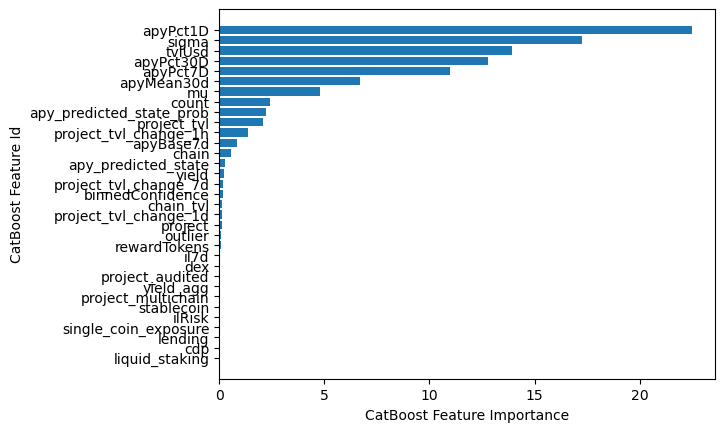

In [127]:
plt.barh(feature_importance['Feature Id'][::-1],feature_importance['Importances'][::-1])
plt.xlabel("CatBoost Feature Importance")
plt.ylabel("CatBoost Feature Id")

In [128]:
shap_values = model.get_feature_importance(
    validation_pool,
    'ShapValues'
)
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(1567, 33)


In [129]:
import shap

shap.initjs()
shap.force_plot(expected_value, shap_values[1,:],X_validation.iloc[1,:])

In [152]:
import shap
number =500
shap.initjs()
shap.force_plot(expected_value, shap_values[number,:],X_validation.iloc[number,:])

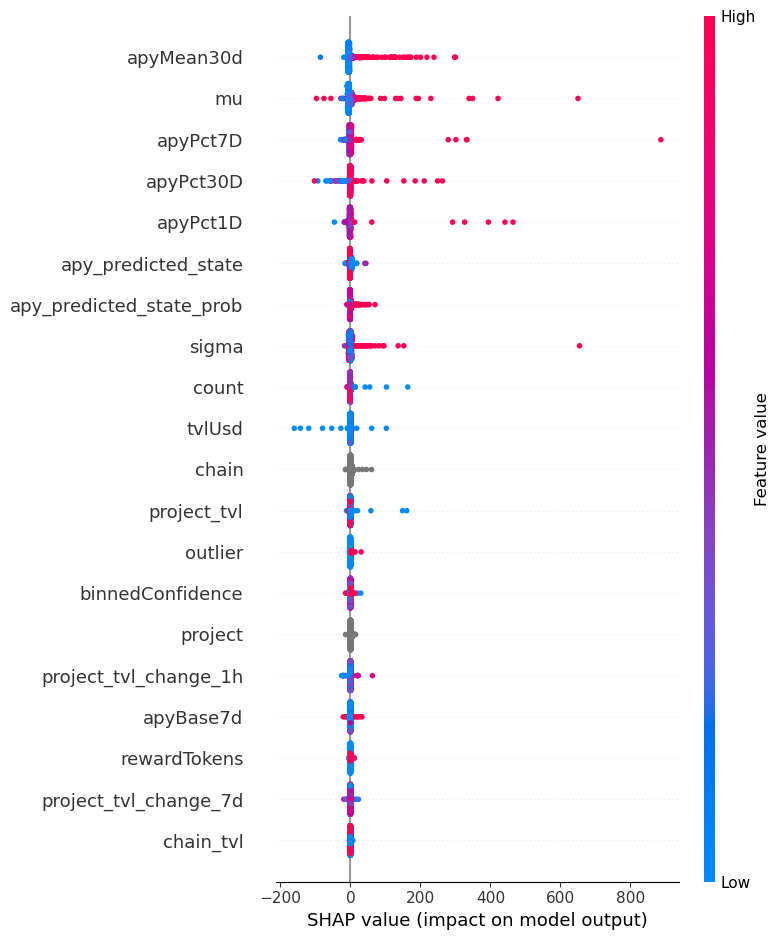

In [130]:
sorted_feature_importance = model.feature_importances_.argsort()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = X.columns)

In [ ]:
{'params': {'depth': 4,
  'iterations': 500,
  'learning_rate': 0.03,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,

In [170]:

model2 = CatBoostRegressor(
    depth=10,
    iterations=1000,
    learning_rate=0.03,
    l2_leaf_reg= 0.5,
#     verbose=5,
    loss_function='RMSE'
)

model2.fit(
    train_pool,
#     X=X_train,
#     y=y_train,
    eval_set=validation_pool,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [172]:
predict = model.predict(X_test)

In [173]:
result=pd.DataFrame()

In [186]:
predict = model.predict(X_test)

In [185]:
predict = model.predict(X_train)

In [175]:
result['y_test']=y_test
result['predict']=predict

In [176]:
result

y_test    predict
pool                                                     
ab8c01f0-0586-4077-bae8-86b3e05704c3   0.00000  -0.612686
0b65cb9f-2c63-40d5-9344-2a867fbfc41a   0.00000  -0.227405
7a6d187e-9077-4774-a317-0d56059db1e2   0.44860   0.172442
3b8b0cbc-9e88-4bfb-8a2f-fca08253d333  42.26470  36.215011
c73411a3-cac9-4de4-aef6-7e108398fb78  14.98392  29.060914
...                                        ...        ...
af798b86-7625-4325-959a-04fcd07c48d4   0.00000   1.067774
3a4b7a82-6d66-4559-a8d3-e56a7b66fd56  29.63544  32.034363
a185f0eb-925a-4bd2-82f4-cdef2a0c8058   0.31517   0.250295
c7e7f5c8-c216-4a58-b006-73204ac70264   4.08228  15.652515
0e461c71-5733-42ca-a2bf-6c9900f0851d   6.92676   6.050745

[1959 rows x 2 columns]

In [177]:
from sklearn import metrics

In [178]:
metrics.r2_score(y_true=result['y_test'],y_pred=result['predict'])

0.5575001629868552

In [187]:
metrics.r2_score(y_true=y_train,y_pred=model.predict(X_train))

0.994992551736271

In [157]:
import xgboost as xgb

In [158]:
import numpy as np
import pandas as pd

from sklearn import ensemble
from sklearn import model_selection
from sklearn import metrics

# from sklearn import preprocessing
# from sklearn import pipeline 
# from sklearn import linear_model


In [159]:
def create_variables (n_features=300, n_id=100, n_period=50, corr=0, 
                         random_state=10, constant=False, index=False):

    '''
    creates a random data matrix where the features have pairwise correlation
    given by corr.
    n_features: integer >=200
    n_id: number of cross sectional units; >=1
    n_period: number of time series periods, >=1
        Note that number of observations = n_id * n_per
    corr: float, 0<= corr <1
    constant: Boolean, if True adds a column of one
    Creates a random data matrix where each feature is N(0, 1) except the constant term x0,
    index: Boolean. Creates index for panel data
    Returns all in a single df
    '''

    assert (type(n_features) is int) and (n_features >= 200)    
    assert (type(n_id) is int) and (n_id >= 1)    
    assert (type(n_period) is int) and (n_period >= 1)    
    assert (corr >= 0) and (corr < 1)

    n_obs = n_id * n_period
    
    
    cov = np.ones((n_features, n_features)) * corr + np.eye(n_features) * (1-corr)
    np.random.seed(seed=random_state)
    data = np.random.multivariate_normal(mean=np.zeros(n_features), cov=cov, size=n_obs)
    
    # Add columns of ones to the left for constant 
    if constant:
        data = np.concatenate((np.ones((n_obs,1)), data), axis=1)
    
    # give more meaningful column names. The constant is now 'x0'
    data = pd.DataFrame(data).add_prefix('x')
    
    if index:
        # add id and period
        ids = pd.DataFrame(list(range(n_id)), columns=['id'])
        pers = pd.DataFrame(list(range(n_period)), columns=['period'])
        
        ids['key'] = 0
        pers['key'] = 0
        panel = ids.merge(pers, how='outer', on='key').drop(columns=['key'])
        assert len(panel.index) == len(data.index)
        data = pd.concat([data, panel], axis='columns')
        data = data.set_index(['id', 'period'], drop=True, verify_integrity=True)
    
    return data

In [160]:
def train_predict_reg (model, train_X, train_y, test_X, test_y):
    '''
    Fits a regression model with sklearn API
    Prints R2 for the training and test samples

    Parameters
    ----------
    model : sklearn model or model with the same API
        model with fit and predict objects.
    train_X : df or numpy matrix
        Predictors used in training the model
    train_y : df column or numpy vector
        (Continuous) outcome variable used in training the model.
    test_X : df or numpy matrix
        Predictors used in testing the model.
    test_y : df or numpy matrix
        (Continuous) outcome variable used in testing the model.

    Returns
    -------
    None

    '''
    from sklearn import metrics

    model.fit(X=train_X, y=train_y)
    
    print()
    print(model)
     # calculate R2 for the training sample
    r2_train = metrics.r2_score(y_true=train_y, 
                                 y_pred=model.predict(X=train_X))
    print('Training R2: ' + str(r2_train))
    
     # Calculate R2 for the test sample
    r2_test = metrics.r2_score(y_true=test_y, 
                                 y_pred=model.predict(X=test_X))
    print('Test R2: ' + str(r2_test))
    
    return None


In [190]:
bst = xgb.XGBRegressor(n_estimators=500,
                       max_depth=4 ,
                       learning_rate=0.03,
                       n_jobs=4
                       )
# Train a Gradient Tree Boosting model with **'y'** as outcome and assess its performance.
train_predict_reg (model=bst, 
              train_X=X_train.drop(cat_features,axis=1), 
              train_y=y_train,
              test_X=X_validation.drop(cat_features,axis=1), 
              test_y=y_validation,              
              )



XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)
Training R2: 0.9984887342544649
Test R2: 0.6031760912179874


In [191]:
rf = ensemble.RandomForestRegressor(n_estimators=1000,  #how many trees
                                    max_depth=4,
                                    max_features='sqrt',
                                    bootstrap=True,
                                    n_jobs=4,# core number
                                    random_state=3462)

# train the model and assess performance with 'y' as outcome.
train_predict_reg (model=rf, 
              train_X=X_train.drop(cat_features,axis=1), 
              train_y=y_train,
              test_X=X_validation.drop(cat_features,axis=1), 
              test_y=y_validation,                         
              )


RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=1000,
                      n_jobs=4, random_state=3462)
Training R2: 0.8427103716587185
Test R2: 0.5010015648502459


In [199]:
X_train

tvlUsd  rewardTokens  apyPct1D  \
pool                                                                      
a3878e88-0c9f-49ef-adbc-da5fe048192d  122638744             1  -0.61422   
904e7608-673d-4c25-87fa-4090e4454fb6     145032             0   0.00000   
5cac5e7e-5c96-4c42-a379-b12512f60db0     440966             1   0.00609   
74c86a85-7f0e-4d4f-9622-c7a47cd3c868     421255             0  -7.06172   
07399e18-5649-4124-88fe-2116b5beeca8    3717294             0   0.00000   
...                                         ...           ...       ...   
e2a60bcf-6e5c-4366-a201-6797ca60c0dd     331716             0  -0.60889   
45656b28-7b26-47f0-9720-2eae94717eda     136412             0   0.00000   
c8296616-cde5-415b-a50e-d7ff4a7d4336     162171             1  -0.04721   
95ab2697-259a-49d7-97d4-9c7d40a6217f      13043             0  -0.00131   
6974e0a7-e203-4109-aed3-30631c5dfa6c     670577             1  -0.05543   

                                      apyPct7D  apyPct30D  stablecoin  ilRisk  \
pool                                                                            
a3878e88-0c9f-49ef-adbc-da5fe048192d  -5.72125    5.55851           0       1   
904e7608-673d-4c25-87fa-4090e4454fb6   0.00000    0.00000           0       1   
5cac5e7e-5c96-4c42-a379-b12512f60db0   1.06475    4.88710           0       0   
74c86a85-7f0e-4d4f-9622-c7a47cd3c868   1.40461 -118.20031           0       1   
07399e18-5649-4124-88fe-2116b5beeca8  -0.08619   -0.06172           1       1   
...                                        ...        ...         ...     ...   
e2a60bcf-6e5c-4366-a201-6797ca60c0dd  -0.28705   -8.72061           0       1   
45656b28-7b26-47f0-9720-2eae94717eda   0.00000    0.00000           0       0   
c8296616-cde5-415b-a50e-d7ff4a7d4336  -1.01770   -8.80409           0       1   
95ab2697-259a-49d7-97d4-9c7d40a6217f   0.00183   -0.00837           0       1   
6974e0a7-e203-4109-aed3-30631c5dfa6c   0.96692    5.21330           0       1   

                                      single_coin_exposure  \
pool                                                         
a3878e88-0c9f-49ef-adbc-da5fe048192d                     0   
904e7608-673d-4c25-87fa-4090e4454fb6                     0   
5cac5e7e-5c96-4c42-a379-b12512f60db0                     1   
74c86a85-7f0e-4d4f-9622-c7a47cd3c868                     0   
07399e18-5649-4124-88fe-2116b5beeca8                     0   
...                                                    ...   
e2a60bcf-6e5c-4366-a201-6797ca60c0dd                     0   
45656b28-7b26-47f0-9720-2eae94717eda                     1   
c8296616-cde5-415b-a50e-d7ff4a7d4336                     0   
95ab2697-259a-49d7-97d4-9c7d40a6217f                     0   
6974e0a7-e203-4109-aed3-30631c5dfa6c                     0   

                                      apy_predicted_state  \
pool                                                        
a3878e88-0c9f-49ef-adbc-da5fe048192d                    1   
904e7608-673d-4c25-87fa-4090e4454fb6                    0   
5cac5e7e-5c96-4c42-a379-b12512f60db0                   -1   
74c86a85-7f0e-4d4f-9622-c7a47cd3c868                    1   
07399e18-5649-4124-88fe-2116b5beeca8                    1   
...                                                   ...   
e2a60bcf-6e5c-4366-a201-6797ca60c0dd                   -1   
45656b28-7b26-47f0-9720-2eae94717eda                    0   
c8296616-cde5-415b-a50e-d7ff4a7d4336                   -1   
95ab2697-259a-49d7-97d4-9c7d40a6217f                   -1   
6974e0a7-e203-4109-aed3-30631c5dfa6c                   -1   

                                      apy_predicted_state_prob  \
pool                                                             
a3878e88-0c9f-49ef-adbc-da5fe048192d                      58.0   
904e7608-673d-4c25-87fa-4090e4454fb6                       0.0   
5cac5e7e-5c96-4c42-a379-b12512f60db0                      61.0   
74c86a85-7f0e-4d4f-9622-c7a47cd3c868                      56.0   
07399e18-5649-

In [198]:
from sklearn.tree import export_graphviz
tree = rf.estimators_[99]
export_graphviz(tree, out_file='tree.dot',
feature_names = X_train.columns, class_names = 'apy', rounded = True, proportion = False, precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=90'])
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

ValueError: Length of feature_names, 33 does not match number of features, 31

In [140]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer 

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [141]:
df4=df3.copy()

In [142]:
cat_features

['chain', 'project']

In [143]:
df4[cat_features] = df4[cat_features].astype('category')

In [145]:
y

pool
747c1d2a-c668-4682-b9f9-296708a3dd90    5.00000
051c1a54-df05-4bc4-9d73-c17508acae23    0.00000
71418c17-d2aa-4eff-b68a-806fff9ec951    0.03824
0e458a5b-fd99-4667-8706-dd938934cb0c    0.00000
51d2f8d4-1fb5-4f6b-938b-e9cd17ca1ceb    0.00000
                                         ...   
f93ae48c-de8a-4323-a2ee-987de7e2396a    0.00000
0e461c71-5733-42ca-a2bf-6c9900f0851d    6.92676
870bd8ef-79d6-41e1-b834-0c11a6dbc2d2    0.00887
eaa849eb-86c0-47d5-a4a7-8a86c0da4c38    0.00000
8e91c2b5-1a00-4579-ac06-7036fe83cefa    0.00000
Name: apy, Length: 9794, dtype: float64

In [146]:
lgb_train = lgb.Dataset(X_train, y_train,categorical_feature=cat_features)
lgb_eval = lgb.Dataset(X_validation, X_validation,reference=lgb_train,categorical_feature=cat_features)

 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}
evals_result = {}
lgbm = lgb.train(params, train_set=lgb_train, num_boost_round=100, valid_sets=lgb_eval,
                     feature_name=[i for i in X.columns],
                     categorical_feature =cat_features,
                     evals_result=evals_result,early_stopping_rounds=20)
# 


# 8.使用模型对测试集数据进行预测
predictions = lgbm.predict(X_test, num_iteration=my_model.best_iteration)


'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
Overriding the parameters from Reference Dataset.


[LightGBM] [Warning] Unknown parameter: learnnig_rage


ValueError: DataFrame for label cannot have multiple columns